In [182]:
# Import your newly installed selenium package
from selenium import webdriver
import requests
from bs4 import BeautifulSoup as soup
from selenium.webdriver.chrome.options import Options
from time import sleep
from random import randint
import datetime
import re
import numpy as np
import pandas as pd
import openpyxl

url = "http://www.ufc.ca/fighter/khabib-Nurmagomedov"

In [105]:
chrome_options = Options()
# chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=1920x1080")

In [109]:
# driver = webdriver.Chrome(chrome_options=chrome_options, executable_path="/media/dodz/Data/Linux/Development/drivers/chromedriver")
driver = webdriver.Chrome(options=chrome_options)
# A new Chrome (or other browser) window should open up

# Now just tell it wherever you want it to go
driver.get(url)


In [108]:
driver.close()

In [110]:
# Return the title
# Good to use assert clause to make sure you are where you think you are
driver.title

'Khabib Nurmagomedov - Official UFC® Fighter Profile'

In [6]:
# Save a screenshot; check and see what was going on or capture something specific
driver.save_screenshot('khabib-Nurmagomedov.png')

True

Resulted Image: 
![alt text](./khabib-Nurmagomedov.png)


In [3]:
fighters = pd.read_excel('ufc-fighters.xlsx')
fighters

name                           link  weight(kg)  \
0       Shamil Abdurakhimov   /fighter/shamil-abdurakhimov       106.0   
1                Daichi Abe            /fighter/daichi-Abe        77.0   
2                Juan Adams            /fighter/juan-Adams       120.0   
3           Israel Adesanya       /fighter/israel-Adesanya        84.0   
4           Jessica Aguilar       /fighter/jessica-aguilar        52.0   
5             Kevin Aguilar         /fighter/kevin-Aguilar        70.0   
6            Omari Akhmedov        /fighter/omari-Akhmedov        84.0   
7             Junior Albini         /fighter/junior-Albini       120.0   
8            Alexandra Albu        /fighter/alexandra-Albu        52.0   
9            Iuri Alcantara        /fighter/iuri-Alcantara        61.0   
10            Hector Aldana         /fighter/hector-Aldana        77.0   
11             Irene Aldana          /fighter/irene-aldana        61.0   
12                Jose Aldo             /fighter/jose-Aldo        65.0   
13               JJ Aldrich            /fighter/jj-aldrich        52.0   
14    Abdul Razak Alhass...  /fighter/abdul-Razak-Alhassan        77.0   
15             Sultan Aliev          /fighter/sultan-aliev        77.0   
16             Arnold Allen          /fighter/arnold-allen        65.0   
17           Thomas Almeida        /fighter/thomas-almeida        61.0   
18            Eddie Alvarez         /fighter/eddie-alvarez        70.0   
19            Jaime Alvarez         /fighter/jamie-Alvarez        56.0   
20             Thiago Alves          /fighter/thiago-Alves        77.0   
21            Warlley Alves         /fighter/warlley-alves        77.0   
22                Sam Alvey             /fighter/sam-Alvey        93.0   
23         Makwan Amirkhani      /fighter/makwan-amirkhani        65.0   
24              Eryk Anders           /fighter/eryk-Anders        93.0   
25           Corey Anderson        /fighter/corey-anderson        93.0   
26           Megan Anderson        /fighter/megan-anderson        65.0   
27          Jessica Andrade       /fighter/jessica-Andrade        52.0   
28         Magomed Ankalaev      /fighter/magomed-Ankalaev        93.0   
29            Nina Ansaroff         /fighter/nina-ansaroff        52.0   
...                     ...                            ...         ...   
1454        Garett Whiteley       /fighter/garett-Whiteley        70.0   
1455        Aaron Wilkinson       /fighter/aaron-Wilkinson        70.0   
1456         Mike Wilkinson        /fighter/mike-wilkinson        65.0   
1457            James Wilks           /fighter/james-Wilks        77.0   
1458          Tedd Williams         /fighter/tedd-Williams         NaN   
1459           Chris Wilson          /fighter/chris-Wilson        77.0   
1460           Andre Winner          /fighter/andre-Winner        70.0   
1461            Eric Wisely           /fighter/eric-Wisely        65.0   
1462       Keith Wisniewski      /fighter/keith-Wisniewski        77.0   
1463           Travis Wiuff          /fighter/travis-Wiuff        93.0   
1464             Ray Wizard            /fighter/ray-Wizard         NaN   
1465          Brandon Wolff         /fighter/brandon-Wolff        77.0   
1466            Cal Worsham           /fighter/cal-Worsham         NaN   
1467            Justin Wren           /fighter/justin-Wren       120.0   
1468         Marcin Wrzosek        /fighter/marcin-Wrzosek        70.0   
1469       Eldo Dias Xavier      /fighter/eldo-Dias-Xavier         NaN   
1470            Jamie Yager           /fighter/jamie-Yager        84.0   
1471            Eddie Yagin           /fighter/eddie-Yagin        65.0   
1472      Keichiro Yamamiya     /fighter/keichiro-Yamamiya         NaN   
1473       Kenichi Yamamoto      /fighter/kenichi-Yamamoto         NaN   
1474             Dongi Yang            /fighter/dongi-Yang        84.0   
1475          Jianping Yang         /fighter/jianping-Yang        65.0   
1476            Jason Young

In [129]:
%%time
t_url ='http://www.ufc.ca/fighter/junior-Albini'

page = requests.get(t_url)
#sleep(5)
page_soup = soup(page.content, "html.parser")

fighter_history = page_soup.find_all("tr", {"class":"fight"})

history = get_history(fighter_history)

['Aleksei Oleinik', 'Junior Albini', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '10', '10', '0', '1', '1', '0', '0', '1']
['Junior Albini', 'Andrei Arlovski', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '48', '92', '0', '0', '0', '0', '0', '0']
['Timothy Johnson', 'Junior Albini', 'UFC Fight Night Weidman vs Gastelum', 'Jul 22, 2017', 'Live on CTV TWO', 'Win', 'R1', 'KO/TKO', '19', '21', '0', '0', '0', '0', '0', '0']
Wall time: 577 ms


In [115]:
fight = fighter_history[0]
fight

<tr class="fight">
<td class="result">
<div>Loss</div>
</td>
<td class="fighter">
<div>
<a href="/fighter/Oleksiy-Oliynyk">Aleksei Oleinik</a>
</div>
<div>
    
         
            
        
        
            Junior Albini
        
    
</div>
</td>
<td class="event">
<div title="UFC 224 Nunes vs Pennington:Live on Pay-Per-View">
<a href="/event/UFC-224">UFC 224 Nunes vs Pennington:Live on Pay-Per-View</a>
</div>
                
                May 12, 2018
            </td>
<td>
<div class="numeric">10</div>
<div class="numeric">10</div>
</td>
<td>
<div class="numeric">0</div>
<div class="numeric">1</div>
</td>
<td>
<div class="numeric">1</div>
<div class="numeric">0</div>
</td>
<td>
<div class="numeric">0</div>
<div class="numeric">1</div>
</td>
<td class="method">
				
					R1
					Submission
				
            </td>
<td class="last">
</td>
<td class="awards">
</td>
</tr>

In [33]:
result_element = (fight.find('td',{"class":"result"})).find('div')
result_element.attrs['class'][0]

'title-fight'

In [116]:
result_element = (fight.find('td',{"class":"result"})).find('div')

if(len(result_element.attrs) and result_element.attrs['class'][0] == 'non-ufc-title-fight-lose'):
    result = 'Loss'
elif(len(result_element.attrs) and result_element.attrs['class'][0] == 'non-ufc-title-fight-win'):
    result = 'Win'
elif(len(result_element.attrs) and result_element.attrs['class'][0] == 'title-fight'):
    result = 'Title'
else:
    result = result_element.get_text()

result

'Loss'

In [128]:
def get_history(fighter_history):
    records = []
    event_regex = r'(?P<event>(?P<name>[^:]*):?(?P<details>.*)?(\s*)\s{2}(?P<date>(?P<month>Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s(?P<day>\d{1,2}),\s*(?P<year>\d{4})))'
    round_regex = r'(?P<round>R\d)\s*(?P<method>.*)\s+'

    for fight in fighter_history:
        try:
            result_element = (fight.find('td',{"class":"result"})).find('div')
            if(len(result_element.attrs) and result_element.attrs['class'][0] == 'non-ufc-title-fight-lose'):
                result = 'Loss'
            elif(len(result_element.attrs) and result_element.attrs['class'][0] == 'non-ufc-title-fight-win'):
                result = 'Win'
            elif(len(result_element.attrs) and result_element.attrs['class'][0] == 'title-fight'):
                result = 'Title'
            else:
                result = result_element.get_text()                
        except:
            result = ""
        try:
            method = (fight.find('td', {"class":"method"})).get_text()
            method = re.sub('[\n\t]',' ',method)

            end_round = re.search(round_regex, method).group('round')
            finish_method = re.search( round_regex, method).group('method')
            method = [end_round, finish_method.strip()]            
        except:
            method = []
        try:
            score = (fight.find_all('div', {"class":"numeric"}))
            fighter1_str = score[0].get_text()
            fighter2_str = score[1].get_text()
            fighter1_td = score[2].get_text()
            fighter2_td = score[3].get_text()
            fighter1_sub = score[4].get_text()
            fighter2_sub = score[5].get_text()
            fighter1_pass = score[6].get_text()
            fighter2_pass = score[7].get_text()
            scores = [fighter1_str, fighter2_str, fighter1_td, fighter2_td, fighter1_sub, fighter2_sub, fighter1_pass, fighter2_pass]
        except:
            scores = []
        try:
            fighters = (fight.find('td', {"class":"fighter"})).find_all('div')
            fighter1 = fighters[0].get_text().strip()
            fighter2 = fighters[1].get_text().strip()
        except:
            fighter1 = fighter2 = ""
        try:
            event = (fight.find('td', {"class":"event"})).get_text()
            event = re.sub('[\n\t]','',event)
            event_name = re.search( event_regex, event).group('name')
            event_date = re.search( event_regex, event).group('date')
            remarks = re.search( event_regex, event).group('details')
            # event = (fight.find('td', {"class":"event"})).find('div')
            # print(event_name.strip(), event_date.strip())
        except:
            event = ""
        record = [fighter1.strip(), fighter2.strip(), event_name.strip(), event_date.strip(), remarks.strip(), result.strip()] + method + scores
        records.append(record)
        print(record)
    return records

In [117]:
df = pd.DataFrame(records, columns=["fighter1", "fighter2", "event_name", "event_date", "details", "result"])
df

fighter1      fighter2                           event_name  \
0  Dylan Andrews   Papy  Abedi                                  UFC   
1    Papy  Abedi  Besam Yousef  UFC Sweden 2013 Live from Stockholm   
2    Papy  Abedi    James Head                            UFC® Live   
3   Thiago Alves   Papy  Abedi                             UFC® 138   

     event_date                                            remarks result  
0  Aug 28, 2013  Condit vs. Kampmann 2 Condit vs. Kampmann 2:Li...   Loss  
1   Apr 6, 2013                                 Mousasi vs. Latifi    Win  
2  Apr 14, 2012                               Gustafsson vs. Silva   Loss  
3   Nov 5, 2011                                    LEBEN vs. MUNOZ   Loss

In [101]:
# driver.find_element_by_xpath('//*[@id="toggleResults"]/div/a').click()
# sleep(randint(1, 2))
base_url = 'http://www.ufc.ca'

links = fighters['link'].values.tolist()
links

['/fighter/shamil-abdurakhimov',
 '/fighter/daichi-Abe',
 '/fighter/juan-Adams',
 '/fighter/israel-Adesanya',
 '/fighter/jessica-aguilar',
 '/fighter/kevin-Aguilar',
 '/fighter/omari-Akhmedov',
 '/fighter/junior-Albini',
 '/fighter/alexandra-Albu',
 '/fighter/iuri-Alcantara',
 '/fighter/hector-Aldana',
 '/fighter/irene-aldana',
 '/fighter/jose-Aldo',
 '/fighter/jj-aldrich',
 '/fighter/abdul-Razak-Alhassan',
 '/fighter/sultan-aliev',
 '/fighter/arnold-allen',
 '/fighter/thomas-almeida',
 '/fighter/eddie-alvarez',
 '/fighter/jamie-Alvarez',
 '/fighter/thiago-Alves',
 '/fighter/warlley-alves',
 '/fighter/sam-Alvey',
 '/fighter/makwan-amirkhani',
 '/fighter/eryk-Anders',
 '/fighter/corey-anderson',
 '/fighter/megan-anderson',
 '/fighter/jessica-Andrade',
 '/fighter/magomed-Ankalaev',
 '/fighter/nina-ansaroff',
 '/fighter/gadzhimurad-Antigulov',
 '/fighter/adam-Antolin',
 '/fighter/zu-Anyanwu',
 '/fighter/shinsho-anzai',
 '/fighter/josh-Appelt',
 '/fighter/felipe-Arantes',
 '/fighter/julio-

In [130]:
%%time
fighters_history = []
for link in links:
    url = base_url + link
    print(url)
    # Now just tell it wherever you want it to go
    page = requests.get(url)
    sleep(5)
    page_soup = soup(page.content, "html.parser")

    fighter_history = page_soup.find_all("tr", {"class":"fight"})
    history = get_history(fighter_history)
    print(history)    
    fighters_history.append(history)

print(fighters_history)

http://www.ufc.ca/fighter/shamil-abdurakhimov
['Andrei Arlovski', 'Shamil Abdurakhimov', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '18', '32', '2', '2', '0', '0', '0', '0']
['Chase Sherman', 'Shamil Abdurakhimov', 'UFC Fight Night Bisping vs Gastelum', 'Nov 25, 2017', 'Live on Fight Network', 'Win', 'R1', 'KO/TKO', '5', '6', '0', '0', '0', '0', '0', '0']
['Derrick Lewis', 'Shamil Abdurakhimov', 'UFC Fight Night Lewis vs Abdurakhimov', 'Dec 9, 2016', 'Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R4', 'KO/TKO', '39', '15', '1', '4', '0', '1', '1', '3']
['Shamil Abdurakhimov', 'Walt Harris', 'UFC Fight Night Lineker vs Dodson', 'Oct 1, 2016', 'Live on TSN 2', 'Win', 'R3', 'Decision - Split', '47', '33', '1', '0', '0', '1', '1', '0']
['Anthony Hamilton', 'Shamil Abdurakhimov', 'UFC Fight Night Cowboy vs. Cowboy', 'Feb 21, 2016', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '40', '62', '0', '0', '0', '0',

['Aleksei Oleinik', 'Junior Albini', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '10', '10', '0', '1', '1', '0', '0', '1']
['Junior Albini', 'Andrei Arlovski', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '48', '92', '0', '0', '0', '0', '0', '0']
['Timothy Johnson', 'Junior Albini', 'UFC Fight Night Weidman vs Gastelum', 'Jul 22, 2017', 'Live on CTV TWO', 'Win', 'R1', 'KO/TKO', '19', '21', '0', '0', '0', '0', '0', '0']
[['Aleksei Oleinik', 'Junior Albini', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '10', '10', '0', '1', '1', '0', '0', '1'], ['Junior Albini', 'Andrei Arlovski', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '48', '92', '0', '0', '0', '0', '0', '0'], ['Timothy Johnson', 'Junior Albini', 'UFC Fight Night Weidman vs Gastelum', 'Jul 22, 2017',

['Laureano Staropoli', 'Hector Aldana', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Song Kenan', 'Hector Aldana', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '32', '39', '0', '2', '0', '0', '0', '0']
[['Laureano Staropoli', 'Hector Aldana', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Song Kenan', 'Hector Aldana', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '32', '39', '0', '2', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/irene-aldana
['Irene Aldana', 'Lucie Pudilova', 'UFC 228 Woodley vs. Till', 'Sep 8, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '119', '105', '0', '0', '0', '0', '0', '0']
['Talita Bernardo', 'Irene Aldana', 'UFC Fight Night Stephens vs Choi', 'Jan 14, 2018', 'Live on TSN 5', 'W

['Polyana Viana', 'JJ Aldrich', 'UFC 227 Dillashaw vs Garbrandt 2', 'Aug 4, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '46', '40', '1', '0', '0', '0', '1', '1']
['Danielle Taylor', 'JJ Aldrich', 'UFC Fight Night Stephens vs Choi', 'Jan 14, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '38', '54', '0', '1', '0', '0', '0', '1']
['JJ Aldrich', 'Chanmi Jeon', 'UFC Fight Night Lewis vs Hunt', 'Jun 10, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '98', '92', '0', '0', '0', '0', '0', '0']
['Juliana Lima', 'JJ Aldrich', 'UFC Fight Night Lewis vs Abdurakhimov', 'Dec 9, 2016', 'Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '56', '31', '4', '0', '0', '0', '2', '0']
[['Polyana Viana', 'JJ Aldrich', 'UFC 227 Dillashaw vs Garbrandt 2', 'Aug 4, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '46', '40', '1', '0', '0', '0', '1', '1'], ['Danielle Taylor', 'JJ Aldrich', 'UFC Fight Night Stephen

['Eddie Alvarez', 'Dustin Poirier', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '26', '54', '0', '0', '1', '2', '1', '0']
['Eddie Alvarez', 'Justin Gaethje', 'UFC 218 Holloway vs Aldo 2', 'Dec 2, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '155', '122', '1', '0', '0', '0', '0', '0']
['Eddie Alvarez', 'Dustin Poirier', 'UFC 211 Miocic vs Dos Santos 2', 'May 13, 2017', 'Live on Pay-Per-View', 'NO CONTEST', 'R2', 'Could Not Continue', '44', '73', '1', '0', '0', '2', '0', '0']
['Eddie Alvarez', 'Conor McGregor', 'UFC 205 Alvarez vs McGregor', 'Nov 12, 2016', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '9', '32', '0', '0', '0', '0', '0', '0']
['Rafael Dos Anjos', 'Eddie Alvarez', 'UFC Fight Night Dos Anjos vs. Alvarez', 'Jul 7, 2016', 'Live on Fight Network', 'Title', 'R1', 'KO/TKO', '12', '45', '0', '1', '0', '0', '0', '0']
['Anthony Pettis', 'Eddie Alvarez', 'UFC Fight Night Dillashaw vs. Cruz', 'Jan 17, 2016', 'TSN 5', 'W

['James Krause', 'Warlley Alves', 'UFC Fight Night Gaethje vs Vick', 'Aug 25, 2018', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '59', '28', '0', '1', '0', '0', '0', '0']
['Warlley Alves', 'Sultan Aliev', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Win', 'R2', "TKO - Doctor's Stoppage", '29', '12', '0', '1', '0', '0', '0', '0']
['Salim Touahri', 'Warlley Alves', 'UFC Fight Night Cerrone vs Till', 'Oct 21, 2017', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '35', '38', '0', '2', '0', '0', '0', '0']
['Warlley Alves', 'Kamaru Usman', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '25', '71', '0', '1', '1', '1', '0', '2']
['Warlley Alves', 'Bryan Barberena', 'UFC 198 Werdum vs. Miocic', 'May 14, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '79', '120', '0', '0', '1', '0', '0', '0']
['Warlley Alves', 'Colby Covington', 'UFC 194 Aldo vs McGregor', 'Dec 12, 2015', 'Li

['Jason Knight', 'Makwan Amirkhani', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '29', '27', '0', '3', '1', '0', '0', '2']
['Arnold Allen', 'Makwan Amirkhani', 'UFC Fight Night Manuwa vs Anderson', 'Mar 18, 2017', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '32', '17', '3', '4', '1', '3', '6', '3']
['Mike Wilkinson', 'Makwan Amirkhani', 'UFC Fight Night Silva vs. Bisping', 'Feb 27, 2016', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '13', '32', '0', '4', '2', '0', '2', '10']
['Makwan Amirkhani', 'Masio Fullen', 'UFC Fight Night Jedrzejczyk vs. Penne', 'Jun 20, 2015', 'Fight Network', 'Win', 'R1', 'Submission', '0', '1', '1', '0', '2', '0', '1', '0']
['Andy Ogle', 'Makwan Amirkhani', 'UFC Fight Night Gustafsson vs. Johnson', 'Jan 24, 2015', 'Live on TSN 4', 'Win', 'R1', 'KO/TKO', '0', '6', '0', '0', '0', '0', '0', '0']
[['Jason Knight', 'Makwan Amirkhani', 'UFC Fight Night Thompson vs Till', 'May 2

['Cat Zingano', 'Megan Anderson', 'UFC 232', 'Dec 29, 2018', 'Jones vs. Gustafsson 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Holly Holm', 'Megan Anderson', 'UFC 225 Whittaker vs Romero 2', 'Jun 9, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '47', '26', '4', '0', '1', '0', '9', '0']
[['Cat Zingano', 'Megan Anderson', 'UFC 232', 'Dec 29, 2018', 'Jones vs. Gustafsson 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Holly Holm', 'Megan Anderson', 'UFC 225 Whittaker vs Romero 2', 'Jun 9, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '47', '26', '4', '0', '1', '0', '9', '0']]
http://www.ufc.ca/fighter/jessica-Andrade
['Jessica Andrade', 'Karolina Kowalkiewicz', 'UFC 228 Woodley vs. Till', 'Sep 8, 2018', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '38', '24', '0', '0', '0', '0', '0', '0']
['Jessica Andrade', 'Tecia Torres', 'UFC Fight Night Emmett vs Stephens', 'Feb 24, 2018', 'Live on CTV TWO', 'Win'

['Gadzhimurad Antigulov', 'Ion Cutelaba', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Loss', 'R1', 'KO/TKO', '12', '40', '3', '0', '0', '0', '0', '0']
['Joachim Christensen', 'Gadzhimurad Antigulov', 'UFC 211 Miocic vs Dos Santos 2', 'May 13, 2017', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '1', '2', '0', '1', '0', '1', '0', '1']
['Marcos Rogerio De Lima', 'Gadzhimurad Antigulov', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'Win', 'R1', 'Submission', '2', '0', '0', '1', '0', '1', '0', '1']
[['Gadzhimurad Antigulov', 'Ion Cutelaba', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Loss', 'R1', 'KO/TKO', '12', '40', '3', '0', '0', '0', '0', '0'], ['Joachim Christensen', 'Gadzhimurad Antigulov', 'UFC 211 Miocic vs Dos Santos 2', 'May 13, 2017', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '1', '2', '0', '1', '0', '1', '0', '1'], ['Marcos Rogerio De Lima', 'Gadzhimurad Antigulov', 'UFC Fight Nig

['Julio Arce', 'Sheymon Moraes', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '25', '32', '1', '0', '2', '0', '1', '0']
['Julio Arce', 'Daniel Teymur', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Win', 'R3', 'Submission', '63', '37', '0', '0', '1', '0', '1', '0']
['Dan Ige', 'Julio Arce', 'UFC 220 Miocic vs Ngannou', 'Jan 20, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '35', '72', '1', '0', '0', '0', '0', '0']
['Peter Petties', 'Julio Arce', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 8, 2017', 'Las Vegas', 'Win', 'R2', 'KO/TKO', '20', '63', '0', '0', '0', '0', '0', '0']
[['Julio Arce', 'Sheymon Moraes', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '25', '32', '1', '0', '2', '0', '1', '0'], ['Julio Arce', 'Daniel Teymur', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Win', 'R3', 'Submiss

['Humberto Bandenay', 'Austin Arnett', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Hakeem Dawodu', 'Austin Arnett', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '75', '23', '0', '0', '0', '0', '0', '0']
['Austin Arnett', 'Cory Sandhagen', 'UFC Fight Night Jacare vs Brunson 2', 'Jan 27, 2018', 'Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '32', '80', '1', '1', '0', '0', '1', '1']
['Austin Arnett', 'Brandon  Davis', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 1, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '105', '134', '0', '0', '1', '0', '0', '0']
[['Humberto Bandenay', 'Austin Arnett', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Hakeem Dawodu', 'Austin Arnett', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Loss

['Olivier Aubin-Mercier', 'Gilbert Burns', 'UFC 231', 'Dec 8, 2018', 'Holloway vs. Ortega', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Alexander Hernandez', 'Olivier Aubin-Mercier', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '39', '19', '4', '2', '0', '1', '2', '3']
['Evan Dunham', 'Olivier Aubin-Mercier', 'UFC 223 Khabib vs Iaquinta', 'Apr 7, 2018', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '4', '13', '0', '0', '0', '0', '0', '0']
['Tony Martin', 'Olivier Aubin-Mercier', 'UFC Fight Night Rockhold vs Branch', 'Sep 16, 2017', 'Live on RDS 2', 'Win', 'R3', 'Decision - Split', '15', '20', '0', '4', '1', '0', '2', '6']
['Olivier Aubin-Mercier', 'Drew Dober', 'UFC 206 Holloway vs Pettis', 'Dec 10, 2016', 'Live on Pay-Per-View', 'Win', 'R2', 'Submission', '27', '24', '0', '0', '1', '0', '1', '0']
['Olivier Aubin-Mercier', 'Thibault Gouti', 'UFC Fight Night MacDonald vs. Thompson', 'Jun 18, 2016', 'Liv

['Nick Hein', 'Tae Hyun Bang', 'UFC Fight Night Arlovski vs Barnett', 'Sep 3, 2016', 'Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '20', '40', '2', '0', '0', '0', '1', '0']
['Tae Hyun Bang', 'Leo Kuntz', 'UFC Fight Night Henderson vs Masvidal', 'Nov 28, 2015', 'Fight Network', 'Win', 'R3', 'Decision - Split', '54', '31', '1', '3', '2', '1', '0', '2']
['Tae Hyun Bang', 'Jon Tuck', 'UFC Fight Night Edgar vs. Faber', 'May 16, 2015', 'TSN', 'Loss', 'R1', 'Submission', '12', '13', '1', '0', '0', '1', '0', '2']
['Kajan Johnson', 'Tae Hyun Bang', 'UFC 174 Johnson vs. Bagautinov', 'Jun 14, 2014', 'Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '29', '34', '4', '0', '0', '0', '3', '2']
['Mairbek Taisumov', 'Tae Hyun Bang', 'UFC Fight Night Saffiedine vs. Lim', 'Jan 4, 2014', 'Live on UFC Fight Pass', 'Loss', 'R3', 'Decision - Unanimous', '33', '26', '5', '0', '0', '0', '2', '0']
[['Nick Hein', 'Tae Hyun Bang', 'UFC Fight Night Arlovski vs Barnett', 'Sep 3, 201

['Edson Barboza', 'Dan Hooker', 'UFC Fight Night', 'Dec 15, 2018', 'Lee vs. Iaquinta', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Edson  Barboza', 'Kevin Lee', 'UFC Fight Night Barboza vs Lee', 'Apr 21, 2018', 'Live on TSN 5', 'Loss', 'R5', "TKO - Doctor's Stoppage", '51', '142', '0', '4', '0', '0', '0', '11']
['Khabib Nurmagomedov', 'Edson  Barboza', 'UFC 219 Cyborg vs Holm', 'Dec 30, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '89', '25', '4', '0', '0', '0', '4', '0']
['Edson  Barboza', 'Beneil Dariush', 'UFC Fight Night Belfort vs Gastelum', 'Mar 11, 2017', 'Live on TSN 5', 'Win', 'R2', 'KO/TKO', '30', '51', '0', '0', '0', '0', '0', '0']
['Edson  Barboza', 'Gilbert Melendez', 'UFC Fight Night Holm vs Shevchenko', 'Jul 23, 2016', 'Live on CTV 2', 'Win', 'R3', 'Decision - Unanimous', '56', '39', '1', '0', '0', '0', '0', '0']
['Anthony Pettis', 'Edson  Barboza', 'UFC 197 Jones vs. Saint Preux', 'Apr 23, 2016', 'Live on Pay-Per-View', 'Win', '

['Enrique Barzola', 'Nad Narimani', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Enrique Barzola', 'Brandon  Davis', 'UFC Fight Night Maia vs Usman', 'May 19, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '51', '29', '10', '0', '1', '0', '5', '0']
['Matt Bessette', 'Enrique Barzola', 'UFC 220 Miocic vs Ngannou', 'Jan 20, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '43', '55', '0', '5', '0', '0', '0', '0']
['Gabriel Benitez', 'Enrique Barzola', 'UFC 211 Miocic vs Dos Santos 2', 'May 13, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '51', '46', '0', '9', '0', '1', '0', '3']
['Enrique Barzola', 'Chris Avila', 'UFC Fight Night Dos Anjos vs Ferguson', 'Nov 5, 2016', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '72', '29', '7', '0', '0', '0', '1', '0']
['Enrique Barzola', 'Kyle Bochniak', 'UFC Fight Night Maia vs Condit', 'Aug 27, 2016', 'Live on 

['Matt Schnell', 'Marco Beltran', 'UFC 216 Ferguson vs. Lee', 'Oct 7, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '38', '34', '0', '1', '1', '0', '0', '0']
['Marco Beltran', 'Deiveson Figueiredo', 'UFC 212 Aldo vs Holloway', 'Jun 3, 2017', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '16', '17', '0', '2', '0', '4', '0', '4']
['Marco Beltran', 'Joe Soto', 'UFC Fight Night Dos Anjos vs Ferguson', 'Nov 5, 2016', 'Live on TSN 5', 'Loss', 'R1', 'Submission', '3', '2', '0', '1', '0', '1', '0', '0']
['Marco Beltran', 'Reginaldo Vieira', 'UFC Fight Night Dos Anjos vs. Alvarez', 'Jul 7, 2016', 'Live on Fight Network', 'Win', 'R2', 'Submission', '20', '20', '0', '3', '1', '0', '1', '0']
['Ning Guangyou', 'Marco Beltran', 'UFC Fight Night Henderson vs Masvidal', 'Nov 28, 2015', 'Fight Network', 'Win', 'R3', 'Decision - Split', '23', '30', '0', '1', '0', '0', '0', '0']
['Marco Beltran', 'Marlon Vera', 'UFC 180 Werdum vs. Hunt', 'Nov 15, 2014', 'Live on Pay-Per-View', 'W

['Gabriel Benitez', 'Humberto Bandenay', 'UFC Fight Night Maia vs Usman', 'May 19, 2018', 'Live on TSN 2', 'Win', 'R1', 'KO/TKO', '9', '2', '1', '0', '0', '1', '0', '0']
['Jason Knight', 'Gabriel Benitez', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '36', '85', '1', '0', '0', '0', '0', '1']
['Gabriel Benitez', 'Enrique Barzola', 'UFC 211 Miocic vs Dos Santos 2', 'May 13, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '51', '46', '0', '9', '0', '1', '0', '3']
['Gabriel Benitez', 'Sam Sicilia', 'UFC Fight Night Poirier vs Johnson', 'Sep 17, 2016', 'Live on TSN 4/5', 'Win', 'R2', 'Submission', '39', '19', '0', '0', '1', '0', '0', '0']
['Gabriel Benitez', 'Andre Fili', 'UFC Fight Night Brown vs Gastelum', 'Nov 21, 2015', 'TSN1', 'Loss', 'R1', 'KO/TKO', '11', '16', '0', '1', '0', '0', '0', '0']
['Gabriel Benitez', 'Clay Collard', 'UFC 188 Velasquez vs. Werdum', 'Jun 13, 2015', 'Live on Pay-Per-View', 'Win', 

['Davey Grant', 'Manny Bermudez', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Win', 'R1', 'Submission', '4', '3', '0', '0', '0', '2', '0', '1']
['Albert Morales', 'Manny Bermudez', 'UFC Fight Night Emmett vs Stephens', 'Feb 24, 2018', 'Live on CTV TWO', 'Win', 'R2', 'Submission', '19', '12', '1', '1', '0', '3', '1', '4']
[['Davey Grant', 'Manny Bermudez', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Win', 'R1', 'Submission', '4', '3', '0', '0', '0', '2', '0', '1'], ['Albert Morales', 'Manny Bermudez', 'UFC Fight Night Emmett vs Stephens', 'Feb 24, 2018', 'Live on CTV TWO', 'Win', 'R2', 'Submission', '19', '12', '1', '1', '0', '3', '1', '4']]
http://www.ufc.ca/fighter/talita-Bernardo
['Sarah Moras', 'Talita Bernardo', 'UFC Fight Night Volkan vs Smith', 'Oct 27, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '37', '60', '1', '2', '0', '1', '3', '6']
['Talita Bernardo', 'Irene Aldana', 'UFC Fight Night Stephens vs Choi', 'Jan 

['Jan Blachowicz', 'Nikita Krylov', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Win', 'R2', 'Submission', '10', '4', '1', '1', '1', '1', '4', '0']
['Jimi Manuwa', 'Jan Blachowicz', 'UFC Fight Night Werdum vs Volkov', 'Mar 17, 2018', 'Live on Fight Network & UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '37', '97', '0', '1', '0', '0', '0', '0']
['Jared Cannonier', 'Jan Blachowicz', 'UFC Fight Night Lawler vs Dos Anjos', 'Dec 16, 2017', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '26', '50', '0', '4', '0', '0', '0', '2']
['Jan Blachowicz', 'Devin Clark', 'UFC Fight Night Cerrone vs Till', 'Oct 21, 2017', 'Live on Fight Network', 'Win', 'R2', 'Submission', '33', '15', '1', '0', '1', '0', '1', '0']
['Patrick Cummins', 'Jan Blachowicz', 'UFC 210 Cormier vs. Johnson 2', 'Apr 8, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '73', '53', '3', '1', '0', '0', '1', '0']
['Alexander Gustafsson', 'Jan Blachowicz', 'UFC Fight

['Markus Perez', 'James Bochnovic', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '4', '3', '1', '0', '2', '0', '4', '0']
['Trevin Giles', 'James Bochnovic', 'UFC 213 Nunes vs Shevchenko', 'Jul 8, 2017', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '41', '5', '5', '0', '0', '0', '6', '0']
[['Markus Perez', 'James Bochnovic', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '4', '3', '1', '0', '2', '0', '4', '0'], ['Trevin Giles', 'James Bochnovic', 'UFC 213 Nunes vs Shevchenko', 'Jul 8, 2017', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '41', '5', '5', '0', '0', '0', '6', '0']]
http://www.ufc.ca/fighter/tim-Boetsch
['Tim Boetsch', 'Antonio Carlos Junior', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Loss', 'R1', 'Submission', '7', '31', '0', '1', '0', '1', '0', '1']
['Tim Boetsch', 'Johny Hendricks', 'UFC Fight Night Chiesa vs Lee', 'Jun 25, 2017', 

['Demetrious Johnson', 'Ray Borg', 'UFC 216 Ferguson vs. Lee', 'Oct 7, 2017', 'Live on Pay-Per-View', 'Loss', 'R5', 'Submission', '64', '13', '8', '3', '2', '0', '19', '1']
['Jussier Formiga', 'Ray Borg', 'UFC Fight Night Belfort vs Gastelum', 'Mar 11, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '30', '36', '0', '0', '0', '0', '1', '1']
['Louis Smolka', 'Ray Borg', 'UFC 207 Nunes vs Rousey', 'Dec 30, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '10', '21', '0', '4', '1', '1', '0', '12']
['Ray Borg', 'Justin Scoggins', 'UFC Fight Night Hendricks vs. Thompson', 'Feb 6, 2016', 'Live on TSN 1', 'Loss', 'R3', 'Decision - Unanimous', '20', '57', '1', '4', '0', '0', '0', '6']
['Ray Borg', 'Geane Herrera', 'UFC Fight Night Teixeira vs. Saint Preux', 'Aug 8, 2015', 'TSN 2', 'Win', 'R3', 'Decision - Unanimous', '26', '7', '3', '0', '2', '0', '19', '1']
['Ray Borg', 'Chris Kelades', 'UFC Fight Night Henderson vs. Thatch', 'Feb 14, 2015', 'TSN 5', 'Win', 'R3

['Cezar Ferreira', 'Tom Breese', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Daniel Kelly', 'Tom Breese', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Win', 'R1', 'KO/TKO', '6', '23', '0', '0', '0', '0', '0', '0']
['Sean Strickland', 'Tom Breese', 'UFC 199 Rockhold vs. Bisping 2', 'Jun 4, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '73', '62', '0', '0', '0', '0', '0', '0']
['Tom Breese', 'Keita Nakamura', 'UFC Fight Night Silva vs. Bisping', 'Feb 27, 2016', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '32', '6', '0', '3', '1', '1', '2', '4']
['Cathal Pendred', 'Tom Breese', 'UFC Fight Night Holohan vs. Smolka', 'Oct 24, 2015', 'UFC FIGHT PASS', 'Win', 'R1', 'KO/TKO', '5', '23', '0', '0', '0', '0', '0', '0']
['Luiz  Dutra', 'Tom Breese', 'UFC Fight Night Condit vs. Alves', 'May 30, 2015', 'TSN', 'Win', 'R1', 'KO/TKO', '21', '26', '0', '0', '0', '0'

['Matt Brown', 'Diego Sanchez', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Win', 'R1', 'KO/TKO', '18', '12', '0', '0', '0', '0', '0', '0']
['Donald Cerrone', 'Matt Brown', 'UFC 206 Holloway vs Pettis', 'Dec 10, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '63', '70', '0', '0', '0', '1', '0', '0']
['Matt Brown', 'Jake Ellenberger', 'UFC 201 Lawler vs. Woodley', 'Jul 30, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '7', '21', '0', '0', '0', '0', '0', '0']
['Demian Maia', 'Matt Brown', 'UFC 198 Werdum vs. Miocic', 'May 14, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Submission', '17', '10', '3', '0', '2', '0', '5', '1']
['Matt Brown', 'Tim Means', 'UFC 189 Mendes vs. McGregor', 'Jul 11, 2015', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '25', '16', '1', '0', '1', '0', '0', '0']
['Johny Hendricks', 'Matt Brown', 'UFC 185 Pettis vs. dos Anjos', 'Mar 14, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '36', '23', '

['Travis Browne', 'Aleksei Oleinik', 'UFC 213 Nunes vs Shevchenko', 'Jul 8, 2017', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '35', '53', '1', '3', '0', '2', '1', '3']
['Derrick Lewis', 'Travis Browne', 'UFC Fight Night Lewis vs Browne', 'Feb 19, 2017', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '39', '21', '0', '0', '0', '0', '1', '0']
['Fabricio Werdum', 'Travis Browne', 'UFC 203 Miocic vs. Overeem', 'Sep 10, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '84', '37', '0', '0', '1', '0', '1', '0']
['Cain Velasquez', 'Travis Browne', 'UFC 200 Tate vs Nunes', 'Jul 9, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '50', '6', '1', '0', '0', '0', '1', '0']
['Travis Browne', 'Matt Mitrione', 'UFC Fight Night Dillashaw vs. Cruz', 'Jan 17, 2016', 'TSN 5', 'Win', 'R3', 'KO/TKO', '51', '27', '2', '0', '0', '0', '2', '0']
['Travis Browne', 'Andrei Arlovski', 'UFC 187 Johnson vs. Cormier', 'May 23, 2015', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '15', '

[]
http://www.ufc.ca/fighter/mayra-Bueno-Silva
['Mayra Bueno Silva', 'Gillian Robertson', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Win', 'R1', 'Submission', '11', '11', '0', '1', '1', '0', '0', '2']
['Mayra Bueno Silva', 'Mayana Kellem', 'DWTNCS Brazil 1.1', 'Aug 10, 2018', '', 'Win', 'R1', 'Submission', '--', '--', '--', '--', '--', '--', '--', '--']
[['Mayra Bueno Silva', 'Gillian Robertson', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Win', 'R1', 'Submission', '11', '11', '0', '1', '1', '0', '0', '2'], ['Mayra Bueno Silva', 'Mayana Kellem', 'DWTNCS Brazil 1.1', 'Aug 10, 2018', '', 'Win', 'R1', 'Submission', '--', '--', '--', '--', '--', '--', '--', '--']]
http://www.ufc.ca/fighter/wuliji-Buren
['Marlon Vera', 'Wuliji Buren', 'UFC 227 Dillashaw vs Garbrandt 2', 'Aug 4, 2018', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '45', '31', '1', '2', '0', '0', '1', '0']
['Wuliji Buren', 'Rolando Dy', 'UFC Fight Night Bisping vs Gastelu

['Arnold Allen', 'Mads Burnell', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Submission', '29', '20', '0', '6', '1', '0', '0', '4']
['Mads Burnell', 'Mike Santiago', 'UFC Fight Night Stephens vs Choi', 'Jan 14, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '20', '51', '3', '3', '1', '2', '11', '3']
['Michel Prazeres', 'Mads Burnell', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Network', 'Loss', 'R3', 'Submission', '26', '10', '4', '0', '1', '0', '15', '0']
[['Arnold Allen', 'Mads Burnell', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Submission', '29', '20', '0', '6', '1', '0', '0', '4'], ['Mads Burnell', 'Mike Santiago', 'UFC Fight Night Stephens vs Choi', 'Jan 14, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '20', '51', '3', '3', '1', '2', '11', '3'], ['Michel Prazeres', 'Mads Burnell', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Ne

['Valentina Shevchenko', 'Priscila Cachoeira', 'UFC Fight Night Machida vs. Anders', 'Feb 3, 2018', 'Live on TSN 2', 'Loss', 'R2', 'Submission', '95', '2', '2', '0', '2', '0', '4', '0']
[['Valentina Shevchenko', 'Priscila Cachoeira', 'UFC Fight Night Machida vs. Anders', 'Feb 3, 2018', 'Live on TSN 2', 'Loss', 'R2', 'Submission', '95', '2', '2', '0', '2', '0', '4', '0']]
http://www.ufc.ca/fighter/joanne-Calderwood
['Joanne Calderwood', 'Kalindra Faria', 'UFC Fight Night Gaethje vs Vick', 'Aug 25, 2018', 'Live on TSN 5', 'Win', 'R1', 'Submission', '5', '13', '0', '1', '2', '0', '0', '3']
['Joanne Calderwood', 'Cynthia Calvillo', 'UFC Fight Night Nelson vs Ponzinibbio', 'Jul 16, 2017', 'Live on FS1', 'Loss', 'R3', 'Decision - Unanimous', '63', '54', '0', '2', '0', '2', '0', '2']
['Jessica Andrade', 'Joanne Calderwood', 'UFC 203 Miocic vs. Overeem', 'Sep 10, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '20', '13', '2', '0', '1', '0', '3', '0']
['Valerie  Letourneau', 'Joanne

['Ronaldo Candido', 'Carlos Candelario', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 1, 2017', 'Las Vegas', 'Win', 'R3', 'Decision - Unanimous', '25', '58', '8', '0', '5', '0', '5', '0']
[['Ronaldo Candido', 'Carlos Candelario', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 1, 2017', 'Las Vegas', 'Win', 'R3', 'Decision - Unanimous', '25', '58', '8', '0', '5', '0', '5', '0']]
http://www.ufc.ca/fighter/ronaldo-Candido
['Ronaldo Candido', 'Carlos Candelario', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 1, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '25', '58', '8', '0', '5', '0', '5', '0']
[['Ronaldo Candido', 'Carlos Candelario', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 1, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '25', '58', '8', '0', '5', '0', '5', '0']]
http://www.ufc.ca/fighter/guido-cannetti
['Guido Cannetti', 'Marlon Vera', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio

['Tim Boetsch', 'Antonio Carlos Junior', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Win', 'R1', 'Submission', '7', '31', '0', '1', '0', '1', '0', '1']
['Antonio Carlos Junior', 'Jack Marshman', 'UFC Fight Night Machida vs Brunson', 'Oct 28, 2017', 'Live on TSN 2', 'Win', 'R1', 'Submission', '11', '1', '1', '0', '1', '0', '3', '0']
['Antonio Carlos Junior', 'Eric Spicely', 'UFC 212 Aldo vs Holloway', 'Jun 3, 2017', 'Live on Pay-Per-View', 'Win', 'R2', 'Submission', '12', '17', '1', '1', '2', '0', '5', '0']
['Antonio Carlos Junior', 'Marvin Vettori', 'UFC 207 Nunes vs Rousey', 'Dec 30, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '28', '29', '4', '1', '0', '1', '1', '1']
['Antonio Carlos Junior', 'Leonardo Augusto Leleco', 'UFC Fight Night Poirier vs Johnson', 'Sep 17, 2016', 'Live on TSN 4/5', 'Win', 'R3', 'Submission', '32', '6', '7', '0', '1', '2', '5', '0']
['Daniel Kelly', 'Antonio Carlos Junior', 'UFC Fight Night Hunt vs. Mir', 

['Cortney Casey', 'Angela Hill', 'UFC Fight Night Gaethje vs Vick', 'Aug 25, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '111', '121', '1', '1', '0', '0', '1', '0']
['Michelle Waterson', 'Cortney Casey', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Split', '61', '36', '3', '0', '0', '3', '0', '1']
['Felice Herrig', 'Cortney Casey', 'UFC 218 Holloway vs Aldo 2', 'Dec 2, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '76', '91', '1', '0', '0', '0', '1', '0']
['Jessica Aguilar', 'Cortney Casey', 'UFC 211 Miocic vs Dos Santos 2', 'May 13, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '57', '103', '4', '0', '0', '0', '1', '0']
['Claudia Gadelha', 'Cortney Casey', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '34', '22', '6', '0', '1', '0', '2', '0']
['Randa Markos', 'Cortney Casey', 'UFC 202 Diaz vs McGregor 2', 'Aug 20, 201

['Donald Cerrone', 'Mike Perry', 'UFC Fight Night Korean Zombie vs Rodriguez', 'Nov 10, 2018', 'Live on TSN 5', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Donald Cerrone', 'Leon Edwards', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Loss', 'R5', 'Decision - Unanimous', '60', '84', '1', '0', '0', '0', '1', '0']
['Donald Cerrone', 'Yancy Medeiros', 'UFC Fight Night Cerrone vs Medeiros', 'Feb 18, 2018', 'Live on TSN 2', 'Win', 'R1', 'KO/TKO', '28', '25', '0', '0', '0', '0', '0', '0']
['Donald Cerrone', 'Darren Till', 'UFC Fight Night Cerrone vs Till', 'Oct 21, 2017', 'Live on Fight Network', 'Loss', 'R1', 'KO/TKO', '14', '24', '1', '0', '0', '0', '0', '0']
['Robbie Lawler', 'Donald Cerrone', 'UFC 214 Cormier vs Jones 2', 'Jul 29, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '77', '82', '0', '1', '0', '0', '0', '2']
['Donald Cerrone', 'Jorge Masvidal', 'UFC Fight Night Shevchenko vs Pena', 'Jan 28, 2017', 'Live on

['Siyar Bahadurzada', 'Luan Chagas', 'UFC Fight Night Barboza vs Lee', 'Apr 21, 2018', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '33', '11', '1', '0', '0', '0', '0', '1']
['Luan Chagas', 'Jimmy Wallhead', 'UFC 212 Aldo vs Holloway', 'Jun 3, 2017', 'Live on Pay-Per-View', 'Win', 'R2', 'Submission', '95', '32', '0', '0', '1', '0', '1', '0']
['Erick Silva', 'Luan Chagas', 'UFC Fight Night Cyborg vs Lansberg', 'Sep 24, 2016', 'Live on TSN 5', 'Loss', 'R3', 'Submission', '55', '41', '0', '1', '2', '0', '4', '2']
['Sergio Moraes', 'Luan Chagas', 'UFC 198 Werdum vs. Miocic', 'May 14, 2016', 'Live on Pay-Per-View', 'DRAW', 'R3', 'Decision - Split', '28', '46', '0', '0', '1', '0', '5', '1']
[['Siyar Bahadurzada', 'Luan Chagas', 'UFC Fight Night Barboza vs Lee', 'Apr 21, 2018', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '33', '11', '1', '0', '0', '0', '0', '1'], ['Luan Chagas', 'Jimmy Wallhead', 'UFC 212 Aldo vs Holloway', 'Jun 3, 2017', 'Live on Pay-Per-View', 'Win', 'R2', 'Submission', '95', '32'

['Katlyn Chookagian', 'Jessica Eye', 'UFC 231', 'Dec 8, 2018', 'Holloway vs. Ortega', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Alexis Davis', 'Katlyn Chookagian', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '70', '62', '1', '0', '0', '0', '0', '0']
['Katlyn Chookagian', 'Mara Romero Borella', 'UFC Fight Night Jacare vs Brunson 2', 'Jan 27, 2018', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '68', '79', '0', '1', '1', '0', '0', '0']
['Katlyn Chookagian', 'Irene Aldana', 'UFC 210 Cormier vs. Johnson 2', 'Apr 8, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '105', '84', '0', '0', '0', '0', '0', '0']
['Liz Carmouche', 'Katlyn Chookagian', 'UFC 205 Alvarez vs McGregor', 'Nov 12, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '27', '22', '4', '0', '0', '0', '1', '0']
['Lauren Murphy', 'Katlyn Chookagian', 'UFC Fight Night McDonald vs Lineker', 'Jul 13, 2016', 

['Alexa Grasso', 'Heather Jo Clark', 'UFC Fight Night Dos Anjos vs Ferguson', 'Nov 5, 2016', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '65', '40', '1', '0', '0', '0', '0', '0']
['Karolina Kowalkiewicz', 'Heather Jo Clark', 'UFC Fight Night Overeem vs. Arlovski', 'May 8, 2016', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '119', '70', '0', '0', '0', '0', '1', '0']
['Bec Rawlings', 'Heather Jo Clark', 'The Ultimate Fighter Esparza vs. Namajunas', 'Dec 12, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Unanimous', '69', '56', '0', '1', '0', '1', '0', '4']
[['Alexa Grasso', 'Heather Jo Clark', 'UFC Fight Night Dos Anjos vs Ferguson', 'Nov 5, 2016', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '65', '40', '1', '0', '0', '0', '0', '0'], ['Karolina Kowalkiewicz', 'Heather Jo Clark', 'UFC Fight Night Overeem vs. Arlovski', 'May 8, 2016', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '119', '70', '0', '0', '0', '0', '1', '0'], ['Bec Rawlings', 'Heather Jo Clark', 'Th

['Carlos Condit', 'Michael Chiesa', 'UFC 232', 'Dec 29, 2018', 'Jones vs. Gustafsson 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Carlos Condit', 'Alex Oliveira', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Loss', 'R2', 'Submission', '12', '9', '1', '3', '1', '1', '2', '4']
['Carlos Condit', 'Neil Magny', 'UFC 219 Cyborg vs Holm', 'Dec 30, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '37', '32', '0', '6', '0', '0', '0', '1']
['Demian Maia', 'Carlos Condit', 'UFC Fight Night Maia vs Condit', 'Aug 27, 2016', 'Live on CTV Two', 'Loss', 'R1', 'Submission', '1', '1', '1', '0', '1', '0', '2', '0']
['Robbie Lawler', 'Carlos Condit', 'UFC 195 Lawler vs Condit', 'Jan 2, 2016', 'Live on Pay-Per-View', 'Loss', 'R5', 'Decision - Split', '92', '176', '0', '0', '0', '0', '0', '0']
['Carlos Condit', 'Thiago Alves', 'UFC Fight Night Condit vs. Alves', 'May 30, 2015', 'TSN', 'Win', 'R2', "TKO - Doctor's Stoppage", '75', '34', '2

['Sidney Outlaw', 'Michael Cora', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 18, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '2', '12', '3', '0', '3', '0', '3', '0']
[['Sidney Outlaw', 'Michael Cora', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 18, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '2', '12', '3', '0', '3', '0', '3', '0']]
http://www.ufc.ca/fighter/daniel-Cormier
['Daniel Cormier', 'Derrick Lewis', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-View', 'Title', 'R2', 'Submission', '19', '4', '4', '0', '1', '0', '4', '0']
['Stipe Miocic', 'Daniel Cormier', 'UFC 226 Miocic vs Cormier', 'Jul 7, 2018', 'Live on Pay-Per-View', 'Title', 'R1', 'KO/TKO', '24', '25', '1', '0', '0', '0', '0', '0']
['Daniel Cormier', 'Volkan Oezdemir', 'UFC 220 Miocic vs Ngannou', 'Jan 20, 2018', 'Live on Pay-Per-View', 'Title', 'R2', 'KO/TKO', '32', '38', '2', '0', '1', '0', '3', '0']
['Daniel Cormier', 'Jon Jones', 'UFC 214 C

['Uriah Hall', 'Paulo Costa', 'UFC 226 Miocic vs Cormier', 'Jul 7, 2018', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '58', '75', '0', '0', '0', '0', '0', '0']
['Johny Hendricks', 'Paulo Costa', 'UFC 217 Bisping vs St-Pierre', 'Nov 4, 2017', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '27', '49', '0', '0', '0', '0', '0', '0']
['Paulo Costa', 'Oluwale Bamgbose', 'UFC 212 Aldo vs Holloway', 'Jun 3, 2017', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '43', '33', '0', '2', '0', '0', '0', '1']
['Garreth McLellan', 'Paulo Costa', 'UFC Fight Night Belfort vs Gastelum', 'Mar 11, 2017', 'Live on TSN 5', 'Win', 'R1', 'KO/TKO', '6', '22', '0', '0', '0', '0', '0', '0']
[['Uriah Hall', 'Paulo Costa', 'UFC 226 Miocic vs Cormier', 'Jul 7, 2018', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '58', '75', '0', '0', '0', '0', '0', '0'], ['Johny Hendricks', 'Paulo Costa', 'UFC 217 Bisping vs St-Pierre', 'Nov 4, 2017', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '27', '49', '0', '0', '0', '0', 

['Jim Crute', 'Paul Craig', 'UFC Fight Night', 'Dec 1, 2018', 'Dos Santos vs. Tuivasa', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Paul Craig', 'Magomed Ankalaev', 'UFC Fight Night Werdum vs Volkov', 'Mar 17, 2018', 'Live on Fight Network & UFC FIGHT PASS', 'Win', 'R3', 'Submission', '18', '59', '2', '0', '1', '0', '1', '3']
['Khalil Rountree Jr.', 'Paul Craig', 'UFC Fight Night Nelson vs Ponzinibbio', 'Jul 16, 2017', 'Live on FS1', 'Loss', 'R1', 'KO/TKO', '15', '17', '0', '0', '0', '0', '0', '0']
['Tyson Pedro', 'Paul Craig', 'UFC 209 Woodley vs Thompson 2', 'Mar 4, 2017', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '23', '12', '0', '0', '0', '0', '1', '0']
['Henrique da Silva', 'Paul Craig', 'UFC Fight Night VanZant vs Waterson', 'Dec 17, 2016', 'Live on TSN 4 & 5', 'Win', 'R2', 'Submission', '16', '31', '1', '1', '0', '3', '0', '3']
[['Jim Crute', 'Paul Craig', 'UFC Fight Night', 'Dec 1, 2018', 'Dos Santos vs. Tuivasa', 'UPCOMING', '--', '--', '--', '--', '--'

['Misha Cirkunov', 'Patrick Cummins', 'UFC Fight Night Volkan vs Smith', 'Oct 27, 2018', 'Live on TSN 5', 'Loss', 'R1', 'Submission', '11', '3', '1', '0', '2', '0', '1', '0']
['Corey Anderson', 'Patrick Cummins', 'UFC Fight Night Barboza vs Lee', 'Apr 21, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '64', '31', '12', '0', '0', '0', '6', '0']
['Patrick Cummins', 'Gian Villante', 'UFC Fight Night Weidman vs Gastelum', 'Jul 22, 2017', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Split', '86', '72', '1', '0', '0', '0', '0', '0']
['Patrick Cummins', 'Jan Blachowicz', 'UFC 210 Cormier vs. Johnson 2', 'Apr 8, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '73', '53', '3', '1', '0', '0', '1', '0']
['Antonio Rogerio Nogueira', 'Patrick Cummins', 'UFC 198 Werdum vs. Miocic', 'May 14, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '30', '12', '0', '0', '0', '0', '0', '0']
['Glover Teixeira', 'Patrick Cummins', 'UFC Fight Night Belfort vs Henderson', 'N

['Henrique da Silva', 'Johnny Walker', 'DWTNCS Brazil 1.2', 'Aug 11, 2018', '', 'Loss', 'R3', 'Decision - Unanimous', '53', '81', '0', '1', '0', '3', '0', '5']
['Gokhan Saki', 'Henrique da Silva', 'UFC Fight Night Shogun vs Saint Preux 2', 'Sep 22, 2017', 'Live on TSN 2 and RDS 2', 'Loss', 'R1', 'KO/TKO', '40', '20', '0', '0', '0', '0', '0', '0']
['Ion Cutelaba', 'Henrique da Silva', 'UFC Fight Night Lewis vs Hunt', 'Jun 10, 2017', 'Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '15', '1', '0', '0', '0', '0', '0', '0']
['Henrique da Silva', 'Jordan Johnson', 'UFC Fight Night Shevchenko vs Pena', 'Jan 28, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '22', '39', '0', '4', '0', '2', '0', '5']
['Henrique da Silva', 'Paul Craig', 'UFC Fight Night VanZant vs Waterson', 'Dec 17, 2016', 'Live on TSN 4 & 5', 'Loss', 'R2', 'Submission', '16', '31', '1', '1', '0', '3', '0', '3']
['Henrique da Silva', 'Joachim Christensen', 'UFC Fight Night Lineker vs Dodson', 'Oct 1, 2016', 'Live on TSN

['Alexis Davis', 'Katlyn Chookagian', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '70', '62', '1', '0', '0', '0', '0', '0']
['Alexis Davis', 'Liz Carmouche', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '23', '49', '1', '4', '2', '0', '2', '2']
['Alexis Davis', 'Cindy Dandois', 'UFC Fight Night Swanson vs Lobov', 'Apr 22, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '51', '47', '0', '5', '2', '0', '2', '0']
['Sara McMann', 'Alexis Davis', 'The Ultimate Fighter A Tournament of Champions Finale', 'Dec 3, 2016', 'Live on TSN 2', 'Loss', 'R2', 'Submission', '14', '21', '2', '0', '1', '1', '2', '0']
['Alexis Davis', 'Sarah Kaufman', 'UFC 186 Johnson vs. Horiguchi', 'Apr 25, 2015', 'Live on Pay-Per-View', 'Win', 'R2', 'Submission', '34', '65', '1', '0', '1', '0', '1', '0']
['Ronda Rousey', 'Alexis Davis', 'UFC 175 Weidman vs. Machida', 'Jul 5, 2014', 'Li

['Daniel Spohn', 'Angel De Anda', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 18, 2017', 'Las Vegas', 'Loss', 'R1', 'Submission', '20', '18', '0', '0', '1', '0', '1', '0']
[['Daniel Spohn', 'Angel De Anda', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 18, 2017', 'Las Vegas', 'Loss', 'R1', 'Submission', '20', '18', '0', '0', '1', '0', '1', '0']]
http://www.ufc.ca/fighter/chris-de-la-rocha
['Chris de la Rocha', 'Juan Adams', 'UFC Fight Night', 'Dec 15, 2018', 'Lee vs. Iaquinta', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Rashad Coulter', 'Chris De La Rocha', 'UFC 225 Whittaker vs Romero 2', 'Jun 9, 2018', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '30', '40', '0', '3', '0', '2', '0', '5']
['Chris De La Rocha', 'Adam Milstead', 'UFC Fight Night Almeida vs. Garbrandt', 'May 29, 2016', 'TSN 5', 'Loss', 'R2', 'KO/TKO', '39', '58', '0', '0', '0', '0', '0', '0']
['Daniel Omielanczuk', 'Chris De La Rocha', 'UFC Fight Night Bisping vs. Le

['Mackenzie Dern', 'Amanda Cooper', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '15', '6', '0', '0', '1', '0', '3', '0']
['Ashley Yoder', 'Mackenzie Dern', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '52', '70', '0', '1', '0', '1', '0', '1']
[['Mackenzie Dern', 'Amanda Cooper', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '15', '6', '0', '0', '1', '0', '3', '0'], ['Ashley Yoder', 'Mackenzie Dern', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '52', '70', '0', '1', '0', '1', '0', '1']]
http://www.ufc.ca/fighter/alessio-di-chirico
['Alessio Di Chirico', 'Julian Marquez', 'The Ultimate Fighter Finale Tavares vs Adesanya', 'Jul 6, 2018', 'Live on TSN 3', 'Win', 'R3', 'Decision - Split', '50', '47', '4', '0', '0', '2', '2', '1']
['Alessio Di Chirico', 'Oluwale Bamgbose'

['Grant Dawson', 'Adrian Diaz', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 15, 2017', 'Las Vegas', 'Loss', 'R2', 'Submission', '24', '3', '1', '1', '2', '0', '4', '0']
[['Grant Dawson', 'Adrian Diaz', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 15, 2017', 'Las Vegas', 'Loss', 'R2', 'Submission', '24', '3', '1', '1', '2', '0', '4', '0']]
http://www.ufc.ca/fighter/nate-Diaz
['Nate Diaz', 'Conor McGregor', 'UFC 202 Diaz vs McGregor 2', 'Aug 20, 2016', 'Live on Pay-Per-View', 'Loss', 'R5', 'Decision - Majority', '166', '164', '1', '0', '0', '0', '0', '0']
['Conor McGregor', 'Nate Diaz', 'UFC 196 McGregor vs. Diaz', 'Mar 5, 2016', 'Live on Pay-Per-View', 'Win', 'R2', 'Submission', '61', '77', '0', '1', '0', '2', '0', '1']
['Michael Johnson', 'Nate Diaz', 'UFC Fight Night dos Anjos vs Cowboy 2', 'Dec 19, 2015', 'Live on FOX', 'Win', 'R3', 'Decision - Unanimous', '103', '153', '1', '0', '0', '0', '0', '0']
['Rafael Dos Anjos', 'Nate Diaz', 'UFC Fight Night

['Anderson Silva', 'Nick Diaz', 'UFC 183 Silva vs. Diaz', 'Jan 31, 2015', 'Live on Pay-Per-View', 'NO CONTEST', 'R5', 'Overturned', '108', '77', '0', '0', '0', '0', '0', '0']
['Georges St-Pierre', 'Nick Diaz', 'UFC 158 Live on Pay-Per View', 'Mar 16, 2013', 'St-Pierre vs. Diaz', 'Loss', 'R5', 'Decision - Unanimous', '105', '41', '9', '0', '0', '1', '2', '0']
['Nick Diaz', 'Carlos Condit', 'UFC® 143', 'Feb 4, 2012', 'Diaz vs. Condit', 'Loss', 'R5', 'Decision - Unanimous', '105', '151', '1', '0', '0', '0', '1', '0']
['BJ Penn', 'Nick Diaz', 'UFC® 137', 'Oct 29, 2011', 'Penn vs. Diaz', 'Win', 'R3', 'Decision - Unanimous', '88', '178', '1', '0', '0', '0', '1', '0']
['Nick Diaz', 'Paul Daley', 'Strikeforce - Diaz vs. Daley', 'Apr 9, 2011', '', 'Win', 'R1', 'KO/TKO', '44', '20', '0', '0', '0', '0', '0', '0']
['Nick Diaz', 'Evangelista Santos', 'Strikeforce - Diaz vs. Cyborg', 'Jan 29, 2011', '', 'Win', 'R2', 'Submission', '104', '72', '0', '1', '1', '0', '0', '0']
['Nick Diaz', 'KJ Noons', '

['TJ Dillashaw', 'Cody Garbrandt', 'UFC 227 Dillashaw vs Garbrandt 2', 'Aug 4, 2018', 'Live on Pay-Per-View', 'Title', 'R1', 'KO/TKO', '45', '17', '0', '0', '0', '0', '0', '0']
['Cody Garbrandt', 'TJ Dillashaw', 'UFC 217 Bisping vs St-Pierre', 'Nov 4, 2017', 'Live on Pay-Per-View', 'Title', 'R2', 'KO/TKO', '18', '20', '0', '0', '0', '0', '0', '0']
['TJ Dillashaw', 'John Lineker', 'UFC 207 Nunes vs Rousey', 'Dec 30, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '71', '38', '5', '1', '1', '0', '8', '0']
['TJ Dillashaw', 'Raphael Assuncao', 'UFC 200 Tate vs Nunes', 'Jul 9, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '64', '49', '1', '0', '0', '0', '1', '0']
['TJ Dillashaw', 'Dominick Cruz', 'UFC Fight Night Dillashaw vs. Cruz', 'Jan 17, 2016', 'TSN 5', 'Loss', 'R5', 'Decision - Split', '109', '112', '1', '4', '0', '0', '0', '0']
['TJ Dillashaw', 'Renan Barao', 'UFC Fight Night Dillashaw vs. Barao 2', 'Jul 25, 2015', 'Live on CTV TWO', 'Title',

['Drew Dober', 'Jon Tuck', 'UFC Fight Night Gaethje vs Vick', 'Aug 25, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '60', '33', '2', '0', '0', '1', '3', '0']
['Drew Dober', 'Frank Camacho', 'UFC Fight Night Jacare vs Brunson 2', 'Jan 27, 2018', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '145', '106', '0', '3', '0', '0', '0', '3']
['Joshua Burkman', 'Drew Dober', 'UFC 214 Cormier vs Jones 2', 'Jul 29, 2017', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '11', '15', '0', '0', '0', '0', '0', '0']
['Olivier Aubin-Mercier', 'Drew Dober', 'UFC 206 Holloway vs Pettis', 'Dec 10, 2016', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '27', '24', '0', '0', '1', '0', '1', '0']
['Drew Dober', 'Jason Gonzalez', 'UFC 203 Miocic vs. Overeem', 'Sep 10, 2016', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '20', '10', '0', '0', '0', '0', '0', '0']
['Scott Holtzman', 'Drew Dober', 'UFC 195 Lawler vs Condit', 'Jan 2, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision 

['Khalid Murtazaliev', 'CB Dollaway', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '48', '4', '5', '2', '0', '3', '5', '2']
['CB Dollaway', 'Hector Lombard', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Win', 'R1', 'DQ', '13', '19', '0', '0', '0', '0', '0', '0']
['Ed Herman', 'CB Dollaway', 'The Ultimate Fighter Finale Johnson vs Gaethje', 'Jul 7, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '24', '54', '1', '6', '3', '1', '3', '5']
['CB Dollaway', 'Nate Marquardt', 'UFC Fight Night dos Anjos vs Cowboy 2', 'Dec 19, 2015', 'Live on FOX', 'Loss', 'R2', 'KO/TKO', '15', '16', '0', '0', '0', '0', '0', '0']
['Michael Bisping', 'CB Dollaway', 'UFC 186 Johnson vs. Horiguchi', 'Apr 25, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '75', '47', '0', '2', '0', '0', '0', '0']
['Lyoto Machida', 'CB Dollaway', 'UFC Fight Night Machida vs. Dollaway', 'Dec 20, 2014', 'Sportsnet 360',

['Junior Dos Santos', 'Tai Tuivasa', 'UFC Fight Night', 'Dec 1, 2018', 'Dos Santos vs. Tuivasa', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Junior Dos Santos', 'Blagoy Ivanov', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Win', 'R5', 'Decision - Unanimous', '110', '51', '0', '0', '0', '0', '0', '0']
['Stipe Miocic', 'Junior Dos Santos', 'UFC 211 Miocic vs Dos Santos 2', 'May 13, 2017', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '26', '12', '0', '0', '0', '0', '0', '0']
['Ben Rothwell', 'Junior Dos Santos', 'UFC Fight Night Rothwell vs. Dos Santos', 'Apr 10, 2016', 'TSN 2', 'Win', 'R5', 'Decision - Unanimous', '77', '157', '0', '0', '0', '0', '0', '0']
['Junior Dos Santos', 'Alistair Overeem', 'UFC Fight Night dos Anjos vs Cowboy 2', 'Dec 19, 2015', 'Live on FOX', 'Loss', 'R2', 'KO/TKO', '22', '32', '0', '0', '0', '0', '0', '0']
['Junior Dos Santos', 'Stipe Miocic', 'UFC Fight Night Dos Santos vs. Miocic', 'Dec 13, 2014', 'Sportsnet 3

['Francisco Trinaldo', 'Evan Dunham', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '28', '25', '0', '1', '0', '0', '1', '0']
['Evan Dunham', 'Olivier Aubin-Mercier', 'UFC 223 Khabib vs Iaquinta', 'Apr 7, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '4', '13', '0', '0', '0', '0', '0', '0']
['Beneil Dariush', 'Evan Dunham', 'UFC 216 Ferguson vs. Lee', 'Oct 7, 2017', 'Live on Pay-Per-View', 'DRAW', 'R3', 'Decision - Majority', '81', '36', '0', '1', '0', '0', '2', '0']
['Evan Dunham', 'Rick Glenn', 'UFC Fight Night Poirier vs Johnson', 'Sep 17, 2016', 'Live on TSN 4/5', 'Win', 'R3', 'Decision - Unanimous', '144', '58', '3', '0', '2', '0', '4', '0']
['Joe Lauzon', 'Evan Dunham', 'The Ultimate Fighter Finale Team McGregor vs Team Faber', 'Dec 11, 2015', 'TSN 1/5', 'Win', 'R3', 'Decision - Unanimous', '42', '127', '0', '1', '0', '0', '0', '1']
['Ross Pearson', 'Evan Dunham', 'UFC Fight Night Bisping vs. Leites', 'Jul 18, 2015', 'TSN 2'

[]
http://www.ufc.ca/fighter/merab-Dvalishvili
['Merab Dvalishvili', 'Terrion Ware', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '62', '8', '5', '0', '0', '0', '4', '0']
['Merab Dvalishvili', 'Ricky Simon', 'UFC Fight Night Barboza vs Lee', 'Apr 21, 2018', 'Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '61', '34', '6', '2', '0', '1', '0', '2']
['Frankie Saenz', 'Merab Dvalishvili', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '58', '47', '0', '11', '0', '0', '0', '0']
[['Merab Dvalishvili', 'Terrion Ware', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '62', '8', '5', '0', '0', '0', '4', '0'], ['Merab Dvalishvili', 'Ricky Simon', 'UFC Fight Night Barboza vs Lee', 'Apr 21, 2018', 'Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '61', '34', '6', '2', '0', '1', '0', '2'], ['Frankie Saenz', 'Merab Dvalishvili', 'U

['Bojan Mihajlovic', 'Abdul-Kerim Edilov', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Network', 'Win', 'R2', 'KO/TKO', '1', '77', '0', '2', '0', '1', '0', '0']
[['Bojan Mihajlovic', 'Abdul-Kerim Edilov', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Network', 'Win', 'R2', 'KO/TKO', '1', '77', '0', '2', '0', '1', '0', '0']]
http://www.ufc.ca/fighter/johnny-Eduardo
['Johnny Eduardo', 'Nathaniel Wood', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Loss', 'R2', 'Submission', '37', '33', '0', '0', '0', '1', '0', '1']
['Johnny Eduardo', 'Matthew Lopez', 'UFC 212 Aldo vs Holloway', 'Jun 3, 2017', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '16', '43', '0', '1', '1', '0', '0', '0']
['Johnny Eduardo', 'Manny Gamburyan', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'Win', 'R2', 'KO/TKO', '26', '11', '0', '0', '0', '0', '0', '0']
['Aljamain Sterling', 'Johnny Eduardo', 'UFC Fight Night Namajunas vs VanZ

['Jake Ellenberger', 'Bryan Barberena', 'UFC Fight Night Gaethje vs Vick', 'Aug 25, 2018', 'Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '12', '19', '0', '0', '0', '0', '0', '0']
['Jake Ellenberger', 'Ben Saunders', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '5', '10', '0', '0', '0', '0', '0', '0']
['Jake Ellenberger', 'Mike Perry', 'UFC Fight Night Swanson vs Lobov', 'Apr 22, 2017', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '17', '26', '1', '0', '0', '0', '0', '0']
['Jake Ellenberger', 'Jorge Masvidal', 'The Ultimate Fighter A Tournament of Champions Finale', 'Dec 3, 2016', 'Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '11', '44', '0', '0', '0', '0', '0', '0']
['Matt Brown', 'Jake Ellenberger', 'UFC 201 Lawler vs. Woodley', 'Jul 30, 2016', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '7', '21', '0', '0', '0', '0', '0', '0']
['Tarec Saffiedine', 'Jake Ellenberger', 'UFC Fight Night Johnson vs. Bader', 'Jan 30, 2016', 'Live on FOX', 'Loss', 'R3', 

['Ramazan Emeev', 'Stefan Sekulic', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '36', '22', '2', '1', '1', '0', '1', '0']
['Alberto Mina', 'Ramazan Emeev', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '12', '39', '1', '3', '0', '0', '0', '0']
['Sam Alvey', 'Ramazan Emeev', 'UFC Fight Night Cerrone vs Till', 'Oct 21, 2017', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '29', '38', '0', '1', '0', '0', '0', '0']
[['Ramazan Emeev', 'Stefan Sekulic', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '36', '22', '2', '1', '1', '0', '1', '0'], ['Alberto Mina', 'Ramazan Emeev', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '12', '39', '1', '3', '0', '0', '0', '0'], ['Sam Alvey', 'Ramazan Emeev', 'UFC Fight Night Cerrone vs Ti

['Jordan Espinosa', 'Rilley Dutro', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 10, 2018', 'Las Vegas', 'Win', 'R3', 'KO/TKO', '89', '71', '1', '0', '0', '0', '3', '0']
['Nick Urso', 'Jordan Espinosa', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 22, 2017', 'Las Vegas', 'Win', 'R1', 'Submission', '5', '7', '0', '0', '0', '1', '0', '0']
[['Jordan Espinosa', 'Rilley Dutro', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 10, 2018', 'Las Vegas', 'Win', 'R3', 'KO/TKO', '89', '71', '1', '0', '0', '0', '3', '0'], ['Nick Urso', 'Jordan Espinosa', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 22, 2017', 'Las Vegas', 'Win', 'R1', 'Submission', '5', '7', '0', '0', '0', '1', '0', '0']]
http://www.ufc.ca/fighter/jodie-Esquibel
['Jessica Aguilar', 'Jodie Esquibel', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '128', '81', '0', '0', '0', '0', '0', '0']
['Karolina Kowalki

['Ashlee Evans-Smith', 'Antonina Shevchenko', 'UFC - TUF 28 Finale', 'Nov 30, 2018', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Bec Rawlings', 'Ashlee Evans-Smith', 'UFC 223 Khabib vs Iaquinta', 'Apr 7, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '88', '116', '0', '1', '0', '0', '0', '0']
['Sarah Moras', 'Ashlee Evans-Smith', 'UFC 215 Nunes vs Shevchenko 2', 'Sep 9, 2017', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '3', '3', '0', '0', '1', '0', '0', '1']
['Ashlee Evans-Smith', 'Ketlen Vieira', 'UFC Fight Night Johnson vs Reis', 'Apr 15, 2017', 'Live on CTV TWO & TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '68', '71', '0', '1', '0', '0', '0', '1']
['Ashlee Evans-Smith', 'Veronica Macedo', 'UFC Fight Night Arlovski vs Barnett', 'Sep 3, 2016', 'Live on Fight Network and UFC FIGHT PASS', 'Win', 'R3', 'KO/TKO', '73', '23', '2', '0', '0', '0', '3', '0']
['Marion Reneau', 'Ashlee Evans-Smith', 'UFC Fight Night Cowboy vs. Cowboy', 'Feb 

['Michel Prazeres', 'Bartosz Fabinski', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Emil Meek', 'Bartosz Fabinski', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '21', '35', '0', '6', '1', '0', '0', '8']
['Hector Urbina', 'Bartosz Fabinski', 'UFC Fight Night Brown vs Gastelum', 'Nov 21, 2015', 'TSN1', 'Win', 'R3', 'Decision - Unanimous', '10', '25', '0', '6', '3', '0', '0', '9']
['Bartosz Fabinski', 'Garreth McLellan', 'UFC Fight Night Gonzaga vs. Cro Cop 2', 'Apr 11, 2015', 'FIGHT NETWORK', 'Win', 'R3', 'Decision - Unanimous', '41', '13', '10', '0', '0', '2', '7', '0']
[['Michel Prazeres', 'Bartosz Fabinski', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Emil Meek', 'Bartosz Fabinski', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision

['Cezar Ferreira', 'Tom Breese', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Cezar Ferreira', 'Karl Roberson', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '5', '4', '2', '0', '1', '0', '3', '0']
['Nate Marquardt', 'Cezar Ferreira', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '36', '47', '0', '2', '0', '0', '0', '1']
['Elias Theodorou', 'Cezar Ferreira', 'UFC Fight Night Lewis vs Browne', 'Feb 19, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '38', '11', '1', '3', '0', '2', '0', '2']
['Cezar Ferreira', 'Jack Hermansson', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'Win', 'R2', 'Submission', '10', '14', '1', '0', '1', '0', '2', '0']
['Cezar Ferreira', 'Anthony Smith', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia', 'Jul 8, 2016', 'TSN 5', 'Win', '

['Michael Johnson', 'Andre Fili', 'UFC Fight Night Gaethje vs Vick', 'Aug 25, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '65', '37', '0', '2', '0', '1', '0', '1']
['Dennis Bermudez', 'Andre Fili', 'UFC Fight Night Jacare vs Brunson 2', 'Jan 27, 2018', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Split', '103', '80', '1', '4', '0', '0', '1', '1']
['Artem Lobov', 'Andre Fili', 'UFC Fight Night Cerrone vs Till', 'Oct 21, 2017', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '55', '55', '0', '5', '0', '0', '0', '3']
['Andre Fili', 'Calvin Kattar', 'UFC 214 Cormier vs Jones 2', 'Jul 29, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '73', '75', '0', '2', '0', '0', '0', '0']
['Hacran Dias', 'Andre Fili', 'UFC Fight Night Lineker vs Dodson', 'Oct 1, 2016', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '25', '45', '4', '1', '1', '0', '3', '3']
['Yair Rodriguez', 'Andre Fili', 'UFC 197 Jones vs. Saint Preux', 'Apr 23, 2016', 'Live on Pa

['Jake Collier', 'Marcel Fortuna', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '94', '59', '0', '1', '0', '1', '0', '3']
['Jordan Johnson', 'Marcel Fortuna', 'The Ultimate Fighter Finale Johnson vs Gaethje', 'Jul 7, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '42', '53', '2', '0', '0', '0', '0', '0']
['Anthony Hamilton', 'Marcel Fortuna', 'UFC Fight Night Bermudez vs Korean Zombie', 'Feb 4, 2017', 'Live on TSN', 'Win', 'R1', 'KO/TKO', '14', '15', '0', '0', '0', '0', '0', '0']
[['Jake Collier', 'Marcel Fortuna', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '94', '59', '0', '1', '0', '1', '0', '3'], ['Jordan Johnson', 'Marcel Fortuna', 'The Ultimate Fighter Finale Johnson vs Gaethje', 'Jul 7, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '42', '53', '2', '0', '0', '0', '0', '0'], ['Anthony Hamilton', 'Marcel Fortuna', 'UFC Fight 

['Mickey Gall', 'George Sullivan', 'UFC Fight Night Gaethje vs Vick', 'Aug 25, 2018', 'Live on TSN 5', 'Win', 'R1', 'Submission', '0', '0', '1', '0', '1', '0', '1', '0']
['Randy Brown', 'Mickey Gall', 'UFC 217 Bisping vs St-Pierre', 'Nov 4, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '41', '7', '1', '0', '0', '2', '2', '4']
['Sage Northcutt', 'Mickey Gall', 'UFC Fight Night VanZant vs Waterson', 'Dec 17, 2016', 'Live on TSN 4 & 5', 'Win', 'R2', 'Submission', '13', '9', '0', '2', '0', '3', '1', '4']
['CM Punk', 'Mickey Gall', 'UFC 203 Miocic vs. Overeem', 'Sep 10, 2016', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '0', '20', '0', '1', '0', '2', '0', '3']
['Mickey Gall', 'Mike Jackson', 'UFC Fight Night Hendricks vs. Thompson', 'Feb 6, 2016', 'Live on TSN 1', 'Win', 'R1', 'Submission', '2', '3', '0', '0', '1', '0', '1', '0']
[['Mickey Gall', 'George Sullivan', 'UFC Fight Night Gaethje vs Vick', 'Aug 25, 2018', 'Live on TSN 5', 'Win', 'R1', 'Submission', '0

['Mark De La Rosa', 'Elias Garcia', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Loss', 'R2', 'Submission', '25', '19', '2', '0', '1', '0', '1', '0']
[['Mark De La Rosa', 'Elias Garcia', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Loss', 'R2', 'Submission', '25', '19', '2', '0', '1', '0', '1', '0']]
http://www.ufc.ca/fighter/kelvin-Gastelum
['Ronaldo Souza', 'Kelvin Gastelum', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '64', '53', '1', '0', '1', '0', '3', '0']
['Michael Bisping', 'Kelvin Gastelum', 'UFC Fight Night Bisping vs Gastelum', 'Nov 25, 2017', 'Live on Fight Network', 'Win', 'R1', 'KO/TKO', '7', '14', '0', '0', '0', '0', '0', '0']
['Chris Weidman', 'Kelvin Gastelum', 'UFC Fight Night Weidman vs Gastelum', 'Jul 22, 2017', 'Live on CTV TWO', 'Loss', 'R3', 'Submission', '36', '26', '7', '0', '2', '0', '5', '0']
['Vitor Belfort', 'Kelvin Gastelum', 'UFC Fight Nig

[]
http://www.ufc.ca/fighter/rick-glenn
['Rick Glenn', 'Arnold Allen', 'UFC - TUF 28 Finale', 'Nov 30, 2018', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Dennis Bermudez', 'Rick Glenn', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Split', '42', '48', '6', '0', '0', '1', '1', '0']
['Myles Jury', 'Rick Glenn', 'UFC 219 Cyborg vs Holm', 'Dec 30, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '41', '14', '2', '0', '0', '0', '2', '0']
['Gavin Tucker', 'Rick Glenn', 'UFC 215 Nunes vs Shevchenko 2', 'Sep 9, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '23', '142', '0', '4', '1', '1', '0', '1']
['Rick Glenn', 'Phillipe Nover', 'UFC 208 Brooklyn, NY', 'Feb 11, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '52', '50', '0', '0', '0', '0', '0', '0']
['Evan Dunham', 'Rick Glenn', 'UFC Fight Night Poirier vs Johnson', 'Sep 17, 2016', 'Live on TSN 4/5', 'Loss', 'R3

['Gregor Gillespie', 'Jason Gonzalez', 'UFC Fight Night Rockhold vs Branch', 'Sep 16, 2017', 'Live on RDS 2', 'Loss', 'R2', 'Submission', '20', '22', '4', '0', '1', '0', '6', '0']
['Jason Gonzalez', 'J.C. Cottrell', 'UFC Fight Night Shevchenko vs Pena', 'Jan 28, 2017', 'Live on TSN 5', 'Win', 'R1', 'Submission', '4', '1', '0', '1', '1', '0', '0', '3']
['Drew Dober', 'Jason Gonzalez', 'UFC 203 Miocic vs. Overeem', 'Sep 10, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '20', '10', '0', '0', '0', '0', '0', '0']
[['Gregor Gillespie', 'Jason Gonzalez', 'UFC Fight Night Rockhold vs Branch', 'Sep 16, 2017', 'Live on RDS 2', 'Loss', 'R2', 'Submission', '20', '22', '4', '0', '1', '0', '6', '0'], ['Jason Gonzalez', 'J.C. Cottrell', 'UFC Fight Night Shevchenko vs Pena', 'Jan 28, 2017', 'Live on TSN 5', 'Win', 'R1', 'Submission', '4', '1', '0', '1', '1', '0', '0', '3'], ['Drew Dober', 'Jason Gonzalez', 'UFC 203 Miocic vs. Overeem', 'Sep 10, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO

[]
http://www.ufc.ca/fighter/alexa-grasso
['Alexa Grasso', 'Tatiana Suarez', 'UFC Fight Night Maia vs Usman', 'May 19, 2018', 'Live on TSN 2', 'Loss', 'R1', 'Submission', '6', '2', '0', '2', '0', '1', '0', '4']
['Randa Markos', 'Alexa Grasso', 'UFC Fight Night Pettis vs Moreno', 'Aug 5, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '45', '64', '4', '0', '0', '0', '5', '1']
['Alexa Grasso', 'Felice Herrig', 'UFC Fight Night Bermudez vs Korean Zombie', 'Feb 4, 2017', 'Live on TSN', 'Loss', 'R3', 'Decision - Unanimous', '80', '60', '0', '2', '1', '0', '0', '2']
['Alexa Grasso', 'Heather Jo Clark', 'UFC Fight Night Dos Anjos vs Ferguson', 'Nov 5, 2016', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '65', '40', '1', '0', '0', '0', '0', '0']
[['Alexa Grasso', 'Tatiana Suarez', 'UFC Fight Night Maia vs Usman', 'May 19, 2018', 'Live on TSN 2', 'Loss', 'R1', 'Submission', '6', '2', '0', '2', '0', '1', '0', '4'], ['Randa Markos', 'Alexa Grasso', 'UFC Fight Night Pettis vs More

['Mairbek Taisumov', 'Desmond Green', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '27', '27', '0', '0', '0', '0', '0', '0']
['Desmond Green', 'Gleison Tibau', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '77', '28', '0', '0', '0', '0', '0', '0']
['Michel Prazeres', 'Desmond Green', 'UFC Fight Night Machida vs. Anders', 'Feb 3, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '36', '33', '3', '3', '3', '0', '3', '1']
['Rustam Khabilov', 'Desmond Green', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '34', '47', '3', '1', '0', '0', '0', '0']
['Josh Emmett', 'Desmond Green', 'UFC 210 Cormier vs. Johnson 2', 'Apr 8, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '41', '57', '0', '1', '0', '0', '0', '0']
[['Mairbek Taisumov', 'Desmond Green', 'UFC Fight Night Hunt vs 

['Vitor Miranda', 'Marcelo Guimaraes', 'UFC 196 McGregor vs. Diaz', 'Mar 5, 2016', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '46', '23', '0', '1', '0', '0', '0', '0']
['Marcelo Guimaraes', 'Andy Enz', 'UFC Fight Night Swanson vs. Stephens', 'Jun 28, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Split', '78', '42', '3', '0', '0', '0', '0', '0']
['Marcelo Guimaraes', 'Hyun Gyu Lim', 'UFC', 'Mar 2, 2013', 'Japan 2013', 'Loss', 'R2', 'KO/TKO', '47', '62', '2', '0', '0', '0', '1', '0']
['Marcelo Guimaraes', 'Dan Stittgen', 'UFC on FUEL TV 4', 'Jul 11, 2012', 'Munoz vs. Weidman', 'Win', 'R3', 'Decision - Split', '63', '49', '0', '1', '0', '0', '0', '0']
[['Vitor Miranda', 'Marcelo Guimaraes', 'UFC 196 McGregor vs. Diaz', 'Mar 5, 2016', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '46', '23', '0', '1', '0', '0', '0', '0'], ['Marcelo Guimaraes', 'Andy Enz', 'UFC Fight Night Swanson vs. Stephens', 'Jun 28, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Split', '78', '42', '3', '0'

[]
http://www.ufc.ca/fighter/ryan-Hall
['BJ Penn', 'Ryan Hall', 'UFC 232', 'Dec 29, 2018', 'Jones vs. Gustafsson 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Gray Maynard', 'Ryan Hall', 'The Ultimate Fighter A Tournament of Champions Finale', 'Dec 3, 2016', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '12', '46', '0', '0', '0', '0', '0', '0']
['Artem Lobov', 'Ryan Hall', 'The Ultimate Fighter Finale Team McGregor vs Team Faber', 'Dec 11, 2015', 'TSN 1/5', 'Title', 'R3', 'Decision - Unanimous', '2', '23', '0', '1', '0', '1', '0', '1']
[['BJ Penn', 'Ryan Hall', 'UFC 232', 'Dec 29, 2018', 'Jones vs. Gustafsson 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Gray Maynard', 'Ryan Hall', 'The Ultimate Fighter A Tournament of Champions Finale', 'Dec 3, 2016', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '12', '46', '0', '0', '0', '0', '0', '0'], ['Artem Lobov', 'Ryan Hall', 'The Ultimate Fighter Finale Team McGregor vs Team Faber', 'De

['CJ Hamilton', 'Casey  Kenney', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 18, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '37', '59', '0', '3', '0', '1', '0', '4']
[['CJ Hamilton', 'Casey  Kenney', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 18, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '37', '59', '0', '3', '0', '1', '0', '4']]
http://www.ufc.ca/fighter/nasrat-Haqparast
['Thibault Gouti', 'Nasrat Haqparast', 'UFC Fight Night Volkan vs Smith', 'Oct 27, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '78', '124', '0', '0', '0', '0', '0', '0']
['Nasrat Haqparast', 'Marc Diakiese', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '93', '50', '0', '0', '0', '0', '0', '0']
['Marcin Held', 'Nasrat Haqparast', 'UFC Fight Night Cerrone vs Till', 'Oct 21, 2017', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '19', '27', '3', '1', '1', '0', '3'

['Dong Hyun Kim', 'John Hathaway', 'UFC Fight Night Kim vs. Hathaway', 'Mar 1, 2014', 'UFC Fight Pass', 'Loss', 'R3', 'KO/TKO', '27', '27', '1', '1', '0', '0', '1', '0']
['John Hathaway', 'John Maguire', 'UFC®', 'Sep 29, 2012', 'Struve vs. Miocic', 'Win', 'R3', 'Decision - Unanimous', '41', '13', '1', '1', '0', '0', '4', '1']
['John Hathaway', 'Pascal Krauss', 'UFC®', 'May 5, 2012', 'Diaz vs. Milller', 'Win', 'R3', 'Decision - Unanimous', '68', '33', '2', '1', '0', '0', '0', '1']
['John Hathaway', 'Kris McCray', 'UFC Fight Night™', 'Mar 26, 2011', 'NOGUEIRA vs. DAVIS', 'Win', 'R3', 'Decision - Split', '43', '48', '3', '3', '4', '0', '3', '4']
['John Hathaway', 'Mike Pyle', 'UFC® 120', 'Oct 16, 2010', 'BISPING vs AKIYAMA', 'Loss', 'R3', 'Decision - Unanimous', '18', '46', '0', '5', '0', '1', '0', '4']
['Diego Sanchez', 'John Hathaway', 'UFC® 114', 'May 29, 2010', 'RAMPAGE vs EVANS', 'Win', 'R3', 'Decision - Unanimous', '24', '84', '1', '0', '0', '0', '0', '0']
['John Hathaway', 'Paul Ta

['Luis Henrique', 'Ryan Spann', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '30', '46', '4', '0', '1', '1', '2', '5']
['Luis Henrique', 'Arjan Singh Bhullar', 'UFC 215 Nunes vs Shevchenko 2', 'Sep 9, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '32', '24', '0', '1', '0', '0', '0', '1']
['Marcin Tybura', 'Luis Henrique', 'UFC 209 Woodley vs Thompson 2', 'Mar 4, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '50', '14', '1', '3', '0', '1', '3', '1']
['Luis Henrique', 'Christian Colombo', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'Win', 'R3', 'Submission', '31', '3', '6', '0', '2', '0', '4', '0']
['Luis Henrique', 'Dmitrii Smoliakov', 'UFC Fight Night Holm vs Shevchenko', 'Jul 23, 2016', 'Live on CTV 2', 'Win', 'R2', 'Submission', '20', '14', '1', '0', '1', '0', '2', '0']
['Francis Ngannou', 'Luis Henrique', 'UFC Fight Night dos Anjos vs Cowboy 2', 'Dec 19, 2015', 'Li

['Gerald Meerschaert', 'Jack Hermansson', 'UFC Fight Night', 'Dec 15, 2018', 'Lee vs. Iaquinta', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Thales Leites', 'Jack Hermansson', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '11', '35', '3', '3', '3', '1', '4', '1']
['Thiago Santos', 'Jack Hermansson', 'UFC Fight Night Machida vs Brunson', 'Oct 28, 2017', 'Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '28', '5', '0', '0', '0', '0', '0', '0']
['Bradley Scott', 'Jack Hermansson', 'UFC Fight Night Pettis vs Moreno', 'Aug 5, 2017', 'Live on TSN 5', 'Win', 'R1', 'KO/TKO', '0', '38', '0', '1', '1', '0', '0', '2']
['Jack Hermansson', 'Alex Nicholson', 'UFC Fight Night Gustafsson vs Teixeira', 'May 28, 2017', 'Live on TSN 5', 'Win', 'R1', 'KO/TKO', '23', '1', '1', '0', '0', '1', '2', '0']
['Cezar Ferreira', 'Jack Hermansson', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'Loss', 'R2', 'Submission', '10', '14', '1'

['Cortney Casey', 'Angela Hill', 'UFC Fight Night Gaethje vs Vick', 'Aug 25, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '111', '121', '1', '1', '0', '0', '1', '0']
['Maryna Moroz', 'Angela Hill', 'UFC Fight Night Emmett vs Stephens', 'Feb 24, 2018', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '84', '114', '0', '1', '0', '0', '0', '1']
['Angela Hill', 'Nina Ansaroff', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '107', '143', '0', '0', '0', '0', '0', '0']
['Angela Hill', 'Ashley Yoder', 'The Ultimate Fighter Finale Johnson vs Gaethje', 'Jul 7, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '47', '26', '1', '3', '0', '0', '0', '1']
['Jessica Andrade', 'Angela Hill', 'UFC Fight Night Bermudez vs Korean Zombie', 'Feb 4, 2017', 'Live on TSN', 'Loss', 'R3', 'Decision - Unanimous', '131', '89', '2', '0', '0', '0', '0', '0']
['Rose Namajunas', 'Angela Hill', 'UFC 192 Cormier vs. Gustafsson',

['Thiago Santos', 'Kevin Holland', 'UFC 227 Dillashaw vs Garbrandt 2', 'Aug 4, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '69', '31', '3', '0', '1', '1', '8', '2']
['Kevin Holland', 'Will Santiago', 'DWTNCS 2.1', 'Jun 12, 2018', '', 'Win', 'R3', 'Decision - Unanimous', '83', '22', '0', '1', '0', '0', '0', '0']
[['Thiago Santos', 'Kevin Holland', 'UFC 227 Dillashaw vs Garbrandt 2', 'Aug 4, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '69', '31', '3', '0', '1', '1', '8', '2'], ['Kevin Holland', 'Will Santiago', 'DWTNCS 2.1', 'Jun 12, 2018', '', 'Win', 'R3', 'Decision - Unanimous', '83', '22', '0', '1', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/max-Holloway
['Max Holloway', 'Brian Ortega', 'UFC 231', 'Dec 8, 2018', 'Holloway vs. Ortega', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Max Holloway', 'Jose Aldo', 'UFC 218 Holloway vs Aldo 2', 'Dec 2, 2017', 'Live on Pay-Per-View', 'Title', 'R3', 'KO/TKO', '174', '87', '0'

['Shane Burgos', 'Kurt Holobaugh', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '17', '21', '0', '0', '1', '0', '0', '0']
['Kurt Holobaugh', 'Raoni Barcelos', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Loss', 'R3', 'KO/TKO', '102', '82', '1', '3', '0', '0', '0', '1']
['Matt Bessette', 'Kurt Holobaugh', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 11, 2017', 'Las Vegas', 'NO CONTEST', 'R1', 'Overturned', '27', '47', '0', '0', '0', '0', '0', '0']
['Steven Siler', 'Kurt Holobaugh', 'UFC 159  Live on Pay-Per View', 'Apr 27, 2013', 'Jones vs. Sonnen', 'Loss', 'R3', 'Decision - Unanimous', '50', '41', '1', '1', '2', '2', '3', '0']
['Pat Healy', 'Kurt Holobaugh', 'Strikeforce - Marquardt vs Saffiedine', 'Jan 12, 2013', '', 'Loss', 'R3', 'Decision - Unanimous', '22', '28', '3', '0', '4', '1', '8', '0']
[['Shane Burgos', 'Kurt Holobaugh', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-

[]
http://www.ufc.ca/fighter/darrell-horcher
['Roosevelt Roberts', 'Darrell Horcher', 'UFC - TUF 28 Finale', 'Nov 30, 2018', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Scott Holtzman', 'Darrell Horcher', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '49', '36', '7', '1', '0', '0', '5', '0']
['Devin Powell', 'Darrell Horcher', 'UFC Fight Night Chiesa vs Lee', 'Jun 25, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '43', '37', '0', '0', '2', '2', '1', '3']
['Khabib Nurmagomedov', 'Darrell Horcher', 'UFC Fight Night Teixeira vs. Evans', 'Apr 16, 2016', 'Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '75', '6', '2', '0', '0', '0', '7', '0']
[['Roosevelt Roberts', 'Darrell Horcher', 'UFC - TUF 28 Finale', 'Nov 30, 2018', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Scott Holtzman', 'Darrell Horcher', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Loss', 'R3',

['Kevin Lee', 'Al Iaquinta', 'UFC Fight Night', 'Dec 15, 2018', 'Lee vs. Iaquinta', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Khabib Nurmagomedov', 'Al Iaquinta', 'UFC 223 Khabib vs Iaquinta', 'Apr 7, 2018', 'Live on Pay-Per-View', 'Loss', 'R5', 'Decision - Unanimous', '134', '41', '6', '0', '1', '0', '7', '0']
['Al Iaquinta', 'Diego Sanchez', 'UFC Fight Night Swanson vs Lobov', 'Apr 22, 2017', 'Live on TSN 5', 'Win', 'R1', 'KO/TKO', '12', '4', '0', '0', '0', '0', '0', '0']
['Jorge Masvidal', 'Al Iaquinta', 'UFC Fight Night Mendes vs. Lamas', 'Apr 4, 2015', 'TSN 2', 'Win', 'R3', 'Decision - Split', '83', '55', '0', '0', '0', '0', '1', '0']
['Joe Lauzon', 'Al Iaquinta', 'UFC 183 Silva vs. Diaz', 'Jan 31, 2015', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '32', '59', '0', '1', '0', '0', '0', '0']
['Ross Pearson', 'Al Iaquinta', 'UFC Fight Night Rockhold vs. Bisping', 'Nov 7, 2014', 'UFC FIGHT PASS', 'Win', 'R2', 'KO/TKO', '20', '31', '0', '0', '0', '0', '0', '0']
[

['Junior Dos Santos', 'Blagoy Ivanov', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Loss', 'R5', 'Decision - Unanimous', '110', '51', '0', '0', '0', '0', '0', '0']
[['Junior Dos Santos', 'Blagoy Ivanov', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Loss', 'R5', 'Decision - Unanimous', '110', '51', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/jason-jackson
['Kyle Stewart', 'Jason Jackson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 25, 2017', 'Las Vegas', 'Loss', 'R2', 'KO/TKO', '7', '12', '2', '0', '0', '0', '3', '1']
[['Kyle Stewart', 'Jason Jackson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 25, 2017', 'Las Vegas', 'Loss', 'R2', 'KO/TKO', '7', '12', '2', '0', '0', '0', '3', '1']]
http://www.ufc.ca/fighter/mike-Jackson
['CM Punk', 'Mike Jackson', 'UFC 225 Whittaker vs Romero 2', 'Jun 9, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '19', '64', '1', '1', '0

['Syuri Kondo', 'Chanmi Jeon', 'UFC Fight Night Shogun vs Saint Preux 2', 'Sep 22, 2017', 'Live on TSN 2 and RDS 2', 'Loss', 'R3', 'Decision - Split', '135', '95', '0', '0', '0', '0', '0', '0']
['JJ Aldrich', 'Chanmi Jeon', 'UFC Fight Night Lewis vs Hunt', 'Jun 10, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '98', '92', '0', '0', '0', '0', '0', '0']
[['Syuri Kondo', 'Chanmi Jeon', 'UFC Fight Night Shogun vs Saint Preux 2', 'Sep 22, 2017', 'Live on TSN 2 and RDS 2', 'Loss', 'R3', 'Decision - Split', '135', '95', '0', '0', '0', '0', '0', '0'], ['JJ Aldrich', 'Chanmi Jeon', 'UFC Fight Night Lewis vs Hunt', 'Jun 10, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '98', '92', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/li-Jingliang
['Elizeu Zaleski dos Santos', 'Li Jingliang', 'UFC Fight Night', 'Nov 24, 2018', 'Blaydes vs. Ngannou 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Li Jingliang', 'Daichi Abe', 'UFC Fight Night Cowb

['Adam Yandiev', 'Jordan Johnson', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Win', 'R2', 'Submission', '1', '35', '0', '3', '0', '2', '0', '4']
['Jordan Johnson', 'Adam Milstead', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '59', '58', '2', '0', '0', '0', '0', '0']
['Jordan Johnson', 'Marcel Fortuna', 'The Ultimate Fighter Finale Johnson vs Gaethje', 'Jul 7, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '42', '53', '2', '0', '0', '0', '0', '0']
['Henrique da Silva', 'Jordan Johnson', 'UFC Fight Night Shevchenko vs Pena', 'Jan 28, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '22', '39', '0', '4', '0', '2', '0', '5']
[['Adam Yandiev', 'Jordan Johnson', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Win', 'R2', 'Submission', '1', '35', '0', '3', '0', '2', '0', '4'], ['Jordan Johnson', 'Adam Milstead', 'UFC 222 Cyborg vs Kunitskaya', 'M

['Timothy Johnson', 'Marcelo Golm', 'UFC Fight Night Machida vs. Anders', 'Feb 3, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '77', '59', '0', '0', '0', '0', '0', '0']
['Timothy Johnson', 'Junior Albini', 'UFC Fight Night Weidman vs Gastelum', 'Jul 22, 2017', 'Live on CTV TWO', 'Loss', 'R1', 'KO/TKO', '19', '21', '0', '0', '0', '0', '0', '0']
['Daniel Omielanczuk', 'Timothy Johnson', 'UFC Fight Night Manuwa vs Anderson', 'Mar 18, 2017', 'Live on Fight Network', 'Win', 'R3', 'Decision - Split', '54', '52', '0', '1', '0', '0', '0', '1']
['Timothy Johnson', 'Alexander Volkov', 'UFC Fight Night Mousasi vs Hall 2', 'Nov 19, 2016', 'Live on Fight Network & UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Split', '43', '45', '1', '1', '0', '0', '1', '0']
['Timothy Johnson', 'Marcin Tybura', 'UFC Fight Night Rothwell vs. Dos Santos', 'Apr 10, 2016', 'TSN 2', 'Win', 'R3', 'Decision - Unanimous', '45', '48', '0', '1', '0', '0', '0', '1']
['Jared Rosholt', 'Timothy Johnson', 'UFC Fight

['Ron Stallings', 'Justin Jones', 'UFC Fight Night Mendes vs. Lamas', 'Apr 4, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '50', '23', '0', '2', '0', '0', '0', '0']
['Corey Anderson', 'Justin Jones', 'UFC 181 Hendricks vs. Lawler II', 'Dec 6, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '45', '28', '7', '0', '0', '1', '3', '0']
[['Ron Stallings', 'Justin Jones', 'UFC Fight Night Mendes vs. Lamas', 'Apr 4, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '50', '23', '0', '2', '0', '0', '0', '0'], ['Corey Anderson', 'Justin Jones', 'UFC 181 Hendricks vs. Lawler II', 'Dec 6, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '45', '28', '7', '0', '0', '1', '3', '0']]
http://www.ufc.ca/fighter/krzysztof-Jotko
['Krzysztof Jotko', 'Brad Tavares', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'KO/TKO', '24', '46', '0', '0', '0', '0', '0', '0']
['Krzysztof Jotko', 'Uriah Hall', 'UFC Fight Night Roc

[]
http://www.ufc.ca/fighter/luke-Jumeau
['Luke Jumeau', 'Daichi Abe', 'UFC 221 Romero vs Rockhold', 'Feb 10, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '63', '63', '1', '0', '0', '0', '0', '0']
['Shinsho Anzai', 'Luke Jumeau', 'UFC Fight Night Shogun vs Saint Preux 2', 'Sep 22, 2017', 'Live on TSN 2 and RDS 2', 'Loss', 'R3', 'Decision - Unanimous', '51', '49', '1', '0', '0', '0', '1', '0']
['Luke Jumeau', 'Dominique Steele', 'UFC Fight Night Lewis vs Hunt', 'Jun 10, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '40', '44', '0', '1', '0', '0', '0', '1']
[['Luke Jumeau', 'Daichi Abe', 'UFC 221 Romero vs Rockhold', 'Feb 10, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '63', '63', '1', '0', '0', '0', '0', '0'], ['Shinsho Anzai', 'Luke Jumeau', 'UFC Fight Night Shogun vs Saint Preux 2', 'Sep 22, 2017', 'Live on TSN 2 and RDS 2', 'Loss', 'R3', 'Decision - Unanimous', '51', '49', '1', '0', '0', '0', '1', '0'], ['Luke Jumeau', 'Do

[]
http://www.ufc.ca/fighter/nadia-Kassem
['Alex Chambers', 'Nadia Kassem', 'UFC Fight Night Werdum vs Tybura', 'Nov 18, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '45', '52', '4', '0', '0', '6', '4', '1']
[['Alex Chambers', 'Nadia Kassem', 'UFC Fight Night Werdum vs Tybura', 'Nov 18, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '45', '52', '4', '0', '0', '6', '4', '1']]
http://www.ufc.ca/fighter/brad-Katona
['Brad Katona', 'Matthew Lopez', 'UFC 231', 'Dec 8, 2018', 'Holloway vs. Ortega', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Jay Cucciniello', 'Brad Katona', 'The Ultimate Fighter Finale Tavares vs Adesanya', 'Jul 6, 2018', 'Live on TSN 3', 'Title', 'R3', 'Decision - Unanimous', '14', '71', '0', '2', '0', '0', '0', '3']
[['Brad Katona', 'Matthew Lopez', 'UFC 231', 'Dec 8, 2018', 'Holloway vs. Ortega', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Jay Cucciniello', 'Brad Katona', 'The Ultimate Fighter Finale Tavar

['Alexander Volkanovski', 'Jeremy Kennedy', 'UFC 221 Romero vs Rockhold', 'Feb 10, 2018', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '73', '8', '2', '0', '0', '0', '4', '0']
['Kyle Bochniak', 'Jeremy Kennedy', 'UFC Fight Night Weidman vs Gastelum', 'Jul 22, 2017', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '23', '41', '0', '8', '0', '0', '0', '4']
['Rony Jason', 'Jeremy Kennedy', 'UFC Fight Night Belfort vs Gastelum', 'Mar 11, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '18', '46', '0', '8', '0', '0', '1', '1']
['Jeremy Kennedy', 'Alessandro Ricci', 'UFC Fight Night Maia vs Condit', 'Aug 27, 2016', 'Live on CTV Two', 'Win', 'R3', 'Decision - Unanimous', '27', '28', '5', '0', '0', '0', '0', '0']
[['Alexander Volkanovski', 'Jeremy Kennedy', 'UFC 221 Romero vs Rockhold', 'Feb 10, 2018', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '73', '8', '2', '0', '0', '0', '4', '0'], ['Kyle Bochniak', 'Jeremy Kennedy', 'UFC Fight Night Weidman vs Gastelum', 'Jul 

['Dong Hyun Kim', 'Colby Covington', 'UFC Fight Night Holm vs Correia', 'Jun 17, 2017', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '19', '47', '2', '8', '0', '0', '0', '1']
['Dong Hyun Kim', 'Tarec Saffiedine', 'UFC 207 Nunes vs Rousey', 'Dec 30, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '36', '52', '3', '2', '0', '0', '0', '0']
['Dong Hyun Kim', 'Dominic Waters', 'UFC Fight Night Henderson vs Masvidal', 'Nov 28, 2015', 'Fight Network', 'Win', 'R1', 'KO/TKO', '6', '0', '1', '0', '0', '0', '1', '0']
['Dong Hyun Kim', 'Joshua Burkman', 'UFC 187 Johnson vs. Cormier', 'May 23, 2015', 'Live on Pay-Per-View', 'Win', 'R3', 'Submission', '30', '20', '1', '0', '1', '0', '2', '0']
['Tyron Woodley', 'Dong Hyun Kim', 'UFC Fight Night Bisping vs. Le', 'Aug 23, 2014', 'UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '13', '2', '0', '0', '0', '0', '0', '0']
['Dong Hyun Kim', 'John Hathaway', 'UFC Fight Night Kim vs. Hathaway', 'Mar 1, 2014', 'UFC Fight Pass', 'Win',

['Justine Kish', 'Ji Yeon Kim', 'UFC Fight Night Jacare vs Brunson 2', 'Jan 27, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Split', '96', '68', '0', '0', '0', '0', '0', '0']
['Felice Herrig', 'Justine Kish', 'UFC Fight Night Chiesa vs Lee', 'Jun 25, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '47', '40', '2', '0', '1', '0', '15', '2']
['Justine Kish', 'Ashley Yoder', 'UFC Fight Night Lewis vs Abdurakhimov', 'Dec 9, 2016', 'Live on Fight Network and UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '51', '44', '1', '1', '1', '0', '1', '7']
['Justine Kish', 'Nina Ansaroff', 'UFC 195 Lawler vs Condit', 'Jan 2, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '72', '92', '3', '1', '0', '0', '5', '2']
[['Justine Kish', 'Ji Yeon Kim', 'UFC Fight Night Jacare vs Brunson 2', 'Jan 27, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Split', '96', '68', '0', '0', '0', '0', '0', '0'], ['Felice Herrig', 'Justine Kish', 'UFC Fight Night Chiesa vs 

['Yan Xiaonan', 'Syuri Kondo', 'UFC Fight Night', 'Nov 24, 2018', 'Blaydes vs. Ngannou 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Poliana Botelho', 'Syuri Kondo', 'UFC Fight Night Maia vs Usman', 'May 19, 2018', 'Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '9', '2', '0', '0', '0', '0', '0', '0']
['Syuri Kondo', 'Chanmi Jeon', 'UFC Fight Night Shogun vs Saint Preux 2', 'Sep 22, 2017', 'Live on TSN 2 and RDS 2', 'Win', 'R3', 'Decision - Split', '135', '95', '0', '0', '0', '0', '0', '0']
[['Yan Xiaonan', 'Syuri Kondo', 'UFC Fight Night', 'Nov 24, 2018', 'Blaydes vs. Ngannou 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Poliana Botelho', 'Syuri Kondo', 'UFC Fight Night Maia vs Usman', 'May 19, 2018', 'Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '9', '2', '0', '0', '0', '0', '0', '0'], ['Syuri Kondo', 'Chanmi Jeon', 'UFC Fight Night Shogun vs Saint Preux 2', 'Sep 22, 2017', 'Live on TSN 2 and RDS 2', 'Win', 'R3', 'Decision - Split', '135', '95', '0', '0',

['Pascal Krauss', 'Hyun Gyu Lim', 'UFC 164 Henderson vs. Pettis', 'Aug 31, 2013', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '21', '26', '0', '1', '0', '0', '0', '0']
['Mike Stumpf', 'Pascal Krauss', 'UFC', 'Jan 26, 2013', 'Johnson vs. Dodson', 'Win', 'R3', 'Decision - Unanimous', '63', '163', '2', '1', '0', '1', '2', '0']
['John Hathaway', 'Pascal Krauss', 'UFC®', 'May 5, 2012', 'Diaz vs. Milller', 'Loss', 'R3', 'Decision - Unanimous', '68', '33', '2', '1', '0', '0', '0', '1']
['Pascal Krauss', 'Mark Scanlon', 'UFC® 122', 'Nov 13, 2010', 'MARQUARDT vs OKAMI', 'Win', 'R3', 'Decision - Unanimous', '50', '33', '3', '3', '2', '2', '6', '0']
[['Pascal Krauss', 'Hyun Gyu Lim', 'UFC 164 Henderson vs. Pettis', 'Aug 31, 2013', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '21', '26', '0', '1', '0', '0', '0', '0'], ['Mike Stumpf', 'Pascal Krauss', 'UFC', 'Jan 26, 2013', 'Johnson vs. Dodson', 'Win', 'R3', 'Decision - Unanimous', '63', '163', '2', '1', '0', '1', '2', '0'], ['John Hathaway'

['Kwan Ho Kwak', 'Russell Doane', 'UFC Fight Night Holm vs Correia', 'Jun 17, 2017', 'Live on Fight Network', 'Loss', 'R1', 'KO/TKO', '10', '17', '1', '0', '0', '0', '0', '0']
['Brett Johns', 'Kwan Ho Kwak', 'UFC Fight Night Mousasi vs Hall 2', 'Nov 19, 2016', 'Live on Fight Network & UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '49', '53', '11', '0', '0', '0', '3', '0']
[['Kwan Ho Kwak', 'Russell Doane', 'UFC Fight Night Holm vs Correia', 'Jun 17, 2017', 'Live on Fight Network', 'Loss', 'R1', 'KO/TKO', '10', '17', '1', '0', '0', '0', '0', '0'], ['Brett Johns', 'Kwan Ho Kwak', 'UFC Fight Night Mousasi vs Hall 2', 'Nov 19, 2016', 'Live on Fight Network & UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '49', '53', '11', '0', '0', '0', '3', '0']]
http://www.ufc.ca/fighter/aspen-Ladd
['Aspen Ladd', 'Tonya Evinger', 'UFC 229 Khabib vs McGregor', 'Oct 6, 2018', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '50', '9', '0', '0', '0', '0', '1', '0']
['Lina Lansberg', 'Aspen La

[]
http://www.ufc.ca/fighter/lina-lansberg
['Lina Lansberg', 'Yana Kunitskaya', 'UFC 229 Khabib vs McGregor', 'Oct 6, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '43', '72', '0', '5', '1', '1', '0', '2']
['Lina Lansberg', 'Gina Mazany', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '40', '38', '1', '2', '0', '0', '0', '0']
['Lina Lansberg', 'Aspen Ladd', 'UFC Fight Night Cerrone vs Till', 'Oct 21, 2017', 'Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '41', '26', '0', '1', '0', '0', '0', '2']
['Lina Lansberg', 'Lucie Pudilova', 'UFC Fight Night Manuwa vs Anderson', 'Mar 18, 2017', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '80', '99', '1', '0', '0', '0', '0', '0']
['Cris Cyborg', 'Lina Lansberg', 'UFC Fight Night Cyborg vs Lansberg', 'Sep 24, 2016', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '84', '14', '2', '0', '0', '0', '4', '0']
[['Lina Lansberg', 'Yana Kunitskaya', 'UFC 229 Khabi

['Jenel Lausa', 'Ulka Sasaki', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Loss', 'R2', 'Submission', '7', '25', '0', '5', '0', '1', '0', '9']
['Jenel Lausa', 'Eric Shelton', 'UFC Fight Night Werdum vs Tybura', 'Nov 18, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '5', '86', '1', '5', '2', '0', '0', '4']
['Jenel Lausa', 'Magomed Bibulatov', 'UFC 210 Cormier vs. Johnson 2', 'Apr 8, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '10', '51', '0', '2', '0', '0', '0', '9']
['Yao Zhikui', 'Jenel Lausa', 'UFC Fight Night Whittaker vs Brunson', 'Nov 26, 2016', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '29', '56', '1', '1', '0', '1', '0', '0']
[['Jenel Lausa', 'Ulka Sasaki', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Loss', 'R2', 'Submission', '7', '25', '0', '5', '0', '1', '0', '9'], ['Jenel Lausa', 'Eric Shelton', 'UFC Fight Night Werdum vs Tybura', 'Nov 18, 2017', 'Live o

['Robbie Lawler', 'Ben Askren', 'UFC 233', 'Jan 26, 2019', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Robbie Lawler', 'Rafael Dos Anjos', 'UFC Fight Night Lawler vs Dos Anjos', 'Dec 16, 2017', 'Live on CTV TWO', 'Loss', 'R5', 'Decision - Unanimous', '86', '172', '0', '2', '0', '0', '0', '1']
['Robbie Lawler', 'Donald Cerrone', 'UFC 214 Cormier vs Jones 2', 'Jul 29, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '77', '82', '0', '1', '0', '0', '0', '2']
['Robbie Lawler', 'Tyron Woodley', 'UFC 201 Lawler vs. Woodley', 'Jul 30, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '3', '8', '0', '0', '0', '0', '0', '0']
['Robbie Lawler', 'Carlos Condit', 'UFC 195 Lawler vs Condit', 'Jan 2, 2016', 'Live on Pay-Per-View', 'Title', 'R5', 'Decision - Split', '92', '176', '0', '0', '0', '0', '0', '0']
['Robbie Lawler', 'Rory MacDonald', 'UFC 189 Mendes vs. McGregor', 'Jul 11, 2015', 'Live on Pay-Per-View', 'Title', 'R5', 'KO/TKO', '70', '86', '0', '

['Corey Anderson', 'Tom Lawlor', 'UFC 196 McGregor vs. Diaz', 'Mar 5, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '55', '31', '1', '1', '0', '0', '1', '0']
['Gian Villante', 'Tom Lawlor', 'UFC Fight Night Dillashaw vs. Barao 2', 'Jul 25, 2015', 'Live on CTV TWO', 'Win', 'R2', 'KO/TKO', '31', '22', '1', '0', '0', '0', '0', '0']
['Michael Kuiper', 'Tom Lawlor', 'UFC Sweden 2013 Live from Stockholm', 'Apr 6, 2013', 'Mousasi vs. Latifi', 'Win', 'R2', 'Submission', '14', '7', '3', '0', '0', '1', '4', '0']
['Francis Carmont', 'Tom Lawlor', 'UFC® 154', 'Nov 17, 2012', 'St-Pierre vs. Condit', 'Loss', 'R3', 'Decision - Split', '34', '20', '0', '2', '1', '2', '0', '0']
['Jason MacDonald', 'Tom Lawlor', 'UFC', 'May 15, 2012', 'Korean Zombie vs. Poirier', 'Win', 'R1', 'KO/TKO', '1', '5', '0', '0', '0', '0', '0', '0']
['Tom Lawlor', 'Chris Weidman', 'UFC® 139 Live on Pay-Per-View', 'Nov 19, 2011', 'Shogun vs. Henderson', 'Loss', 'R1', 'Submission', '2', '3', '0', '1', '0', 

['John Castaneda', 'Cheyden  Leialoha', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 1, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '48', '28', '2', '2', '0', '0', '3', '2']
[['John Castaneda', 'Cheyden  Leialoha', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 1, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '48', '28', '2', '2', '0', '0', '3', '2']]
http://www.ufc.ca/fighter/thales-Leites
['Thales Leites', 'Hector Lombard', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '54', '46', '2', '0', '0', '0', '0', '0']
['Thales Leites', 'Jack Hermansson', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '11', '35', '3', '3', '3', '1', '4', '1']
['Thales Leites', 'Brad Tavares', 'UFC 216 Ferguson vs. Lee', 'Oct 7, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '46', '70', '0', '0', '0', '0', '0', '0']
['Thales 

['Uriah Hall', 'Bevon Lewis', 'UFC 232', 'Dec 29, 2018', 'Jones vs. Gustafsson 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Bevon Lewis', 'Alton Cunningham', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 10, 2018', 'Las Vegas', 'Win', 'R1', 'KO/TKO', '29', '5', '0', '0', '0', '0', '0', '0']
['Bevon Lewis', 'Elias Urbina', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 29, 2017', 'Las Vegas', 'Win', 'R2', 'KO/TKO', '48', '30', '0', '0', '0', '0', '1', '0']
[['Uriah Hall', 'Bevon Lewis', 'UFC 232', 'Dec 29, 2018', 'Jones vs. Gustafsson 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Bevon Lewis', 'Alton Cunningham', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 10, 2018', 'Las Vegas', 'Win', 'R1', 'KO/TKO', '29', '5', '0', '0', '0', '0', '0', '0'], ['Bevon Lewis', 'Elias Urbina', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 29, 2017', 'Las Vegas', 'Win', 'R2', 'KO/TKO', '48', '30', '0'

['Chad Laprise', 'Dhiego Lima', 'UFC 231', 'Dec 8, 2018', 'Holloway vs. Ortega', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Dhiego Lima', 'Yushin Okami', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '11', '15', '0', '6', '0', '0', '0', '6']
['Dhiego Lima', 'Jesse Taylor', 'The Ultimate Fighter Finale Johnson vs Gaethje', 'Jul 7, 2017', 'Live on TSN 5', 'Loss', 'R2', 'Submission', '4', '21', '0', '2', '0', '2', '0', '5']
['Li Jingliang', 'Dhiego Lima', 'UFC Fight Night Edgar vs. Faber', 'May 16, 2015', 'TSN', 'Loss', 'R1', 'KO/TKO', '13', '6', '0', '0', '0', '0', '0', '0']
['Dhiego Lima', 'Tim Means', 'UFC 184 Rousey vs. Zingano', 'Feb 28, 2015', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '7', '23', '0', '0', '0', '0', '0', '0']
['Dhiego Lima', 'Jorge de Oliveira', 'UFC Fight Night Shogun vs. Saint Preux', 'Nov 8, 2014', 'UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '70', '23', '6', '0', '

[]
http://www.ufc.ca/fighter/pingyuan-Liu
['Damian Stasiak', 'Pingyuan Liu', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '24', '32', '3', '1', '0', '2', '2', '0']
[['Damian Stasiak', 'Pingyuan Liu', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '24', '32', '3', '1', '0', '2', '2', '0']]
http://www.ufc.ca/fighter/artem-Lobov
['Michael Johnson', 'Artem Lobov', 'UFC Fight Night Volkan vs Smith', 'Oct 27, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '99', '67', '1', '0', '0', '0', '0', '0']
['Artem Lobov', 'Andre Fili', 'UFC Fight Night Cerrone vs Till', 'Oct 21, 2017', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '55', '55', '0', '5', '0', '0', '0', '3']
['Cub Swanson', 'Artem Lobov', 'UFC Fight Night Swanson vs Lobov', 'Apr 22, 2017', 'Live on TSN 5', 'Loss', 'R5', 'Decision - Unanimous', '209', '123', '2', '2', '0', '0', '4', '0']
['A

['Brad Katona', 'Matthew Lopez', 'UFC 231', 'Dec 8, 2018', 'Holloway vs. Ortega', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Matthew Lopez', 'Alejandro Perez', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '22', '44', '3', '0', '2', '0', '2', '0']
['Raphael Assuncao', 'Matthew Lopez', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '46', '34', '0', '1', '0', '0', '0', '0']
['Johnny Eduardo', 'Matthew Lopez', 'UFC 212 Aldo vs Holloway', 'Jun 3, 2017', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '16', '43', '0', '1', '1', '0', '0', '0']
['Mitch Gagnon', 'Matthew Lopez', 'UFC 206 Holloway vs Pettis', 'Dec 10, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '31', '30', '1', '5', '0', '1', '1', '4']
['Rani Yahya', 'Matthew Lopez', 'UFC Fight Night McDonald vs Lineker', 'Jul 13, 2016', 'Live on TSN 2', 'Loss', 'R3', 'Submission', '40', '14', '3', '1', '1'

['Te Edwards', 'Don Madge', 'UFC Fight Night Volkan vs Smith', 'Oct 27, 2018', 'Live on TSN 5', 'Win', 'R2', 'KO/TKO', '5', '21', '1', '0', '0', '1', '0', '0']
[['Te Edwards', 'Don Madge', 'UFC Fight Night Volkan vs Smith', 'Oct 27, 2018', 'Live on TSN 5', 'Win', 'R2', 'KO/TKO', '5', '21', '1', '0', '0', '1', '0', '0']]
http://www.ufc.ca/fighter/neil-Magny
['Neil Magny', 'Santiago Ponzinibbio', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Neil Magny', 'Craig White', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Win', 'R1', 'KO/TKO', '18', '6', '0', '0', '0', '0', '1', '0']
['Carlos Condit', 'Neil Magny', 'UFC 219 Cyborg vs Holm', 'Dec 30, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '37', '32', '0', '6', '0', '0', '0', '1']
['Neil Magny', 'Rafael Dos Anjos', 'UFC 215 Nunes vs Shevchenko 2', 'Sep 9, 2017', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '1', '1

['Shawn Jordan', 'Ruslan Magomedov', 'UFC 192 Cormier vs. Gustafsson', 'Oct 3, 2015', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '20', '71', '1', '0', '0', '0', '0', '0']
['Ruslan Magomedov', 'Josh Copeland', 'UFC Fight Night Edgar vs. Swanson', 'Nov 22, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Unanimous', '63', '20', '1', '0', '0', '0', '0', '0']
['Viktor Pesta', 'Ruslan Magomedov', 'UFC Fight Night', 'May 31, 2014', 'Munoz vs Mousasi', 'Win', 'R3', 'Decision - Unanimous', '26', '47', '1', '0', '0', '0', '1', '0']
[['Shawn Jordan', 'Ruslan Magomedov', 'UFC 192 Cormier vs. Gustafsson', 'Oct 3, 2015', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '20', '71', '1', '0', '0', '0', '0', '0'], ['Ruslan Magomedov', 'Josh Copeland', 'UFC Fight Night Edgar vs. Swanson', 'Nov 22, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Unanimous', '63', '20', '1', '0', '0', '0', '0', '0'], ['Viktor Pesta', 'Ruslan Magomedov', 'UFC Fight Night', 'May 31, 2014', 'M

['Liz Carmouche', 'Jennifer Maia', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '53', '42', '3', '0', '0', '0', '5', '0']
[['Liz Carmouche', 'Jennifer Maia', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '53', '42', '3', '0', '0', '0', '5', '0']]
http://www.ufc.ca/fighter/john-makdessi
['John Makdessi', 'Diego Ferreira', 'UFC 231', 'Dec 8, 2018', 'Holloway vs. Ortega', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['John  Makdessi', 'Ross Pearson', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '131', '79', '0', '0', '0', '0', '0', '0']
['John  Makdessi', 'Abel Trujillo', 'UFC Fight Night Lawler vs Dos Anjos', 'Dec 16, 2017', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '47', '29', '0', '1', '0', '0', '0', '0']
['John  Makdessi', 'Lando Vannata', 'UFC 206 Holloway vs Pet

['Jimi Manuwa', 'Thiago Santos', 'UFC 231', 'Dec 8, 2018', 'Holloway vs. Ortega', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Jimi Manuwa', 'Jan Blachowicz', 'UFC Fight Night Werdum vs Volkov', 'Mar 17, 2018', 'Live on Fight Network & UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '37', '97', '0', '1', '0', '0', '0', '0']
['Jimi Manuwa', 'Volkan Oezdemir', 'UFC 214 Cormier vs Jones 2', 'Jul 29, 2017', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '2', '12', '0', '0', '0', '0', '0', '0']
['Jimi Manuwa', 'Corey Anderson', 'UFC Fight Night Manuwa vs Anderson', 'Mar 18, 2017', 'Live on Fight Network', 'Win', 'R1', 'KO/TKO', '6', '6', '0', '0', '0', '0', '0', '0']
['Ovince Saint Preux', 'Jimi Manuwa', 'UFC 204 Bisping vs Henderson', 'Oct 8, 2016', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '13', '32', '2', '0', '0', '1', '2', '0']
['Anthony Johnson', 'Jimi Manuwa', 'UFC 191 Johnson vs. Dodson 2', 'Sep 5, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', 

['Karl Roberson', 'Jack Marshman', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '34', '21', '2', '0', '0', '0', '3', '0']
['Antonio Carlos Junior', 'Jack Marshman', 'UFC Fight Night Machida vs Brunson', 'Oct 28, 2017', 'Live on TSN 2', 'Loss', 'R1', 'Submission', '11', '1', '1', '0', '1', '0', '3', '0']
['Jack Marshman', 'Ryan Janes', 'UFC Fight Night Nelson vs Ponzinibbio', 'Jul 16, 2017', 'Live on FS1', 'Win', 'R3', 'Decision - Unanimous', '75', '83', '0', '0', '0', '0', '0', '0']
['Jack Marshman', 'Thiago Santos', 'UFC Fight Night Lewis vs Browne', 'Feb 19, 2017', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '6', '27', '0', '1', '0', '0', '0', '0']
['Magnus Cedenblad', 'Jack Marshman', 'UFC Fight Night Mousasi vs Hall 2', 'Nov 19, 2016', 'Live on Fight Network & UFC FIGHT PASS', 'Win', 'R2', 'KO/TKO', '36', '42', '3', '0', '0', '0', '0', '0']
[['Karl Roberson', 'Jack Marshman', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live o

['Tiffany Masters', 'Jamie Colleen', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 15, 2017', 'Las Vegas', 'Loss', 'R3', 'Submission', '52', '38', '3', '1', '0', '3', '5', '1']
[['Tiffany Masters', 'Jamie Colleen', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 15, 2017', 'Las Vegas', 'Loss', 'R3', 'Submission', '52', '38', '3', '1', '0', '3', '5', '1']]
http://www.ufc.ca/fighter/jorge-Masvidal
['Stephen Thompson', 'Jorge Masvidal', 'UFC 217 Bisping vs St-Pierre', 'Nov 4, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '70', '42', '0', '0', '0', '0', '0', '0']
['Demian Maia', 'Jorge Masvidal', 'UFC 211 Miocic vs Dos Santos 2', 'May 13, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '23', '39', '4', '0', '0', '0', '3', '0']
['Donald Cerrone', 'Jorge Masvidal', 'UFC Fight Night Shevchenko vs Pena', 'Jan 28, 2017', 'Live on TSN 5', 'Win', 'R2', 'KO/TKO', '30', '58', '0', '0', '0', '0', '0', '0']
['Jake Ellenberger', 'Jo

["Don'Tale Mayes", 'Mitchell Sipe', 'DWTNCS 2.7', 'Jul 31, 2018', '', 'Win', 'R2', 'KO/TKO', '98', '54', '0', '1', '0', '0', '1', '2']
["Don'Tale Mayes", 'Allen Crowder', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 29, 2017', 'Las Vegas', 'Loss', 'R3', 'KO/TKO', '17', '45', '0', '2', '0', '1', '3', '4']
[["Don'Tale Mayes", 'Mitchell Sipe', 'DWTNCS 2.7', 'Jul 31, 2018', '', 'Win', 'R2', 'KO/TKO', '98', '54', '0', '1', '0', '0', '1', '2'], ["Don'Tale Mayes", 'Allen Crowder', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 29, 2017', 'Las Vegas', 'Loss', 'R3', 'KO/TKO', '17', '45', '0', '2', '0', '1', '3', '4']]
http://www.ufc.ca/fighter/gray-Maynard
['Gray Maynard', 'Nik Lentz', 'UFC 229 Khabib vs McGregor', 'Oct 6, 2018', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '13', '75', '0', '2', '0', '1', '0', '3']
['Gray Maynard', 'Teruto Ishihara', 'The Ultimate Fighter Finale Johnson vs Gaethje', 'Jul 7, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unan

['Scott Holtzman', 'Michael McBride', 'UFC Fight Night Swanson vs Lobov', 'Apr 22, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '104', '83', '2', '3', '0', '2', '1', '1']
['Nik Lentz', 'Michael McBride', 'UFC 203 Miocic vs. Overeem', 'Sep 10, 2016', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '38', '16', '5', '0', '1', '0', '8', '1']
[['Scott Holtzman', 'Michael McBride', 'UFC Fight Night Swanson vs Lobov', 'Apr 22, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '104', '83', '2', '3', '0', '2', '1', '1'], ['Nik Lentz', 'Michael McBride', 'UFC 203 Miocic vs. Overeem', 'Sep 10, 2016', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '38', '16', '5', '0', '1', '0', '8', '1']]
http://www.ufc.ca/fighter/ian-McCall
['Ian McCall', 'John Lineker', 'UFC 183 Silva vs. Diaz', 'Jan 31, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '40', '38', '1', '0', '0', '3', '1', '0']
['Brad Pickett', 'Ian McCall', 'UFC Fight Night McGregor vs. Brandao'

['Khabib Nurmagomedov', 'Conor McGregor', 'UFC 229 Khabib vs McGregor', 'Oct 6, 2018', 'Live on Pay-Per-View', 'Loss', 'R4', 'Submission', '70', '51', '3', '0', '1', '0', '5', '0']
['Eddie Alvarez', 'Conor McGregor', 'UFC 205 Alvarez vs McGregor', 'Nov 12, 2016', 'Live on Pay-Per-View', 'Title', 'R2', 'KO/TKO', '9', '32', '0', '0', '0', '0', '0', '0']
['Nate Diaz', 'Conor McGregor', 'UFC 202 Diaz vs McGregor 2', 'Aug 20, 2016', 'Live on Pay-Per-View', 'Win', 'R5', 'Decision - Majority', '166', '164', '1', '0', '0', '0', '0', '0']
['Conor McGregor', 'Nate Diaz', 'UFC 196 McGregor vs. Diaz', 'Mar 5, 2016', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '61', '77', '0', '1', '0', '2', '0', '1']
['Jose Aldo', 'Conor McGregor', 'UFC 194 Aldo vs McGregor', 'Dec 12, 2015', 'Live on Pay-Per-View', 'Title', 'R1', 'KO/TKO', '1', '5', '0', '0', '0', '0', '0', '0']
['Chad Mendes', 'Conor McGregor', 'UFC 189 Mendes vs. McGregor', 'Jul 11, 2015', 'Live on Pay-Per-View', 'Title', 'R2', 'KO/TKO',

['Tim Means', 'Ricky Rainey', 'UFC - TUF 28 Finale', 'Nov 30, 2018', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Sergio Moraes', 'Tim Means', 'UFC Fight Night Machida vs. Anders', 'Feb 3, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Split', '87', '129', '0', '0', '0', '0', '0', '0']
['Tim Means', 'Belal Muhammad', 'UFC Fight Night Werdum vs Tybura', 'Nov 18, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '91', '88', '0', '1', '0', '0', '0', '1']
['Tim Means', 'Alex Garcia', 'UFC Fight Night Chiesa vs Lee', 'Jun 25, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '64', '32', '0', '0', '0', '0', '0', '0']
['Alex Oliveira', 'Tim Means', 'UFC Fight Night Belfort vs Gastelum', 'Mar 11, 2017', 'Live on TSN 5', 'Loss', 'R2', 'Submission', '12', '9', '6', '0', '1', '0', '1', '1']
['Alex Oliveira', 'Tim Means', 'UFC 207 Nunes vs Rousey', 'Dec 30, 2016', 'Live on Pay-Per-View', 'NO CONTEST', 'R1', 'Could Not Continue', '6', '17', '1', '1', '0', 

['Emil Meek', 'Bartosz Fabinski', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '21', '35', '0', '6', '1', '0', '0', '8']
['Kamaru Usman', 'Emil Meek', 'UFC Fight Night Stephens vs Choi', 'Jan 14, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '50', '30', '8', '0', '0', '2', '7', '0']
['Jordan Mein', 'Emil Meek', 'UFC 206 Holloway vs Pettis', 'Dec 10, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '34', '50', '3', '1', '0', '1', '1', '3']
[['Emil Meek', 'Bartosz Fabinski', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '21', '35', '0', '6', '1', '0', '0', '8'], ['Kamaru Usman', 'Emil Meek', 'UFC Fight Night Stephens vs Choi', 'Jan 14, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '50', '30', '8', '0', '0', '2', '7', '0'], ['Jordan Mein', 'Emil Meek', 'UFC 206 Holloway vs Pettis', 'Dec 10, 2016', 'Live on Pay-Per-View'

['Aljamain Sterling', 'Augusto Mendes', 'UFC Fight Night Johnson vs Reis', 'Apr 15, 2017', 'Live on CTV TWO & TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '83', '30', '2', '0', '0', '0', '0', '0']
['Frankie Saenz', 'Augusto Mendes', 'UFC Fight Night Rodriguez vs Penn', 'Jan 15, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '40', '42', '0', '4', '0', '0', '0', '1']
['Cody Garbrandt', 'Augusto Mendes', 'UFC Fight Night Cowboy vs. Cowboy', 'Feb 21, 2016', 'Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '11', '11', '0', '0', '0', '0', '0', '0']
[['Aljamain Sterling', 'Augusto Mendes', 'UFC Fight Night Johnson vs Reis', 'Apr 15, 2017', 'Live on CTV TWO & TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '83', '30', '2', '0', '0', '0', '0', '0'], ['Frankie Saenz', 'Augusto Mendes', 'UFC Fight Night Rodriguez vs Penn', 'Jan 15, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '40', '42', '0', '4', '0', '0', '0', '1'], ['Cody Garbrandt', 'Augusto Mendes', 'UFC Fight Night Cowboy vs. C

['Bojan Mihajlovic', 'Abdul-Kerim Edilov', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '1', '77', '0', '2', '0', '1', '0', '0']
['Bojan Mihajlovic', 'Joachim Christensen', 'UFC Fight Night Rodriguez vs Penn', 'Jan 15, 2017', 'Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '22', '41', '0', '0', '0', '0', '0', '0']
['Francis Ngannou', 'Bojan Mihajlovic', 'UFC Fight Night Holm vs Shevchenko', 'Jul 23, 2016', 'Live on CTV 2', 'Loss', 'R1', 'KO/TKO', '8', '3', '0', '0', '0', '0', '0', '0']
[['Bojan Mihajlovic', 'Abdul-Kerim Edilov', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '1', '77', '0', '2', '0', '1', '0', '0'], ['Bojan Mihajlovic', 'Joachim Christensen', 'UFC Fight Night Rodriguez vs Penn', 'Jan 15, 2017', 'Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '22', '41', '0', '0', '0', '0', '0', '0'], ['Francis Ngannou', 'Bojan Mihajlovic', 'UFC Fight Night Holm vs Shevchenko', 'Jul 23, 2016', 

['Adam Milstead', 'Mike Rodriguez', 'UFC Fight Night', 'Dec 15, 2018', 'Lee vs. Iaquinta', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Jordan Johnson', 'Adam Milstead', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '59', '58', '2', '0', '0', '0', '0', '0']
['Adam Milstead', 'Curtis Blaydes', 'UFC Fight Night Bermudez vs Korean Zombie', 'Feb 4, 2017', 'Live on TSN', 'NO CONTEST', 'R2', 'Overturned', '1', '25', '0', '8', '0', '0', '0', '1']
['Chris De La Rocha', 'Adam Milstead', 'UFC Fight Night Almeida vs. Garbrandt', 'May 29, 2016', 'TSN 5', 'Win', 'R2', 'KO/TKO', '39', '58', '0', '0', '0', '0', '0', '0']
[['Adam Milstead', 'Mike Rodriguez', 'UFC Fight Night', 'Dec 15, 2018', 'Lee vs. Iaquinta', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Jordan Johnson', 'Adam Milstead', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '59', '58', '2',

['Vitor Miranda', 'Abu Azaitar', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '19', '48', '3', '1', '1', '0', '6', '2']
['Vitor Miranda', 'Marvin Vettori', 'UFC Fight Night Chiesa vs Lee', 'Jun 25, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '51', '69', '0', '3', '0', '0', '0', '3']
['Chris Camozzi', 'Vitor Miranda', 'UFC Fight Night Almeida vs. Garbrandt', 'May 29, 2016', 'TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '43', '27', '1', '1', '0', '0', '3', '0']
['Vitor Miranda', 'Marcelo Guimaraes', 'UFC 196 McGregor vs. Diaz', 'Mar 5, 2016', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '46', '23', '0', '1', '0', '0', '0', '0']
['Vitor Miranda', 'Clint Hester', 'UFC 190 Rousey vs. Correia', 'Aug 1, 2015', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '57', '15', '1', '1', '0', '0', '2', '1']
['Vitor Miranda', 'Jake Collier', 'UFC Fight Night Machida vs. Dollaway', 'Dec 20, 2014', 'Sportsnet 360', 'Win', 'R

['Nicco Montano', 'Roxanne Modafferi', 'The Ultimate Fighter 26 Finale', 'Dec 1, 2017', '', 'Win', 'R5', 'Decision - Unanimous', '186', '132', '3', '2', '1', '1', '5', '1']
[['Nicco Montano', 'Roxanne Modafferi', 'The Ultimate Fighter 26 Finale', 'Dec 1, 2017', '', 'Win', 'R5', 'Decision - Unanimous', '186', '132', '3', '2', '1', '1', '5', '1']]
http://www.ufc.ca/fighter/marlon-moraes
['Jimmie Rivera', 'Marlon Moraes', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Win', 'R1', 'KO/TKO', '0', '7', '0', '0', '0', '0', '0', '0']
['Marlon Moraes', 'Aljamain Sterling', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Win', 'R1', 'KO/TKO', '7', '3', '0', '0', '0', '0', '0', '0']
['John Dodson', 'Marlon Moraes', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '43', '45', '2', '1', '0', '1', '0', '0']
['Raphael Assuncao', 'Marlon Moraes', 'UFC 212 Aldo vs Holloway', 'Jun 3, 2017', 'Live on Pay-Per

['Albert Morales', 'Manny Bermudez', 'UFC Fight Night Emmett vs Stephens', 'Feb 24, 2018', 'Live on CTV TWO', 'Loss', 'R2', 'Submission', '19', '12', '1', '1', '0', '3', '1', '4']
['Albert Morales', 'Benito Lopez', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '78', '78', '0', '0', '0', '1', '0', '1']
['Brett Johns', 'Albert Morales', 'UFC Fight Night Nelson vs Ponzinibbio', 'Jul 16, 2017', 'Live on FS1', 'Loss', 'R3', 'Decision - Unanimous', '56', '28', '3', '0', '1', '0', '2', '0']
['Albert Morales', 'Andre Soukhamthath', 'UFC 209 Woodley vs Thompson 2', 'Mar 4, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '56', '46', '1', '0', '0', '0', '1', '2']
['Thomas Almeida', 'Albert Morales', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '41', '18', '0', '1', '0', '0', '0', '1']
['Alejandro Perez', 'Albert Morales', 'UFC Fight Night Poirier vs Johnson', 'Sep 17, 2016

['Maryna Moroz', 'Angela Hill', 'UFC Fight Night Emmett vs Stephens', 'Feb 24, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '84', '114', '0', '1', '0', '0', '0', '1']
['Carla Esparza', 'Maryna Moroz', 'UFC Fight Night Chiesa vs Lee', 'Jun 25, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '40', '38', '6', '0', '0', '1', '0', '0']
['Maryna Moroz', 'Danielle Taylor', 'UFC Fight Night Rodriguez vs Caceres', 'Aug 6, 2016', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '17', '17', '0', '1', '0', '0', '0', '0']
['Maryna Moroz', 'Cristina Stanciu', 'UFC Fight Night Rothwell vs. Dos Santos', 'Apr 10, 2016', 'TSN 2', 'Win', 'R3', 'Decision - Unanimous', '35', '39', '1', '1', '1', '2', '3', '0']
['Maryna Moroz', 'Valerie  Letourneau', 'UFC Fight Night Holloway vs. Oliveira', 'Aug 23, 2015', 'TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '55', '69', '0', '1', '0', '0', '0', '1']
['Joanne Calderwood', 'Maryna Moroz', 'UFC Fight Night Gonzaga vs. Cro Cop 2', 'A

[]
http://www.ufc.ca/fighter/lauren-Murphy
['Sijara Eubanks', 'Lauren Murphy', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '75', '49', '2', '0', '0', '0', '2', '0']
['Barb Honchak', 'Lauren Murphy', 'The Ultimate Fighter 26 Finale', 'Dec 1, 2017', '', 'Win', 'R3', 'Decision - Split', '71', '59', '0', '2', '2', '0', '0', '1']
['Lauren Murphy', 'Katlyn Chookagian', 'UFC Fight Night McDonald vs Lineker', 'Jul 13, 2016', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '38', '45', '1', '0', '0', '0', '0', '0']
['Lauren Murphy', 'Kelly Faszholz', 'UFC Fight Night Cowboy vs. Cowboy', 'Feb 21, 2016', 'Live on TSN 2', 'Win', 'R3', 'KO/TKO', '95', '76', '1', '0', '0', '0', '2', '0']
['Liz Carmouche', 'Lauren Murphy', 'UFC Fight Night Mendes vs. Lamas', 'Apr 4, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '38', '46', '2', '2', '0', '0', '1', '0']
['Sara McMann', 'Lauren Murphy', 'UFC Fight Night Bader vs. Saint Preux', 

['Rose Namajunas', 'Joanna Jedrzejczyk', 'UFC 223 Khabib vs Iaquinta', 'Apr 7, 2018', 'Live on Pay-Per-View', 'Title', 'R5', 'Decision - Unanimous', '105', '145', '1', '0', '0', '0', '0', '0']
['Joanna Jedrzejczyk', 'Rose Namajunas', 'UFC 217 Bisping vs St-Pierre', 'Nov 4, 2017', 'Live on Pay-Per-View', 'Title', 'R1', 'KO/TKO', '5', '15', '0', '0', '0', '0', '0', '0']
['Rose Namajunas', 'Michelle Waterson', 'UFC Fight Night Johnson vs Reis', 'Apr 15, 2017', 'Live on CTV TWO & TSN 5', 'Win', 'R2', 'Submission', '47', '22', '1', '1', '1', '0', '3', '0']
['Rose Namajunas', 'Karolina Kowalkiewicz', 'UFC 201 Lawler vs. Woodley', 'Jul 30, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '70', '84', '2', '0', '0', '0', '1', '2']
['Rose Namajunas', 'Tecia Torres', 'UFC Fight Night Teixeira vs. Evans', 'Apr 16, 2016', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '46', '61', '2', '0', '0', '0', '0', '0']
['Rose Namajunas', 'Paige VanZant', 'UFC Fight Night Namajunas vs

['Belal Muhammad', 'Geoff Neal', 'UFC Fight Night', 'Jan 19, 2019', 'Brooklyn', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Geoff Neal', 'Frank Camacho', 'UFC 228 Woodley vs. Till', 'Sep 8, 2018', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '59', '25', '0', '0', '0', '0', '0', '0']
['Geoff Neal', 'Brian Camozzi', 'UFC Fight Night Cerrone vs Medeiros', 'Feb 18, 2018', 'Live on TSN 2', 'Win', 'R1', 'Submission', '14', '7', '0', '0', '1', '0', '0', '0']
['Geoff Neal', 'Chase Waldon', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 25, 2017', 'Las Vegas', 'Win', 'R1', 'KO/TKO', '13', '2', '0', '1', '0', '0', '0', '0']
[['Belal Muhammad', 'Geoff Neal', 'UFC Fight Night', 'Jan 19, 2019', 'Brooklyn', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Geoff Neal', 'Frank Camacho', 'UFC 228 Woodley vs. Till', 'Sep 8, 2018', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '59', '25', '0', '0', '0', '0', '0', '0'], ['Geoff Neal', 'Brian Camozzi', 'UFC

['Antonio Braga Neto', 'Trevin Giles', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '18', '70', '2', '0', '0', '0', '2', '0']
['Clint Hester', 'Antonio Braga Neto', 'UFC Fight Night Swanson vs. Stephens', 'Jun 28, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Split', '40', '16', '1', '3', '0', '0', '0', '7']
['Antonio Braga Neto', 'Anthony Smith', 'UFC on FUEL TV 10 Live from Brazil', 'Jun 8, 2013', 'Nogueira vs. Werdum', 'Win', 'R1', 'Submission', '6', '5', '1', '0', '1', '0', '1', '0']
[['Antonio Braga Neto', 'Trevin Giles', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Loss', 'R3', 'KO/TKO', '18', '70', '2', '0', '0', '0', '2', '0'], ['Clint Hester', 'Antonio Braga Neto', 'UFC Fight Night Swanson vs. Stephens', 'Jun 28, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Split', '40', '16', '1', '3', '0', '0', '0', '7'], ['Antonio Braga Neto', 'Anthony Smith', 'UFC on FUEL TV 10 Live from Brazil', 'Jun 8, 2013

['Dustin Ortiz', 'Matheus Nicolau', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Loss', 'R1', 'KO/TKO', '8', '7', '0', '0', '0', '0', '0', '0']
['Louis Smolka', 'Matheus Nicolau', 'UFC 219 Cyborg vs Holm', 'Dec 30, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '49', '87', '0', '3', '0', '2', '0', '6']
['John Moraga', 'Matheus Nicolau', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia', 'Jul 8, 2016', 'TSN 5', 'Win', 'R3', 'Decision - Split', '31', '41', '0', '0', '0', '0', '0', '1']
['Bruno Korea', 'Matheus Nicolau', 'UFC Fight Night Belfort vs Henderson', 'Nov 7, 2015', 'FS1', 'Win', 'R3', 'Submission', '27', '46', '0', '3', '0', '3', '0', '5']
[['Dustin Ortiz', 'Matheus Nicolau', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Loss', 'R1', 'KO/TKO', '8', '7', '0', '0', '0', '0', '0', '0'], ['Louis Smolka', 'Matheus Nicolau', 'UFC 219 Cyborg vs Holm', 'Dec 30, 2017', 'Live on Pay-Per-View', 'Win', 'R

['Sage Northcutt', 'Zak Ottow', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Win', 'R2', 'KO/TKO', '24', '6', '1', '1', '1', '1', '1', '6']
['Sage Northcutt', 'Thibault Gouti', 'UFC Fight Night Cerrone vs Medeiros', 'Feb 18, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '63', '28', '1', '4', '0', '1', '1', '2']
['Sage Northcutt', 'Michel Quinones', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '79', '55', '3', '0', '0', '0', '1', '0']
['Sage Northcutt', 'Mickey Gall', 'UFC Fight Night VanZant vs Waterson', 'Dec 17, 2016', 'Live on TSN 4 & 5', 'Loss', 'R2', 'Submission', '13', '9', '0', '2', '0', '3', '1', '4']
['Sage Northcutt', 'Enrique Marin', 'UFC 200 Tate vs Nunes', 'Jul 9, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '41', '16', '0', '4', '1', '2', '2', '4']
['Sage Northcutt', 'Bryan Barberena', 'UFC Fight Night Johnson vs. Bader', 'Jan 30, 2016', 'Live o

['Justin Scoggins', 'Said Nurmagomedov', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Split', '32', '65', '0', '1', '0', '0', '0', '0']
[['Justin Scoggins', 'Said Nurmagomedov', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Split', '32', '65', '0', '1', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/kennedy-Nzechukwu
['Kennedy Nzechukwu', 'Dennis Bryant', 'DWTNCS 2.8', 'Aug 7, 2018', '', 'Win', 'R1', 'KO/TKO', '19', '19', '0', '0', '0', '0', '0', '0']
['Anton Berzin', 'Kennedy Nzechukwu', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 22, 2017', 'Las Vegas', 'Win', 'R3', 'Decision - Split', '66', '102', '2', '0', '1', '0', '1', '0']
[['Kennedy Nzechukwu', 'Dennis Bryant', 'DWTNCS 2.8', 'Aug 7, 2018', '', 'Win', 'R1', 'KO/TKO', '19', '19', '0', '0', '0', '0', '0', '0'], ['Anton Berzin', 'Kennedy Nzechukwu', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 

['Mark Hunt', 'Aleksei Oleinik', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Win', 'R1', 'Submission', '6', '3', '0', '1', '0', '1', '0', '1']
['Aleksei Oleinik', 'Junior Albini', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '10', '10', '0', '1', '1', '0', '0', '1']
['Aleksei Oleinik', 'Curtis Blaydes', 'UFC 217 Bisping vs St-Pierre', 'Nov 4, 2017', 'Live on Pay-Per-View', 'Loss', 'R2', "TKO - Doctor's Stoppage", '34', '39', '0', '4', '0', '0', '0', '1']
['Travis Browne', 'Aleksei Oleinik', 'UFC 213 Nunes vs Shevchenko', 'Jul 8, 2017', 'Live on Pay-Per-View', 'Win', 'R2', 'Submission', '35', '53', '1', '3', '0', '2', '1', '3']
['Aleksei Oleinik', 'Viktor Pesta', 'UFC Fight Night Rodriguez vs Penn', 'Jan 15, 2017', 'Live on TSN 5', 'Win', 'R1', 'Submission', '7', '7', '0', '1', '1', '0', '0', '3']
['Aleksei Oleinik', 'Daniel Omielanczuk', 'UFC Fight Night McDonald vs Lineker', 'Jul 13, 2016', 'Live on 

['Karl Reed', 'Cameron Olson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 15, 2017', 'Las Vegas', 'Win', 'R3', 'Decision - Unanimous', '33', '47', '0', '3', '0', '1', '0', '1']
[['Karl Reed', 'Cameron Olson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 15, 2017', 'Las Vegas', 'Win', 'R3', 'Decision - Unanimous', '33', '47', '0', '3', '0', '1', '0', '1']]
http://www.ufc.ca/fighter/daniel-Omielanczuk
['Daniel Omielanczuk', 'Curtis Blaydes', 'UFC 213 Nunes vs Shevchenko', 'Jul 8, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '51', '72', '0', '0', '0', '0', '0', '0']
['Daniel Omielanczuk', 'Timothy Johnson', 'UFC Fight Night Manuwa vs Anderson', 'Mar 18, 2017', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '54', '52', '0', '1', '0', '0', '0', '1']
['Stefan Struve', 'Daniel Omielanczuk', 'UFC 204 Bisping vs Henderson', 'Oct 8, 2016', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '9', '14', '2', '0', '1', '0', '4'

['Paige VanZant', 'Rachael Ostovich', 'UFC Fight Night', 'Jan 19, 2019', 'Brooklyn', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Montana De La Rosa', 'Rachael Ostovich', 'The Ultimate Fighter Finale Tavares vs Adesanya', 'Jul 6, 2018', 'Live on TSN 3', 'Loss', 'R3', 'Submission', '56', '40', '0', '0', '1', '1', '2', '0']
['Karine Gevorgyan', 'Rachael Ostovich', 'The Ultimate Fighter Finale Modafferi vs Montano', 'Dec 1, 2017', 'Live on TSN 5', 'Win', 'R1', 'Submission', '2', '3', '0', '1', '0', '1', '0', '1']
[['Paige VanZant', 'Rachael Ostovich', 'UFC Fight Night', 'Jan 19, 2019', 'Brooklyn', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Montana De La Rosa', 'Rachael Ostovich', 'The Ultimate Fighter Finale Tavares vs Adesanya', 'Jul 6, 2018', 'Live on TSN 3', 'Loss', 'R3', 'Submission', '56', '40', '0', '0', '1', '1', '2', '0'], ['Karine Gevorgyan', 'Rachael Ostovich', 'The Ultimate Fighter Finale Modafferi vs Montano', 'Dec 1, 2017', 'Live on TSN 5'

['Larissa Pacheco', 'Germaine de Randamie', 'UFC 185 Pettis vs. dos Anjos', 'Mar 14, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '8', '29', '0', '0', '0', '0', '0', '0']
['Jessica Andrade', 'Larissa Pacheco', 'UFC Fight Night Bigfoot vs. Arlovski', 'Sep 13, 2014', 'UFC FIGHT PASS', 'Loss', 'R1', 'Submission', '19', '6', '1', '0', '2', '0', '6', '0']
[['Larissa Pacheco', 'Germaine de Randamie', 'UFC 185 Pettis vs. dos Anjos', 'Mar 14, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '8', '29', '0', '0', '0', '0', '0', '0'], ['Jessica Andrade', 'Larissa Pacheco', 'UFC Fight Night Bigfoot vs. Arlovski', 'Sep 13, 2014', 'UFC FIGHT PASS', 'Loss', 'R1', 'Submission', '19', '6', '1', '0', '2', '0', '6', '0']]
http://www.ufc.ca/fighter/teemu-packalen
['Marc Diakiese', 'Teemu Packalen', 'UFC Fight Night Manuwa vs Anderson', 'Mar 18, 2017', 'Live on Fight Network', 'Loss', 'R1', 'KO/TKO', '6', '1', '0', '0', '0', '0', '0', '0']
['Teemu Packalen', 'Thibault Gouti', 'UFC Fight Nig

['Alex Oliveira', 'Carlo Pedersoli', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '7', '2', '0', '0', '0', '0', '0', '0']
['Bradley Scott', 'Carlo Pedersoli', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '58', '67', '0', '3', '0', '0', '0', '1']
[['Alex Oliveira', 'Carlo Pedersoli', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '7', '2', '0', '0', '0', '0', '0', '0'], ['Bradley Scott', 'Carlo Pedersoli', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '58', '67', '0', '3', '0', '0', '0', '1']]
http://www.ufc.ca/fighter/tyson-pedro
['Mauricio Rua', 'Tyson Pedro', 'UFC Fight Night', 'Dec 1, 2018', 'Dos Santos vs. Tuivasa', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Ovince Saint Preux', 'Tyson Pedro', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight

['Jessica Penne', 'Danielle Taylor', 'UFC Fight Night Swanson vs Lobov', 'Apr 22, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '69', '72', '1', '0', '0', '0', '1', '0']
['Jessica Penne', 'Jessica Andrade', 'UFC 199 Rockhold vs. Bisping 2', 'Jun 4, 2016', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '27', '117', '0', '0', '0', '0', '0', '0']
['Joanna Jedrzejczyk', 'Jessica Penne', 'UFC Fight Night Jedrzejczyk vs. Penne', 'Jun 20, 2015', 'Fight Network', 'Loss', 'R3', 'KO/TKO', '126', '25', '0', '0', '0', '0', '0', '0']
['Jessica Penne', 'Randa Markos', 'The Ultimate Fighter Esparza vs. Namajunas', 'Dec 12, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Split', '39', '55', '4', '1', '0', '0', '8', '2']
['Jessica Penne', 'Nicdali Rivera-Calanoc', 'Invicta FC 6', 'Jul 13, 2013', 'Coenen vs. Cyborg', 'Win', 'R1', 'Submission', '12', '9', '1', '0', '2', '0', '3', '0']
['Michelle Waterson', 'Jessica Penne', 'Invicta FC 5', 'Apr 5, 2013', 'Penne vs. Waterson', 'Loss', 'R4

['Viviane Pereira', 'Yan Xiaonan', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '44', '71', '0', '0', '0', '0', '0', '0']
['Tatiana Suarez', 'Viviane Pereira', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '71', '13', '4', '0', '0', '1', '13', '0']
['Viviane Pereira', 'Jamie Moyle', 'UFC 212 Aldo vs Holloway', 'Jun 3, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '80', '80', '0', '0', '0', '0', '0', '0']
['Valerie  Letourneau', 'Viviane Pereira', 'UFC 206 Holloway vs Pettis', 'Dec 10, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '47', '25', '1', '1', '0', '0', '3', '1']
[['Viviane Pereira', 'Yan Xiaonan', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '44', '71', '0', '0', '0', '0', '0', '0'], ['Tatiana Suarez', 'Viviane Pereira', 'UFC Fight Night

['Donald Cerrone', 'Mike Perry', 'UFC Fight Night Korean Zombie vs Rodriguez', 'Nov 10, 2018', 'Live on TSN 5', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Paul Felder', 'Mike Perry', 'UFC 226 Miocic vs Cormier', 'Jul 7, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '56', '62', '0', '2', '0', '0', '0', '0']
['Mike Perry', 'Max Griffin', 'UFC Fight Night Emmett vs Stephens', 'Feb 24, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '45', '78', '1', '0', '0', '0', '1', '0']
['Santiago Ponzinibbio', 'Mike Perry', 'UFC Fight Night Lawler vs Dos Anjos', 'Dec 16, 2017', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '78', '51', '3', '1', '0', '0', '2', '0']
['Mike Perry', 'Alex Reyes', 'UFC Fight Night Rockhold vs Branch', 'Sep 16, 2017', 'Live on RDS 2', 'Win', 'R1', 'KO/TKO', '11', '6', '0', '0', '0', '0', '0', '0']
['Jake Ellenberger', 'Mike Perry', 'UFC Fight Night Swanson vs Lobov', 'Apr 22, 2017', 'Live on TSN 5', 'Win', 'R2'

['Rob Font', 'Sergio Pettis', 'UFC Fight Night', 'Dec 15, 2018', 'Lee vs. Iaquinta', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Sergio Pettis', 'Jussier Formiga', 'UFC 229 Khabib vs McGregor', 'Oct 6, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '30', '18', '0', '2', '0', '0', '0', '2']
['Joseph Benavidez', 'Sergio Pettis', 'UFC 225 Whittaker vs Romero 2', 'Jun 9, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '59', '74', '2', '0', '0', '0', '0', '0']
['Henry Cejudo', 'Sergio Pettis', 'UFC 218 Holloway vs Aldo 2', 'Dec 2, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '36', '25', '3', '0', '0', '0', '3', '0']
['Sergio Pettis', 'Brandon Moreno', 'UFC Fight Night Pettis vs Moreno', 'Aug 5, 2017', 'Live on TSN 5', 'Win', 'R5', 'Decision - Unanimous', '76', '45', '0', '4', '0', '0', '0', '1']
['John Moraga', 'Sergio Pettis', 'UFC Fight Night Rodriguez vs Penn', 'Jan 15, 2017', 'Live on TSN 5', 'Win', 'R3', 'D

[]
http://www.ufc.ca/fighter/jesus-Pinedo
[]
http://www.ufc.ca/fighter/maki-Pitolo
[]
http://www.ufc.ca/fighter/dustin-Poirier
['Eddie Alvarez', 'Dustin Poirier', 'UFC Fight Night Alvarez vs Poirier', 'Jul 28, 2018', 'Live on CTV TWO', 'Win', 'R2', 'KO/TKO', '26', '54', '0', '0', '1', '2', '1', '0']
['Dustin Poirier', 'Justin Gaethje', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Win', 'R4', 'KO/TKO', '174', '115', '0', '0', '0', '0', '0', '0']
['Dustin Poirier', 'Anthony Pettis', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Win', 'R3', 'KO/TKO', '53', '34', '5', '1', '0', '4', '3', '2']
['Eddie Alvarez', 'Dustin Poirier', 'UFC 211 Miocic vs Dos Santos 2', 'May 13, 2017', 'Live on Pay-Per-View', 'NO CONTEST', 'R2', 'Could Not Continue', '44', '73', '1', '0', '0', '2', '0', '0']
['Dustin Poirier', 'Jim Miller', 'UFC 208 Brooklyn, NY', 'Feb 11, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Majority', '97', '71', '3', '1', '

['Neil Magny', 'Santiago Ponzinibbio', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Santiago Ponzinibbio', 'Mike Perry', 'UFC Fight Night Lawler vs Dos Anjos', 'Dec 16, 2017', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '78', '51', '3', '1', '0', '0', '2', '0']
['Gunnar Nelson', 'Santiago Ponzinibbio', 'UFC Fight Night Nelson vs Ponzinibbio', 'Jul 16, 2017', 'Live on FS1', 'Win', 'R1', 'KO/TKO', '5', '7', '0', '0', '0', '0', '0', '0']
['Nordine Taleb', 'Santiago Ponzinibbio', 'UFC Fight Night Lewis vs Browne', 'Feb 19, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '48', '53', '0', '0', '0', '0', '0', '2']
['Santiago Ponzinibbio', 'Zak Cummings', 'UFC Fight Night Rodriguez vs Caceres', 'Aug 6, 2016', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '58', '35', '0', '1', '0', '0', '0', '0']
['Court McGee', 'Santiago Ponzinibbio', 'UFC Fight Night Teixeira vs. Evans', 'Apr 16, 2016

['Abdul Razak Alhassan', 'Niko Price', 'UFC 228 Woodley vs. Till', 'Sep 8, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '15', '4', '0', '0', '0', '0', '0', '0']
['Randy Brown', 'Niko Price', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Win', 'R2', 'KO/TKO', '13', '12', '1', '1', '0', '0', '1', '0']
['Niko Price', 'George Sullivan', 'UFC Fight Night Jacare vs Brunson 2', 'Jan 27, 2018', 'Live on CTV TWO', 'Win', 'R2', 'Submission', '24', '21', '2', '1', '3', '0', '3', '0']
['Vicente Luque', 'Niko Price', 'UFC Fight Night Machida vs Brunson', 'Oct 28, 2017', 'Live on TSN 2', 'Loss', 'R2', 'Submission', '61', '25', '0', '0', '1', '0', '0', '0']
['Alan Jouban', 'Niko Price', 'UFC Fight Night Pettis vs Moreno', 'Aug 5, 2017', 'Live on TSN 5', 'Win', 'R1', 'KO/TKO', '5', '10', '0', '0', '0', '0', '0', '1']
['Alex Morono', 'Niko Price', 'UFC Fight Night Bermudez vs Korean Zombie', 'Feb 4, 2017', 'Live on TSN', 'NO CONTEST', 'R2', 'Overturned', '45', '23'

['Mike Pyle', 'Zak Ottow', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '4', '22', '0', '0', '0', '0', '0', '0']
['Mike Pyle', 'Alex Garcia', 'UFC 207 Nunes vs Rousey', 'Dec 30, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '5', '14', '0', '1', '0', '0', '0', '2']
['Mike Pyle', 'Alberto Mina', 'UFC Fight Night Dos Anjos vs. Alvarez', 'Jul 7, 2016', 'Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '2', '16', '0', '2', '1', '0', '0', '0']
['Mike Pyle', 'Sean Spencer', 'UFC Fight Night Hendricks vs. Thompson', 'Feb 6, 2016', 'Live on TSN 1', 'Win', 'R3', 'KO/TKO', '75', '50', '1', '0', '0', '0', '0', '0']
['Mike Pyle', 'Colby Covington', 'UFC 187 Johnson vs. Cormier', 'May 23, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '16', '26', '0', '2', '2', '0', '2', '2']
['Mike Pyle', 'Jordan Mein', 'UFC Fight Night Henderson vs. Dos Anjos', 'Aug 23, 2014', 'Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '2', '10', '0', '0

['Teruto Ishihara', 'Jose Quinonez', 'UFC 221 Romero vs Rockhold', 'Feb 10, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '33', '49', '1', '2', '0', '0', '0', '1']
['Jose Quinonez', 'Diego Rivas', 'UFC Fight Night Pettis vs Moreno', 'Aug 5, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '59', '27', '1', '1', '0', '2', '2', '1']
['Jose Quinonez', 'Joey Gomez', 'UFC Fight Night Poirier vs Johnson', 'Sep 17, 2016', 'Live on TSN 4/5', 'Win', 'R3', 'Decision - Unanimous', '56', '44', '5', '0', '0', '0', '5', '0']
['Jose Quinonez', 'Leonardo Morales', 'UFC Fight Night Boetsch vs. Henderson', 'Jun 6, 2015', 'TSN 5', 'Win', 'R1', 'Submission', '2', '3', '1', '0', '2', '0', '3', '0']
['Alejandro Perez', 'Jose Quinonez', 'UFC 180 Werdum vs. Hunt', 'Nov 15, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '38', '38', '1', '3', '1', '2', '1', '3']
[['Teruto Ishihara', 'Jose Quinonez', 'UFC 221 Romero vs Rockhold', 'Feb 10, 2018', 'Live on Pay

['Greg Rebello', 'Josh Parisian', 'DWTNCS 2.3', 'Jun 26, 2018', '', 'Loss', 'R1', 'KO/TKO', '4', '8', '0', '0', '0', '0', '0', '0']
['Greg Rebello', 'Zu Anyanwu', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 11, 2017', 'Las Vegas', 'Loss', 'R2', 'KO/TKO', '21', '20', '0', '1', '0', '0', '0', '0']
[['Greg Rebello', 'Josh Parisian', 'DWTNCS 2.3', 'Jun 26, 2018', '', 'Loss', 'R1', 'KO/TKO', '4', '8', '0', '0', '0', '0', '0', '0'], ['Greg Rebello', 'Zu Anyanwu', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 11, 2017', 'Las Vegas', 'Loss', 'R2', 'KO/TKO', '21', '20', '0', '1', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/karl-Reed
['Karl Reed', 'Cameron Olson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 15, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '33', '47', '0', '3', '0', '1', '0', '1']
[['Karl Reed', 'Cameron Olson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 15, 2017', 'Las Vegas', 'Loss', 'R3', 'D

['Mike Perry', 'Alex Reyes', 'UFC Fight Night Rockhold vs Branch', 'Sep 16, 2017', 'Live on RDS 2', 'Loss', 'R1', 'KO/TKO', '11', '6', '0', '0', '0', '0', '0', '0']
[['Mike Perry', 'Alex Reyes', 'UFC Fight Night Rockhold vs Branch', 'Sep 16, 2017', 'Live on RDS 2', 'Loss', 'R1', 'KO/TKO', '11', '6', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/dominick-Reyes
['Ovince Saint Preux', 'Dominick Reyes', 'UFC 229 Khabib vs McGregor', 'Oct 6, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '38', '94', '1', '0', '0', '0', '0', '0']
['Jared Cannonier', 'Dominick Reyes', 'UFC Fight Night Maia vs Usman', 'May 19, 2018', 'Live on TSN 2', 'Win', 'R1', 'KO/TKO', '6', '20', '0', '0', '0', '0', '0', '0']
['Jeremy Kimball', 'Dominick Reyes', 'UFC 218 Holloway vs Aldo 2', 'Dec 2, 2017', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '4', '16', '1', '1', '0', '1', '0', '2']
['Joachim Christensen', 'Dominick Reyes', 'UFC Fight Night Chiesa vs Lee', 'Jun 25, 2017', 'Live

['Karl Roberson', 'Jack Marshman', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '34', '21', '2', '0', '0', '0', '3', '0']
['Cezar Ferreira', 'Karl Roberson', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '5', '4', '2', '0', '1', '0', '3', '0']
['Darren Stewart', 'Karl Roberson', 'UFC Fight Night Poirier vs Pettis', 'Nov 11, 2017', 'Live on TSN 5', 'Win', 'R1', 'Submission', '6', '17', '0', '1', '0', '2', '0', '1']
['Ryan Spann', 'Karl Roberson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 25, 2017', 'Las Vegas', 'Win', 'R1', 'KO/TKO', '1', '5', '0', '0', '0', '0', '0', '0']
[['Karl Roberson', 'Jack Marshman', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '34', '21', '2', '0', '0', '0', '3', '0'], ['Cezar Ferreira', 'Karl Roberson', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View',

['Randa Markos', 'Marina Rodriguez', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'DRAW', 'R3', 'Decision - Majority', '48', '60', '2', '0', '0', '0', '4', '0']
['Marina Alcalde Rodriguez', 'Maria De Oliveira Neta', 'DWTNCS Brazil 1.2', 'Aug 11, 2018', '', 'Win', 'R1', 'KO/TKO', '35', '8', '1', '0', '0', '0', '1', '0']
[['Randa Markos', 'Marina Rodriguez', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'DRAW', 'R3', 'Decision - Majority', '48', '60', '2', '0', '0', '0', '4', '0'], ['Marina Alcalde Rodriguez', 'Maria De Oliveira Neta', 'DWTNCS Brazil 1.2', 'Aug 11, 2018', '', 'Win', 'R1', 'KO/TKO', '35', '8', '1', '0', '0', '0', '1', '0']]
http://www.ufc.ca/fighter/michael-Rodriguez
['Adam Milstead', 'Mike Rodriguez', 'UFC Fight Night', 'Dec 15, 2018', 'Lee vs. Iaquinta', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Devin Clark', 'Mike Rodriguez', 'UFC 223 Khabib vs Iaquinta', 'Apr 7, 2018', 'Live on Pay-Per-View', 'Loss', '

['Katlyn Chookagian', 'Mara Romero Borella', 'UFC Fight Night Jacare vs Brunson 2', 'Jan 27, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '68', '79', '0', '1', '1', '0', '0', '0']
['Mara Romero Borella', 'Kalindra Faria', 'UFC 216 Ferguson vs. Lee', 'Oct 7, 2017', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '3', '0', '1', '0', '1', '0', '3', '0']
[['Katlyn Chookagian', 'Mara Romero Borella', 'UFC Fight Night Jacare vs Brunson 2', 'Jan 27, 2018', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '68', '79', '0', '1', '1', '0', '0', '0'], ['Mara Romero Borella', 'Kalindra Faria', 'UFC 216 Ferguson vs. Lee', 'Oct 7, 2017', 'Live on Pay-Per-View', 'Win', 'R1', 'Submission', '3', '0', '1', '0', '1', '0', '3', '0']]
http://www.ufc.ca/fighter/charles-rosa
['Shane Burgos', 'Charles Rosa', 'UFC 210 Cormier vs. Johnson 2', 'Apr 8, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '77', '86', '0', '1', '0', '0', '0', '0']
['Charles Rosa', 'Kyle Bochniak', 'UF

['Khalil Rountree Jr.', 'Johnny Walker', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Gokhan Saki', 'Khalil Rountree Jr.', 'UFC 226 Miocic vs Cormier', 'Jul 7, 2018', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '5', '9', '0', '0', '0', '0', '0', '0']
['Khalil Rountree Jr.', 'Michal Oleksiejczuk', 'UFC 219 Cyborg vs Holm', 'Dec 30, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '52', '76', '0', '2', '1', '0', '0', '1']
['Khalil Rountree Jr.', 'Paul Craig', 'UFC Fight Night Nelson vs Ponzinibbio', 'Jul 16, 2017', 'Live on FS1', 'Win', 'R1', 'KO/TKO', '15', '17', '0', '0', '0', '0', '0', '0']
['Daniel Jolly', 'Khalil Rountree Jr.', 'UFC Fight Night Bermudez vs Korean Zombie', 'Feb 4, 2017', 'Live on TSN', 'Win', 'R1', 'KO/TKO', '0', '3', '0', '0', '0', '0', '0', '0']
['Khalil Rountree Jr.', 'Tyson Pedro', 'UFC Fight Night Whittaker vs Brunson', 'Nov 26, 2016', 'Live on TSN 5', 'Loss', 'R1

['Song Yadong', 'Frankie Saenz', 'UFC Fight Night', 'Nov 24, 2018', 'Blaydes vs. Ngannou 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Henry Briones', 'Frankie Saenz', 'UFC Fight Night Maia vs Usman', 'May 19, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '44', '66', '0', '4', '1', '0', '0', '2']
['Frankie Saenz', 'Merab Dvalishvili', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '58', '47', '0', '11', '0', '0', '0', '0']
['Frankie Saenz', 'Augusto Mendes', 'UFC Fight Night Rodriguez vs Penn', 'Jan 15, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '40', '42', '0', '4', '0', '0', '0', '1']
['Frankie Saenz', 'Eddie Wineland', 'UFC Fight Night Holm vs Shevchenko', 'Jul 23, 2016', 'Live on CTV 2', 'Loss', 'R3', 'KO/TKO', '45', '42', '1', '0', '0', '0', '1', '0']
['Urijah Faber', 'Frankie Saenz', 'UFC 194 Aldo vs McGregor', 'Dec 12, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - 

['Jason Saggo', 'Gilbert Burns', 'UFC Fight Night Rockhold vs Branch', 'Sep 16, 2017', 'Live on RDS 2', 'Loss', 'R2', 'KO/TKO', '35', '42', '1', '2', '0', '0', '0', '0']
['Jason Saggo', 'Rustam Khabilov', 'UFC 206 Holloway vs Pettis', 'Dec 10, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '19', '42', '0', '4', '0', '0', '0', '0']
['Jason Saggo', 'Leandro Silva', 'UFC Fight Night MacDonald vs. Thompson', 'Jun 18, 2016', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '48', '47', '1', '2', '0', '0', '2', '0']
['Jason Saggo', 'Justin Salas', 'UFC 196 McGregor vs. Diaz', 'Mar 5, 2016', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '20', '1', '0', '1', '0', '0', '2', '0']
['Jason Saggo', 'Paul Felder', 'UFC Fight Night MacDonald vs. Saffiedine', 'Oct 4, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Split', '29', '51', '6', '1', '0', '0', '7', '1']
['Jason Saggo', 'Josh Shockley', 'UFC 174 Johnson vs. Bagautinov', 'Jun 14, 2014', 'Live on Pay-Per-View', 'Win', '

['Augusto Sakai', 'Chase Sherman', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Win', 'R3', 'KO/TKO', '111', '79', '1', '0', '0', '0', '1', '0']
['Marcos Conrado Jr.', 'Augusto Sakai', 'DWTNCS Brazil 1.1', 'Aug 10, 2018', '', 'Win', 'R2', 'KO/TKO', '13', '79', '1', '0', '0', '0', '0', '1']
[['Augusto Sakai', 'Chase Sherman', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Win', 'R3', 'KO/TKO', '111', '79', '1', '0', '0', '0', '1', '0'], ['Marcos Conrado Jr.', 'Augusto Sakai', 'DWTNCS Brazil 1.1', 'Aug 10, 2018', '', 'Win', 'R2', 'KO/TKO', '13', '79', '1', '0', '0', '0', '0', '1']]
http://www.ufc.ca/fighter/gokhan-Saki
['Gokhan Saki', 'Khalil Rountree Jr.', 'UFC 226 Miocic vs Cormier', 'Jul 7, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '5', '9', '0', '0', '0', '0', '0', '0']
['Gokhan Saki', 'Henrique da Silva', 'UFC Fight Night Shogun vs Saint Preux 2', 'Sep 22, 2017', 'Live on TSN 2 and RDS 2', 'Win', 'R1', 'KO/TKO', '40', '20'

['Mark De La Rosa', 'Joby Sanchez', 'UFC Fight Night', 'Nov 10, 2018', 'Korean Zombie vs. Rodriguez', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Roberto Sanchez', 'Joby Sanchez', 'UFC Fight Night Cerrone vs Medeiros', 'Feb 18, 2018', 'Live on TSN 2', 'Loss', 'R1', 'Submission', '2', '1', '3', '0', '1', '0', '2', '0']
['Joby Sanchez', 'JP Buys', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 22, 2017', 'Las Vegas', 'Win', 'R2', 'KO/TKO', '25', '15', '1', '2', '0', '0', '4', '2']
['Manny Vazquez', 'Joby Sanchez', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 11, 2017', 'Las Vegas', 'Win', 'R3', 'Decision - Unanimous', '22', '40', '1', '2', '1', '1', '2', '6']
['Joby Sanchez', 'Geane Herrera', 'The Ultimate Fighter Finale Team McGregor vs Team Faber', 'Dec 11, 2015', 'TSN 1/5', 'Loss', 'R2', 'KO/TKO', '55', '40', '0', '1', '0', '0', '0', '0']
['Tateki Matsuda', 'Joby Sanchez', 'UFC Fight Night McGregor vs. Siver', 'Jan 18, 2015', 'TSN 2', 

[]
http://www.ufc.ca/fighter/leonardo-santos
['Leonardo Santos', 'Adriano Martins', 'UFC 204 Bisping vs Henderson', 'Oct 8, 2016', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '23', '34', '0', '0', '0', '0', '0', '0']
['Leonardo Santos', 'Kevin Lee', 'UFC 194 Aldo vs McGregor', 'Dec 12, 2015', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '32', '10', '1', '0', '0', '0', '1', '0']
['Leonardo Santos', 'Tony Martin', 'UFC Fight Night Maia vs. LaFlare', 'Mar 21, 2015', 'TSN 1', 'Win', 'R2', 'Submission', '12', '14', '1', '0', '1', '0', '2', '0']
['Leonardo Santos', 'Efrain Escudero', 'UFC Fight Night Bigfoot vs. Arlovski', 'Sep 13, 2014', 'UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '36', '43', '2', '0', '0', '0', '6', '0']
['Leonardo Santos', 'Norman Parke', 'UFC Fight Night Shogun vs. Henderson 2', 'Mar 23, 2014', 'Sportsnet 360', 'DRAW', 'R3', 'Decision - Majority', '26', '37', '0', '0', '0', '0', '0', '0']
['William Macario', 'Leonardo Santos', 'UFC on FUEL TV 10

['Lyman Good', 'Ben Saunders', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '14', '12', '0', '0', '0', '0', '0', '0']
['Sergio Moraes', 'Ben Saunders', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Loss', 'R2', 'Submission', '2', '1', '2', '0', '2', '0', '4', '1']
['Jake Ellenberger', 'Ben Saunders', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Win', 'R1', 'KO/TKO', '5', '10', '0', '0', '0', '0', '0', '0']
['Ben Saunders', 'Alan Jouban', 'UFC Fight Night Emmett vs Stephens', 'Feb 24, 2018', 'Live on CTV TWO', 'Loss', 'R2', 'KO/TKO', '33', '78', '0', '0', '0', '0', '0', '1']
['Peter Sobotta', 'Ben Saunders', 'UFC Fight Night Gustafsson vs Teixeira', 'May 28, 2017', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '46', '19', '0', '0', '0', '0', '0', '0']
['Court McGee', 'Ben Saunders', 'UFC Fight Night Rodriguez vs Penn', 'Jan 15, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '54', '49',

['Bradley Scott', 'Carlo Pedersoli', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '58', '67', '0', '3', '0', '0', '0', '1']
['Bradley Scott', 'Jack Hermansson', 'UFC Fight Night Pettis vs Moreno', 'Aug 5, 2017', 'Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '0', '38', '0', '1', '1', '0', '0', '2']
['Bradley Scott', 'Scott Askham', 'UFC Fight Night Manuwa vs Anderson', 'Mar 18, 2017', 'Live on Fight Network', 'Win', 'R3', 'Decision - Split', '72', '86', '0', '1', '0', '0', '0', '1']
['Bradley Scott', 'Krzysztof Jotko', 'UFC Fight Night Silva vs. Bisping', 'Feb 27, 2016', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '45', '59', '0', '2', '0', '0', '0', '1']
['Dylan Andrews', 'Bradley Scott', 'UFC Fight Night Miocic vs. Hunt', 'May 9, 2015', 'FIGHT NETWORK', 'Win', 'R2', 'Submission', '25', '42', '1', '1', '1', '1', '0', '2']
['Bradley Scott', 'Claudio Silva', 'UFC Fight Night Gustafsson vs. Manuwa', 'Mar 8, 2014', 'UF

[]
http://www.ufc.ca/fighter/valentina-Shevchenko
['Valentina Shevchenko', 'Joanna Jedrzejczyk', 'UFC 231', 'Dec 8, 2018', 'Holloway vs. Ortega', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Valentina Shevchenko', 'Priscila Cachoeira', 'UFC Fight Night Machida vs. Anders', 'Feb 3, 2018', 'Live on TSN 2', 'Win', 'R2', 'Submission', '95', '2', '2', '0', '2', '0', '4', '0']
['Amanda Nunes', 'Valentina Shevchenko', 'UFC 215 Nunes vs Shevchenko 2', 'Sep 9, 2017', 'Live on Pay-Per-View', 'Loss', 'R5', 'Decision - Split', '86', '72', '2', '0', '0', '0', '2', '0']
['Valentina Shevchenko', 'Julianna Peña', 'UFC Fight Night Shevchenko vs Pena', 'Jan 28, 2017', 'Live on TSN 5', 'Win', 'R2', 'Submission', '13', '27', '2', '1', '1', '0', '2', '0']
['Holly Holm', 'Valentina Shevchenko', 'UFC Fight Night Holm vs Shevchenko', 'Jul 23, 2016', 'Live on CTV 2', 'Win', 'R5', 'Decision - Unanimous', '54', '87', '0', '3', '0', '0', '0', '1']
['Amanda Nunes', 'Valentina Shevchenko', 'UFC 196

['Claudio Silva', 'Nordine Taleb', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Win', 'R1', 'Submission', '18', '6', '1', '1', '1', '0', '4', '0']
['Claudio Silva', 'Leon Edwards', 'UFC Fight Night Shogun vs. Saint Preux', 'Nov 8, 2014', 'UFC FIGHT PASS', 'Win', 'R3', 'Decision - Split', '34', '33', '3', '0', '1', '0', '8', '1']
['Bradley Scott', 'Claudio Silva', 'UFC Fight Night Gustafsson vs. Manuwa', 'Mar 8, 2014', 'UFC Fight Pass', 'Win', 'R3', 'Decision - Unanimous', '41', '36', '0', '3', '0', '0', '0', '5']
[['Claudio Silva', 'Nordine Taleb', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Win', 'R1', 'Submission', '18', '6', '1', '1', '1', '0', '4', '0'], ['Claudio Silva', 'Leon Edwards', 'UFC Fight Night Shogun vs. Saint Preux', 'Nov 8, 2014', 'UFC FIGHT PASS', 'Win', 'R3', 'Decision - Split', '34', '33', '3', '0', '1', '0', '8', '1'], ['Bradley Scott', 'Claudio Silva', 'UFC Fight Night Gustafsson vs. Manuwa', 'Mar 8, 2014', 'UFC F

['Douglas Silva de Andrade', 'Petr Yan', 'UFC 232', 'Dec 29, 2018', 'Jones vs. Gustafsson 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Douglas Silva de Andrade', 'Marlon Vera', 'UFC Fight Night Machida vs. Anders', 'Feb 3, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '97', '72', '1', '0', '0', '0', '0', '0']
['Rob Font', 'Douglas Silva de Andrade', 'UFC 213 Nunes vs Shevchenko', 'Jul 8, 2017', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '70', '28', '2', '2', '3', '0', '2', '0']
['Henry Briones', 'Douglas Silva de Andrade', 'UFC Fight Night Dos Anjos vs Ferguson', 'Nov 5, 2016', 'Live on TSN 5', 'Win', 'R3', 'KO/TKO', '67', '72', '0', '1', '0', '0', '0', '0']
['Douglas Silva de Andrade', 'Cody Gibson', 'UFC Fight Night Bigfoot vs. Mir', 'Feb 22, 2015', 'TSN 2', 'Win', 'R3', 'Decision - Unanimous', '39', '30', '0', '0', '0', '0', '2', '0']
['Douglas Silva de Andrade', 'Zubaira Tukhugov', 'UFC Fight Night Live on Sportsnet 360', 'Feb 15, 2014',

['Chas Skelly', 'Bobby Moffett', 'UFC Fight Night Korean Zombie vs Rodriguez', 'Nov 10, 2018', 'Live on TSN 5', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Chas Skelly', 'Jason Knight', 'UFC 211 Miocic vs Dos Santos 2', 'May 13, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '29', '59', '1', '2', '0', '3', '0', '1']
['Chas Skelly', 'Chris Gruetzemacher', 'UFC Fight Night Bermudez vs Korean Zombie', 'Feb 4, 2017', 'Live on TSN', 'Win', 'R2', 'Submission', '21', '28', '2', '0', '1', '0', '2', '0']
['Chas Skelly', 'Maximo Blanco', 'UFC Fight Night Poirier vs Johnson', 'Sep 17, 2016', 'Live on TSN 4/5', 'Win', 'R1', 'Submission', '1', '0', '0', '0', '1', '0', '0', '0']
['Darren Elkins', 'Chas Skelly', 'UFC 196 McGregor vs. Diaz', 'Mar 5, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '104', '27', '7', '0', '0', '2', '4', '0']
['Kevin Souza', 'Chas Skelly', 'UFC Fight Night Belfort vs Henderson', 'Nov 7, 2015', 'FS1', 'Win', 'R2', 'Submission'

[]
http://www.ufc.ca/fighter/leslie-Smith
['Leslie Smith', 'Amanda Lemos', 'UFC Fight Night Nelson vs Ponzinibbio', 'Jul 16, 2017', 'Live on FS1', 'Win', 'R2', 'KO/TKO', '101', '68', '0', '1', '0', '0', '0', '1']
['Leslie Smith', 'Irene Aldana', 'UFC Fight Night VanZant vs Waterson', 'Dec 17, 2016', 'Live on TSN 4 & 5', 'Win', 'R3', 'Decision - Unanimous', '169', '108', '0', '1', '0', '0', '0', '0']
['Cris Cyborg', 'Leslie Smith', 'UFC 198 Werdum vs. Miocic', 'May 14, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '26', '2', '0', '0', '0', '0', '1', '0']
['Leslie Smith', 'Rin Nakai', 'UFC Fight Night Hunt vs. Mir', 'Mar 19, 2016', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '62', '31', '0', '3', '0', '1', '0', '5']
['Jessica Eye', 'Leslie Smith', 'UFC 180 Werdum vs. Hunt', 'Nov 15, 2014', 'Live on Pay-Per-View', 'Loss', 'R2', "TKO - Doctor's Stoppage", '80', '28', '0', '0', '0', '0', '0', '0']
['Jessamyn Duke', 'Leslie Smith', 'UFC Fight Night Cerrone vs. Miller', 'Ju

['Louis Smolka', 'Matheus Nicolau', 'UFC 219 Cyborg vs Holm', 'Dec 30, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '49', '87', '0', '3', '0', '2', '0', '6']
['Louis Smolka', 'Tim Elliott', 'UFC Fight Night Johnson vs Reis', 'Apr 15, 2017', 'Live on CTV TWO & TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '41', '57', '1', '12', '2', '1', '5', '14']
['Louis Smolka', 'Ray Borg', 'UFC 207 Nunes vs Rousey', 'Dec 30, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '10', '21', '0', '4', '1', '1', '0', '12']
['Louis Smolka', 'Brandon Moreno', 'UFC Fight Night Lineker vs Dodson', 'Oct 1, 2016', 'Live on TSN 2', 'Loss', 'R1', 'Submission', '7', '8', '1', '1', '0', '2', '0', '0']
['Louis Smolka', 'Ben Nguyen', 'UFC Fight Night McDonald vs Lineker', 'Jul 13, 2016', 'Live on TSN 2', 'Win', 'R2', 'KO/TKO', '82', '4', '3', '0', '7', '1', '7', '1']
['Paddy Holohan', 'Louis Smolka', 'UFC Fight Night Holohan vs. Smolka', 'Oct 24, 2015', 'UFC FIGHT PASS', 'Win

['Andre Soukhamthath', 'Jonathan Martinez', 'UFC Fight Night Volkan vs Smith', 'Oct 27, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '79', '71', '3', '1', '1', '0', '1', '1']
["Sean O'Malley", 'Andre Soukhamthath', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '63', '25', '0', '4', '3', '0', '1', '4']
['Luke Sanders', 'Andre Soukhamthath', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Win', 'R2', 'KO/TKO', '23', '20', '0', '0', '0', '0', '0', '0']
['Alejandro Perez', 'Andre Soukhamthath', 'UFC Fight Night Pettis vs Moreno', 'Aug 5, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '44', '43', '1', '0', '0', '0', '1', '0']
['Albert Morales', 'Andre Soukhamthath', 'UFC 209 Woodley vs Thompson 2', 'Mar 4, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '56', '46', '1', '0', '0', '0', '1', '2']
[['Andre Soukhamthath', 'Jonathan Martinez', 'UFC Fight Night Volkan v

['Luis Henrique', 'Ryan Spann', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '30', '46', '4', '0', '1', '1', '2', '5']
['Ryan Spann', 'Emiliano Sordi', 'DWTNCS 2.2', 'Jun 19, 2018', '', 'Win', 'R1', 'Submission', '4', '5', '0', '0', '1', '0', '0', '0']
['Ryan Spann', 'Karl Roberson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 25, 2017', 'Las Vegas', 'Loss', 'R1', 'KO/TKO', '1', '5', '0', '0', '0', '0', '0', '0']
[['Luis Henrique', 'Ryan Spann', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '30', '46', '4', '0', '1', '1', '2', '5'], ['Ryan Spann', 'Emiliano Sordi', 'DWTNCS 2.2', 'Jun 19, 2018', '', 'Win', 'R1', 'Submission', '4', '5', '0', '0', '1', '0', '0', '0'], ['Ryan Spann', 'Karl Roberson', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 25, 2017', 'Las Vegas', 'Loss', 'R1', 'KO/TKO', '1', '5', '0', '0', '0', '0', '0', '0']]
http

['Aljamain Sterling', 'Cody Stamann', 'UFC 228 Woodley vs. Till', 'Sep 8, 2018', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '33', '12', '2', '3', '2', '0', '4', '0']
['Bryan Caraway', 'Cody Stamann', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '59', '95', '1', '0', '0', '0', '3', '0']
['Tom Duquesnoy', 'Cody Stamann', 'UFC 216 Ferguson vs. Lee', 'Oct 7, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '33', '66', '1', '4', '0', '0', '1', '2']
['Cody Stamann', 'Terrion Ware', 'UFC 213 Nunes vs Shevchenko', 'Jul 8, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '94', '60', '8', '0', '0', '0', '6', '0']
[['Aljamain Sterling', 'Cody Stamann', 'UFC 228 Woodley vs. Till', 'Sep 8, 2018', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '33', '12', '2', '3', '2', '0', '4', '0'], ['Bryan Caraway', 'Cody Stamann', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Win'

['Aljamain Sterling', 'Cody Stamann', 'UFC 228 Woodley vs. Till', 'Sep 8, 2018', 'Live on Pay-Per-View', 'Win', 'R2', 'Submission', '33', '12', '2', '3', '2', '0', '4', '0']
['Aljamain Sterling', 'Brett Johns', 'UFC Fight Night Barboza vs Lee', 'Apr 21, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '89', '27', '3', '1', '0', '0', '2', '1']
['Marlon Moraes', 'Aljamain Sterling', 'UFC Fight Night Swanson vs Ortega', 'Dec 9, 2017', 'Live on TSN 5', 'Loss', 'R1', 'KO/TKO', '7', '3', '0', '0', '0', '0', '0', '0']
['Aljamain Sterling', 'Renan Barao', 'UFC 214 Cormier vs Jones 2', 'Jul 29, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '71', '19', '1', '2', '0', '0', '1', '3']
['Aljamain Sterling', 'Augusto Mendes', 'UFC Fight Night Johnson vs Reis', 'Apr 15, 2017', 'Live on CTV TWO & TSN 5', 'Win', 'R3', 'Decision - Unanimous', '83', '30', '2', '0', '0', '0', '0', '0']
['Raphael Assuncao', 'Aljamain Sterling', 'UFC Fight Night Shevchenko vs Pena', 'Jan 28,

['Marcin Tybura', 'Stefan Struve', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '41', '31', '5', '0', '0', '0', '3', '0']
['Stefan Struve', 'Andrei Arlovski', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '34', '46', '0', '4', '0', '0', '0', '2']
['Alexander Volkov', 'Stefan Struve', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Network', 'Loss', 'R3', 'KO/TKO', '135', '41', '2', '0', '0', '0', '1', '0']
['Stefan Struve', 'Daniel Omielanczuk', 'UFC 204 Bisping vs Henderson', 'Oct 8, 2016', 'Live on Pay-Per-View', 'Win', 'R2', 'Submission', '9', '14', '2', '0', '1', '0', '4', '0']
['Antonio Silva', 'Stefan Struve', 'UFC Fight Night Overeem vs. Arlovski', 'May 8, 2016', 'TSN 2', 'Win', 'R1', 'KO/TKO', '0', '13', '0', '0', '0', '0', '0', '0']
['Stefan Struve', 'Jared Rosholt', 'UFC 193 Rousey vs Holm', 'Nov 14, 2015', 'Live on Pay-Per-View', 'Loss

['Mickey Gall', 'George Sullivan', 'UFC Fight Night Gaethje vs Vick', 'Aug 25, 2018', 'Live on TSN 5', 'Loss', 'R1', 'Submission', '0', '0', '1', '0', '1', '0', '1', '0']
['Niko Price', 'George Sullivan', 'UFC Fight Night Jacare vs Brunson 2', 'Jan 27, 2018', 'Live on CTV TWO', 'Loss', 'R2', 'Submission', '24', '21', '2', '1', '3', '0', '3', '0']
['George Sullivan', 'Alexander Yakovlev', 'UFC Fight Night Johnson vs. Bader', 'Jan 30, 2016', 'Live on FOX', 'Loss', 'R1', 'KO/TKO', '14', '15', '0', '2', '0', '0', '0', '3']
['George Sullivan', 'Dominic Waters', 'UFC Fight Night Ellenberger vs. Thompson', 'Jul 12, 2015', 'TSN', 'Win', 'R3', 'Decision - Unanimous', '54', '13', '2', '5', '3', '0', '2', '4']
['George Sullivan', 'Tim Means', 'UFC Fight Night Machida vs. Rockhold', 'Apr 18, 2015', 'CTV TWO', 'Loss', 'R3', 'Submission', '39', '48', '0', '2', '0', '1', '0', '2']
['Igor Araujo', 'George Sullivan', 'UFC Fight Night Bigfoot vs. Arlovski', 'Sep 13, 2014', 'UFC FIGHT PASS', 'Win', 'R2',

['Boston Salmon', 'Khalid Taha', 'UFC - TUF 28 Finale', 'Nov 30, 2018', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Khalid Taha', 'Nad Narimani', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '32', '45', '0', '6', '0', '0', '0', '6']
[['Boston Salmon', 'Khalid Taha', 'UFC - TUF 28 Finale', 'Nov 30, 2018', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Khalid Taha', 'Nad Narimani', 'UFC Fight Night Shogun vs Smith', 'Jul 22, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '32', '45', '0', '6', '0', '0', '0', '6']]
http://www.ufc.ca/fighter/mairbek-Taisumov
['Mairbek Taisumov', 'Desmond Green', 'UFC Fight Night Hunt vs Oleinik', 'Sep 15, 2018', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '27', '27', '0', '0', '0', '0', '0', '0']
['Mairbek Taisumov', 'Felipe Silva', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Network', 'Win', 'R1', 'KO

['Danielle Taylor', 'Weili Zhang', 'UFC 227 Dillashaw vs Garbrandt 2', 'Aug 4, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '34', '77', '0', '1', '1', '0', '0', '1']
['Danielle Taylor', 'JJ Aldrich', 'UFC Fight Night Stephens vs Choi', 'Jan 14, 2018', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '38', '54', '0', '1', '0', '0', '0', '1']
['Jessica Penne', 'Danielle Taylor', 'UFC Fight Night Swanson vs Lobov', 'Apr 22, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '69', '72', '1', '0', '0', '0', '1', '0']
['Seohee Ham', 'Danielle Taylor', 'UFC Fight Night Whittaker vs Brunson', 'Nov 26, 2016', 'Live on TSN 5', 'Win', 'R3', 'Decision - Split', '31', '45', '0', '0', '0', '0', '1', '0']
['Maryna Moroz', 'Danielle Taylor', 'UFC Fight Night Rodriguez vs Caceres', 'Aug 6, 2016', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '17', '17', '0', '1', '0', '0', '0', '0']
[['Danielle Taylor', 'Weili Zhang', 'UFC 227 Dillashaw vs Garbrandt 2', 'Aug

['Julio Arce', 'Daniel Teymur', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Submission', '63', '37', '0', '0', '1', '0', '1', '0']
['Danny Henry', 'Daniel Teymur', 'UFC Fight Night Nelson vs Ponzinibbio', 'Jul 16, 2017', 'Live on FS1', 'Loss', 'R3', 'Decision - Unanimous', '93', '69', '1', '0', '2', '0', '8', '0']
[['Julio Arce', 'Daniel Teymur', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Submission', '63', '37', '0', '0', '1', '0', '1', '0'], ['Danny Henry', 'Daniel Teymur', 'UFC Fight Night Nelson vs Ponzinibbio', 'Jul 16, 2017', 'Live on FS1', 'Loss', 'R3', 'Decision - Unanimous', '93', '69', '1', '0', '2', '0', '8', '0']]
http://www.ufc.ca/fighter/david-Teymur
['Nik Lentz', 'David Teymur', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '61', '67', '0', '0', '0', '0', '0', '0']
['David Teymur', 'Drakkar Klose', 'UFC 218 Holloway vs Aldo 2', 'Dec 2,

['Desmond Green', 'Gleison Tibau', 'UFC Fight Night Rivera vs Moraes', 'Jun 1, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '77', '28', '0', '0', '0', '0', '0', '0']
['Islam Makhachev', 'Gleison Tibau', 'UFC 220 Miocic vs Ngannou', 'Jan 20, 2018', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '3', '2', '0', '0', '0', '0', '0', '0']
['Gleison Tibau', 'Abel Trujillo', 'UFC Fight Night Belfort vs Henderson', 'Nov 7, 2015', 'FS1', 'Loss', 'R1', 'DQ', '3', '0', '2', '0', '1', '0', '3', '0']
['Tony Ferguson', 'Gleison Tibau', 'UFC 184 Rousey vs. Zingano', 'Feb 28, 2015', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '11', '2', '1', '0', '2', '0', '1', '0']
['Norman Parke', 'Gleison Tibau', 'UFC Fight Night McGregor vs. Siver', 'Jan 18, 2015', 'TSN 2', 'Win', 'R3', 'Decision - Split', '43', '38', '0', '2', '0', '0', '0', '0']
['Gleison Tibau', 'Piotr Hallmann', 'UFC Fight Night Bigfoot vs. Arlovski', 'Sep 13, 2014', 'UFC FIGHT PASS', 'Win', 'R3', 'Decision - Split', '

['Tyron Woodley', 'Darren Till', 'UFC 228 Woodley vs. Till', 'Sep 8, 2018', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '57', '0', '0', '0', '1', '0', '1', '0']
['Stephen Thompson', 'Darren Till', 'UFC Fight Night Thompson vs Till', 'May 27, 2018', 'Live on TSN 5', 'Win', 'R5', 'Decision - Unanimous', '30', '38', '0', '0', '0', '0', '0', '0']
['Donald Cerrone', 'Darren Till', 'UFC Fight Night Cerrone vs Till', 'Oct 21, 2017', 'Live on Fight Network', 'Win', 'R1', 'KO/TKO', '14', '24', '1', '0', '0', '0', '0', '0']
['Darren Till', 'Bojan Velickovic', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '49', '34', '1', '0', '0', '0', '0', '0']
['Darren Till', 'Jessin Ayari', 'UFC Fight Night Gustafsson vs Teixeira', 'May 28, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '31', '28', '2', '0', '0', '1', '0', '0']
['Nicolas Dalby', 'Darren Till', 'UFC Fight Night Holohan vs. Smolka', 'Oct 24, 2015', 'UFC FIG

['Michael Trizano', 'Luis Pena', 'UFC Fight Night Korean Zombie vs Rodriguez', 'Nov 10, 2018', 'Live on TSN 5', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Michael Trizano', 'Joe Giannetti', 'The Ultimate Fighter Finale Tavares vs Adesanya', 'Jul 6, 2018', 'Live on TSN 3', 'Title', 'R3', 'Decision - Split', '42', '29', '0', '1', '1', '0', '2', '0']
[['Michael Trizano', 'Luis Pena', 'UFC Fight Night Korean Zombie vs Rodriguez', 'Nov 10, 2018', 'Live on TSN 5', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Michael Trizano', 'Joe Giannetti', 'The Ultimate Fighter Finale Tavares vs Adesanya', 'Jul 6, 2018', 'Live on TSN 3', 'Title', 'R3', 'Decision - Split', '42', '29', '0', '1', '1', '0', '2', '0']]
http://www.ufc.ca/fighter/abel-Trujillo
['John  Makdessi', 'Abel Trujillo', 'UFC Fight Night Lawler vs Dos Anjos', 'Dec 16, 2017', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '47', '29', '0', '1', '0', '0', '0', '0']
['Abel Trujillo', 'James Vick

['Junior Dos Santos', 'Tai Tuivasa', 'UFC Fight Night', 'Dec 1, 2018', 'Dos Santos vs. Tuivasa', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Andrei Arlovski', 'Tai Tuivasa', 'UFC 225 Whittaker vs Romero 2', 'Jun 9, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '51', '54', '0', '0', '0', '0', '0', '1']
['Tai Tuivasa', 'Cyril Asker', 'UFC 221 Romero vs Rockhold', 'Feb 10, 2018', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '38', '3', '0', '0', '0', '0', '0', '0']
['Rashad Coulter', 'Tai Tuivasa', 'UFC Fight Night Werdum vs Tybura', 'Nov 18, 2017', 'Live on TSN 5', 'Win', 'R1', 'KO/TKO', '10', '22', '0', '0', '0', '0', '1', '0']
[['Junior Dos Santos', 'Tai Tuivasa', 'UFC Fight Night', 'Dec 1, 2018', 'Dos Santos vs. Tuivasa', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Andrei Arlovski', 'Tai Tuivasa', 'UFC 225 Whittaker vs Romero 2', 'Jun 9, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '51', '54', '0', '0',

['Rafael Dos Anjos', 'Kamaru Usman', 'UFC - TUF 28 Finale', 'Nov 30, 2018', '', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Demian Maia', 'Kamaru Usman', 'UFC Fight Night Maia vs Usman', 'May 19, 2018', 'Live on TSN 2', 'Win', 'R5', 'Decision - Unanimous', '27', '66', '0', '0', '0', '0', '0', '0']
['Kamaru Usman', 'Emil Meek', 'UFC Fight Night Stephens vs Choi', 'Jan 14, 2018', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '50', '30', '8', '0', '0', '2', '7', '0']
['Kamaru Usman', 'Sergio Moraes', 'UFC Fight Night Rockhold vs Branch', 'Sep 16, 2017', 'Live on RDS 2', 'Win', 'R1', 'KO/TKO', '16', '13', '0', '0', '0', '0', '0', '0']
['Kamaru Usman', 'Sean Strickland', 'UFC 210 Cormier vs. Johnson 2', 'Apr 8, 2017', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '90', '27', '2', '0', '0', '0', '2', '0']
['Warlley Alves', 'Kamaru Usman', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '25', '

['Manny Vazquez', 'Joby Sanchez', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 11, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '22', '40', '1', '2', '1', '1', '2', '6']
[['Manny Vazquez', 'Joby Sanchez', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Jul 11, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '22', '40', '1', '2', '1', '1', '2', '6']]
http://www.ufc.ca/fighter/kelly-Velasco
['Lauren Mueller', 'Kelly Velasco', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 29, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '85', '34', '0', '0', '0', '0', '1', '0']
[['Lauren Mueller', 'Kelly Velasco', 'Tuesday Night Contender Series Live on UFC FIGHT PASS', 'Aug 29, 2017', 'Las Vegas', 'Loss', 'R3', 'Decision - Unanimous', '85', '34', '0', '0', '0', '0', '1', '0']]
http://www.ufc.ca/fighter/cain-Velasquez
['Cain Velasquez', 'Travis Browne', 'UFC 200 Tate vs Nunes', 'Jul 9, 2016', 'Live on Pay-Per-View', 'Win', 'R1'

['Elizeu Zaleski dos Santos', 'Luigi Vendramini', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '15', '4', '0', '0', '0', '1', '0', '1']
[['Elizeu Zaleski dos Santos', 'Luigi Vendramini', 'UFC Fight Night Santos vs Anders', 'Sep 22, 2018', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '15', '4', '0', '0', '0', '1', '0', '1']]
http://www.ufc.ca/fighter/marlon-vera
['Guido Cannetti', 'Marlon Vera', 'UFC Fight Night', 'Nov 17, 2018', 'Magny vs. Ponzinibbio', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Marlon Vera', 'Wuliji Buren', 'UFC 227 Dillashaw vs Garbrandt 2', 'Aug 4, 2018', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '45', '31', '1', '2', '0', '0', '1', '0']
['Douglas Silva de Andrade', 'Marlon Vera', 'UFC Fight Night Machida vs. Anders', 'Feb 3, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '97', '72', '1', '0', '0', '0', '0', '0']
['John Lineker', 'Marlon Vera', 'UFC Fight Night Machida vs Brunson', 'O

['Cat Zingano', 'Ketlen Vieira', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '59', '41', '0', '2', '0', '1', '0', '7']
['Sara McMann', 'Ketlen Vieira', 'UFC 215 Nunes vs Shevchenko 2', 'Sep 9, 2017', 'Live on Pay-Per-View', 'Win', 'R2', 'Submission', '29', '17', '1', '1', '0', '2', '2', '1']
['Ashlee Evans-Smith', 'Ketlen Vieira', 'UFC Fight Night Johnson vs Reis', 'Apr 15, 2017', 'Live on CTV TWO & TSN 5', 'Win', 'R3', 'Decision - Unanimous', '68', '71', '0', '1', '0', '0', '0', '1']
['Kelly Faszholz', 'Ketlen Vieira', 'UFC Fight Night Lineker vs Dodson', 'Oct 1, 2016', 'Live on TSN 2', 'Win', 'R3', 'Decision - Split', '44', '13', '0', '4', '0', '0', '0', '3']
[['Cat Zingano', 'Ketlen Vieira', 'UFC 222 Cyborg vs Kunitskaya', 'Mar 3, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '59', '41', '0', '2', '0', '1', '0', '7'], ['Sara McMann', 'Ketlen Vieira', 'UFC 215 Nunes vs Shevchenko 2', 'Sep 9, 2017', 'Live on

['Chad Mendes', 'Alexander Volkanovski', 'UFC 232', 'Dec 29, 2018', 'Jones vs. Gustafsson 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Darren Elkins', 'Alexander Volkanovski', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Win', 'R3', 'Decision - Unanimous', '82', '100', '1', '2', '0', '3', '0', '0']
['Alexander Volkanovski', 'Jeremy Kennedy', 'UFC 221 Romero vs Rockhold', 'Feb 10, 2018', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '73', '8', '2', '0', '0', '0', '4', '0']
['Alexander Volkanovski', 'Shane Young', 'UFC Fight Night Werdum vs Tybura', 'Nov 18, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '68', '18', '5', '1', '0', '0', '9', '1']
['Alexander Volkanovski', 'Mizuto Hirota', 'UFC Fight Night Lewis vs Hunt', 'Jun 10, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '87', '46', '4', '0', '0', '0', '1', '0']
['Yusuke Kasuya', 'Alexander Volkanovski', 'UFC Fight Night Whittaker vs Brunson', 'Nov 26, 201

['Michelle Waterson', 'Felice Herrig', 'UFC 229 Khabib vs McGregor', 'Oct 6, 2018', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '76', '51', '0', '1', '0', '0', '2', '0']
['Michelle Waterson', 'Cortney Casey', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Split', '61', '36', '3', '0', '0', '3', '0', '1']
['Tecia Torres', 'Michelle Waterson', 'UFC 218 Holloway vs Aldo 2', 'Dec 2, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '95', '56', '1', '2', '0', '0', '1', '4']
['Rose Namajunas', 'Michelle Waterson', 'UFC Fight Night Johnson vs Reis', 'Apr 15, 2017', 'Live on CTV TWO & TSN 5', 'Loss', 'R2', 'Submission', '47', '22', '1', '1', '1', '0', '3', '0']
['Paige VanZant', 'Michelle Waterson', 'UFC Fight Night VanZant vs Waterson', 'Dec 17, 2016', 'Live on TSN 4 & 5', 'Win', 'R1', 'Submission', '5', '12', '0', '1', '0', '2', '0', '1']
['Angela Magana', 'Michelle Waterson', 'UFC Fight Night Ellenberger 

['Sheldon Westcott', 'Edgar Garcia', 'UFC 195 Lawler vs Condit', 'Jan 2, 2016', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '33', '1', '1', '0', '0', '0', '2', '0']
['Pawel Pawlak', 'Sheldon Westcott', 'UFC Fight Night Gonzaga vs. Cro Cop 2', 'Apr 11, 2015', 'FIGHT NETWORK', 'Loss', 'R3', 'Decision - Unanimous', '30', '17', '3', '3', '0', '0', '5', '0']
['Sheldon Westcott', 'Elias Theodorou', 'TUF Nations Finale Bisping vs. Kennedy', 'Apr 16, 2014', 'Sportsnet 360', 'Loss', 'R2', 'KO/TKO', '13', '73', '2', '3', '0', '0', '1', '3']
[['Sheldon Westcott', 'Edgar Garcia', 'UFC 195 Lawler vs Condit', 'Jan 2, 2016', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '33', '1', '1', '0', '0', '0', '2', '0'], ['Pawel Pawlak', 'Sheldon Westcott', 'UFC Fight Night Gonzaga vs. Cro Cop 2', 'Apr 11, 2015', 'FIGHT NETWORK', 'Loss', 'R3', 'Decision - Unanimous', '30', '17', '3', '3', '0', '0', '5', '0'], ['Sheldon Westcott', 'Elias Theodorou', 'TUF Nations Finale Bisping vs. Kennedy', 'Apr 16, 2014', 

['Adam Wieczorek', 'Marcos Rogerio De Lima', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '7', '28', '1', '3', '0', '0', '1', '3']
['Arjan Singh Bhullar', 'Adam Wieczorek', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Win', 'R2', 'Submission', '9', '13', '2', '0', '0', '1', '1', '0']
['Anthony Hamilton', 'Adam Wieczorek', 'UFC Fight Night Werdum vs Tybura', 'Nov 18, 2017', 'Live on TSN 5', 'Win', 'R3', 'Decision - Unanimous', '32', '42', '2', '0', '0', '0', '5', '1']
[['Adam Wieczorek', 'Marcos Rogerio De Lima', 'UFC 230 Cormier vs Lewis', 'Nov 3, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '7', '28', '1', '3', '0', '0', '1', '3'], ['Arjan Singh Bhullar', 'Adam Wieczorek', 'UFC Fight Night Poirier vs Gaethje', 'Apr 14, 2018', 'Live on CTV TWO', 'Win', 'R2', 'Submission', '9', '13', '2', '0', '0', '1', '1', '0'], ['Anthony Hamilton', 'Adam Wieczorek', 'UFC Fight Night Werdum

['Eddie Wineland', 'Alejandro Perez', 'UFC Fight Night Dos Santos vs Ivanov', 'Jul 14, 2018', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '48', '53', '0', '0', '0', '0', '0', '0']
['John Dodson', 'Eddie Wineland', 'UFC Fight Night Swanson vs Lobov', 'Apr 22, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '48', '21', '0', '0', '0', '0', '0', '0']
['Eddie Wineland', 'Takeya Mizugaki', 'UFC Fight Night VanZant vs Waterson', 'Dec 17, 2016', 'Live on TSN 4 & 5', 'Win', 'R1', 'KO/TKO', '9', '13', '0', '0', '0', '0', '0', '0']
['Frankie Saenz', 'Eddie Wineland', 'UFC Fight Night Holm vs Shevchenko', 'Jul 23, 2016', 'Live on CTV 2', 'Win', 'R3', 'KO/TKO', '45', '42', '1', '0', '0', '0', '1', '0']
['Eddie Wineland', 'Bryan Caraway', 'UFC Fight Night Dillashaw vs. Barao 2', 'Jul 25, 2015', 'Live on CTV TWO', 'Loss', 'R3', 'Decision - Unanimous', '52', '61', '0', '0', '0', '0', '0', '0']
['Eddie Wineland', 'Johnny Eduardo', 'UFC Fight Night Brown vs. Silva', 'May 10, 201

[]
http://www.ufc.ca/fighter/xiaonan-Yan
['Yan Xiaonan', 'Syuri Kondo', 'UFC Fight Night', 'Nov 24, 2018', 'Blaydes vs. Ngannou 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--']
['Viviane Pereira', 'Yan Xiaonan', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '44', '71', '0', '0', '0', '0', '0', '0']
['Kailin Curran', 'Yan Xiaonan', 'UFC Fight Night Bisping vs Gastelum', 'Nov 25, 2017', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '52', '96', '2', '0', '0', '0', '2', '0']
[['Yan Xiaonan', 'Syuri Kondo', 'UFC Fight Night', 'Nov 24, 2018', 'Blaydes vs. Ngannou 2', 'UPCOMING', '--', '--', '--', '--', '--', '--', '--', '--'], ['Viviane Pereira', 'Yan Xiaonan', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '44', '71', '0', '0', '0', '0', '0', '0'], ['Kailin Curran', 'Yan Xiaonan', 'UFC Fight Night Bisping vs Gastelum', 'Nov 2

['Zak Cummings', 'Alexander Yakovlev', 'UFC Fight Night Mousasi vs Hall 2', 'Nov 19, 2016', 'Live on Fight Network & UFC FIGHT PASS', 'Loss', 'R2', 'Submission', '24', '18', '0', '1', '1', '0', '1', '0']
['Kamaru Usman', 'Alexander Yakovlev', 'UFC Fight Night Holm vs Shevchenko', 'Jul 23, 2016', 'Live on CTV 2', 'Loss', 'R3', 'Decision - Unanimous', '41', '8', '5', '0', '0', '0', '8', '0']
['George Sullivan', 'Alexander Yakovlev', 'UFC Fight Night Johnson vs. Bader', 'Jan 30, 2016', 'Live on FOX', 'Win', 'R1', 'KO/TKO', '14', '15', '0', '2', '0', '0', '0', '3']
['Gray Maynard', 'Alexander Yakovlev', 'UFC Fight Night Mendes vs. Lamas', 'Apr 4, 2015', 'TSN 2', 'Win', 'R3', 'Decision - Unanimous', '21', '31', '2', '2', '0', '0', '0', '3']
['Nico Musoke', 'Alexander Yakovlev', 'UFC Fight Night Nelson vs. Story', 'Oct 4, 2014', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '70', '44', '0', '0', '0', '0', '0', '0']
['Demian Maia', 'Alexander Yakovlev', 'UFC Fight Night Miocic vs. M

['Rolando Dy', 'Shane Young', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Win', 'R2', 'KO/TKO', '57', '104', '0', '1', '0', '0', '0', '1']
['Alexander Volkanovski', 'Shane Young', 'UFC Fight Night Werdum vs Tybura', 'Nov 18, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '68', '18', '5', '1', '0', '0', '9', '1']
[['Rolando Dy', 'Shane Young', 'UFC Fight Night Cowboy vs Edwards', 'Jun 23, 2018', 'Live on Fight Network', 'Win', 'R2', 'KO/TKO', '57', '104', '0', '1', '0', '0', '0', '1'], ['Alexander Volkanovski', 'Shane Young', 'UFC Fight Night Werdum vs Tybura', 'Nov 18, 2017', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '68', '18', '5', '1', '0', '0', '9', '1']]
http://www.ufc.ca/fighter/sodiq-Yusuff
[]
http://www.ufc.ca/fighter/aiemann-zahabi
['Aiemann Zahabi', 'Ricardo Ramos', 'UFC 217 Bisping vs St-Pierre', 'Nov 4, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '46', '42', '0', '3', '0', '0', '0', '1']
['Aiemann Zah

['John Gunther', 'Allan Zuniga', 'The Ultimate Fighter Finale Tavares vs Adesanya', 'Jul 6, 2018', 'Live on TSN 3', 'Loss', 'R3', 'Decision - Majority', '27', '59', '8', '0', '0', '1', '3', '0']
[['John Gunther', 'Allan Zuniga', 'The Ultimate Fighter Finale Tavares vs Adesanya', 'Jul 6, 2018', 'Live on TSN 3', 'Loss', 'R3', 'Decision - Majority', '27', '59', '8', '0', '0', '1', '3', '0']]
http://www.ufc.ca/fighter/papy-Abedi
['Dylan Andrews', 'Papy  Abedi', 'UFC', 'Aug 28, 2013', 'Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'Loss', 'R3', 'KO/TKO', '20', '19', '2', '3', '0', '3', '1', '4']
['Papy  Abedi', 'Besam Yousef', 'UFC Sweden 2013 Live from Stockholm', 'Apr 6, 2013', 'Mousasi vs. Latifi', 'Win', 'R3', 'Decision - Split', '53', '43', '4', '2', '0', '0', '2', '0']
['Papy  Abedi', 'James Head', 'UFC® Live', 'Apr 14, 2012', 'Gustafsson vs. Silva', 'Loss', 'R1', 'Submission', '11', '21', '1', '0', '0', '1', '1', '2']
['Thiago Alves', 'Papy  Abedi', 'UFC® 138',

['John Albert', 'Yaotzin Meza', 'UFC on FOX 8 Live from Seattle', 'Jul 27, 2013', 'Johnson vs. Moraga', 'Loss', 'R2', 'Submission', '4', '4', '0', '1', '3', '4', '1', '2']
['Scott Jorgensen', 'John Albert', 'UFC®', 'Dec 8, 2012', 'Henderson vs. Diaz', 'Loss', 'R1', 'Submission', '12', '5', '0', '0', '1', '1', '2', '1']
['John Albert', 'Erik Perez', 'The Ultimate Fighter Live®', 'Jun 1, 2012', 'Finale', 'Loss', 'R1', 'Submission', '6', '18', '0', '0', '2', '1', '1', '1']
['Ivan Menjivar', 'John Albert', 'UFC®', 'Feb 15, 2012', 'Sanchez vs. Ellenberger', 'Loss', 'R1', 'Submission', '25', '31', '1', '0', '2', '3', '1', '0']
['Dustin Pague', 'John Albert', 'The Ultimate Fighter Finale', 'Dec 3, 2011', 'Team Miller vs. Team Bisping', 'Win', 'R1', 'KO/TKO', '3', '21', '0', '0', '0', '0', '0', '1']
[['John Albert', 'Yaotzin Meza', 'UFC on FOX 8 Live from Seattle', 'Jul 27, 2013', 'Johnson vs. Moraga', 'Loss', 'R2', 'Submission', '4', '4', '0', '1', '3', '4', '1', '2'], ['Scott Jorgensen', 'Jo

['Aisling Daly', 'Ericka Almeida', 'UFC Fight Night Holohan vs. Smolka', 'Oct 24, 2015', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '59', '19', '2', '1', '0', '0', '2', '2']
['Juliana Lima', 'Ericka Almeida', 'UFC Fight Night Condit vs. Alves', 'May 30, 2015', 'TSN', 'Loss', 'R3', 'Decision - Unanimous', '41', '13', '3', '0', '0', '0', '0', '0']
[['Aisling Daly', 'Ericka Almeida', 'UFC Fight Night Holohan vs. Smolka', 'Oct 24, 2015', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '59', '19', '2', '1', '0', '0', '2', '2'], ['Juliana Lima', 'Ericka Almeida', 'UFC Fight Night Condit vs. Alves', 'May 30, 2015', 'TSN', 'Loss', 'R3', 'Decision - Unanimous', '41', '13', '3', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/ricardo-Almeida
['Ricardo Almeida', 'Mike Pyle', 'UFC® 128', 'Mar 19, 2011', 'SHOGUN vs JONES', 'Loss', 'R3', 'Decision - Unanimous', '48', '36', '1', '1', '0', '1', '0', '0']
['TJ Grant', 'Ricardo Almeida', 'UFC® 124', 'Dec 11, 2010', 'ST-PIERRE vs

['Dylan Andrews', 'Bradley Scott', 'UFC Fight Night Miocic vs. Hunt', 'May 9, 2015', 'FIGHT NETWORK', 'Loss', 'R2', 'Submission', '25', '42', '1', '1', '1', '1', '0', '2']
['Dylan Andrews', 'Sam Alvey', 'UFC Fight Night Rockhold vs. Bisping', 'Nov 7, 2014', 'UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '4', '6', '2', '0', '0', '0', '2', '1']
['Dylan Andrews', 'Clint Hester', 'UFC Fight Night Live on Sportsnet One', 'Dec 6, 2013', 'Hunt vs. Bigfoot', 'Loss', 'R2', "TKO - Doctor's Stoppage", '13', '27', '2', '1', '0', '0', '2', '3']
['Dylan Andrews', 'Papy  Abedi', 'UFC', 'Aug 28, 2013', 'Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'Win', 'R3', 'KO/TKO', '20', '19', '2', '3', '0', '3', '1', '4']
['Dylan Andrews', 'Jimmy Quinlan', 'The Ultimate Fighter 17 Finale Live from Las Vegas', 'Apr 13, 2013', 'Faber vs. Jorgensen', 'Win', 'R1', 'KO/TKO', '20', '7', '0', '1', '0', '0', '0', '1']
[['Dylan Andrews', 'Bradley Scott', 'UFC Fight Night Miocic vs. Hunt', 'May 9, 2015'

['Rich Attonito', 'Jake Hecht', 'UFC® 140', 'Dec 10, 2011', 'Jones vs. Machida', 'Loss', 'R2', 'KO/TKO', '17', '33', '1', '0', '0', '0', '2', '0']
['Daniel Roberts', 'Rich Attonito', 'UFC® LIVE', 'Jun 26, 2011', 'KONGO vs BARRY', 'Win', 'R3', 'Decision - Unanimous', '23', '66', '1', '1', '1', '0', '1', '2']
['Rich Attonito', 'David Branch', 'The Ultimate Fighter® 12', 'Dec 4, 2010', 'Team GSP vs Team Koscheck Finale', 'Loss', 'R3', 'Decision - Unanimous', '6', '16', '0', '4', '0', '0', '0', '7']
['Rich Attonito', 'Rafael Natal', 'UFC® Fight Night™', 'Sep 15, 2010', ':MARQUARDT vs PALHARES', 'Win', 'R3', 'Decision - Unanimous', '25', '28', '0', '2', '0', '0', '0', '1']
['Jamie Yager', 'Rich Attonito', 'The Ultimate Fighter® FINALE', 'Jun 19, 2010', 'Team Liddell vs Team Ortiz', 'Win', 'R2', 'KO/TKO', '29', '24', '0', '1', '0', '0', '0', '1']
[['Rich Attonito', 'Jake Hecht', 'UFC® 140', 'Dec 10, 2011', 'Jones vs. Machida', 'Loss', 'R2', 'KO/TKO', '17', '33', '1', '0', '0', '0', '2', '0']

['Ryan Bader', 'Antonio Rogerio Nogueira', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'Win', 'R3', 'KO/TKO', '86', '3', '5', '0', '1', '0', '9', '0']
['Ryan Bader', 'Ilir Latifi', 'UFC Fight Night Arlovski vs Barnett', 'Sep 3, 2016', 'Live on Fight Network and UFC FIGHT PASS', 'Win', 'R2', 'KO/TKO', '13', '9', '0', '0', '0', '0', '0', '0']
['Anthony Johnson', 'Ryan Bader', 'UFC Fight Night Johnson vs. Bader', 'Jan 30, 2016', 'Live on FOX', 'Loss', 'R1', 'KO/TKO', '11', '0', '0', '0', '0', '0', '2', '0']
['Ryan Bader', 'Rashad Evans', 'UFC 192 Cormier vs. Gustafsson', 'Oct 3, 2015', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '52', '25', '1', '0', '0', '0', '0', '0']
['Phil Davis', 'Ryan Bader', 'UFC Fight Night Gustafsson vs. Johnson', 'Jan 24, 2015', 'Live on TSN 4', 'Win', 'R3', 'Decision - Split', '35', '26', '0', '1', '0', '0', '0', '0']
['Ryan Bader', 'Ovince Saint Preux', 'UFC Fight Night Bader vs. Saint Preux', 'Aug 16, 2014', 'Sportsn

['John  Makdessi', 'Mehdi Baghdad', 'UFC Fight Night Dos Anjos vs. Alvarez', 'Jul 7, 2016', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '84', '60', '0', '0', '0', '0', '0', '0']
['Chris Wade', 'Mehdi Baghdad', 'UFC Fight Night Dillashaw vs. Cruz', 'Jan 17, 2016', 'TSN 5', 'Loss', 'R1', 'Submission', '5', '1', '2', '0', '1', '0', '2', '0']
[['John  Makdessi', 'Mehdi Baghdad', 'UFC Fight Night Dos Anjos vs. Alvarez', 'Jul 7, 2016', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Split', '84', '60', '0', '0', '0', '0', '0', '0'], ['Chris Wade', 'Mehdi Baghdad', 'UFC Fight Night Dillashaw vs. Cruz', 'Jan 17, 2016', 'TSN 5', 'Loss', 'R1', 'Submission', '5', '1', '2', '0', '1', '0', '2', '0']]
http://www.ufc.ca/fighter/shamar-Bailey
['Danny Castillo', 'Shamar Bailey', 'UFC® 139 Live on Pay-Per-View', 'Nov 19, 2011', 'Shogun vs. Henderson', 'Loss', 'R1', 'KO/TKO', '22', '3', '3', '0', '0', '0', '2', '0']
['Evan Dunham', 'Shamar Bailey', 'UFC® Fight Night™ Live', 'Sep 17, 201

['Mark Munoz', 'Luke Barnatt', 'UFC Fight Night Edgar vs. Faber', 'May 16, 2015', 'TSN', 'Loss', 'R3', 'Decision - Unanimous', '35', '42', '9', '1', '0', '0', '3', '0']
['Luke Barnatt', 'Roger Narvaez', 'UFC Fight Night Edgar vs. Swanson', 'Nov 22, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Split', '34', '48', '0', '0', '0', '2', '0', '2']
['Luke Barnatt', 'Sean Strickland', 'UFC Fight Night', 'May 31, 2014', 'Munoz vs Mousasi', 'Loss', 'R3', 'Decision - Split', '44', '48', '0', '1', '0', '0', '0', '0']
['Luke Barnatt', 'Mats Nilsson', 'UFC Fight Night Gustafsson vs. Manuwa', 'Mar 8, 2014', 'UFC Fight Pass', 'Win', 'R1', 'KO/TKO', '45', '25', '0', '0', '0', '0', '0', '0']
['Luke Barnatt', 'Andrew Craig', 'UFC Fight Night Live on Sportsnet', 'Oct 26, 2013', 'Machida vs. Munoz', 'Win', 'R2', 'Submission', '39', '26', '1', '0', '1', '0', '2', '0']
['Luke Barnatt', 'Collin Hart', 'The Ultimate Fighter 17 Finale Live from Las Vegas', 'Apr 13, 2013', 'Faber vs. Jorgensen', 'Win', 'R3'

['Gian Villante', 'Francimar Barroso', 'UFC 220 Miocic vs Ngannou', 'Jan 20, 2018', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '74', '74', '0', '0', '0', '0', '0', '0']
['Francimar Barroso', 'Aleksandar Rakic', 'UFC Fight Night Volkov vs Struve', 'Sep 2, 2017', 'Live on Fight Network', 'Loss', 'R3', 'Decision - Unanimous', '24', '46', '2', '0', '0', '0', '1', '0']
['Darren Stewart', 'Francimar Barroso', 'UFC Fight Night Manuwa vs Anderson', 'Mar 18, 2017', 'Live on Fight Network', 'Win', 'R3', 'Decision - Unanimous', '31', '28', '1', '7', '0', '0', '0', '0']
['Francimar Barroso', 'Darren Stewart', 'UFC Fight Night Bader vs Nogueira', 'Nov 19, 2016', 'Live on TSN 5', 'NO CONTEST', 'R1', 'Overturned', '0', '7', '0', '1', '0', '0', '0', '0']
['Nikita Krylov', 'Francimar Barroso', 'UFC Fight Night Overeem vs. Arlovski', 'May 8, 2016', 'TSN 2', 'Loss', 'R2', 'Submission', '58', '22', '0', '2', '1', '0', '2', '0']
['Francimar Barroso', 'Elvis Mutapcic', 'UFC Fight Night Dillas

['Chris Beal', 'Joe Soto', 'UFC Fight Night MacDonald vs. Thompson', 'Jun 18, 2016', 'Live on TSN 5', 'Loss', 'R3', 'Submission', '76', '47', '0', '1', '0', '2', '0', '2']
['Chris Kelades', 'Chris Beal', 'UFC Fight Night Holloway vs. Oliveira', 'Aug 23, 2015', 'TSN 5', 'Loss', 'R3', 'Decision - Split', '50', '47', '1', '2', '0', '0', '1', '5']
['Neil Seery', 'Chris Beal', 'UFC Fight Night Gustafsson vs. Johnson', 'Jan 24, 2015', 'Live on TSN 4', 'Loss', 'R3', 'Decision - Unanimous', '56', '39', '1', '2', '4', '0', '1', '3']
['Chris Beal', 'Tateki Matsuda', 'UFC Fight Night Jacare vs. Mousasi', 'Sep 5, 2014', 'UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '45', '41', '3', '0', '1', '0', '5', '1']
['Chris Beal', 'Patrick Williams', 'UFC 172 Jones vs. Teixeira', 'Apr 26, 2014', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '19', '14', '0', '2', '0', '0', '0', '1']
[['Chris Beal', 'Joe Soto', 'UFC Fight Night MacDonald vs. Thompson', 'Jun 18, 2016', 'Live on TSN 5', 'Loss', 'R3', 

['Fabio Maldonado', 'Joey Beltran', 'UFC Fight Night Live on Sportsnet', 'Oct 9, 2013', 'Maia vs. Shields', 'Loss', 'R3', 'Decision - Split', '87', '57', '0', '1', '1', '0', '0', '0']
['Igor Pokrajac', 'Joey Beltran', 'UFC on FX', 'Dec 14, 2012', 'Sotiropoulos vs. Pearson', 'NO CONTEST', 'R3', 'Overturned', '48', '65', '0', '0', '0', '0', '0', '0']
['James Te Huna', 'Joey Beltran', 'UFC on FUEL TV 4', 'Jul 11, 2012', 'Munoz vs. Weidman', 'Loss', 'R3', 'Decision - Unanimous', '122', '73', '3', '1', '0', '0', '1', '0']
['Joey Beltran', 'Lavar Johnson', 'UFC®', 'Jan 28, 2012', 'Evans vs. Davis', 'Loss', 'R1', 'KO/TKO', '22', '65', '0', '0', '0', '0', '0', '0']
['Joey Beltran', 'Stipe Miocic', 'UFC® 136', 'Oct 8, 2011', 'EDGAR vs. MAYNARD III', 'Loss', 'R3', 'Decision - Unanimous', '52', '68', '1', '4', '0', '0', '0', '7']
['Joey Beltran', 'Aaron Rosa', 'UFC® 131', 'Jun 11, 2011', 'DOS SANTOS vs. CARWIN', 'Win', 'R3', 'KO/TKO', '88', '73', '1', '0', '0', '0', '1', '0']
['Pat Barry', 'Joey 

['Erik Perez', 'Byron Bloodworth', 'UFC 155', 'Dec 29, 2012', 'Dos Santos vs. Velasquez II', 'Loss', 'R1', 'KO/TKO', '40', '8', '0', '0', '0', '0', '0', '0']
['Mike Easton', 'Byron Bloodworth', 'UFC LIVE 6', 'Oct 1, 2011', 'Cruz vs. Johnson', 'Loss', 'R2', 'KO/TKO', '31', '17', '0', '0', '0', '0', '0', '0']
[['Erik Perez', 'Byron Bloodworth', 'UFC 155', 'Dec 29, 2012', 'Dos Santos vs. Velasquez II', 'Loss', 'R1', 'KO/TKO', '40', '8', '0', '0', '0', '0', '0', '0'], ['Mike Easton', 'Byron Bloodworth', 'UFC LIVE 6', 'Oct 1, 2011', 'Cruz vs. Johnson', 'Loss', 'R2', 'KO/TKO', '31', '17', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/mark-Bocek
['Mark Bocek', 'Mike De La Torre', 'TUF Nations Finale Bisping vs. Kennedy', 'Apr 16, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Split', '70', '57', '3', '1', '0', '0', '1', '0']
['Mark Bocek', 'Rafael Dos Anjos', 'UFC® 154', 'Nov 17, 2012', 'St-Pierre vs. Condit', 'Loss', 'R3', 'Decision - Unanimous', '19', '54', '0', '4', '1', '0', 

['Brian Bowles', 'George Roop', 'UFC 160 Live on Pay-Per View', 'May 25, 2013', 'Velasquez vs. Bigfoot 2', 'Loss', 'R2', 'KO/TKO', '24', '44', '0', '0', '1', '0', '1', '0']
['Urijah Faber', 'Brian Bowles', 'UFC® 139 Live on Pay-Per-View', 'Nov 19, 2011', 'Shogun vs. Henderson', 'Loss', 'R2', 'Submission', '36', '13', '1', '0', '1', '0', '2', '0']
['Brian Bowles', 'Takeya Mizugaki', 'UFC® 132', 'Jul 2, 2011', 'Cruz vs. Faber', 'Win', 'R3', 'Decision - Unanimous', '29', '14', '1', '0', '0', '0', '2', '0']
['Brian Bowles', 'Damacio Page', 'UFC® LIVE', 'Mar 3, 2011', 'SANCHEZ vs. KAMPMANN', 'Win', 'R1', 'Submission', '19', '17', '1', '0', '1', '0', '0', '0']
['Dominick Cruz', 'Brian Bowles', 'WEC 47', 'Mar 6, 2010', 'Bowles vs. Cruz', 'Loss', 'R2', "TKO - Doctor's Stoppage", '42', '15', '2', '0', '0', '0', '0', '0']
['Brian Bowles', 'Miguel Torres', 'WEC 42', 'Aug 9, 2009', 'Torres vs. Bowles', 'Win', 'R1', 'KO/TKO', '12', '8', '1', '0', '0', '0', '0', '0']
['Brian Bowles', 'Will Ribeiro',

['Leandro Silva', 'Charlie Brenneman', 'UFC Fight Night Shogun vs. Saint Preux', 'Nov 8, 2014', 'UFC FIGHT PASS', 'Loss', 'R1', 'Submission', '4', '4', '1', '3', '1', '0', '2', '1']
['Danny Castillo', 'Charlie Brenneman', 'UFC 172 Jones vs. Teixeira', 'Apr 26, 2014', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '16', '13', '0', '2', '0', '0', '1', '2']
['Charlie Brenneman', 'Beneil Dariush', 'UFC Fight Night Live on Sportsnet 360', 'Jan 15, 2014', 'Rockhold vs. Philippou', 'Loss', 'R1', 'Submission', '5', '9', '0', '0', '0', '1', '0', '1']
['Kyle Noke', 'Charlie Brenneman', 'UFC® 152 Live on Pay-Per-View', 'Sep 22, 2012', 'Jones vs. Belfort', 'Loss', 'R1', 'KO/TKO', '7', '0', '0', '0', '0', '0', '0', '0']
['Erick Silva', 'Charlie Brenneman', 'UFC®', 'Jun 8, 2012', 'Johnson vs. McCall', 'Loss', 'R1', 'Submission', '10', '3', '0', '1', '2', '0', '1', '0']
['Charlie Brenneman', 'Daniel Roberts', 'UFC®', 'Jan 20, 2012', 'Guillard vs. Miller', 'Win', 'R3', 'Decision - Unanimous', '24', '

['Dustin Poirier', 'Jonathan Brookins', 'The Ultimate Fighter 16', 'Dec 15, 2012', 'Finale', 'Loss', 'R1', 'Submission', '35', '26', '0', '0', '1', '0', '0', '0']
['Jonathan Brookins', 'Charles Oliveira', 'The Ultimate Fighter Live®', 'Jun 1, 2012', 'Finale', 'Loss', 'R2', 'Submission', '27', '42', '1', '1', '1', '1', '0', '0']
['Jonathan Brookins', 'Vagner Rocha', 'UFC®', 'Feb 15, 2012', 'Sanchez vs. Ellenberger', 'Win', 'R1', 'KO/TKO', '18', '7', '1', '0', '0', '0', '0', '0']
['Jonathan Brookins', 'Erik Koch', 'UFC® Fight Night™ Live', 'Sep 17, 2011', 'SHIELDS vs. ELLENBERGER', 'Loss', 'R3', 'Decision - Unanimous', '23', '40', '1', '0', '0', '0', '0', '0']
['Jonathan Brookins', 'Michael Johnson', 'The Ultimate Fighter® 12', 'Dec 4, 2010', 'Team GSP vs Team Koscheck Finale', 'Title', 'R3', 'Decision - Unanimous', '32', '30', '3', '0', '0', '0', '4', '0']
['Jose Aldo', 'Jonathan Brookins', 'WEC 36', 'Nov 5, 2008', 'Faber vs. Brown', 'Loss', 'R3', 'KO/TKO', '43', '20', '0', '1', '0', '0

['Gray Maynard', 'Fernando Bruno', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia', 'Jul 8, 2016', 'TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '30', '32', '3', '2', '1', '1', '3', '0']
['Glaico Franca', 'Fernando Bruno', 'UFC 190 Rousey vs. Correia', 'Aug 1, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Submission', '23', '20', '4', '2', '1', '0', '3', '1']
[['Gray Maynard', 'Fernando Bruno', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia', 'Jul 8, 2016', 'TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '30', '32', '3', '2', '1', '1', '3', '0'], ['Glaico Franca', 'Fernando Bruno', 'UFC 190 Rousey vs. Correia', 'Aug 1, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Submission', '23', '20', '4', '2', '1', '0', '3', '1']]
http://www.ufc.ca/fighter/mikey-Burnett
['Mikey Burnett', 'Townsend Saunders', 'UFC® 18', 'Jan 8, 1999', 'Road To The Heavyweight Title', 'Win', 'R2', 'Decision - Unanimous', '42', '34', '0', '0', '1', '0', '0', '0']
['Pat Miletich', 'Mikey Burnett'

['Fabricio Camoes', 'Tony Martin', 'UFC 179 Aldo vs. Mendes 2', 'Oct 25, 2014', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '1', '1', '0', '1', '0', '3', '0', '2']
['Jim Miller', 'Fabricio Camoes', 'UFC 168 Live on Pay-Per-View', 'Dec 28, 2013', 'Weidman vs. Silva 2', 'Loss', 'R1', 'Submission', '6', '11', '1', '0', '1', '0', '0', '0']
['Melvin Guillard', 'Fabricio Camoes', 'UFC® 148', 'Jul 7, 2012', 'Silva vs. Sonnen II', 'Loss', 'R3', 'Decision - Unanimous', '37', '18', '1', '1', '0', '0', '2', '1']
['Fabricio Camoes', 'Tommy Hayden', 'UFC®', 'Jan 20, 2012', 'Guillard vs. Miller', 'Win', 'R1', 'Submission', '6', '7', '1', '2', '1', '0', '1', '1']
['Kurt Pellegrino', 'Fabricio Camoes', 'UFC® 111', 'Mar 27, 2010', 'ST-PIERRE vs HARDY', 'Loss', 'R2', 'Submission', '16', '8', '1', '1', '2', '2', '8', '1']
['Caol Uno', 'Fabricio Camoes', 'UFC® 106', 'Nov 21, 2009', 'ORTIZ vs GRIFFIN 2', 'DRAW', 'R3', 'Decision - Majority', '28', '22', '2', '5', '0', '2', '2', '1']
['Fabricio Camoe

['Riki Fukuda', 'Steve Cantwell', 'UFC® 144', 'Feb 25, 2012', 'Edgar vs. Henderson', 'Loss', 'R3', 'Decision - Unanimous', '124', '47', '3', '1', '0', '1', '1', '0']
['Steve Cantwell', 'Mike Massenzio', 'UFC® 136', 'Oct 8, 2011', 'EDGAR vs. MAYNARD III', 'Loss', 'R3', 'Decision - Unanimous', '56', '78', '0', '1', '1', '0', '0', '0']
['Steve Cantwell', 'Cyrille Diabate', 'UFC® LIVE', 'Mar 3, 2011', 'SANCHEZ vs. KAMPMANN', 'Loss', 'R3', 'Decision - Unanimous', '28', '146', '1', '1', '0', '0', '1', '0']
['Brian Stann', 'Steve Cantwell', 'UFC® Fight Night™', 'Sep 16, 2009', 'DIAZ vs GUILLARD', 'Loss', 'R3', 'Decision - Unanimous', '44', '35', '0', '0', '0', '0', '0', '0']
['Luiz Cane', 'Steve Cantwell', 'UFC® 97', 'Apr 18, 2009', 'REDEMPTION', 'Loss', 'R3', 'Decision - Unanimous', '87', '69', '0', '0', '0', '0', '0', '0']
['Steve Cantwell', 'Razak Al-Hassan', 'UFC® Fight Night™', 'Dec 10, 2008', 'FIGHT FOR THE TROOPS', 'Win', 'R1', 'Submission', '15', '13', '1', '0', '1', '0', '2', '0']
['

['Francis Carmont', 'Thales Leites', 'UFC Fight Night Henderson vs. Dos Anjos', 'Aug 23, 2014', 'Sportsnet 360', 'Loss', 'R2', 'KO/TKO', '18', '18', '0', '0', '0', '0', '0', '0']
['Francis Carmont', 'CB Dollaway', 'UFC Fight Night', 'May 31, 2014', 'Munoz vs Mousasi', 'Loss', 'R3', 'Decision - Unanimous', '29', '44', '1', '3', '1', '0', '0', '7']
['Ronaldo Souza', 'Francis Carmont', 'UFC Fight Night Live on Sportsnet 360', 'Feb 15, 2014', 'Machida vs. Mousasi', 'Loss', 'R3', 'Decision - Unanimous', '16', '19', '2', '0', '3', '0', '3', '0']
['Costas Philippou', 'Francis Carmont', 'UFC 165 Live on Pay-Per-View', 'Sep 21, 2013', 'Jones vs. Gustafsson', 'Win', 'R3', 'Decision - Unanimous', '7', '29', '0', '5', '0', '0', '0', '14']
['Francis Carmont', 'Lorenz Larkin', 'UFC on FOX 7 Live from San Jose', 'Apr 20, 2013', 'Henderson vs. Melendez', 'Win', 'R3', 'Decision - Unanimous', '12', '32', '2', '0', '0', '0', '2', '1']
['Francis Carmont', 'Tom Lawlor', 'UFC® 154', 'Nov 17, 2012', 'St-Pier

['Shane Carwin', 'Junior Dos Santos', 'UFC® 131', 'Jun 11, 2011', 'DOS SANTOS vs. CARWIN', 'Loss', 'R3', 'Decision - Unanimous', '20', '88', '1', '2', '0', '0', '0', '1']
['Brock Lesnar', 'Shane Carwin', 'UFC® 116', 'Jul 3, 2010', 'LESNAR vs CARWIN', 'Loss', 'R2', 'Submission', '8', '40', '1', '0', '1', '0', '2', '2']
['Frank Mir', 'Shane Carwin', 'UFC® 111', 'Mar 27, 2010', 'ST-PIERRE vs HARDY', 'Title', 'R1', 'KO/TKO', '3', '49', '0', '0', '0', '0', '0', '0']
['Shane Carwin', 'Gabriel Gonzaga', 'UFC® 96', 'Mar 7, 2009', 'JACKSON vs JARDINE', 'Win', 'R1', 'KO/TKO', '4', '5', '0', '1', '0', '0', '0', '1']
['Shane Carwin', 'Neil Wain', 'UFC® 89', 'Oct 18, 2008', 'BISPING vs LEBEN', 'Win', 'R1', 'KO/TKO', '13', '4', '1', '0', '0', '0', '3', '0']
['Shane Carwin', 'Christian Wellisch', 'UFC® 84', 'May 24, 2008', 'ILL WILL', 'Win', 'R1', 'KO/TKO', '5', '2', '0', '0', '0', '0', '0', '0']
['Shane Carwin', 'Carlton Jones', 'WEC 17', 'Oct 14, 2005', 'Halloween Fury 4', 'Win', 'R1', 'KO/TKO', '8

['Nick Catone', 'Tom Watson', 'UFC 169 Live on Pay-Per-View', 'Feb 1, 2014', 'Barao vs. Faber', 'Win', 'R3', 'Decision - Split', '31', '50', '5', '0', '0', '0', '3', '0']
['TJ Waldburger', 'Nick Catone', 'The Ultimate Fighter 16', 'Dec 15, 2012', 'Finale', 'Loss', 'R2', 'Submission', '13', '10', '1', '1', '4', '0', '0', '1']
['Nick Catone', 'Chris Camozzi', 'UFC on FX', 'Jun 22, 2012', 'Maynard vs. Guida', 'Loss', 'R3', "TKO - Doctor's Stoppage", '14', '34', '2', '0', '0', '0', '0', '0']
['Costas Philippou', 'Nick Catone', 'UFC® 128', 'Mar 19, 2011', 'SHOGUN vs JONES', 'Win', 'R3', 'Decision - Unanimous', '23', '31', '0', '3', '0', '0', '0', '4']
['Nick Catone', 'Jesse Forbes', 'UFC® Fight Night™', 'Jan 11, 2010', 'MAYNARD vs DIAZ', 'Win', 'R3', 'Decision - Split', '32', '32', '2', '0', '0', '0', '0', '0']
['Mark Munoz', 'Nick Catone', 'UFC® 102', 'Aug 29, 2009', 'COUTURE vs NOGUEIRA', 'Loss', 'R3', 'Decision - Split', '53', '38', '2', '3', '2', '1', '2', '4']
['Tim Credeur', 'Nick Cat

['Tor Troeng', 'Adam Cella', 'UFC Sweden 2013 Live from Stockholm', 'Apr 6, 2013', 'Mousasi vs. Latifi', 'Loss', 'R1', 'Submission', '6', '2', '1', '0', '1', '0', '3', '0']
[['Tor Troeng', 'Adam Cella', 'UFC Sweden 2013 Live from Stockholm', 'Apr 6, 2013', 'Mousasi vs. Latifi', 'Loss', 'R1', 'Submission', '6', '2', '1', '0', '1', '0', '3', '0']]
http://www.ufc.ca/fighter/ernest-Chavez
['Zubaira Tukhugov', 'Ernest Chavez', 'UFC Fight Night Nelson vs. Story', 'Oct 4, 2014', 'UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '40', '12', '0', '0', '0', '0', '0', '0']
['Elias Silverio', 'Ernest Chavez', 'UFC Fight Night Miocic vs. Maldonado', 'May 31, 2014', 'UFC Fight Pass', 'Loss', 'R3', 'Submission', '65', '54', '1', '0', '1', '0', '1', '0']
['Ernest Chavez', 'Yosdenis Cedeno', 'UFC 170 Rousey vs. McMann', 'Feb 22, 2014', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '28', '26', '2', '0', '0', '0', '5', '0']
[['Zubaira Tukhugov', 'Ernest Chavez', 'UFC Fight Night Nelson vs. Story', 'Oc

['Rani Yahya', 'Josh  Clopton', 'UFC 163 Live on Pay-Per-View', 'Aug 3, 2013', 'Aldo vs. Korean Zombie', 'Loss', 'R3', 'Decision - Unanimous', '14', '5', '2', '0', '1', '0', '6', '0']
['Steven Siler', 'Josh  Clopton', 'The Ultimate Fighter Finale', 'Dec 3, 2011', 'Team Miller vs. Team Bisping', 'Loss', 'R3', 'Decision - Unanimous', '72', '43', '0', '4', '2', '0', '0', '1']
[['Rani Yahya', 'Josh  Clopton', 'UFC 163 Live on Pay-Per-View', 'Aug 3, 2013', 'Aldo vs. Korean Zombie', 'Loss', 'R3', 'Decision - Unanimous', '14', '5', '2', '0', '1', '0', '6', '0'], ['Steven Siler', 'Josh  Clopton', 'The Ultimate Fighter Finale', 'Dec 3, 2011', 'Team Miller vs. Team Bisping', 'Loss', 'R3', 'Decision - Unanimous', '72', '43', '0', '4', '2', '0', '0', '1']]
http://www.ufc.ca/fighter/john-Cofer
['Mike Rio', 'John Cofer', 'The Ultimate Fighter 16', 'Dec 15, 2012', 'Finale', 'Loss', 'R3', 'Submission', '30', '31', '4', '0', '1', '0', '5', '1']
['Justin Lawrence', 'John Cofer', 'The Ultimate Fighter Li

['Clay Collard', 'Tiago Trator', 'UFC 191 Johnson vs. Dodson 2', 'Sep 5, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '84', '52', '1', '1', '0', '1', '0', '6']
['Gabriel Benitez', 'Clay Collard', 'UFC 188 Velasquez vs. Werdum', 'Jun 13, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '60', '34', '0', '6', '1', '0', '1', '3']
['Alex White', 'Clay Collard', 'UFC 181 Hendricks vs. Lawler II', 'Dec 6, 2014', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '58', '60', '1', '3', '1', '2', '1', '0']
['Max Holloway', 'Clay Collard', 'UFC Fight Night Henderson vs. Dos Anjos', 'Aug 23, 2014', 'Sportsnet 360', 'Loss', 'R3', 'KO/TKO', '124', '70', '0', '1', '0', '0', '4', '0']
[['Clay Collard', 'Tiago Trator', 'UFC 191 Johnson vs. Dodson 2', 'Sep 5, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '84', '52', '1', '1', '0', '1', '0', '6'], ['Gabriel Benitez', 'Clay Collard', 'UFC 188 Velasquez vs. Werdum', 'Jun 13, 2015', 'Live 

['Jason Gonzalez', 'J.C. Cottrell', 'UFC Fight Night Shevchenko vs Pena', 'Jan 28, 2017', 'Live on TSN 5', 'Loss', 'R1', 'Submission', '4', '1', '0', '1', '1', '0', '0', '3']
['Michel Prazeres', 'J.C. Cottrell', 'UFC Fight Night Holm vs Shevchenko', 'Jul 23, 2016', 'Live on CTV 2', 'Loss', 'R3', 'Decision - Unanimous', '48', '14', '7', '0', '1', '0', '4', '0']
[['Jason Gonzalez', 'J.C. Cottrell', 'UFC Fight Night Shevchenko vs Pena', 'Jan 28, 2017', 'Live on TSN 5', 'Loss', 'R1', 'Submission', '4', '1', '0', '1', '1', '0', '0', '3'], ['Michel Prazeres', 'J.C. Cottrell', 'UFC Fight Night Holm vs Shevchenko', 'Jul 23, 2016', 'Live on CTV 2', 'Loss', 'R3', 'Decision - Unanimous', '48', '14', '7', '0', '1', '0', '4', '0']]
http://www.ufc.ca/fighter/randy-Couture
['Lyoto Machida', 'Randy Couture', 'UFC® 129', 'Apr 30, 2011', 'ST-PIERRE vs. SHIELDS', 'Loss', 'R2', 'KO/TKO', '15', '5', '0', '0', '0', '0', '0', '0']
['Randy Couture', 'James Toney', 'UFC® 118', 'Aug 28, 2010', 'EDGAR vs PENN 2'

['Ryan Couture', 'Al Iaquinta', 'UFC 164 Henderson vs. Pettis', 'Aug 31, 2013', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '45', '80', '0', '4', '0', '0', '0', '0']
['Ryan Couture', 'Ross Pearson', 'UFC Sweden 2013 Live from Stockholm', 'Apr 6, 2013', 'Mousasi vs. Latifi', 'Loss', 'R2', 'KO/TKO', '29', '28', '1', '1', '0', '0', '0', '0']
['KJ Noons', 'Ryan Couture', 'STRIKEFORCE®', 'Jan 12, 2013', 'Marquardt vs. Saffiedine', 'Win', 'R3', 'Decision - Split', '52', '44', '0', '0', '0', '0', '0', '0']
['Ryan Couture', 'Joe Duarte', 'Strikeforce - Rockhold vs Kennedy', 'Jul 14, 2012', '', 'Win', 'R3', 'Decision - Split', '60', '34', '4', '3', '1', '1', '2', '1']
['Conor Heun', 'Ryan Couture', 'Strikeforce - Tate vs. Rousey', 'Mar 3, 2012', '', 'Win', 'R3', 'KO/TKO', '36', '74', '3', '2', '1', '1', '2', '3']
['Ryan Couture', 'Maka Watson', 'Strikeforce Challengers 19', 'Sep 23, 2011', '', 'Win', 'R3', 'Decision - Majority', '24', '14', '2', '2', '1', '0', '9', '1']
['Ryan

['Paul Felder', 'Daron Cruickshank', 'UFC Fight Night Dillashaw vs. Cruz', 'Jan 17, 2016', 'TSN 5', 'Loss', 'R3', 'Submission', '46', '32', '2', '3', '3', '0', '1', '0']
['Daron Cruickshank', 'James Krause', 'UFC Fight Night Dillashaw vs. Barao 2', 'Jul 25, 2015', 'Live on CTV TWO', 'Loss', 'R1', 'Submission', '6', '10', '0', '1', '0', '1', '0', '1']
['Daron Cruickshank', 'Beneil Dariush', 'UFC 185 Pettis vs. dos Anjos', 'Mar 14, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '17', '27', '0', '1', '0', '2', '0', '4']
['KJ Noons', 'Daron Cruickshank', 'The Ultimate Fighter Esparza vs. Namajunas', 'Dec 12, 2014', 'Sportsnet 360', 'NO CONTEST', 'R2', 'Could Not Continue', '18', '23', '0', '2', '0', '0', '0', '0']
['Daron Cruickshank', 'Anthony Njokuani', 'UFC Fight Night MacDonald vs. Saffiedine', 'Oct 4, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Unanimous', '42', '40', '6', '0', '0', '0', '1', '0']
['Daron Cruickshank', 'Jorge Masvidal', 'UFC Fight Night Lawler vs. Bro

['Paul Daley', 'Kazuo Misaki', 'Strikeforce - Tate vs. Rousey', 'Mar 3, 2012', '', 'Loss', 'R3', 'Decision - Split', '44', '43', '3', '1', '0', '0', '1', '0']
['Paul Daley', 'Tyron Woodley', 'Strikeforce - Fedor vs. Henderson', 'Jul 30, 2011', '', 'Loss', 'R3', 'Decision - Unanimous', '21', '20', '0', '2', '0', '0', '0', '1']
['Nick Diaz', 'Paul Daley', 'Strikeforce - Diaz vs. Daley', 'Apr 9, 2011', '', 'Loss', 'R1', 'KO/TKO', '44', '20', '0', '0', '0', '0', '0', '0']
['Scott Smith', 'Paul Daley', 'Strikeforce - Henderson vs. Babalu', 'Dec 4, 2010', '', 'Win', 'R1', 'KO/TKO', '5', '17', '0', '0', '0', '0', '0', '0']
['Josh Koscheck', 'Paul Daley', 'UFC® 113', 'May 8, 2010', 'MACHIDA vs SHOGUN 2', 'Loss', 'R3', 'Decision - Unanimous', '19', '11', '4', '0', '1', '0', '7', '0']
['Paul Daley', 'Dustin Hazelett', 'UFC® 108', 'Jan 2, 2010', 'EVANS vs SILVA', 'Win', 'R1', 'KO/TKO', '8', '4', '0', '0', '0', '0', '0', '0']
['Paul Daley', 'Martin Kampmann', 'UFC® 103', 'Sep 19, 2009', 'FRANKLIN 

['Jeremy Stephens', 'Marcus Davis', 'UFC® 125', 'Jan 1, 2011', 'RESOLUTION', 'Loss', 'R3', 'KO/TKO', '25', '17', '0', '2', '2', '0', '0', '2']
['Nate Diaz', 'Marcus Davis', 'UFC® 118', 'Aug 28, 2010', 'EDGAR vs PENN 2', 'Loss', 'R3', 'Submission', '94', '52', '1', '1', '1', '0', '1', '0']
['Marcus Davis', 'Jonathan Goulet', 'UFC® 113', 'May 8, 2010', 'MACHIDA vs SHOGUN 2', 'Win', 'R2', 'KO/TKO', '11', '5', '0', '4', '1', '0', '1', '0']
['Ben Saunders', 'Marcus Davis', 'UFC® 106', 'Nov 21, 2009', 'ORTIZ vs GRIFFIN 2', 'Loss', 'R1', 'KO/TKO', '22', '8', '0', '0', '0', '0', '0', '0']
['Dan Hardy', 'Marcus Davis', 'UFC® 99', 'Jun 13, 2009', 'THE COMEBACK', 'Loss', 'R3', 'Decision - Split', '28', '19', '1', '2', '0', '3', '0', '2']
['Marcus Davis', 'Chris Lytle', 'UFC® 93', 'Jan 17, 2009', 'FRANKLIN vs HENDERSON', 'Win', 'R3', 'Decision - Split', '59', '73', '0', '0', '0', '0', '0', '0']
['Marcus Davis', 'Paul Kelly', 'UFC® 89', 'Oct 18, 2008', 'BISPING vs LEBEN', 'Win', 'R2', 'Submission',

['Kendall Grove', 'Jason Day', 'UFC® 96', 'Mar 7, 2009', 'JACKSON vs JARDINE', 'Loss', 'R1', 'KO/TKO', '10', '6', '0', '0', '0', '0', '0', '0']
['Michael Bisping', 'Jason Day', 'UFC® 85', 'Jun 7, 2008', 'BEDLAM', 'Loss', 'R1', 'KO/TKO', '25', '7', '2', '0', '0', '0', '3', '0']
['Jason Day', 'Alan Belcher', 'UFC® 83', 'Apr 19, 2008', 'SERRA vs ST-PIERRE 2', 'Win', 'R1', 'KO/TKO', '29', '3', '0', '1', '0', '0', '0', '1']
['Patrick Cote', 'Jason Day', 'TKO 29', 'Jun 1, 2007', '', 'Loss', 'R1', 'KO/TKO', '8', '6', '1', '1', '0', '0', '2', '1']
[['Kendall Grove', 'Jason Day', 'UFC® 96', 'Mar 7, 2009', 'JACKSON vs JARDINE', 'Loss', 'R1', 'KO/TKO', '10', '6', '0', '0', '0', '0', '0', '0'], ['Michael Bisping', 'Jason Day', 'UFC® 85', 'Jun 7, 2008', 'BEDLAM', 'Loss', 'R1', 'KO/TKO', '25', '7', '2', '0', '0', '0', '3', '0'], ['Jason Day', 'Alan Belcher', 'UFC® 83', 'Apr 19, 2008', 'SERRA vs ST-PIERRE 2', 'Win', 'R1', 'KO/TKO', '29', '3', '0', '1', '0', '0', '0', '1'], ['Patrick Cote', 'Jason Day

['Pat Barry', 'Shane Del Rosario', 'The Ultimate Fighter 16', 'Dec 15, 2012', 'Finale', 'Loss', 'R2', 'KO/TKO', '11', '14', '0', '1', '0', '2', '1', '1']
['Stipe Miocic', 'Shane Del Rosario', 'UFC® 146', 'May 26, 2012', 'Dos Santos vs. Mir', 'Loss', 'R2', 'KO/TKO', '32', '32', '2', '0', '0', '0', '4', '0']
['Shane del Rosario', 'Lavar Johnson', 'Strikeforce - Fedor vs. Silva', 'Feb 12, 2011', '', 'Win', 'R1', 'Submission', '24', '10', '1', '1', '1', '0', '2', '1']
['Shane del Rosario', 'Lolohea Mahe', 'Strikeforce Challengers 9', 'Jul 23, 2010', '', 'Win', 'R1', 'KO/TKO', '26', '5', '0', '0', '0', '0', '0', '0']
['Shane del Rosario', 'Brandon Cash', 'Strikeforce Challengers 4', 'Nov 6, 2009', '', 'Win', 'R1', 'Submission', '2', '16', '0', '2', '1', '0', '0', '5']
[['Pat Barry', 'Shane Del Rosario', 'The Ultimate Fighter 16', 'Dec 15, 2012', 'Finale', 'Loss', 'R2', 'KO/TKO', '11', '14', '0', '1', '0', '2', '1', '1'], ['Stipe Miocic', 'Shane Del Rosario', 'UFC® 146', 'May 26, 2012', 'Dos

['Joe Doerksen', 'Dan Miller', 'UFC® 124', 'Dec 11, 2010', 'ST-PIERRE vs KOSCHECK', 'Loss', 'R3', 'Decision - Split', '12', '18', '0', '5', '2', '1', '0', '2']
['CB Dollaway', 'Joe Doerksen', 'UFC® 119', 'Sep 25, 2010', 'MIR vs CRO COP', 'Loss', 'R1', 'Submission', '1', '1', '0', '0', '2', '0', '0', '0']
['Tom Lawlor', 'Joe Doerksen', 'UFC® 113', 'May 8, 2010', 'MACHIDA vs SHOGUN 2', 'Win', 'R2', 'Submission', '42', '44', '0', '0', '0', '1', '0', '1']
['Jason MacDonald', 'Joe Doerksen', 'UFC® 83', 'Apr 19, 2008', 'SERRA vs ST-PIERRE 2', 'Loss', 'R2', 'KO/TKO', '13', '4', '1', '1', '2', '3', '1', '2']
['Ed Herman', 'Joe Doerksen', 'UFC® 78', 'Nov 17, 2007', 'VALIDATION', 'Loss', 'R3', 'KO/TKO', '43', '9', '2', '1', '0', '3', '4', '1']
['Paulo Filho', 'Joe Doerksen', 'WEC 29', 'Aug 5, 2007', 'Condit vs. Larson', 'Loss', 'R1', 'KO/TKO', '13', '3', '1', '0', '0', '0', '0', '0']
['Nate Marquardt', 'Joe Doerksen', 'UFC® 58', 'Mar 4, 2006', 'USA vs. Canada', 'Loss', 'R3', 'Decision - Unanimou

['Robert Drysdale', 'Keith Berish', 'TUF 19 Finale Edgar vs. Penn', 'Jul 6, 2014', 'Sportsnet 360', 'NO CONTEST', 'R1', 'Overturned', '0', '0', '1', '0', '3', '0', '1', '0']
[['Robert Drysdale', 'Keith Berish', 'TUF 19 Finale Edgar vs. Penn', 'Jul 6, 2014', 'Sportsnet 360', 'NO CONTEST', 'R1', 'Overturned', '0', '0', '1', '0', '3', '0', '1', '0']]
http://www.ufc.ca/fighter/milana-Dudieva
['Marion Reneau', 'Milana Dudieva', 'UFC Fight Night Mousasi vs Hall 2', 'Nov 19, 2016', 'Live on Fight Network & UFC FIGHT PASS', 'Loss', 'R3', 'KO/TKO', '48', '17', '1', '2', '1', '0', '1', '1']
['Julianna Peña', 'Milana Dudieva', 'UFC Fight Night Mendes vs. Lamas', 'Apr 4, 2015', 'TSN 2', 'Loss', 'R1', 'KO/TKO', '37', '0', '1', '1', '0', '0', '3', '1']
['Elizabeth Phillips', 'Milana Dudieva', 'UFC Fight Night Bisping vs. Le', 'Aug 23, 2014', 'UFC FIGHT PASS', 'Win', 'R3', 'Decision - Split', '25', '11', '0', '2', '0', '0', '1', '2']
[['Marion Reneau', 'Milana Dudieva', 'UFC Fight Night Mousasi vs Ha

['Brian Ebersole', 'Omari Akhmedov', 'UFC Fight Night Boetsch vs. Henderson', 'Jun 6, 2015', 'TSN 5', 'Loss', 'R1', 'KO/TKO', '2', '15', '0', '0', '0', '0', '0', '0']
['John  Howard', 'Brian Ebersole', 'UFC 178 Johnson vs. Cariaso', 'Sep 27, 2014', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '42', '49', '2', '1', '0', '0', '2', '2']
['Brian Ebersole', 'Rick Story', 'UFC 167 Live on Pay-Per-View', 'Nov 16, 2013', 'St-Pierre vs. Hendricks', 'Loss', 'R3', 'Decision - Unanimous', '42', '71', '0', '2', '0', '0', '0', '2']
['Brian Ebersole', 'James Head', 'UFC® 149', 'Jul 21, 2012', 'Faber vs. Barao', 'Loss', 'R3', 'Decision - Split', '35', '37', '1', '1', '0', '1', '2', '2']
['Brian Ebersole', 'TJ Waldburger', 'UFC on FX', 'Jun 22, 2012', 'Maynard vs. Guida', 'Win', 'R3', 'Decision - Unanimous', '39', '18', '2', '1', '0', '4', '0', '2']
['Claude Patrick', 'Brian Ebersole', 'UFC® 140', 'Dec 10, 2011', 'Jones vs. Machida', 'Win', 'R3', 'Decision - Split', '28', '23', '0', '2', '3

['Mike Russow', 'John-Olav Einemo', 'UFC®', 'Jan 28, 2012', 'Evans vs. Davis', 'Loss', 'R3', 'Decision - Unanimous', '21', '31', '6', '0', '0', '0', '2', '1']
['Dave Herman', 'John-Olav Einemo', 'UFC® 131', 'Jun 11, 2011', 'DOS SANTOS vs. CARWIN', 'Loss', 'R2', 'KO/TKO', '55', '34', '1', '1', '0', '0', '0', '2']
['Fabricio Werdum', 'Jon Olav Einemo', 'PRIDE 31', 'Feb 26, 2006', 'Unbreakable', 'Loss', 'R3', 'Decision - Unanimous', '56', '28', '2', '4', '0', '0', '0', '1']
[['Mike Russow', 'John-Olav Einemo', 'UFC®', 'Jan 28, 2012', 'Evans vs. Davis', 'Loss', 'R3', 'Decision - Unanimous', '21', '31', '6', '0', '0', '0', '2', '1'], ['Dave Herman', 'John-Olav Einemo', 'UFC® 131', 'Jun 11, 2011', 'DOS SANTOS vs. CARWIN', 'Loss', 'R2', 'KO/TKO', '55', '34', '1', '1', '0', '0', '0', '2'], ['Fabricio Werdum', 'Jon Olav Einemo', 'PRIDE 31', 'Feb 26, 2006', 'Unbreakable', 'Loss', 'R3', 'Decision - Unanimous', '56', '28', '2', '4', '0', '0', '0', '1']]
http://www.ufc.ca/fighter/lisa-Ellis
['Bec R

['Terry Etim', 'Renee Forte', 'UFC London Interim Bantamweight Title Fight', 'Feb 16, 2013', 'Barao vs. McDonald', 'Loss', 'R3', 'Decision - Unanimous', '13', '47', '0', '2', '0', '0', '0', '4']
['Edson  Barboza', 'Terry Etim', 'UFC® RIO', 'Jan 14, 2012', 'Aldo vs. Mendes', 'Loss', 'R3', 'KO/TKO', '47', '26', '0', '2', '0', '0', '0', '0']
['Terry Etim', 'Edward Faaloloto', 'UFC® 138', 'Nov 5, 2011', 'LEBEN vs. MUNOZ', 'Win', 'R1', 'Submission', '5', '0', '0', '0', '1', '0', '0', '0']
['Terry Etim', 'Rafael Dos Anjos', 'UFC 112', 'Apr 10, 2010', 'Invincible', 'Loss', 'R2', 'Submission', '7', '25', '0', '2', '1', '1', '0', '5']
['Terry Etim', 'Shannon Gugerty', 'UFC® 105', 'Nov 14, 2009', 'COUTURE vs VERA', 'Win', 'R2', 'Submission', '17', '11', '0', '1', '1', '0', '0', '0']
['Terry Etim', 'Justin Buchholz', 'UFC® 99', 'Jun 13, 2009', 'THE COMEBACK', 'Win', 'R2', 'Submission', '27', '23', '0', '0', '3', '0', '1', '0']
['Terry Etim', 'Brian Cobb', 'UFC® 95', 'Feb 21, 2009', 'SANCHEZ vs ST

['Gerald Harris', 'Maiquel Falcao', 'UFC® 123', 'Nov 20, 2010', 'RAMPAGE vs MACHIDA', 'Win', 'R3', 'Decision - Unanimous', '8', '25', '2', '1', '0', '3', '0', '3']
[['Gerald Harris', 'Maiquel Falcao', 'UFC® 123', 'Nov 20, 2010', 'RAMPAGE vs MACHIDA', 'Win', 'R3', 'Decision - Unanimous', '8', '25', '2', '1', '0', '3', '0', '3']]
http://www.ufc.ca/fighter/kelly-Faszholz
['Kelly Faszholz', 'Ketlen Vieira', 'UFC Fight Night Lineker vs Dodson', 'Oct 1, 2016', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Split', '44', '13', '0', '4', '0', '0', '0', '3']
['Lauren Murphy', 'Kelly Faszholz', 'UFC Fight Night Cowboy vs. Cowboy', 'Feb 21, 2016', 'Live on TSN 2', 'Loss', 'R3', 'KO/TKO', '95', '76', '1', '0', '0', '0', '2', '0']
[['Kelly Faszholz', 'Ketlen Vieira', 'UFC Fight Night Lineker vs Dodson', 'Oct 1, 2016', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Split', '44', '13', '0', '4', '0', '0', '0', '3'], ['Lauren Murphy', 'Kelly Faszholz', 'UFC Fight Night Cowboy vs. Cowboy', 'Feb 21, 2016', 'Liv

['Jon Fitch', 'Demian Maia', 'UFC 156', 'Feb 2, 2013', 'Aldo vs. Edgar', 'Loss', 'R3', 'Decision - Unanimous', '6', '12', '0', '7', '1', '3', '0', '5']
['Jon Fitch', 'Erick Silva', 'UFC® 153', 'Oct 13, 2012', 'Silva vs. Bonnar', 'Win', 'R3', 'Decision - Unanimous', '82', '19', '6', '2', '2', '2', '4', '1']
['Jon Fitch', 'Johny Hendricks', 'UFC® 141', 'Dec 30, 2011', 'Lesnar vs. Overeem', 'Loss', 'R1', 'KO/TKO', '0', '2', '0', '0', '0', '0', '0', '0']
['BJ Penn', 'Jon Fitch', 'UFC® 127', 'Feb 26, 2011', 'PENN vs. FITCH', 'DRAW', 'R3', 'Decision - Majority', '12', '47', '2', '4', '1', '0', '2', '0']
['Jon Fitch', 'Thiago Alves', 'UFC 117', 'Aug 7, 2010', 'Silva vs Sonnen', 'Win', 'R3', 'Decision - Unanimous', '29', '22', '9', '0', '0', '0', '4', '1']
['Ben Saunders', 'Jon Fitch', 'UFC® 111', 'Mar 27, 2010', 'ST-PIERRE vs HARDY', 'Win', 'R3', 'Decision - Unanimous', '17', '72', '0', '2', '0', '0', '0', '3']
['Jon Fitch', 'Mike Pierce', 'UFC® 107', 'Dec 12, 2009', 'PENN vs SANCHEZ', 'Win',

['Sam Stout', 'Caros Fodor', 'UFC 157', 'Feb 23, 2013', 'Rousey vs. Carmouche', 'Loss', 'R3', 'Decision - Split', '46', '47', '1', '3', '0', '0', '4', '0']
['Caros Fodor', 'Pat Healy', 'Strikeforce - Tate vs. Rousey', 'Mar 3, 2012', '', 'Loss', 'R3', 'Submission', '32', '35', '1', '4', '0', '2', '1', '7']
['Justin Wilcox', 'Caros Fodor', 'Strikeforce - Melendez vs. Masvidal', 'Dec 17, 2011', '', 'Win', 'R1', 'KO/TKO', '--', '--', '--', '--', '--', '--', '--', '--']
['Caros Fodor', 'James Terry', 'Strikeforce Challengers 16', 'Jun 24, 2011', '', 'Win', 'R3', 'Decision - Unanimous', '--', '--', '--', '--', '--', '--', '--', '--']
['David Douglas', 'Caros Fodor', 'Strikeforce Challengers 15', 'Apr 1, 2011', '', 'Win', 'R3', 'KO/TKO', '--', '--', '--', '--', '--', '--', '--', '--']
['Caros Fodor', 'Derek Getzel', 'Strikeforce Challengers 12', 'Nov 19, 2010', '', 'Win', 'R1', 'Submission', '--', '--', '--', '--', '--', '--', '--', '--']
['Caros Fodor', 'Thomas Diagne', 'Strikeforce Challeng

['Satoru Kitaoka', 'Willamy Freire', 'DREAM 17', 'Sep 24, 2011', '', 'Loss', 'R3', 'Decision - Split', '13', '23', '2', '0', '1', '0', '1', '1']
['Waylon Lowe', 'Willamy Freire', 'UFC® Fight Night™', 'Jan 22, 2011', 'Fight for the Troops 2', 'Loss', 'R3', 'Decision - Unanimous', '15', '23', '4', '1', '0', '0', '2', '1']
[['Satoru Kitaoka', 'Willamy Freire', 'DREAM 17', 'Sep 24, 2011', '', 'Loss', 'R3', 'Decision - Split', '13', '23', '2', '0', '1', '0', '1', '1'], ['Waylon Lowe', 'Willamy Freire', 'UFC® Fight Night™', 'Jan 22, 2011', 'Fight for the Troops 2', 'Loss', 'R3', 'Decision - Unanimous', '15', '23', '4', '1', '0', '0', '2', '1']]
http://www.ufc.ca/fighter/riki-Fukuda
['Riki Fukuda', 'Brad Tavares', 'UFC', 'Mar 2, 2013', 'Japan 2013', 'Loss', 'R3', 'Decision - Unanimous', '69', '116', '1', '0', '0', '0', '0', '0']
['Riki Fukuda', 'Tom DeBlass', 'UFC® Macao', 'Nov 10, 2012', 'Franklin vs. Le', 'Win', 'R3', 'Decision - Unanimous', '85', '44', '3', '0', '0', '0', '1', '0']
['Costa

['Sheldon Westcott', 'Edgar Garcia', 'UFC 195 Lawler vs Condit', 'Jan 2, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '33', '1', '1', '0', '0', '0', '2', '0']
['Edgar Garcia', 'Hector Urbina', 'UFC 180 Werdum vs. Hunt', 'Nov 15, 2014', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '12', '4', '2', '0', '0', '2', '1', '1']
['DaMarques Johnson', 'Edgar Garcia', 'UFC® 107', 'Dec 12, 2009', 'PENN vs SANCHEZ', 'Loss', 'R1', 'Submission', '10', '17', '0', '1', '1', '1', '0', '2']
['Brad Blackburn', 'Edgar Garcia', 'The Ultimate Fighter®', 'Jun 20, 2009', 'Team US vs Team UK FINALE', 'Loss', 'R3', 'Decision - Split', '66', '39', '0', '1', '1', '0', '0', '0']
['Edgar Garcia', 'Hiromitsu Miura', 'WEC 38', 'Jan 25, 2009', 'Varner vs. Cerrone', 'Win', 'R1', 'KO/TKO', '17', '2', '0', '0', '0', '0', '0', '0']
[['Sheldon Westcott', 'Edgar Garcia', 'UFC 195 Lawler vs Condit', 'Jan 2, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '33', '1', '1', '0', '0', '0', '2', '0'], ['Edga

['John Lineker', 'Azamat Gashimov', 'UFC on FX 8 Live from Brazil', 'May 18, 2013', 'Belfort vs. Rockhold', 'Loss', 'R2', 'KO/TKO', '36', '7', '0', '0', '0', '0', '0', '0']
['Ivan Menjivar', 'Azamat Gashimov', 'UFC® 154', 'Nov 17, 2012', 'St-Pierre vs. Condit', 'Loss', 'R1', 'Submission', '6', '4', '0', '1', '1', '0', '0', '0']
[['John Lineker', 'Azamat Gashimov', 'UFC on FX 8 Live from Brazil', 'May 18, 2013', 'Belfort vs. Rockhold', 'Loss', 'R2', 'KO/TKO', '36', '7', '0', '0', '0', '0', '0', '0'], ['Ivan Menjivar', 'Azamat Gashimov', 'UFC® 154', 'Nov 17, 2012', 'St-Pierre vs. Condit', 'Loss', 'R1', 'Submission', '6', '4', '0', '1', '1', '0', '0', '0']]
http://www.ufc.ca/fighter/willie-gates
['Ulka Sasaki', 'Willie Gates', 'UFC Fight Night Overeem vs. Arlovski', 'May 8, 2016', 'TSN 2', 'Loss', 'R2', 'Submission', '7', '13', '4', '0', '1', '0', '5', '0']
['Dustin Ortiz', 'Willie Gates', 'UFC Fight Night Teixeira vs. Saint Preux', 'Aug 8, 2015', 'TSN 2', 'Loss', 'R3', 'KO/TKO', '92', '1

['Derrick Lewis', 'Gabriel Gonzaga', 'UFC Fight Night Rothwell vs. Dos Santos', 'Apr 10, 2016', 'TSN 2', 'Loss', 'R1', 'KO/TKO', '17', '5', '0', '1', '0', '0', '0', '2']
['Gabriel Gonzaga', 'Konstantin Erokhin', 'The Ultimate Fighter Finale Team McGregor vs Team Faber', 'Dec 11, 2015', 'TSN 1/5', 'Win', 'R3', 'Decision - Unanimous', '20', '15', '2', '0', '0', '0', '3', '0']
['Gabriel Gonzaga', 'Mirko Cro Cop', 'UFC Fight Night Gonzaga vs. Cro Cop 2', 'Apr 11, 2015', 'FIGHT NETWORK', 'Loss', 'R3', 'KO/TKO', '19', '21', '2', '0', '1', '0', '4', '0']
['Gabriel Gonzaga', 'Matt Mitrione', 'UFC Fight Night Dos Santos vs. Miocic', 'Dec 13, 2014', 'Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '6', '12', '0', '0', '0', '0', '0', '0']
['Stipe Miocic', 'Gabriel Gonzaga', 'UFC Fight Night Live on Sportsnet 360', 'Jan 25, 2014', 'Henderson vs. Thomson', 'Loss', 'R3', 'Decision - Unanimous', '63', '29', '1', '1', '0', '0', '0', '0']
['Gabriel Gonzaga', 'Shawn Jordan', 'UFC 166 Live on Pay-Per-View', 'Oct

['Thomas Almeida', 'Tim Gorman', 'UFC Fight Night Shogun vs. Saint Preux', 'Nov 8, 2014', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '120', '67', '0', '2', '0', '0', '0', '1']
['Mitch Gagnon', 'Tim Gorman', 'TUF Nations Finale Bisping vs. Kennedy', 'Apr 16, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '47', '15', '2', '0', '5', '0', '0', '1']
[['Thomas Almeida', 'Tim Gorman', 'UFC Fight Night Shogun vs. Saint Preux', 'Nov 8, 2014', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '120', '67', '0', '2', '0', '0', '0', '1'], ['Mitch Gagnon', 'Tim Gorman', 'TUF Nations Finale Bisping vs. Kennedy', 'Apr 16, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '47', '15', '2', '0', '5', '0', '0', '1']]
http://www.ufc.ca/fighter/renzo-Gracie
['Matt Hughes', 'Renzo Gracie', 'UFC® 112', 'Apr 10, 2010', 'INVINCIBLE', 'Loss', 'R3', 'KO/TKO', '70', '34', '0', '0', '0', '0', '0', '0']
['Frank Shamrock', 'Renzo Gracie', 'EliteXC - Destiny', 'Feb 10, 200

['Gray Maynard', 'TJ Grant', 'UFC 160 Live on Pay-Per View', 'May 25, 2013', 'Velasquez vs. Bigfoot 2', 'Win', 'R1', 'KO/TKO', '13', '26', '0', '0', '0', '0', '0', '0']
['TJ Grant', 'Matt Wiman', 'UFC', 'Jan 26, 2013', 'Johnson vs. Dodson', 'Win', 'R1', 'KO/TKO', '54', '18', '0', '0', '0', '0', '0', '0']
['TJ Grant', 'Evan Dunham', 'UFC® 152 Live on Pay-Per-View', 'Sep 22, 2012', 'Jones vs. Belfort', 'Win', 'R3', 'Decision - Unanimous', '164', '160', '0', '3', '0', '0', '0', '0']
['TJ Grant', 'Carlo Prater', 'UFC', 'May 15, 2012', 'Korean Zombie vs. Poirier', 'Win', 'R3', 'Decision - Unanimous', '68', '27', '3', '0', '1', '1', '9', '0']
['Shane Roller', 'TJ Grant', 'UFC LIVE 6', 'Oct 1, 2011', 'Cruz vs. Johnson', 'Win', 'R3', 'Submission', '10', '24', '1', '2', '2', '3', '1', '3']
['TJ Grant', 'Ricardo Almeida', 'UFC® 124', 'Dec 11, 2010', 'ST-PIERRE vs KOSCHECK', 'Loss', 'R3', 'Decision - Unanimous', '6', '48', '0', '6', '0', '0', '0', '9']
['TJ Grant', 'Julio Paulino', 'UFC® 119', 'S

['Tyson Griffin', 'Bart Palaszewski', 'UFC® 137', 'Oct 29, 2011', 'Penn vs. Diaz', 'Loss', 'R1', 'KO/TKO', '6', '17', '0', '0', '0', '0', '0', '0']
['Tyson Griffin', 'Manny Gamburyan', 'UFC® LIVE', 'Jun 26, 2011', 'KONGO vs BARRY', 'Win', 'R3', 'Decision - Unanimous', '67', '32', '0', '2', '0', '0', '0', '1']
['Tyson Griffin', 'Nik Lentz', 'UFC® 123', 'Nov 20, 2010', 'RAMPAGE vs MACHIDA', 'Loss', 'R3', 'Decision - Split', '31', '34', '8', '4', '1', '3', '0', '2']
['Tyson Griffin', 'Takanori Gomi', 'UFC® LIVE', 'Aug 1, 2010', 'JONES vs MATYUSHENKO', 'Loss', 'R1', 'KO/TKO', '3', '5', '0', '0', '0', '0', '0', '0']
['Tyson Griffin', 'Evan Dunham', 'UFC® 115', 'Jun 12, 2010', 'LIDDELL vs. FRANKLIN', 'Loss', 'R3', 'Decision - Split', '26', '28', '0', '3', '1', '1', '0', '5']
['Tyson Griffin', 'Hermes Franca', 'UFC® 103', 'Sep 19, 2009', 'FRANKLIN vs BELFORT', 'Win', 'R2', 'KO/TKO', '67', '11', '0', '0', '0', '0', '0', '0']
['Tyson Griffin', 'Rafael Dos Anjos', 'UFC® Fight Night™', 'Apr 1, 20

['Kendall Grove', 'Tim Boetsch', 'UFC® 130', 'May 28, 2011', 'Rampage vs. Hamill', 'Loss', 'R3', 'Decision - Unanimous', '20', '17', '1', '7', '0', '0', '0', '6']
['Kendall Grove', 'Demian Maia', 'The Ultimate Fighter® 12', 'Dec 4, 2010', 'Team GSP vs Team Koscheck Finale', 'Loss', 'R3', 'Decision - Unanimous', '18', '42', '0', '5', '0', '1', '0', '6']
['Kendall Grove', 'Goran Reljic', 'UFC® 116', 'Jul 3, 2010', 'LESNAR vs CARWIN', 'Win', 'R3', 'Decision - Split', '28', '14', '1', '3', '1', '1', '0', '2']
['Kendall Grove', 'Mark Munoz', 'UFC® 112', 'Apr 10, 2010', 'INVINCIBLE', 'Loss', 'R2', 'KO/TKO', '9', '25', '0', '1', '3', '0', '1', '0']
['Kendall Grove', 'Jake Rosholt', 'UFC® 106', 'Nov 21, 2009', 'ORTIZ vs GRIFFIN 2', 'Win', 'R1', 'Submission', '3', '5', '1', '3', '1', '1', '0', '2']
['Ricardo Almeida', 'Kendall Grove', 'UFC® 101', 'Aug 8, 2009', 'DECLARATION', 'Loss', 'R3', 'Decision - Unanimous', '38', '25', '6', '0', '0', '2', '2', '0']
['Kendall Grove', 'Jason Day', 'UFC® 96'

['Yves Edwards', 'John Gunderson', 'UFC® Fight Night™', 'Sep 15, 2010', ':MARQUARDT vs PALHARES', 'Loss', 'R3', 'Decision - Unanimous', '54', '15', '1', '0', '1', '2', '3', '0']
['John Gunderson', 'Mark Holst', 'The Ultimate Fighter® FINALE', 'Jun 19, 2010', 'Team Liddell vs Team Ortiz', 'Win', 'R3', 'Decision - Unanimous', '31', '2', '4', '1', '0', '3', '7', '1']
['Rafaello Oliveira', 'John Gunderson', 'UFC® 108', 'Jan 2, 2010', 'EVANS vs SILVA', 'Loss', 'R3', 'Decision - Unanimous', '21', '1', '6', '1', '4', '4', '13', '0']
[['Yves Edwards', 'John Gunderson', 'UFC® Fight Night™', 'Sep 15, 2010', ':MARQUARDT vs PALHARES', 'Loss', 'R3', 'Decision - Unanimous', '54', '15', '1', '0', '1', '2', '3', '0'], ['John Gunderson', 'Mark Holst', 'The Ultimate Fighter® FINALE', 'Jun 19, 2010', 'Team Liddell vs Team Ortiz', 'Win', 'R3', 'Decision - Unanimous', '31', '2', '4', '1', '0', '3', '7', '1'], ['Rafaello Oliveira', 'John Gunderson', 'UFC® 108', 'Jan 2, 2010', 'EVANS vs SILVA', 'Loss', 'R3',

['Alex Oliveira', 'Piotr Hallmann', 'UFC Fight Night Belfort vs Henderson', 'Nov 7, 2015', 'FS1', 'Loss', 'R3', 'KO/TKO', '42', '36', '0', '1', '0', '0', '1', '1']
['Piotr Hallmann', 'Magomed Mustafaev', 'UFC Fight Night Jedrzejczyk vs. Penne', 'Jun 20, 2015', 'Fight Network', 'Loss', 'R2', "TKO - Doctor's Stoppage", '29', '18', '2', '0', '0', '0', '0', '0']
['Gleison Tibau', 'Piotr Hallmann', 'UFC Fight Night Bigfoot vs. Arlovski', 'Sep 13, 2014', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Split', '30', '52', '5', '0', '0', '0', '0', '0']
['Yves Edwards', 'Piotr Hallmann', 'UFC Fight Night', 'Jun 7, 2014', 'Henderson vs Khabilov', 'Win', 'R3', 'Submission', '27', '56', '1', '4', '0', '1', '0', '4']
['Al Iaquinta', 'Piotr Hallmann', 'UFC Fight Night Live on Sportsnet', 'Oct 26, 2013', 'Machida vs. Munoz', 'Loss', 'R3', 'Decision - Unanimous', '85', '66', '2', '3', '0', '0', '0', '0']
['Francisco Trinaldo', 'Piotr Hallmann', 'UFC', 'Sep 4, 2013', 'Teixeira vs. Bader Teixeira vs. Bader:

['Jared Hamman', 'Magnus Cedenblad', 'UFC 164 Henderson vs. Pettis', 'Aug 31, 2013', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '3', '4', '0', '0', '0', '1', '0', '1']
['Jared Hamman', 'Michael Kuiper', 'UFC® 150', 'Aug 11, 2012', 'Henderson vs. Edgar II', 'Loss', 'R2', 'KO/TKO', '61', '56', '0', '1', '0', '0', '0', '1']
['Jared Hamman', 'Costas Philippou', 'UFC® 140', 'Dec 10, 2011', 'Jones vs. Machida', 'Loss', 'R1', 'KO/TKO', '9', '21', '0', '1', '0', '1', '0', '0']
['CB Dollaway', 'Jared Hamman', 'UFC LIVE', 'Aug 14, 2011', 'Hardy vs. Lytle', 'Win', 'R2', 'KO/TKO', '19', '53', '3', '0', '1', '0', '1', '6']
['Jared Hamman', 'Kyle Kingsbury', 'UFC® Fight Night™', 'Sep 15, 2010', ':MARQUARDT vs PALHARES', 'Loss', 'R3', 'Decision - Unanimous', '88', '79', '0', '9', '0', '0', '0', '0']
['Rodney Wallace', 'Jared Hamman', 'UFC® 111', 'Mar 27, 2010', 'ST-PIERRE vs HARDY', 'Win', 'R3', 'Decision - Unanimous', '34', '60', '11', '2', '1', '0', '1', '5']
['Alexander Gustafsson', 'Jare

['Luke Barnatt', 'Collin Hart', 'The Ultimate Fighter 17 Finale Live from Las Vegas', 'Apr 13, 2013', 'Faber vs. Jorgensen', 'Loss', 'R3', 'Decision - Unanimous', '113', '95', '1', '2', '1', '0', '0', '1']
[['Luke Barnatt', 'Collin Hart', 'The Ultimate Fighter 17 Finale Live from Las Vegas', 'Apr 13, 2013', 'Faber vs. Jorgensen', 'Loss', 'R3', 'Decision - Unanimous', '113', '95', '1', '2', '1', '0', '0', '1']]
http://www.ufc.ca/fighter/clay-Harvison
['DaMarques Johnson', 'Clay Harvison', 'UFC®', 'Nov 12, 2011', 'Velasquez vs. Dos Santos', 'Loss', 'R1', 'KO/TKO', '6', '6', '0', '0', '0', '0', '0', '0']
['Clay Harvison', 'Seth Baczynski', 'UFC® Fight Night™ Live', 'Sep 17, 2011', 'SHIELDS vs. ELLENBERGER', 'Loss', 'R2', 'Submission', '12', '41', '0', '0', '0', '1', '0', '2']
['Clay Harvison', 'Justin  Edwards', 'The Ultimate Fighter®', 'Jun 4, 2011', 'Team Lesnar vs. Team Dos Santos Finale', 'Win', 'R3', 'Decision - Split', '57', '42', '1', '7', '2', '0', '2', '5']
[['DaMarques Johnson',

['Augusto Montano', 'Chris Heatherly', 'UFC 180 Werdum vs. Hunt', 'Nov 15, 2014', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '30', '8', '0', '1', '0', '0', '0', '2']
['Ben Saunders', 'Chris Heatherly', 'UFC Fight Night Henderson vs. Dos Anjos', 'Aug 23, 2014', 'Sportsnet 360', 'Loss', 'R1', 'Submission', '4', '4', '0', '1', '2', '0', '0', '1']
[['Augusto Montano', 'Chris Heatherly', 'UFC 180 Werdum vs. Hunt', 'Nov 15, 2014', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '30', '8', '0', '1', '0', '0', '0', '2'], ['Ben Saunders', 'Chris Heatherly', 'UFC Fight Night Henderson vs. Dos Anjos', 'Aug 23, 2014', 'Sportsnet 360', 'Loss', 'R1', 'Submission', '4', '4', '0', '1', '2', '0', '0', '1']]
http://www.ufc.ca/fighter/jake-Hecht
['Jake Hecht', 'Sean Pierson', 'UFC®', 'Jun 8, 2012', 'Johnson vs. McCall', 'Loss', 'R3', 'Decision - Unanimous', '37', '41', '3', '1', '0', '1', '2', '1']
['TJ Waldburger', 'Jake Hecht', 'UFC', 'Mar 2, 2012', 'Alves vs. Kampmann', 'Loss', 'R1', 'Submission'

['Michael Bisping', 'Dan Henderson', 'UFC 204 Bisping vs Henderson', 'Oct 8, 2016', 'Live on Pay-Per-View', 'Loss', 'R5', 'Decision - Unanimous', '119', '81', '0', '1', '0', '0', '0', '1']
['Dan Henderson', 'Hector Lombard', 'UFC 199 Rockhold vs. Bisping 2', 'Jun 4, 2016', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '13', '23', '0', '2', '0', '2', '0', '2']
['Vitor Belfort', 'Dan Henderson', 'UFC Fight Night Belfort vs Henderson', 'Nov 7, 2015', 'FS1', 'Loss', 'R1', 'KO/TKO', '6', '3', '0', '0', '0', '0', '0', '0']
['Tim Boetsch', 'Dan Henderson', 'UFC Fight Night Boetsch vs. Henderson', 'Jun 6, 2015', 'TSN 5', 'Win', 'R1', 'KO/TKO', '3', '12', '0', '0', '0', '0', '0', '0']
['Dan Henderson', 'Gegard Mousasi', 'UFC Fight Night Gustafsson vs. Johnson', 'Jan 24, 2015', 'Live on TSN 4', 'Loss', 'R1', 'KO/TKO', '4', '4', '0', '0', '0', '0', '0', '0']
['Daniel Cormier', 'Dan Henderson', 'UFC 173 Barao vs. Dillashaw', 'May 24, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Submission', '50'

['Cory Hendricks', 'Joshua Stansbury', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia', 'Jul 8, 2016', 'TSN 5', 'Loss', 'R3', 'Decision - Majority', '47', '61', '0', '0', '0', '0', '0', '5']
[['Cory Hendricks', 'Joshua Stansbury', 'The Ultimate Fighter Finale Team Joanna vs. Team Claudia', 'Jul 8, 2016', 'TSN 5', 'Loss', 'R3', 'Decision - Majority', '47', '61', '0', '0', '0', '0', '0', '5']]
http://www.ufc.ca/fighter/dave-Herman
['Gabriel Gonzaga', 'Dave Herman', 'UFC 162 Live from Las Vegas', 'Jul 6, 2013', 'Silva vs. Weidman', 'Loss', 'R1', 'KO/TKO', '3', '3', '0', '0', '0', '0', '1', '0']
['Minotauro Nogueira', 'Dave Herman', 'UFC® 153', 'Oct 13, 2012', 'Silva vs. Bonnar', 'Loss', 'R2', 'Submission', '20', '13', '1', '2', '3', '0', '4', '1']
['Roy Nelson', 'Dave Herman', 'UFC® 146', 'May 26, 2012', 'Dos Santos vs. Mir', 'Loss', 'R1', 'KO/TKO', '2', '3', '0', '0', '0', '0', '0', '0']
['Stefan Struve', 'Dave Herman', 'UFC®', 'Feb 15, 2012', 'Sanchez vs. Ellenberger', 'Loss'

['Marcos Rogerio De Lima', 'Clint Hester', 'UFC 197 Jones vs. Saint Preux', 'Apr 23, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '29', '0', '0', '0', '1', '0', '3', '0']
['Vitor Miranda', 'Clint Hester', 'UFC 190 Rousey vs. Correia', 'Aug 1, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '57', '15', '1', '1', '0', '0', '2', '1']
['Robert Whittaker', 'Clint Hester', 'UFC Fight Night Rockhold vs. Bisping', 'Nov 7, 2014', 'UFC FIGHT PASS', 'Loss', 'R2', 'KO/TKO', '49', '28', '1', '0', '0', '0', '2', '0']
['Clint Hester', 'Antonio Braga Neto', 'UFC Fight Night Swanson vs. Stephens', 'Jun 28, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Split', '40', '16', '1', '3', '0', '0', '0', '7']
['Clint Hester', 'Andy Enz', 'UFC 169 Live on Pay-Per-View', 'Feb 1, 2014', 'Barao vs. Faber', 'Win', 'R3', 'Decision - Unanimous', '72', '69', '2', '0', '0', '0', '2', '0']
['Dylan Andrews', 'Clint Hester', 'UFC Fight Night Live on Sportsnet One', 'Dec 6, 2013', 'Hunt vs. Bigfoot',

['Hatsu Hioki', 'Dan Hooker', 'UFC Fight Night Miocic vs. Hunt', 'May 9, 2015', 'FIGHT NETWORK', 'Loss', 'R2', 'KO/TKO', '32', '21', '2', '0', '0', '0', '1', '0']
['Hatsu Hioki', 'Charles Oliveira', 'UFC Fight Night Te Huna vs. Marquardt', 'Jun 28, 2014', 'UFC Fight Pass', 'Loss', 'R2', 'Submission', '11', '24', '3', '3', '0', '2', '6', '0']
['Hatsu Hioki', 'Ivan Menjivar', 'UFC Fight Night Kim vs. Hathaway', 'Mar 1, 2014', 'UFC Fight Pass', 'Win', 'R3', 'Decision - Unanimous', '29', '27', '4', '0', '2', '1', '9', '0']
['Darren Elkins', 'Hatsu Hioki', 'UFC', 'Aug 28, 2013', 'Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'Loss', 'R3', 'Decision - Unanimous', '48', '31', '2', '1', '0', '0', '2', '1']
['Clay Guida', 'Hatsu Hioki', 'UFC', 'Jan 26, 2013', 'Johnson vs. Dodson', 'Loss', 'R3', 'Decision - Split', '26', '41', '3', '0', '0', '1', '1', '0']
['Hatsu Hioki', 'Ricardo Lamas', 'UFC on FX', 'Jun 22, 2012', 'Maynard vs. Guida', 'Loss', 'R3', 'Decision - Unanimous

['Kyoji Horiguchi', 'Ali Bagautinov', 'UFC Fight Night Mousasi vs Hall 2', 'Nov 19, 2016', 'Live on Fight Network & UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '55', '36', '4', '2', '0', '0', '1', '0']
['Kyoji Horiguchi', 'Neil Seery', 'UFC Fight Night Overeem vs. Arlovski', 'May 8, 2016', 'TSN 2', 'Win', 'R3', 'Decision - Unanimous', '72', '40', '6', '0', '0', '1', '6', '0']
['Kyoji Horiguchi', 'Chico Camus', 'UFC Fight Night Nelson vs. Barnett', 'Sep 26, 2015', 'TSN 5', 'Win', 'R3', 'Decision - Unanimous', '78', '63', '0', '0', '0', '0', '0', '0']
['Demetrious Johnson', 'Kyoji Horiguchi', 'UFC 186 Johnson vs. Horiguchi', 'Apr 25, 2015', 'Live on Pay-Per-View', 'Loss', 'R5', 'Submission', '66', '31', '14', '1', '1', '0', '6', '0']
['Kyoji Horiguchi', 'Louis Gaudinot', 'UFC 182 Jones vs. Cormier', 'Jan 3, 2015', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '44', '23', '1', '0', '0', '2', '0', '0']
['Kyoji Horiguchi', 'Jon Delos Reyes', 'UFC Fight Night Hunt vs

['Paddy Holohan', 'Shane Howell', 'UFC Fight Night McGregor vs. Siver', 'Jan 18, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '42', '22', '3', '0', '2', '0', '7', '0']
['Ray Borg', 'Shane Howell', 'UFC Fight Night Swanson vs. Stephens', 'Jun 28, 2014', 'Sportsnet 360', 'Loss', 'R1', 'Submission', '2', '0', '1', '0', '2', '0', '2', '0']
[['Paddy Holohan', 'Shane Howell', 'UFC Fight Night McGregor vs. Siver', 'Jan 18, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '42', '22', '3', '0', '2', '0', '7', '0'], ['Ray Borg', 'Shane Howell', 'UFC Fight Night Swanson vs. Stephens', 'Jun 28, 2014', 'Sportsnet 360', 'Loss', 'R1', 'Submission', '2', '0', '1', '0', '2', '0', '2', '0']]
http://www.ufc.ca/fighter/matt-Hughes
['Matt Hughes', 'Josh Koscheck', 'UFC® 135', 'Sep 24, 2011', 'JONES vs. RAMPAGE', 'Loss', 'R1', 'KO/TKO', '14', '26', '0', '0', '0', '0', '0', '0']
['Matt Hughes', 'BJ Penn', 'UFC® 123', 'Nov 20, 2010', 'RAMPAGE vs MACHIDA', 'Loss', 'R1', 'KO/TKO', '3', '7', '0', '

['Chris Indich', 'Vik Grujic', 'UFC Fight Night Te Huna vs. Marquardt', 'Jun 28, 2014', 'UFC Fight Pass', 'Loss', 'R1', 'KO/TKO', '14', '15', '1', '1', '0', '0', '0', '2']
['Rich Walsh', 'Chris Indich', 'TUF Nations Finale Bisping vs. Kennedy', 'Apr 16, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '71', '12', '5', '0', '0', '2', '2', '0']
[['Chris Indich', 'Vik Grujic', 'UFC Fight Night Te Huna vs. Marquardt', 'Jun 28, 2014', 'UFC Fight Pass', 'Loss', 'R1', 'KO/TKO', '14', '15', '1', '1', '0', '0', '0', '2'], ['Rich Walsh', 'Chris Indich', 'TUF Nations Finale Bisping vs. Kennedy', 'Apr 16, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '71', '12', '5', '0', '0', '2', '2', '0']]
http://www.ufc.ca/fighter/guto-Inocente
['Anthony Perosh', 'Guto Inocente', 'UFC Fight Night Rockhold vs. Bisping', 'Nov 7, 2014', 'UFC FIGHT PASS', 'Loss', 'R1', 'Submission', '11', '1', '1', '0', '1', '0', '5', '0']
['Derrick Lewis', 'Guto Inocente', 'TUF 19 Finale Edgar vs. Pen

['Damon Jackson', 'Levan Makashvili', 'UFC Fight Night Johnson vs. Bader', 'Jan 30, 2016', 'Live on FOX', 'DRAW', 'R3', 'Decision - Majority', '44', '65', '0', '2', '0', '0', '0', '1']
['Rony Jason', 'Damon Jackson', 'UFC Fight Night Condit vs. Alves', 'May 30, 2015', 'TSN', 'NO CONTEST', 'R1', 'Overturned', '5', '5', '0', '3', '1', '0', '0', '0']
['Yancy Medeiros', 'Damon Jackson', 'UFC 177 Dillashaw vs. Soto', 'Aug 30, 2014', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '29', '20', '0', '0', '2', '0', '0', '0']
[['Damon Jackson', 'Levan Makashvili', 'UFC Fight Night Johnson vs. Bader', 'Jan 30, 2016', 'Live on FOX', 'DRAW', 'R3', 'Decision - Majority', '44', '65', '0', '2', '0', '0', '0', '1'], ['Rony Jason', 'Damon Jackson', 'UFC Fight Night Condit vs. Alves', 'May 30, 2015', 'TSN', 'NO CONTEST', 'R1', 'Overturned', '5', '5', '0', '3', '1', '0', '0', '0'], ['Yancy Medeiros', 'Damon Jackson', 'UFC 177 Dillashaw vs. Soto', 'Aug 30, 2014', 'Live on Pay-Per-View', 'Loss', 'R2', '

['Chris Camozzi', 'Dustin Jacoby', 'UFC®', 'Jan 28, 2012', 'Evans vs. Davis', 'Loss', 'R3', 'Submission', '44', '30', '0', '0', '2', '0', '0', '0']
['Dustin Jacoby', 'Clifford Starks', 'UFC® 137', 'Oct 29, 2011', 'Penn vs. Diaz', 'Loss', 'R3', 'Decision - Unanimous', '18', '26', '0', '3', '0', '0', '0', '3']
[['Chris Camozzi', 'Dustin Jacoby', 'UFC®', 'Jan 28, 2012', 'Evans vs. Davis', 'Loss', 'R3', 'Submission', '44', '30', '0', '0', '2', '0', '0', '0'], ['Dustin Jacoby', 'Clifford Starks', 'UFC® 137', 'Oct 29, 2011', 'Penn vs. Diaz', 'Loss', 'R3', 'Decision - Unanimous', '18', '26', '0', '3', '0', '0', '0', '3']]
http://www.ufc.ca/fighter/josh-Janousek
[]
http://www.ufc.ca/fighter/brock-Jardine
['Kenny Robertson', 'Brock Jardine', 'UFC 157', 'Feb 23, 2013', 'Rousey vs. Carmouche', 'Loss', 'R1', 'Submission', '9', '1', '1', '0', '2', '1', '3', '0']
['Rick Story', 'Brock Jardine', 'UFC on FX', 'Jun 22, 2012', 'Maynard vs. Guida', 'Loss', 'R3', 'Decision - Unanimous', '51', '18', '5', '

['Maciej Jewtuszko', 'Curt Warburton', 'UFC® 127', 'Feb 26, 2011', 'PENN vs. FITCH', 'Loss', 'R3', 'Decision - Unanimous', '30', '18', '0', '4', '0', '0', '0', '4']
['Anthony Njokuani', 'Maciej Jewtuszko', 'WEC 50', 'Aug 18, 2010', 'Cruz vs. Benavidez', 'Win', 'R1', 'KO/TKO', '5', '8', '0', '0', '0', '1', '0', '0']
[['Maciej Jewtuszko', 'Curt Warburton', 'UFC® 127', 'Feb 26, 2011', 'PENN vs. FITCH', 'Loss', 'R3', 'Decision - Unanimous', '30', '18', '0', '4', '0', '0', '0', '4'], ['Anthony Njokuani', 'Maciej Jewtuszko', 'WEC 50', 'Aug 18, 2010', 'Cruz vs. Benavidez', 'Win', 'R1', 'KO/TKO', '5', '8', '0', '0', '0', '1', '0', '0']]
http://www.ufc.ca/fighter/ryan-Jimmo
['Francimar Barroso', 'Ryan Jimmo', 'UFC Fight Night Condit vs. Alves', 'May 30, 2015', 'TSN', 'Loss', 'R3', 'Decision - Unanimous', '46', '35', '0', '0', '0', '0', '0', '0']
['Ovince Saint Preux', 'Ryan Jimmo', 'UFC 174 Johnson vs. Bagautinov', 'Jun 14, 2014', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '14', '15', '2',

['DaMarques Johnson', 'Gunnar Nelson', 'UFC®', 'Sep 29, 2012', 'Struve vs. Miocic', 'Loss', 'R1', 'Submission', '1', '9', '0', '1', '0', '2', '0', '4']
['Mike Swick', 'DaMarques Johnson', 'UFC® on FOX', 'Aug 4, 2012', 'Shogun vs. Vera', 'Loss', 'R2', 'KO/TKO', '19', '17', '1', '2', '0', '0', '0', '1']
['DaMarques Johnson', 'John Maguire', 'UFC® Live', 'Apr 14, 2012', 'Gustafsson vs. Silva', 'Loss', 'R2', 'Submission', '15', '6', '0', '3', '1', '1', '1', '4']
['DaMarques Johnson', 'Clay Harvison', 'UFC®', 'Nov 12, 2011', 'Velasquez vs. Dos Santos', 'Win', 'R1', 'KO/TKO', '6', '6', '0', '0', '0', '0', '0', '0']
['DaMarques Johnson', 'Amir Sadollah', 'UFC Fight Night™', 'Mar 26, 2011', 'NOGUEIRA vs. DAVIS', 'Loss', 'R2', 'KO/TKO', '27', '62', '2', '2', '0', '0', '3', '3']
['DaMarques Johnson', 'Mike Guymon', 'UFC® Fight Night™', 'Jan 22, 2011', 'Fight for the Troops 2', 'Win', 'R1', 'Submission', '2', '1', '1', '0', '0', '0', '6', '0']
['DaMarques Johnson', 'Matthew Riddle', 'UFC® LIVE', 

['Joe Duffy', 'Ivan Jorge', 'UFC Fight Night Bisping vs. Leites', 'Jul 18, 2015', 'TSN 2', 'Loss', 'R1', 'Submission', '8', '7', '0', '0', '1', '0', '0', '0']
['Ivan Jorge', 'Josh Shockley', 'UFC Fight Night Bigfoot vs. Mir', 'Feb 22, 2015', 'TSN 2', 'Win', 'R3', 'Decision - Unanimous', '25', '22', '3', '0', '1', '0', '4', '1']
['Rodrigo Damm', 'Ivan Jorge', 'UFC Fight Night Live on Sportsnet 360', 'Feb 15, 2014', 'Machida vs. Mousasi', 'Loss', 'R3', 'Decision - Unanimous', '68', '63', '1', '0', '1', '1', '0', '0']
['Keith Wisniewski', 'Ivan Jorge', 'UFC', 'Sep 4, 2013', 'Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Win', 'R3', 'Decision - Unanimous', '42', '69', '0', '2', '0', '0', '0', '0']
[['Joe Duffy', 'Ivan Jorge', 'UFC Fight Night Bisping vs. Leites', 'Jul 18, 2015', 'TSN 2', 'Loss', 'R1', 'Submission', '8', '7', '0', '0', '1', '0', '0', '0'], ['Ivan Jorge', 'Josh Shockley', 'UFC Fight Night Bigfoot vs. Mir', 'Feb 22, 2015', 'TSN 2', 'Win', 'R3', 'Decision - 

['Frankie Saenz', 'Sirwan Kakai', 'UFC Fight Night Teixeira vs. Saint Preux', 'Aug 8, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Split', '80', '55', '1', '3', '1', '0', '0', '0']
['Danny Martinez', 'Sirwan Kakai', 'UFC Fight Night Machida vs. Romero', 'Jun 27, 2015', 'TSN', 'Win', 'R3', 'Decision - Unanimous', '59', '52', '0', '5', '0', '0', '0', '1']
[['Frankie Saenz', 'Sirwan Kakai', 'UFC Fight Night Teixeira vs. Saint Preux', 'Aug 8, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Split', '80', '55', '1', '3', '1', '0', '0', '0'], ['Danny Martinez', 'Sirwan Kakai', 'UFC Fight Night Machida vs. Romero', 'Jun 27, 2015', 'TSN', 'Win', 'R3', 'Decision - Unanimous', '59', '52', '0', '5', '0', '0', '0', '1']]
http://www.ufc.ca/fighter/martin-Kampmann
['Carlos Condit', 'Martin Kampmann', 'UFC', 'Aug 28, 2013', 'Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'Loss', 'R4', 'KO/TKO', '100', '35', '0', '6', '2', '0', '2', '1']
['Johny Hendricks', 'Martin Kampmann', 'UFC® 154', '

['Sarah Kaufman', 'Valentina Shevchenko', 'UFC Fight Night dos Anjos vs Cowboy 2', 'Dec 19, 2015', 'Live on FOX', 'Loss', 'R3', 'Decision - Split', '27', '32', '1', '4', '0', '0', '2', '1']
['Alexis Davis', 'Sarah Kaufman', 'UFC 186 Johnson vs. Horiguchi', 'Apr 25, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '34', '65', '1', '0', '1', '0', '1', '0']
['Sarah Kaufman', 'Leslie Smith', 'TUF Nations Finale Bisping vs. Kennedy', 'Apr 16, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Unanimous', '202', '79', '1', '0', '0', '0', '1', '0']
['Sarah Kaufman', 'Jessica Eye', 'UFC 166 Live on Pay-Per-View', 'Oct 19, 2013', 'Velasquez vs. Dos Santos 3', 'NO CONTEST', 'R3', 'Overturned', '87', '65', '0', '0', '0', '0', '0', '0']
['Ronda Rousey', 'Sarah Kaufman', 'Strikeforce - Rousey vs Kaufman', 'Aug 18, 2012', '', 'Loss', 'R1', 'Submission', '3', '1', '1', '0', '1', '0', '1', '0']
['Sarah Kaufman', 'Alexis Davis', 'Strikeforce - Tate vs. Rousey', 'Mar 3, 2012', '', 'Win', 'R3', '

['Julie Kedzie', 'Bethe Correia', 'UFC Fight Night Live on Sportsnet One', 'Dec 6, 2013', 'Hunt vs. Bigfoot', 'Loss', 'R3', 'Decision - Split', '54', '65', '0', '1', '0', '0', '0', '0']
['Julie Kedzie', 'Germaine de Randamie', 'UFC on FOX 8 Live from Seattle', 'Jul 27, 2013', 'Johnson vs. Moraga', 'Loss', 'R3', 'Decision - Split', '28', '50', '2', '0', '0', '0', '1', '0']
['Miesha Tate', 'Julie Kedzie', 'STRIKEFORCE on Showtime 3', 'Aug 18, 2012', 'Rousey vs. Kaufman', 'Loss', 'R3', 'Submission', '17', '52', '2', '0', '5', '0', '1', '0']
['Julie Kedzie', 'Alexis Davis', 'Strikeforce - Fedor vs. Henderson', 'Jul 30, 2011', '', 'Loss', 'R3', 'Decision - Unanimous', '--', '--', '--', '--', '--', '--', '--', '--']
['Gina Carano', 'Julie Kedzie', 'EliteXC - Destiny', 'Feb 10, 2007', '', 'Loss', 'R3', 'Decision - Unanimous', '35', '18', '0', '2', '0', '0', '0', '2']
[['Julie Kedzie', 'Bethe Correia', 'UFC Fight Night Live on Sportsnet One', 'Dec 6, 2013', 'Hunt vs. Bigfoot', 'Loss', 'R3', 'D

['Katsunori Kikuno', 'Diego Brandao', 'UFC Fight Night Nelson vs. Barnett', 'Sep 26, 2015', 'TSN 5', 'Loss', 'R1', 'KO/TKO', '1', '14', '0', '0', '0', '0', '0', '0']
['Kevin Souza', 'Katsunori Kikuno', 'UFC Fight Night Maia vs. LaFlare', 'Mar 21, 2015', 'TSN 1', 'Loss', 'R1', 'KO/TKO', '5', '1', '0', '0', '0', '0', '0', '0']
['Katsunori Kikuno', 'Sam Sicilia', 'UFC Fight Night Hunt vs. Nelson', 'Sep 20, 2014', 'UFC FIGHT PASS', 'Win', 'R2', 'Submission', '32', '36', '1', '0', '1', '0', '0', '0']
['Tony Ferguson', 'Katsunori Kikuno', 'UFC 173 Barao vs. Dillashaw', 'May 24, 2014', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '38', '22', '1', '0', '1', '0', '1', '0']
['Katsunori Kikuno', 'Quinn Mulhern', 'UFC Fight Night Saffiedine vs. Lim', 'Jan 4, 2014', 'Live on UFC Fight Pass', 'Win', 'R3', 'Decision - Unanimous', '23', '16', '3', '0', '0', '0', '9', '0']
['Katsunori Kikuno', 'Daisuke Nakamura', 'DREAM - Fight for Japan', 'May 29, 2011', '', 'Win', 'R2', 'Decision - Unanimous', '42

['Roy Nelson', 'Cheick Kongo', 'UFC 159  Live on Pay-Per View', 'Apr 27, 2013', 'Jones vs. Sonnen', 'Loss', 'R1', 'KO/TKO', '2', '4', '0', '0', '0', '0', '0', '0']
['Cheick Kongo', 'Shawn Jordan', 'UFC® 149', 'Jul 21, 2012', 'Faber vs. Barao', 'Win', 'R3', 'Decision - Unanimous', '38', '15', '0', '0', '0', '0', '0', '1']
['Mark Hunt', 'Cheick Kongo', 'UFC® 144', 'Feb 25, 2012', 'Edgar vs. Henderson', 'Loss', 'R1', 'KO/TKO', '10', '5', '0', '0', '0', '0', '0', '0']
['Cheick Kongo', 'Matt Mitrione', 'UFC® 137', 'Oct 29, 2011', 'Penn vs. Diaz', 'Win', 'R3', 'Decision - Unanimous', '44', '21', '2', '0', '0', '0', '1', '0']
['Cheick Kongo', 'Pat Barry', 'UFC® LIVE', 'Jun 26, 2011', 'KONGO vs BARRY', 'Win', 'R1', 'KO/TKO', '10', '8', '0', '0', '0', '0', '0', '0']
['Cheick Kongo', 'Travis Browne', 'UFC® 120', 'Oct 16, 2010', 'BISPING vs AKIYAMA', 'DRAW', 'R3', 'Decision - Unanimous', '58', '22', '0', '2', '0', '0', '0', '1']
['Cheick Kongo', 'Paul Buentello', 'UFC® on Versus', 'Mar 21, 2010',

['Naoyuki Kotani', 'Kajan Johnson', 'UFC Fight Night Nelson vs. Barnett', 'Sep 26, 2015', 'TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '21', '57', '1', '0', '0', '0', '1', '0']
['Yan Cabral', 'Naoyuki Kotani', 'UFC 179 Aldo vs. Mendes 2', 'Oct 25, 2014', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '11', '5', '2', '1', '1', '0', '3', '1']
['Norman Parke', 'Naoyuki Kotani', 'UFC Fight Night McGregor vs. Brandao', 'Jul 19, 2014', 'UFC Fight Pass', 'Loss', 'R2', 'KO/TKO', '34', '8', '2', '0', '0', '0', '2', '0']
['Dennis Siver', 'Naoyuki Kotani', 'UFC® 75', 'Sep 8, 2007', 'CHAMPION VS CHAMPION', 'Loss', 'R2', 'KO/TKO', '28', '9', '0', '0', '0', '2', '1', '0']
['Thiago Tavares', 'Naoyuki Kotani', 'UFC® Fight Night™', 'Apr 5, 2007', 'STEVENSON vs GUILLARD', 'Loss', 'R3', 'Decision - Unanimous', '21', '12', '4', '1', '2', '1', '7', '2']
['Luiz Azeredo', 'Naoyuki Kotani', 'PRIDE Bushido 9', 'Sep 25, 2005', 'The Tournament', 'Loss', 'R1', 'KO/TKO', '5', '0', '0', '0', '0', '0', '0', '

['Noad Lahat', 'Diego Rivas', 'UFC Fight Night Hendricks vs. Thompson', 'Feb 6, 2016', 'Live on TSN 1', 'Loss', 'R2', 'KO/TKO', '7', '5', '1', '1', '3', '0', '6', '0']
['Niklas Backstrom', 'Noad Lahat', 'UFC Fight Night Jedrzejczyk vs. Penne', 'Jun 20, 2015', 'Fight Network', 'Win', 'R3', 'Decision - Majority', '11', '62', '4', '1', '1', '1', '4', '4']
['Steven Siler', 'Noad Lahat', 'UFC Fight Night Lawler vs. Brown', 'Jul 26, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Unanimous', '35', '26', '0', '4', '0', '2', '2', '2']
['Godofredo Pepey', 'Noad Lahat', 'UFC Fight Night Shogun vs. Henderson 2', 'Mar 23, 2014', 'Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '5', '11', '0', '0', '0', '0', '0', '0']
[['Noad Lahat', 'Diego Rivas', 'UFC Fight Night Hendricks vs. Thompson', 'Feb 6, 2016', 'Live on TSN 1', 'Loss', 'R2', 'KO/TKO', '7', '5', '1', '1', '3', '0', '6', '0'], ['Niklas Backstrom', 'Noad Lahat', 'UFC Fight Night Jedrzejczyk vs. Penne', 'Jun 20, 2015', 'Fight Network', 'Win', 'R3', 

['Jeremy Larsen', 'Andre Fili', 'UFC 166 Live on Pay-Per-View', 'Oct 19, 2013', 'Velasquez vs. Dos Santos 3', 'Loss', 'R2', 'KO/TKO', '23', '55', '1', '1', '0', '0', '0', '0']
['Lucas Martins', 'Jeremy Larsen', 'UFC on FX 8 Live from Brazil', 'May 18, 2013', 'Belfort vs. Rockhold', 'Loss', 'R3', 'KO/TKO', '39', '52', '0', '2', '0', '0', '0', '0']
['Joe Proctor', 'Jeremy Larsen', 'The Ultimate Fighter Live®', 'Jun 1, 2012', 'Finale', 'Loss', 'R1', 'KO/TKO', '10', '13', '0', '0', '0', '0', '0', '0']
[['Jeremy Larsen', 'Andre Fili', 'UFC 166 Live on Pay-Per-View', 'Oct 19, 2013', 'Velasquez vs. Dos Santos 3', 'Loss', 'R2', 'KO/TKO', '23', '55', '1', '1', '0', '0', '0', '0'], ['Lucas Martins', 'Jeremy Larsen', 'UFC on FX 8 Live from Brazil', 'May 18, 2013', 'Belfort vs. Rockhold', 'Loss', 'R3', 'KO/TKO', '39', '52', '0', '2', '0', '0', '0', '0'], ['Joe Proctor', 'Jeremy Larsen', 'The Ultimate Fighter Live®', 'Jun 1, 2012', 'Finale', 'Loss', 'R1', 'KO/TKO', '10', '13', '0', '0', '0', '0', '

['Alessio Sakara', 'James Lee', 'UFC® 80', 'Jan 19, 2008', 'RAPID FIRE', 'Loss', 'R1', 'KO/TKO', '8', '0', '0', '2', '0', '0', '0', '0']
['James Lee', 'Travis Wiuff', 'PRIDE 33', 'Feb 24, 2007', 'The Second Coming', 'Win', 'R1', 'Submission', '3', '0', '0', '2', '1', '0', '0', '0']
[['Alessio Sakara', 'James Lee', 'UFC® 80', 'Jan 19, 2008', 'RAPID FIRE', 'Loss', 'R1', 'KO/TKO', '8', '0', '0', '2', '0', '0', '0', '0'], ['James Lee', 'Travis Wiuff', 'PRIDE 33', 'Feb 24, 2007', 'The Second Coming', 'Win', 'R1', 'Submission', '3', '0', '0', '2', '1', '0', '0', '0']]
http://www.ufc.ca/fighter/rocky-lee
['Taylor Lapilus', 'Rocky Lee', 'UFC Fight Night Gonzaga vs. Cro Cop 2', 'Apr 11, 2015', 'FIGHT NETWORK', 'Loss', 'R3', 'Decision - Unanimous', '80', '37', '2', '1', '1', '0', '0', '0']
[['Taylor Lapilus', 'Rocky Lee', 'UFC Fight Night Gonzaga vs. Cro Cop 2', 'Apr 11, 2015', 'FIGHT NETWORK', 'Loss', 'R3', 'Decision - Unanimous', '80', '37', '2', '1', '1', '0', '0', '0']]
http://www.ufc.ca/fig

['Marcus LeVesseur', 'Abel Trujillo', 'UFC®', 'Dec 8, 2012', 'Henderson vs. Diaz', 'Loss', 'R2', 'KO/TKO', '9', '57', '2', '1', '0', '2', '0', '0']
['Marcus LeVesseur', 'Carlo Prater', 'UFC®', 'Oct 5, 2012', 'Browne vs. Bigfoot', 'Win', 'R3', 'Decision - Split', '53', '42', '3', '0', '0', '3', '1', '0']
['Cody McKenzie', 'Marcus LeVesseur', 'UFC', 'May 15, 2012', 'Korean Zombie vs. Poirier', 'Loss', 'R1', 'Submission', '1', '7', '0', '2', '2', '1', '0', '2']
[['Marcus LeVesseur', 'Abel Trujillo', 'UFC®', 'Dec 8, 2012', 'Henderson vs. Diaz', 'Loss', 'R2', 'KO/TKO', '9', '57', '2', '1', '0', '2', '0', '0'], ['Marcus LeVesseur', 'Carlo Prater', 'UFC®', 'Oct 5, 2012', 'Browne vs. Bigfoot', 'Win', 'R3', 'Decision - Split', '53', '42', '3', '0', '0', '3', '1', '0'], ['Cody McKenzie', 'Marcus LeVesseur', 'UFC', 'May 15, 2012', 'Korean Zombie vs. Poirier', 'Loss', 'R1', 'Submission', '1', '7', '0', '2', '2', '1', '0', '2']]
http://www.ufc.ca/fighter/jess-Liaudin
['David Bielkheden', 'Jess Liau

['Jake Lindsey', 'Joe Duffy', 'UFC 185 Pettis vs. dos Anjos', 'Mar 14, 2015', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '6', '15', '0', '0', '0', '0', '0', '0']
['Olivier Aubin-Mercier', 'Jake Lindsey', 'UFC Fight Night MacDonald vs. Saffiedine', 'Oct 4, 2014', 'Sportsnet 360', 'Loss', 'R2', 'Submission', '31', '24', '2', '1', '1', '0', '4', '1']
['Jon Tuck', 'Jake Lindsey', 'UFC Fight Night', 'Jun 7, 2014', 'Henderson vs Khabilov', 'Loss', 'R3', 'KO/TKO', '46', '49', '3', '0', '0', '0', '9', '0']
[['Jake Lindsey', 'Joe Duffy', 'UFC 185 Pettis vs. dos Anjos', 'Mar 14, 2015', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '6', '15', '0', '0', '0', '0', '0', '0'], ['Olivier Aubin-Mercier', 'Jake Lindsey', 'UFC Fight Night MacDonald vs. Saffiedine', 'Oct 4, 2014', 'Sportsnet 360', 'Loss', 'R2', 'Submission', '31', '24', '2', '1', '1', '0', '4', '1'], ['Jon Tuck', 'Jake Lindsey', 'UFC Fight Night', 'Jun 7, 2014', 'Henderson vs Khabilov', 'Loss', 'R3', 'KO/TKO', '46', '49', '3', '0',

['Che Mills', 'Duane Ludwig', 'UFC®', 'Sep 29, 2012', 'Struve vs. Miocic', 'Loss', 'R1', 'KO/TKO', '8', '2', '2', '0', '0', '0', '3', '0']
['Dan Hardy', 'Duane Ludwig', 'UFC® 146', 'May 26, 2012', 'Dos Santos vs. Mir', 'Loss', 'R1', 'KO/TKO', '18', '17', '0', '0', '0', '0', '0', '0']
['Duane Ludwig', 'Josh Neer', 'UFC®', 'Jan 20, 2012', 'Guillard vs. Miller', 'Loss', 'R1', 'Submission', '24', '5', '0', '1', '0', '1', '0', '0']
['Amir Sadollah', 'Duane Ludwig', 'UFC LIVE', 'Aug 14, 2011', 'Hardy vs. Lytle', 'Win', 'R3', 'Decision - Unanimous', '95', '123', '0', '1', '0', '0', '0', '0']
['Duane Ludwig', 'Nick Osipczak', 'UFC® 122', 'Nov 13, 2010', 'MARQUARDT vs OKAMI', 'Win', 'R3', 'Decision - Split', '99', '60', '0', '2', '0', '0', '0', '1']
['Duane Ludwig', 'Darren Elkins', 'UFC® on Versus', 'Mar 21, 2010', 'VERA vs JONES', 'Loss', 'R1', 'KO/TKO', '1', '0', '0', '1', '0', '0', '0', '0']
['Jim Miller', 'Duane Ludwig', 'UFC® 108', 'Jan 2, 2010', 'EVANS vs SILVA', 'Loss', 'R1', 'Submissio

['William Macario', 'Matt Dwyer', 'UFC Fight Night Bigfoot vs. Mir', 'Feb 22, 2015', 'TSN 2', 'Loss', 'R1', 'KO/TKO', '8', '13', '0', '0', '0', '0', '0', '0']
['William Macario', 'Neil Magny', 'UFC 179 Aldo vs. Mendes 2', 'Oct 25, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '24', '65', '0', '2', '0', '0', '0', '4']
['William Macario', 'Bobby Voelker', 'UFC 168 Live on Pay-Per-View', 'Dec 28, 2013', 'Weidman vs. Silva 2', 'Win', 'R3', 'Decision - Unanimous', '133', '61', '3', '0', '0', '0', '0', '0']
['William Macario', 'Leonardo Santos', 'UFC on FUEL TV 10 Live from Brazil', 'Jun 8, 2013', 'Nogueira vs. Werdum', 'Loss', 'R2', 'Submission', '35', '22', '2', '1', '0', '1', '0', '2']
[['William Macario', 'Matt Dwyer', 'UFC Fight Night Bigfoot vs. Mir', 'Feb 22, 2015', 'TSN 2', 'Loss', 'R1', 'KO/TKO', '8', '13', '0', '0', '0', '0', '0', '0'], ['William Macario', 'Neil Magny', 'UFC 179 Aldo vs. Mendes 2', 'Oct 25, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'KO/TKO', '24', '65',

['Vitor Belfort', 'Lyoto Machida', 'UFC 224 Nunes vs Pennington', 'May 12, 2018', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '2', '11', '0', '0', '0', '0', '0', '0']
['Lyoto Machida', 'Eryk Anders', 'UFC Fight Night Machida vs. Anders', 'Feb 3, 2018', 'Live on TSN 2', 'Win', 'R5', 'Decision - Split', '62', '32', '0', '3', '0', '0', '0', '0']
['Derek Brunson', 'Lyoto Machida', 'UFC Fight Night Machida vs Brunson', 'Oct 28, 2017', 'Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '10', '3', '0', '0', '0', '0', '0', '0']
['Lyoto Machida', 'Yoel Romero', 'UFC Fight Night Machida vs. Romero', 'Jun 27, 2015', 'TSN', 'Loss', 'R3', 'KO/TKO', '31', '42', '0', '1', '0', '0', '0', '1']
['Lyoto Machida', 'Luke Rockhold', 'UFC Fight Night Machida vs. Rockhold', 'Apr 18, 2015', 'CTV TWO', 'Loss', 'R2', 'Submission', '13', '23', '0', '1', '0', '2', '0', '4']
['Lyoto Machida', 'CB Dollaway', 'UFC Fight Night Machida vs. Dollaway', 'Dec 20, 2014', 'Sportsnet 360', 'Win', 'R1', 'KO/TKO', '12', '0', '0', '0',

['Jon Madsen', 'Mike Russow', 'UFC Fight Night™', 'Mar 26, 2011', 'NOGUEIRA vs. DAVIS', 'Loss', 'R2', "TKO - Doctor's Stoppage", '27', '14', '0', '3', '0', '0', '0', '0']
['Jon Madsen', 'Gilbert Yvel', 'UFC® 121', 'Oct 23, 2010', 'LESNAR vs VELASQUEZ', 'Win', 'R1', 'KO/TKO', '18', '0', '1', '0', '0', '0', '0', '0']
['Jon Madsen', 'Karlos Vemola', 'UFC® 116', 'Jul 3, 2010', 'LESNAR vs CARWIN', 'Win', 'R3', 'Decision - Unanimous', '37', '16', '3', '0', '0', '1', '4', '0']
['Jon Madsen', 'Mostapha Al Turk', 'UFC® 112', 'Apr 10, 2010', 'INVINCIBLE', 'Win', 'R3', 'Decision - Unanimous', '32', '20', '1', '0', '0', '0', '0', '0']
['Jon Madsen', 'Justin Wren', 'The Ultimate Fighter®', 'Dec 5, 2009', 'Heavyweights FINALE', 'Win', 'R3', 'Decision - Split', '26', '17', '0', '0', '0', '0', '0', '0']
[['Jon Madsen', 'Mike Russow', 'UFC Fight Night™', 'Mar 26, 2011', 'NOGUEIRA vs. DAVIS', 'Loss', 'R2', "TKO - Doctor's Stoppage", '27', '14', '0', '3', '0', '0', '0', '0'], ['Jon Madsen', 'Gilbert Yvel

['Mitch Clarke', 'John Maguire', 'UFC 161 Live from Winnipeg', 'Jun 15, 2013', 'Evans vs. Henderson', 'Loss', 'R3', 'Decision - Unanimous', '41', '15', '0', '3', '0', '0', '1', '2']
['Matthew Riddle', 'John Maguire', 'UFC® 154', 'Nov 17, 2012', 'St-Pierre vs. Condit', 'Loss', 'R3', 'Decision - Unanimous', '45', '37', '1', '0', '0', '2', '0', '0']
['John Hathaway', 'John Maguire', 'UFC®', 'Sep 29, 2012', 'Struve vs. Miocic', 'Loss', 'R3', 'Decision - Unanimous', '41', '13', '1', '1', '0', '0', '4', '1']
['DaMarques Johnson', 'John Maguire', 'UFC® Live', 'Apr 14, 2012', 'Gustafsson vs. Silva', 'Win', 'R2', 'Submission', '15', '6', '0', '3', '1', '1', '1', '4']
['John Maguire', 'Justin  Edwards', 'UFC® 138', 'Nov 5, 2011', 'LEBEN vs. MUNOZ', 'Win', 'R3', 'Decision - Unanimous', '27', '28', '6', '0', '2', '1', '7', '0']
[['Mitch Clarke', 'John Maguire', 'UFC 161 Live from Winnipeg', 'Jun 15, 2013', 'Evans vs. Henderson', 'Loss', 'R3', 'Decision - Unanimous', '41', '15', '0', '3', '0', '0',

['Joaquim Silva', 'Nazareno Malegarie', 'UFC 191 Johnson vs. Dodson 2', 'Sep 5, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '49', '58', '0', '1', '0', '0', '0', '0']
[['Joaquim Silva', 'Nazareno Malegarie', 'UFC 191 Johnson vs. Dodson 2', 'Sep 5, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '49', '58', '0', '1', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/jon-Manley
['Jon Manley', 'Neil Magny', 'UFC 157', 'Feb 23, 2013', 'Rousey vs. Carmouche', 'Loss', 'R3', 'Decision - Unanimous', '17', '65', '1', '4', '0', '0', '2', '5']
[['Jon Manley', 'Neil Magny', 'UFC 157', 'Feb 23, 2013', 'Rousey vs. Carmouche', 'Loss', 'R3', 'Decision - Unanimous', '17', '65', '1', '4', '0', '0', '2', '5']]
http://www.ufc.ca/fighter/cristiano-Marcello
['Cristiano Marcello', 'Joe Proctor', 'UFC Fight Night Live on Sportsnet 360', 'Feb 15, 2014', 'Machida vs. Mousasi', 'Loss', 'R3', 'Decision - Unanimous', '26', '67', '1', '0', '1', '1', '1', '0']
['Cristiano Marcello',

['Brandon Vera', 'Eliot Marshall', 'UFC® 137', 'Oct 29, 2011', 'Penn vs. Diaz', 'Loss', 'R3', 'Decision - Unanimous', '33', '21', '1', '1', '0', '2', '0', '1']
['Luiz Cane', 'Eliot Marshall', 'UFC® 128', 'Mar 19, 2011', 'SHOGUN vs JONES', 'Loss', 'R1', 'KO/TKO', '29', '2', '0', '0', '0', '0', '0', '0']
['Eliot Marshall', 'Vladimir Matyushenko', 'UFC® on Versus', 'Mar 21, 2010', 'VERA vs JONES', 'Loss', 'R3', 'Decision - Split', '19', '28', '0', '2', '0', '0', '0', '0']
['Eliot Marshall', 'Jason Brilz', 'UFC® 103', 'Sep 19, 2009', 'FRANKLIN vs BELFORT', 'Win', 'R3', 'Decision - Split', '29', '27', '0', '0', '0', '0', '0', '0']
['Eliot Marshall', 'Vinny Magalhaes', 'UFC® 97', 'Apr 18, 2009', 'REDEMPTION', 'Win', 'R3', 'Decision - Unanimous', '44', '34', '0', '2', '0', '0', '0', '3']
['Eliot Marshall', 'Jules Bruchez', 'The Ultimate Fighter® Finale', 'Dec 13, 2008', 'Team Nog vs Team Mir', 'Win', 'R1', 'Submission', '8', '1', '1', '0', '2', '0', '3', '0']
[['Brandon Vera', 'Eliot Marshall

['Mike Massenzio', 'Karlos Vemola', 'UFC®', 'May 5, 2012', 'Diaz vs. Milller', 'Loss', 'R2', 'Submission', '11', '16', '1', '2', '0', '2', '2', '0']
['Rousimar Palhares', 'Mike Massenzio', 'UFC® RIO', 'Jan 14, 2012', 'Aldo vs. Mendes', 'Loss', 'R1', 'Submission', '4', '0', '0', '0', '1', '0', '0', '0']
['Steve Cantwell', 'Mike Massenzio', 'UFC® 136', 'Oct 8, 2011', 'EDGAR vs. MAYNARD III', 'Win', 'R3', 'Decision - Unanimous', '56', '78', '0', '1', '1', '0', '0', '0']
['Mike Massenzio', 'Krzysztof Soszynski', 'UFC® 131', 'Jun 11, 2011', 'DOS SANTOS vs. CARWIN', 'Loss', 'R3', 'Decision - Unanimous', '17', '66', '2', '0', '0', '0', '1', '1']
['Brian Stann', 'Mike Massenzio', 'UFC® LIVE', 'Aug 1, 2010', 'JONES vs MATYUSHENKO', 'Loss', 'R3', 'Submission', '43', '5', '0', '5', '2', '2', '0', '4']
['CB Dollaway', 'Mike Massenzio', 'UFC® 92', 'Dec 27, 2008', 'THE ULTIMATE 2008', 'Loss', 'R1', 'KO/TKO', '9', '3', '1', '0', '0', '2', '2', '0']
['Mike Massenzio', 'Drew McFedries', 'UFC® Fight Nig

['Sean McCorkle', 'Christian Morecraft', 'UFC Fight Night™', 'Mar 26, 2011', 'NOGUEIRA vs. DAVIS', 'Loss', 'R2', 'Submission', '8', '22', '1', '1', '0', '2', '0', '3']
['Stefan Struve', 'Sean McCorkle', 'UFC® 124', 'Dec 11, 2010', 'ST-PIERRE vs KOSCHECK', 'Loss', 'R1', 'KO/TKO', '11', '4', '0', '1', '0', '2', '1', '2']
['Mark Hunt', 'Sean McCorkle', 'UFC® 119', 'Sep 25, 2010', 'MIR vs CRO COP', 'Win', 'R1', 'Submission', '2', '0', '1', '0', '0', '2', '0', '0']
[['Sean McCorkle', 'Christian Morecraft', 'UFC Fight Night™', 'Mar 26, 2011', 'NOGUEIRA vs. DAVIS', 'Loss', 'R2', 'Submission', '8', '22', '1', '1', '0', '2', '0', '3'], ['Stefan Struve', 'Sean McCorkle', 'UFC® 124', 'Dec 11, 2010', 'ST-PIERRE vs KOSCHECK', 'Loss', 'R1', 'KO/TKO', '11', '4', '0', '1', '0', '2', '1', '2'], ['Mark Hunt', 'Sean McCorkle', 'UFC® 119', 'Sep 25, 2010', 'MIR vs CRO COP', 'Win', 'R1', 'Submission', '2', '0', '1', '0', '0', '2', '0', '0']]
http://www.ufc.ca/fighter/kris-McCray
['John Hathaway', 'Kris McCr

['Tomasz Drwal', 'Drew McFedries', 'UFC® 103', 'Sep 19, 2009', 'FRANKLIN vs BELFORT', 'Loss', 'R2', 'Submission', '31', '17', '3', '0', '1', '0', '4', '0']
['Drew McFedries', 'Xavier Foupa-Pokam', 'UFC® 98', 'May 23, 2009', 'EVANS vs MACHIDA', 'Win', 'R1', 'KO/TKO', '8', '0', '0', '0', '0', '0', '0', '0']
['Thales Leites', 'Drew McFedries', 'UFC® 90', 'Oct 25, 2008', 'SILVA vs COTE', 'Loss', 'R1', 'Submission', '0', '1', '1', '0', '1', '0', '1', '0']
['Mike Massenzio', 'Drew McFedries', 'UFC® Fight Night™', 'Sep 17, 2008', 'Diaz vs Neer', 'Loss', 'R1', 'Submission', '0', '3', '1', '0', '1', '1', '2', '0']
['Drew McFedries', 'Marvin Eastman', 'The Ultimate Fighter® Finale', 'Jun 21, 2008', 'Team Rampage vs Team Forrest', 'Win', 'R1', 'KO/TKO', '19', '3', '1', '1', '0', '0', '0', '0']
['Patrick Cote', 'Drew McFedries', 'UFC® Fight Night™', 'Jan 23, 2008', 'SWICK vs BURKMAN', 'Loss', 'R1', 'KO/TKO', '14', '8', '0', '0', '0', '0', '0', '0']
['Drew McFedries', 'Jordan Radev', 'UFC® Fight Ni

['Anistavio Medeiros', 'Rodrigo Damm', 'UFC® 147', 'Jun 23, 2012', 'Silva vs. Franklin II', 'Loss', 'R1', 'Submission', '8', '11', '0', '0', '0', '1', '0', '1']
[['Anistavio Medeiros', 'Rodrigo Damm', 'UFC® 147', 'Jun 23, 2012', 'Silva vs. Franklin II', 'Loss', 'R1', 'Submission', '8', '11', '0', '0', '0', '1', '0', '1']]
http://www.ufc.ca/fighter/brian-Melancon
['Kelvin Gastelum', 'Brian Melancon', 'UFC', 'Aug 28, 2013', 'Condit vs. Kampmann 2 Condit vs. Kampmann 2:Live from Indianapolis', 'Loss', 'R1', 'Submission', '14', '7', '1', '0', '1', '0', '1', '0']
['Seth Baczynski', 'Brian Melancon', 'UFC 162 Live from Las Vegas', 'Jul 6, 2013', 'Silva vs. Weidman', 'Win', 'R1', 'KO/TKO', '13', '24', '0', '1', '0', '0', '0', '1']
['Brian Melancon', 'Felipe Portela', 'Strikeforce Challengers 19', 'Sep 23, 2011', '', 'Win', 'R3', 'Decision - Unanimous', '--', '--', '--', '--', '--', '--', '--', '--']
['Brian Melancon', 'Isaac Vallie-Flagg', 'Strikeforce - Overeem vs. Werdum', 'Jun 18, 2011', '

['Olivier Aubin-Mercier', 'David Michaud', 'UFC 186 Johnson vs. Horiguchi', 'Apr 25, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Submission', '49', '17', '3', '0', '1', '0', '2', '0']
['David Michaud', 'Garett Whiteley', 'UFC Fight Night Dos Santos vs. Miocic', 'Dec 13, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Unanimous', '77', '75', '4', '0', '0', '0', '4', '0']
['David Michaud', 'Li Jingliang', 'UFC 173 Barao vs. Dillashaw', 'May 24, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '41', '61', '3', '2', '2', '0', '2', '3']
[['Olivier Aubin-Mercier', 'David Michaud', 'UFC 186 Johnson vs. Horiguchi', 'Apr 25, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Submission', '49', '17', '3', '0', '1', '0', '2', '0'], ['David Michaud', 'Garett Whiteley', 'UFC Fight Night Dos Santos vs. Miocic', 'Dec 13, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Unanimous', '77', '75', '4', '0', '0', '0', '4', '0'], ['David Michaud', 'Li Jingliang', 'UFC 173 Barao vs. Dillashaw',

['Che Mills', 'Matthew Riddle', 'UFC London Interim Bantamweight Title Fight', 'Feb 16, 2013', 'Barao vs. McDonald', 'NO CONTEST', 'R3', 'Overturned', '28', '23', '0', '5', '0', '0', '0', '6']
['Che Mills', 'Duane Ludwig', 'UFC®', 'Sep 29, 2012', 'Struve vs. Miocic', 'Win', 'R1', 'KO/TKO', '8', '2', '2', '0', '0', '0', '3', '0']
['Rory MacDonald', 'Che Mills', 'UFC® 145', 'Apr 21, 2012', 'Jones vs. Evans', 'Loss', 'R2', 'KO/TKO', '47', '6', '2', '0', '0', '0', '8', '0']
['Chris Cope', 'Che Mills', 'UFC® 138', 'Nov 5, 2011', 'LEBEN vs. MUNOZ', 'Win', 'R1', 'KO/TKO', '1', '11', '0', '0', '0', '0', '0', '0']
[['Che Mills', 'Matthew Riddle', 'UFC London Interim Bantamweight Title Fight', 'Feb 16, 2013', 'Barao vs. McDonald', 'NO CONTEST', 'R3', 'Overturned', '28', '23', '0', '5', '0', '0', '0', '6'], ['Che Mills', 'Duane Ludwig', 'UFC®', 'Sep 29, 2012', 'Struve vs. Miocic', 'Win', 'R1', 'KO/TKO', '8', '2', '2', '0', '0', '0', '3', '0'], ['Rory MacDonald', 'Che Mills', 'UFC® 145', 'Apr 21, 

['Nik Lentz', 'Eiji Mitsuoka', 'UFC® 150', 'Aug 11, 2012', 'Henderson vs. Edgar II', 'Loss', 'R1', 'KO/TKO', '33', '5', '4', '0', '0', '0', '1', '0']
['Takanori Gomi', 'Eiji Mitsuoka', 'UFC® 144', 'Feb 25, 2012', 'Edgar vs. Henderson', 'Loss', 'R2', 'KO/TKO', '48', '32', '0', '1', '0', '1', '0', '1']
['Eiji Mitsuoka', 'Bruno Carvalho', 'DREAM - Japan GP Final', 'Jul 16, 2011', '', 'Win', 'R2', 'Decision - Unanimous', '14', '9', '3', '0', '2', '4', '5', '0']
['Kyosuke Sasaki', 'Eiji Mitsuoka', 'PRIDE Bushido 4', 'Jul 19, 2004', '', 'DRAW', 'R2', 'Other', '5', '14', '0', '2', '0', '2', '1', '8']
['Chris Brennan', 'Eiji Mitsuoka', 'PRIDE Bushido 1', 'Oct 5, 2003', '', 'Loss', 'R1', 'Submission', '8', '3', '0', '1', '4', '0', '1', '1']
[['Nik Lentz', 'Eiji Mitsuoka', 'UFC® 150', 'Aug 11, 2012', 'Henderson vs. Edgar II', 'Loss', 'R1', 'KO/TKO', '33', '5', '4', '0', '0', '0', '1', '0'], ['Takanori Gomi', 'Eiji Mitsuoka', 'UFC® 144', 'Feb 25, 2012', 'Edgar vs. Henderson', 'Loss', 'R2', 'KO/TK

['Augusto Montano', 'Belal Muhammad', 'UFC Fight Night Poirier vs Johnson', 'Sep 17, 2016', 'Live on TSN 4/5', 'Loss', 'R3', 'KO/TKO', '67', '66', '0', '3', '0', '0', '0', '5']
['Augusto Montano', 'Cathal Pendred', 'UFC 188 Velasquez vs. Werdum', 'Jun 13, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '21', '17', '0', '4', '0', '0', '0', '3']
['Augusto Montano', 'Chris Heatherly', 'UFC 180 Werdum vs. Hunt', 'Nov 15, 2014', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '30', '8', '0', '1', '0', '0', '0', '2']
[['Augusto Montano', 'Belal Muhammad', 'UFC Fight Night Poirier vs Johnson', 'Sep 17, 2016', 'Live on TSN 4/5', 'Loss', 'R3', 'KO/TKO', '67', '66', '0', '3', '0', '0', '0', '5'], ['Augusto Montano', 'Cathal Pendred', 'UFC 188 Velasquez vs. Werdum', 'Jun 13, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '21', '17', '0', '4', '0', '0', '0', '3'], ['Augusto Montano', 'Chris Heatherly', 'UFC 180 Werdum vs. Hunt', 'Nov 15, 2014', 'Live on Pa

['Chad Mendes', 'Anthony Morrison', 'WEC 48', 'Apr 24, 2010', 'Aldo vs. Faber', 'Loss', 'R1', 'Submission', '2', '5', '1', '0', '1', '0', '1', '0']
['Mike Brown', 'Anthony Morrison', 'WEC 46', 'Jan 10, 2010', 'Varner vs. Henderson', 'Loss', 'R1', 'Submission', '0', '2', '1', '0', '1', '0', '4', '0']
[['Chad Mendes', 'Anthony Morrison', 'WEC 48', 'Apr 24, 2010', 'Aldo vs. Faber', 'Loss', 'R1', 'Submission', '2', '5', '1', '0', '1', '0', '1', '0'], ['Mike Brown', 'Anthony Morrison', 'WEC 46', 'Jan 10, 2010', 'Varner vs. Henderson', 'Loss', 'R1', 'Submission', '0', '2', '1', '0', '1', '0', '4', '0']]
http://www.ufc.ca/fighter/gegard-Mousasi
['Chris Weidman', 'Gegard Mousasi', 'UFC 210 Cormier vs. Johnson 2', 'Apr 8, 2017', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '13', '49', '4', '0', '1', '0', '2', '0']
['Gegard Mousasi', 'Uriah Hall', 'UFC Fight Night Mousasi vs Hall 2', 'Nov 19, 2016', 'Live on Fight Network & UFC FIGHT PASS', 'Win', 'R1', 'KO/TKO', '20', '12', '1', '0', '0', '0'

['Katsunori Kikuno', 'Quinn Mulhern', 'UFC Fight Night Saffiedine vs. Lim', 'Jan 4, 2014', 'Live on UFC Fight Pass', 'Loss', 'R3', 'Decision - Unanimous', '23', '16', '3', '0', '0', '0', '9', '0']
['Rick Story', 'Quinn Mulhern', 'UFC 158 Live on Pay-Per View', 'Mar 16, 2013', 'St-Pierre vs. Diaz', 'Loss', 'R1', 'KO/TKO', '20', '9', '1', '0', '0', '0', '0', '0']
['Quinn Mulhern', 'Yuri Villefort', 'Strikeforce - Barnett vs Cormier', 'May 19, 2012', '', 'Win', 'R3', 'Decision - Split', '24', '26', '3', '2', '0', '0', '9', '1']
['David Hulett', 'Quinn Mulhern', 'Strikeforce Challengers 20', 'Nov 18, 2011', '', 'Win', 'R3', 'Decision - Unanimous', '--', '--', '--', '--', '--', '--', '--', '--']
['Quinn Mulhern', 'Danny Davis', 'Strikeforce Challengers 19', 'Sep 23, 2011', '', 'Win', 'R3', 'Submission', '--', '--', '--', '--', '--', '--', '--', '--']
['Jason High', 'Quinn Mulhern', 'Strikeforce Challengers 16', 'Jun 24, 2011', '', 'Loss', 'R3', 'Decision - Unanimous', '--', '--', '--', '--'

['Leslie Smith', 'Rin Nakai', 'UFC Fight Night Hunt vs. Mir', 'Mar 19, 2016', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '62', '31', '0', '3', '0', '1', '0', '5']
['Miesha Tate', 'Rin Nakai', 'UFC Fight Night Hunt vs. Nelson', 'Sep 20, 2014', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '55', '16', '1', '3', '0', '0', '0', '2']
[['Leslie Smith', 'Rin Nakai', 'UFC Fight Night Hunt vs. Mir', 'Mar 19, 2016', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '62', '31', '0', '3', '0', '1', '0', '5'], ['Miesha Tate', 'Rin Nakai', 'UFC Fight Night Hunt vs. Nelson', 'Sep 20, 2014', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '55', '16', '1', '3', '0', '0', '0', '2']]
http://www.ufc.ca/fighter/roger-Narvaez
['Elias Theodorou', 'Roger Narvaez', 'UFC 185 Pettis vs. dos Anjos', 'Mar 14, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '39', '16', '2', '0', '0', '0', '0', '0']
['Luke Barnatt', 'Roger Narvaez', 'UFC Fight Night Edgar vs. Swanson', 'Nov 

['Tom Niinimaki', 'Renato Moicano', 'UFC Fight Night', 'Dec 20, 2014', 'Machida vs Dollaway', 'Loss', 'R2', 'Submission', '33', '48', '0', '1', '0', '1', '0', '3']
['Chas Skelly', 'Tom Niinimaki', 'UFC Fight Night Henderson vs. Dos Anjos', 'Aug 23, 2014', 'Sportsnet 360', 'Loss', 'R1', 'Submission', '2', '1', '1', '0', '1', '1', '4', '0']
['Tom Niinimaki', 'Niklas Backstrom', 'UFC Fight Night', 'May 31, 2014', 'Munoz vs Mousasi', 'Loss', 'R1', 'Submission', '7', '5', '2', '0', '0', '2', '2', '0']
['Rani Yahya', 'Tom Niinimaki', 'TUF 18 Finale Live on Sportsnet 360', 'Nov 30, 2013', 'Maynard vs. Diaz', 'Win', 'R3', 'Decision - Split', '15', '17', '2', '4', '4', '0', '2', '5']
[['Tom Niinimaki', 'Renato Moicano', 'UFC Fight Night', 'Dec 20, 2014', 'Machida vs Dollaway', 'Loss', 'R2', 'Submission', '33', '48', '0', '1', '0', '1', '0', '3'], ['Chas Skelly', 'Tom Niinimaki', 'UFC Fight Night Henderson vs. Dos Anjos', 'Aug 23, 2014', 'Sportsnet 360', 'Loss', 'R1', 'Submission', '2', '1', '1'

['Iuri Alcantara', 'Pedro Nobre', 'UFC ON SPORTSNET', 'Jan 19, 2013', 'Belfort vs. Bisping', 'NO CONTEST', 'R1', 'Could Not Continue', '20', '3', '1', '0', '1', '0', '3', '0']
[['Iuri Alcantara', 'Pedro Nobre', 'UFC ON SPORTSNET', 'Jan 19, 2013', 'Belfort vs. Bisping', 'NO CONTEST', 'R1', 'Could Not Continue', '20', '3', '1', '0', '1', '0', '3', '0']]
http://www.ufc.ca/fighter/minotauro-Nogueira
['Stefan Struve', 'Minotauro Nogueira', 'UFC 190 Rousey vs. Correia', 'Aug 1, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '93', '59', '0', '1', '0', '0', '0', '1']
['Minotauro Nogueira', 'Roy Nelson', 'UFC Fight Night Nogueira vs. Nelson', 'Apr 11, 2014', 'UFC Fight Pass', 'Loss', 'R1', 'KO/TKO', '12', '19', '0', '0', '0', '0', '0', '0']
['Minotauro Nogueira', 'Fabricio Werdum', 'UFC on FUEL TV 10 Live from Brazil', 'Jun 8, 2013', 'Nogueira vs. Werdum', 'Loss', 'R2', 'Submission', '14', '32', '0', '1', '0', '1', '0', '5']
['Minotauro Nogueira', 'Dave Herman', 'UFC® 153'

['Kyle Noke', 'Omari Akhmedov', 'UFC Fight Night Whittaker vs Brunson', 'Nov 26, 2016', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '16', '23', '0', '3', '0', '0', '0', '2']
['Kyle Noke', 'Keita Nakamura', 'UFC Fight Night McDonald vs Lineker', 'Jul 13, 2016', 'Live on TSN 2', 'Loss', 'R2', 'Submission', '44', '41', '2', '0', '0', '1', '0', '3']
['Kyle Noke', 'Alex Morono', 'UFC 195 Lawler vs Condit', 'Jan 2, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '59', '43', '1', '0', '0', '1', '4', '1']
['Kyle Noke', 'Peter Sobotta', 'UFC 193 Rousey vs Holm', 'Nov 14, 2015', 'Live on Pay-Per-View', 'Win', 'R1', 'KO/TKO', '23', '2', '0', '0', '0', '0', '0', '0']
['Kyle Noke', 'Jonavin Webb', 'UFC Fight Night Miocic vs. Hunt', 'May 9, 2015', 'FIGHT NETWORK', 'Win', 'R3', 'Decision - Split', '31', '23', '0', '2', '0', '2', '1', '2']
['Patrick Cote', 'Kyle Noke', 'TUF Nations Finale Bisping vs. Kennedy', 'Apr 16, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Unani

['Marco Polo Reyes', 'Jason Novelli', 'UFC Fight Night Dos Anjos vs Ferguson', 'Nov 5, 2016', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '50', '29', '0', '1', '0', '0', '0', '4']
['David Teymur', 'Jason Novelli', 'UFC Fight Night Rodriguez vs Caceres', 'Aug 6, 2016', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '26', '8', '0', '0', '0', '0', '0', '0']
[['Marco Polo Reyes', 'Jason Novelli', 'UFC Fight Night Dos Anjos vs Ferguson', 'Nov 5, 2016', 'Live on TSN 5', 'Loss', 'R3', 'Decision - Split', '50', '29', '0', '1', '0', '0', '0', '4'], ['David Teymur', 'Jason Novelli', 'UFC Fight Night Rodriguez vs Caceres', 'Aug 6, 2016', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '26', '8', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/phillipe-Nover
['Rick Glenn', 'Phillipe Nover', 'UFC 208 Brooklyn, NY', 'Feb 11, 2017', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '52', '50', '0', '0', '0', '0', '0', '0']
['Renan Barao', 'Phillipe Nover', 'UFC Fight Night Cyborg vs Lansbe

["Chuck O'Neil", 'Chris Cope', 'The Ultimate Fighter®', 'Jun 4, 2011', 'Team Lesnar vs. Team Dos Santos Finale', 'Loss', 'R3', 'Decision - Unanimous', '47', '66', '0', '0', '0', '0', '0', '0']
[["Chuck O'Neil", 'Chris Cope', 'The Ultimate Fighter®', 'Jun 4, 2011', 'Team Lesnar vs. Team Dos Santos Finale', 'Loss', 'R3', 'Decision - Unanimous', '47', '66', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/brendan-oreilly
['Dong Hyun Kim', "Brendan O'Reilly", 'The Ultimate Fighter A Tournament of Champions Finale', 'Dec 3, 2016', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '21', '25', '4', '0', '0', '1', '8', '1']
["Brendan O'Reilly", 'Alan Jouban', 'UFC Fight Night Hunt vs. Mir', 'Mar 19, 2016', 'Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '8', '32', '1', '0', '0', '0', '2', '0']
['Vik Grujic', "Brendan O'Reilly", 'UFC Fight Night Miocic vs. Hunt', 'May 9, 2015', 'FIGHT NETWORK', 'Win', 'R3', 'Decision - Unanimous', '59', '42', '1', '6', '1', '1', '1', '2']
['Zhang Lipeng',

['Tony Martin', 'Felipe Olivieri', 'UFC Fight Night Johnson vs. Bader', 'Jan 30, 2016', 'Live on FOX', 'Loss', 'R3', 'Submission', '60', '87', '2', '0', '1', '0', '2', '0']
[['Tony Martin', 'Felipe Olivieri', 'UFC Fight Night Johnson vs. Bader', 'Jan 30, 2016', 'Live on FOX', 'Loss', 'R3', 'Submission', '60', '87', '2', '0', '1', '0', '2', '0']]
http://www.ufc.ca/fighter/alan-Omer
['Alan Omer', 'Arnold Allen', 'UFC Fight Night Jedrzejczyk vs. Penne', 'Jun 20, 2015', 'Fight Network', 'Loss', 'R3', 'Submission', '35', '23', '2', '1', '0', '1', '2', '0']
['Alan Omer', 'Jim Alers', 'UFC Fight Night Nogueira vs. Nelson', 'Apr 11, 2014', 'UFC Fight Pass', 'Loss', 'R3', 'Decision - Split', '58', '36', '1', '2', '0', '0', '1', '0']
[['Alan Omer', 'Arnold Allen', 'UFC Fight Night Jedrzejczyk vs. Penne', 'Jun 20, 2015', 'Fight Network', 'Loss', 'R3', 'Submission', '35', '23', '2', '1', '0', '1', '2', '0'], ['Alan Omer', 'Jim Alers', 'UFC Fight Night Nogueira vs. Nelson', 'Apr 11, 2014', 'UFC Fig

['Damacio Page', 'Alex Caceres', 'UFC on FUEL TV 4', 'Jul 11, 2012', 'Munoz vs. Weidman', 'Loss', 'R2', 'Submission', '7', '9', '2', '0', '0', '3', '1', '1']
['Brad Pickett', 'Damacio Page', 'UFC® Live', 'Apr 14, 2012', 'Gustafsson vs. Silva', 'Loss', 'R2', 'Submission', '36', '23', '4', '1', '1', '1', '4', '2']
['Brian Bowles', 'Damacio Page', 'UFC® LIVE', 'Mar 3, 2011', 'SANCHEZ vs. KAMPMANN', 'Loss', 'R1', 'Submission', '19', '17', '1', '0', '1', '0', '0', '0']
['Demetrious Johnson', 'Damacio Page', 'WEC 52', 'Nov 11, 2010', 'Faber vs. Mizugaki', 'Loss', 'R3', 'Submission', '25', '12', '4', '4', '1', '0', '3', '4']
['Damacio Page', 'Will Campuzano', 'WEC 43', 'Oct 10, 2009', 'Cerrone vs. Henderson', 'Win', 'R1', 'Submission', '5', '3', '1', '0', '2', '0', '1', '0']
['Damacio Page', 'Marcos Galvao', 'WEC 39', 'Mar 1, 2009', 'Brown vs. Garcia', 'Win', 'R1', 'KO/TKO', '7', '0', '0', '0', '0', '0', '0', '0']
['Brian Bowles', 'Damacio Page', 'WEC 35', 'Aug 3, 2008', 'Condit vs. Miura', '

['Antonio Silva', 'Soa Palelei', 'UFC 190 Rousey vs. Correia', 'Aug 1, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '16', '19', '0', '1', '0', '0', '0', '1']
['Soa Palelei', 'Walt Harris', 'UFC Fight Night Rockhold vs. Bisping', 'Nov 7, 2014', 'UFC FIGHT PASS', 'Win', 'R2', 'KO/TKO', '24', '22', '1', '0', '0', '0', '2', '0']
['Soa Palelei', 'Jared Rosholt', 'UFC Fight Night Te Huna vs. Marquardt', 'Jun 28, 2014', 'UFC Fight Pass', 'Loss', 'R3', 'Decision - Unanimous', '11', '43', '0', '1', '0', '0', '1', '2']
['Soa Palelei', 'Ruan Potts', 'UFC Fight Night Brown vs. Silva', 'May 10, 2014', 'Sportsnet 360', 'Win', 'R1', 'KO/TKO', '5', '0', '1', '0', '0', '2', '3', '0']
['Pat Barry', 'Soa Palelei', 'UFC Fight Night Live on Sportsnet One', 'Dec 6, 2013', 'Hunt vs. Bigfoot', 'Win', 'R1', 'KO/TKO', '1', '12', '0', '1', '0', '0', '0', '2']
['Soa Palelei', 'Nikita Krylov', 'UFC 164 Henderson vs. Pettis', 'Aug 31, 2013', 'Live on Pay-Per-View', 'Win', 'R3', 'KO/TKO', '29', '45', '4', 

['Karo Parisyan', 'Dennis Hallman', 'UFC® 123', 'Nov 20, 2010', 'RAMPAGE vs MACHIDA', 'Loss', 'R1', 'KO/TKO', '2', '10', '0', '0', '0', '0', '0', '0']
['Karo Parisyan', 'Dong Hyun Kim', 'UFC® 94', 'Jan 31, 2009', 'ST-PIERRE VS PENN 2', 'NO CONTEST', 'R3', 'Overturned', '24', '19', '2', '2', '1', '2', '1', '2']
['Thiago Alves', 'Karo Parisyan', 'UFC® Fight Night™', 'Apr 2, 2008', 'FLORIAN vs LAUZON', 'Loss', 'R2', 'KO/TKO', '17', '10', '0', '1', '0', '0', '0', '1']
['Karo Parisyan', 'Ryo Chonan', 'UFC® 78', 'Nov 17, 2007', 'VALIDATION', 'Win', 'R3', 'Decision - Unanimous', '49', '35', '7', '0', '0', '0', '4', '0']
['Karo Parisyan', 'Joshua Burkman', 'UFC® 71', 'May 26, 2007', 'LIDDELL vs JACKSON', 'Win', 'R3', 'Decision - Unanimous', '54', '16', '2', '2', '0', '0', '0', '0']
['Karo Parisyan', 'Drew Fickett', 'UFC® Fight Night™', 'Dec 13, 2006', 'SANCHEZ vs RIGGS', 'Win', 'R3', 'Decision - Unanimous', '56', '47', '3', '1', '0', '0', '5', '0']
['Diego Sanchez', 'Karo Parisyan', 'UFC® Figh

['TJ Grant', 'Julio Paulino', 'UFC® 119', 'Sep 25, 2010', 'MIR vs CRO COP', 'Loss', 'R3', 'Decision - Unanimous', '17', '12', '4', '0', '1', '1', '11', '0']
['Mike Pierce', 'Julio Paulino', 'UFC® on Versus', 'Mar 21, 2010', 'VERA vs JONES', 'Loss', 'R3', 'Decision - Unanimous', '39', '17', '6', '0', '0', '0', '6', '0']
[['TJ Grant', 'Julio Paulino', 'UFC® 119', 'Sep 25, 2010', 'MIR vs CRO COP', 'Loss', 'R3', 'Decision - Unanimous', '17', '12', '4', '0', '1', '1', '11', '0'], ['Mike Pierce', 'Julio Paulino', 'UFC® on Versus', 'Mar 21, 2010', 'VERA vs JONES', 'Loss', 'R3', 'Decision - Unanimous', '39', '17', '6', '0', '0', '0', '6', '0']]
http://www.ufc.ca/fighter/pawel-Pawlak
['Leon Edwards', 'Pawel Pawlak', 'UFC Fight Night Bisping vs. Leites', 'Jul 18, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '36', '24', '0', '0', '0', '0', '2', '0']
['Pawel Pawlak', 'Sheldon Westcott', 'UFC Fight Night Gonzaga vs. Cro Cop 2', 'Apr 11, 2015', 'FIGHT NETWORK', 'Win', 'R3', 'Decision - Unan

['Nick Penner', 'Cody Donovan', 'UFC on FX', 'Dec 14, 2012', 'Sotiropoulos vs. Pearson', 'Loss', 'R1', 'KO/TKO', '7', '19', '0', '1', '0', '0', '1', '1']
['Anthony Perosh', 'Nick Penner', 'UFC', 'Mar 2, 2012', 'Alves vs. Kampmann', 'Loss', 'R1', 'KO/TKO', '25', '5', '2', '0', '0', '0', '2', '1']
[['Nick Penner', 'Cody Donovan', 'UFC on FX', 'Dec 14, 2012', 'Sotiropoulos vs. Pearson', 'Loss', 'R1', 'KO/TKO', '7', '19', '0', '1', '0', '0', '1', '1'], ['Anthony Perosh', 'Nick Penner', 'UFC', 'Mar 2, 2012', 'Alves vs. Kampmann', 'Loss', 'R1', 'KO/TKO', '25', '5', '2', '0', '0', '0', '2', '1']]
http://www.ufc.ca/fighter/robert-Peralta
['Clay Guida', 'Robbie  Peralta', 'UFC Fight Night Mendes vs. Lamas', 'Apr 4, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '27', '24', '6', '0', '1', '0', '6', '0']
['Thiago Tavares', 'Robbie  Peralta', 'UFC Fight Night Bader vs. Saint Preux', 'Aug 16, 2014', 'Sportsnet 360', 'Loss', 'R1', 'Submission', '18', '0', '2', '0', '1', '0', '2', '0']
['Rony 

['Hernani Perpetuo', 'Tim Means', 'UFC Fight Night Lawler vs. Brown', 'Jul 26, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '61', '85', '0', '1', '0', '0', '0', '0']
['Jordan Mein', 'Hernani Perpetuo', 'UFC Fight Night Werdum vs. Browne', 'Apr 19, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Split', '46', '21', '4', '0', '0', '1', '3', '1']
[['Hernani Perpetuo', 'Tim Means', 'UFC Fight Night Lawler vs. Brown', 'Jul 26, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '61', '85', '0', '1', '0', '0', '0', '0'], ['Jordan Mein', 'Hernani Perpetuo', 'UFC Fight Night Werdum vs. Browne', 'Apr 19, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Split', '46', '21', '4', '0', '0', '1', '3', '1']]
http://www.ufc.ca/fighter/thiago-Perpetuo
['Thiago Perpétuo', 'Kenny Robertson', 'UFC Fight Night Shogun vs. Henderson 2', 'Mar 23, 2014', 'Sportsnet 360', 'Loss', 'R1', 'Submission', '0', '9', '1', '1', '0', '1', '0', '2']
['Thiago Perpétuo', 'Omari Akhmedov', 'UFC 

['Scott Holtzman', 'Cody Pfister', 'UFC Fight Night McDonald vs Lineker', 'Jul 13, 2016', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '53', '28', '3', '1', '1', '0', '5', '1']
['Sage Northcutt', 'Cody Pfister', 'UFC Fight Night Namajunas vs VanZant', 'Dec 10, 2015', 'Fight Network', 'Loss', 'R2', 'Submission', '8', '5', '2', '2', '1', '0', '2', '1']
['Yosdenis Cedeno', 'Cody Pfister', 'UFC 189 Mendes vs. McGregor', 'Jul 11, 2015', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Unanimous', '26', '15', '0', '5', '1', '0', '0', '5']
['James Moontasri', 'Cody Pfister', 'UFC Fight Night Henderson vs. Thatch', 'Feb 14, 2015', 'TSN 5', 'Loss', 'R2', 'Submission', '32', '12', '0', '0', '1', '0', '1', '0']
[['Scott Holtzman', 'Cody Pfister', 'UFC Fight Night McDonald vs Lineker', 'Jul 13, 2016', 'Live on TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '53', '28', '3', '1', '1', '0', '5', '1'], ['Sage Northcutt', 'Cody Pfister', 'UFC Fight Night Namajunas vs VanZant', 'Dec 10, 2015', 

['Aaron Phillips', 'Matt Hobar', 'UFC Fight Night Henderson vs. Dos Anjos', 'Aug 23, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '38', '63', '0', '6', '0', '0', '0', '6']
['Sam Sicilia', 'Aaron Phillips', 'UFC 173 Barao vs. Dillashaw', 'May 24, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '37', '18', '5', '0', '1', '1', '7', '1']
[['Aaron Phillips', 'Matt Hobar', 'UFC Fight Night Henderson vs. Dos Anjos', 'Aug 23, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '38', '63', '0', '6', '0', '0', '0', '6'], ['Sam Sicilia', 'Aaron Phillips', 'UFC 173 Barao vs. Dillashaw', 'May 24, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '37', '18', '5', '0', '1', '1', '7', '1']]
http://www.ufc.ca/fighter/elizabeth-Phillips
['Raquel Pennington', 'Elizabeth Phillips', 'UFC 202 Diaz vs McGregor 2', 'Aug 20, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '33', '15', '3', '1', '1', '0', '2', '2']
['Jessamyn

['Ryan LaFlare', 'Mike Pierce', 'The Ultimate Fighter Finale Team McGregor vs Team Faber', 'Dec 11, 2015', 'TSN 1/5', 'Loss', 'R3', 'Decision - Unanimous', '65', '42', '0', '0', '0', '0', '0', '0']
['Rousimar Palhares', 'Mike Pierce', 'UFC Fight Night Live on Sportsnet', 'Oct 9, 2013', 'Maia vs. Shields', 'Loss', 'R1', 'Submission', '0', '2', '0', '1', '2', '0', '0', '0']
['Mike Pierce', 'David Mitchell', 'UFC 162 Live from Las Vegas', 'Jul 6, 2013', 'Silva vs. Weidman', 'Win', 'R2', 'KO/TKO', '17', '17', '0', '0', '0', '0', '0', '0']
['Mike Pierce', 'Seth Baczynski', 'UFC on FX', 'Dec 14, 2012', 'Sotiropoulos vs. Pearson', 'Win', 'R3', 'Decision - Unanimous', '16', '34', '6', '0', '0', '0', '1', '0']
['Aaron Simpson', 'Mike Pierce', 'UFC®', 'Oct 5, 2012', 'Browne vs. Bigfoot', 'Win', 'R2', 'KO/TKO', '28', '10', '1', '0', '1', '0', '1', '0']
['Mike Pierce', 'Carlos Eduardo Rocha', 'UFC®', 'Jun 8, 2012', 'Johnson vs. McCall', 'Win', 'R3', 'Decision - Unanimous', '32', '17', '3', '0', '0

['Derrick Lewis', 'Ruan Potts', 'UFC 184 Rousey vs. Zingano', 'Feb 28, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '53', '7', '0', '1', '0', '1', '2', '1']
['Ruan Potts', 'Anthony Hamilton', 'UFC 177 Dillashaw vs. Soto', 'Aug 30, 2014', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '10', '60', '0', '5', '0', '0', '0', '3']
['Soa Palelei', 'Ruan Potts', 'UFC Fight Night Brown vs. Silva', 'May 10, 2014', 'Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '5', '0', '1', '0', '0', '2', '3', '0']
[['Derrick Lewis', 'Ruan Potts', 'UFC 184 Rousey vs. Zingano', 'Feb 28, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '53', '7', '0', '1', '0', '1', '2', '1'], ['Ruan Potts', 'Anthony Hamilton', 'UFC 177 Dillashaw vs. Soto', 'Aug 30, 2014', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '10', '60', '0', '5', '0', '0', '0', '3'], ['Soa Palelei', 'Ruan Potts', 'UFC Fight Night Brown vs. Silva', 'May 10, 2014', 'Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '5', '0', '1', '0', '0', '2', '3', '0

['Edwin Figueroa', 'Jason Reinhardt', 'UFC LIVE', 'Aug 14, 2011', 'Hardy vs. Lytle', 'Loss', 'R2', 'KO/TKO', '23', '1', '0', '1', '1', '0', '2', '1']
['Tiequan Zhang', 'Jason Reinhardt', 'UFC® 127', 'Feb 26, 2011', 'PENN vs. FITCH', 'Loss', 'R1', 'Submission', '4', '2', '0', '0', '1', '0', '0', '0']
['Joe Lauzon', 'Jason Reinhardt', 'UFC® 78', 'Nov 17, 2007', 'VALIDATION', 'Loss', 'R1', 'Submission', '5', '1', '1', '0', '1', '0', '3', '0']
[['Edwin Figueroa', 'Jason Reinhardt', 'UFC LIVE', 'Aug 14, 2011', 'Hardy vs. Lytle', 'Loss', 'R2', 'KO/TKO', '23', '1', '0', '1', '1', '0', '2', '1'], ['Tiequan Zhang', 'Jason Reinhardt', 'UFC® 127', 'Feb 26, 2011', 'PENN vs. FITCH', 'Loss', 'R1', 'Submission', '4', '2', '0', '0', '1', '0', '0', '0'], ['Joe Lauzon', 'Jason Reinhardt', 'UFC® 78', 'Nov 17, 2007', 'VALIDATION', 'Loss', 'R1', 'Submission', '5', '1', '1', '0', '1', '0', '3', '0']]
http://www.ufc.ca/fighter/goran-Reljic
['Krzysztof Soszynski', 'Goran Reljic', 'UFC® 122', 'Nov 13, 2010', '

['Chris Camozzi', 'Joe Riggs', 'UFC Fight Night Cowboy vs. Cowboy', 'Feb 21, 2016', 'Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '11', '0', '0', '0', '0', '0', '0', '0']
['Joe Riggs', 'Ron Stallings', 'UFC 191 Johnson vs. Dodson 2', 'Sep 5, 2015', 'Live on Pay-Per-View', 'Win', 'R2', 'DQ', '35', '24', '2', '0', '0', '0', '2', '1']
['Patrick Cote', 'Joe Riggs', 'UFC 186 Johnson vs. Horiguchi', 'Apr 25, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '21', '21', '3', '2', '1', '0', '6', '5']
['Joe Riggs', 'Ben Saunders', 'UFC Fight Night Dos Santos vs. Miocic', 'Dec 13, 2014', 'Sportsnet 360', 'Loss', 'R1', 'Submission', '2', '4', '1', '0', '0', '0', '0', '0']
['Joe Riggs', 'Louis Taylor', 'Strikeforce Challengers 10', 'Aug 13, 2010', '', 'Win', 'R3', 'KO/TKO', '15', '25', '0', '2', '0', '0', '1', '1']
['Jay Hieron', 'Joe Riggs', 'Strikeforce - Miami', 'Jan 30, 2010', '', 'Loss', 'R3', 'Decision - Unanimous', '21', '6', '3', '0', '0', '0', '0', '0']
['Joe Riggs', 'Phil B

['Nick Ring', 'Caio Magalhaes', 'UFC Fight Night Live on Sportsnet One', 'Dec 6, 2013', 'Hunt vs. Bigfoot', 'Loss', 'R3', 'Decision - Unanimous', '30', '32', '3', '0', '1', '0', '3', '1']
['Nick Ring', 'Chris Camozzi', 'UFC 158 Live on Pay-Per View', 'Mar 16, 2013', 'St-Pierre vs. Diaz', 'Loss', 'R3', 'Decision - Split', '86', '64', '0', '0', '0', '0', '0', '0']
['Court McGee', 'Nick Ring', 'UFC® 149', 'Jul 21, 2012', 'Faber vs. Barao', 'Win', 'R3', 'Decision - Unanimous', '108', '68', '0', '0', '0', '0', '0', '2']
['Nick Ring', 'Tim Boetsch', 'UFC® 135', 'Sep 24, 2011', 'JONES vs. RAMPAGE', 'Loss', 'R3', 'Decision - Unanimous', '29', '46', '0', '4', '0', '2', '0', '3']
['Nick Ring', 'James Head', 'UFC® 131', 'Jun 11, 2011', 'DOS SANTOS vs. CARWIN', 'Win', 'R3', 'Submission', '58', '30', '5', '0', '1', '0', '7', '1']
['Nick Ring', 'Riki Fukuda', 'UFC® 127', 'Feb 26, 2011', 'PENN vs. FITCH', 'Win', 'R3', 'Decision - Unanimous', '41', '28', '0', '6', '0', '0', '0', '3']
[['Nick Ring', 'C

['Yushin Okami', 'Buddy Roberts', 'UFC® 150', 'Aug 11, 2012', 'Henderson vs. Edgar II', 'Loss', 'R2', 'KO/TKO', '26', '15', '3', '0', '0', '1', '8', '0']
['Buddy Roberts', 'Caio Magalhaes', 'UFC®', 'Jun 8, 2012', 'Johnson vs. McCall', 'Win', 'R3', 'Decision - Unanimous', '35', '22', '0', '2', '0', '0', '0', '0']
[['Yushin Okami', 'Buddy Roberts', 'UFC® 150', 'Aug 11, 2012', 'Henderson vs. Edgar II', 'Loss', 'R2', 'KO/TKO', '26', '15', '3', '0', '0', '1', '8', '0'], ['Buddy Roberts', 'Caio Magalhaes', 'UFC®', 'Jun 8, 2012', 'Johnson vs. McCall', 'Win', 'R3', 'Decision - Unanimous', '35', '22', '0', '2', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/daniel-Roberts
['Charlie Brenneman', 'Daniel Roberts', 'UFC®', 'Jan 20, 2012', 'Guillard vs. Miller', 'Loss', 'R3', 'Decision - Unanimous', '24', '3', '2', '0', '0', '3', '8', '0']
['Daniel Roberts', 'Rich Attonito', 'UFC® LIVE', 'Jun 26, 2011', 'KONGO vs BARRY', 'Loss', 'R3', 'Decision - Unanimous', '23', '66', '1', '1', '1', '0', '1', '2']

['Benny Alloway', 'Manuel Rodriguez', 'UFC on FX', 'Dec 14, 2012', 'Sotiropoulos vs. Pearson', 'Loss', 'R1', 'KO/TKO', '16', '4', '0', '3', '0', '0', '0', '3']
[['Benny Alloway', 'Manuel Rodriguez', 'UFC on FX', 'Dec 14, 2012', 'Sotiropoulos vs. Pearson', 'Loss', 'R1', 'KO/TKO', '16', '4', '0', '3', '0', '0', '0', '3']]
http://www.ufc.ca/fighter/shane-Roller
['Jacob Volkmann', 'Shane Roller', 'UFC®', 'Oct 5, 2012', 'Browne vs. Bigfoot', 'Loss', 'R1', 'Submission', '8', '0', '1', '0', '2', '0', '1', '0']
['John Alessio', 'Shane Roller', 'UFC® 148', 'Jul 7, 2012', 'Silva vs. Sonnen II', 'Win', 'R3', 'Decision - Unanimous', '35', '31', '0', '3', '0', '0', '1', '4']
['Michael Johnson', 'Shane Roller', 'UFC®', 'Jan 28, 2012', 'Evans vs. Davis', 'Loss', 'R3', 'Decision - Unanimous', '64', '56', '1', '1', '0', '0', '0', '1']
['Shane Roller', 'TJ Grant', 'UFC LIVE 6', 'Oct 1, 2011', 'Cruz vs. Johnson', 'Loss', 'R3', 'Submission', '10', '24', '1', '2', '2', '3', '1', '3']
['Melvin Guillard', 'S

['James Te Huna', 'Aaron Rosa', 'UFC', 'Mar 2, 2012', 'Alves vs. Kampmann', 'Loss', 'R1', 'KO/TKO', '22', '0', '0', '0', '0', '0', '0', '0']
['Aaron Rosa', 'Matt  Lucas', 'UFC®', 'Nov 12, 2011', 'Velasquez vs. Dos Santos', 'Win', 'R3', 'Decision - Majority', '59', '19', '0', '1', '0', '0', '0', '1']
['Joey Beltran', 'Aaron Rosa', 'UFC® 131', 'Jun 11, 2011', 'DOS SANTOS vs. CARWIN', 'Loss', 'R3', 'KO/TKO', '88', '73', '1', '0', '0', '0', '1', '0']
['Rafael Cavalcante', 'Aaron Rosa', 'Strikeforce Challengers 5', 'Nov 20, 2009', '', 'Loss', 'R2', 'KO/TKO', '34', '18', '1', '0', '0', '0', '0', '0']
['Aaron Rosa', 'Anthony Ruiz', 'Strikeforce Challengers 1', 'May 15, 2009', '', 'Win', 'R1', 'Submission', '17', '20', '1', '0', '1', '0', '3', '0']
[['James Te Huna', 'Aaron Rosa', 'UFC', 'Mar 2, 2012', 'Alves vs. Kampmann', 'Loss', 'R1', 'KO/TKO', '22', '0', '0', '0', '0', '0', '0', '0'], ['Aaron Rosa', 'Matt  Lucas', 'UFC®', 'Nov 12, 2011', 'Velasquez vs. Dos Santos', 'Win', 'R3', 'Decision -

['Yoshihiro Akiyama', 'Amir Sadollah', 'UFC Fight Night Hunt vs. Nelson', 'Sep 20, 2014', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '57', '42', '2', '0', '0', '0', '3', '0']
['Dan Hardy', 'Amir Sadollah', 'UFC®', 'Sep 29, 2012', 'Struve vs. Miocic', 'Loss', 'R3', 'Decision - Unanimous', '65', '61', '3', '0', '0', '0', '0', '0']
['Amir Sadollah', 'Jorge Lopez', 'UFC', 'May 15, 2012', 'Korean Zombie vs. Poirier', 'Win', 'R3', 'Decision - Split', '36', '32', '1', '4', '1', '0', '0', '2']
['Amir Sadollah', 'Duane Ludwig', 'UFC LIVE', 'Aug 14, 2011', 'Hardy vs. Lytle', 'Loss', 'R3', 'Decision - Unanimous', '95', '123', '0', '1', '0', '0', '0', '0']
['DaMarques Johnson', 'Amir Sadollah', 'UFC Fight Night™', 'Mar 26, 2011', 'NOGUEIRA vs. DAVIS', 'Win', 'R2', 'KO/TKO', '27', '62', '2', '2', '0', '0', '3', '3']
['Amir Sadollah', 'Peter Sobotta', 'UFC® 122', 'Nov 13, 2010', 'MARQUARDT vs OKAMI', 'Win', 'R3', 'Decision - Unanimous', '90', '34', '0', '0', '0', '0', '0', '0']
['Amir S

['Jason Saggo', 'Justin Salas', 'UFC 196 McGregor vs. Diaz', 'Mar 5, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '20', '1', '0', '1', '0', '0', '2', '0']
['Justin Salas', 'Joe Proctor', 'UFC Fight Night Cerrone vs. Miller', 'Jul 16, 2014', 'Sportsnet 360', 'Loss', 'R2', 'KO/TKO', '35', '25', '0', '0', '0', '0', '0', '0']
['Justin Salas', 'Ben Wall', 'UFC Fight Night Brown vs. Silva', 'May 10, 2014', 'Sportsnet 360', 'Win', 'R1', 'KO/TKO', '20', '4', '0', '0', '0', '0', '0', '0']
['Thiago Tavares', 'Justin Salas', 'UFC Fight Night Live on Sportsnet 360', 'Nov 9, 2013', 'Belfort vs. Henderson', 'Loss', 'R1', 'Submission', '7', '4', '1', '0', '1', '0', '2', '1']
['Aaron Riley', 'Justin Salas', 'UFC on FOX 8 Live from Seattle', 'Jul 27, 2013', 'Johnson vs. Moraga', 'Win', 'R3', 'Decision - Split', '26', '54', '0', '3', '0', '0', '0', '0']
['Tim Means', 'Justin Salas', 'UFC®', 'Jun 8, 2012', 'Johnson vs. McCall', 'Loss', 'R1', 'KO/TKO', '26', '5', '0', '0', '0', '0', '0', '0']
['

['Felipe Arantes', 'Jerrod Sanders', 'UFC Fight Night Dos Anjos vs. Alvarez', 'Jul 7, 2016', 'Live on Fight Network', 'Loss', 'R2', 'Submission', '3', '6', '0', '1', '1', '0', '0', '1']
['Russell Doane', 'Jerrod Sanders', 'UFC Fight Night Ellenberger vs. Thompson', 'Jul 12, 2015', 'TSN', 'Win', 'R3', 'Decision - Unanimous', '13', '15', '1', '3', '3', '3', '6', '8']
['Pedro Munhoz', 'Jerrod Sanders', 'UFC Fight Night MacDonald vs. Saffiedine', 'Oct 4, 2014', 'Sportsnet 360', 'NO CONTEST', 'R1', 'Overturned', '2', '1', '0', '0', '1', '0', '0', '0']
['Yosdenis Cedeno', 'Jerrod Sanders', 'UFC Fight Night Cerrone vs. Miller', 'Jul 16, 2014', 'Sportsnet 360', 'Loss', 'R1', "TKO - Doctor's Stoppage", '13', '2', '0', '0', '0', '0', '1', '0']
[['Felipe Arantes', 'Jerrod Sanders', 'UFC Fight Night Dos Anjos vs. Alvarez', 'Jul 7, 2016', 'Live on Fight Network', 'Loss', 'R2', 'Submission', '3', '6', '0', '1', '1', '0', '0', '1'], ['Russell Doane', 'Jerrod Sanders', 'UFC Fight Night Ellenberger vs.

['Daniel Sarafian', 'Oluwale Bamgbose', 'UFC Fight Night Cowboy vs. Cowboy', 'Feb 21, 2016', 'Live on TSN 2', 'Loss', 'R1', 'KO/TKO', '0', '8', '0', '0', '0', '0', '0', '0']
['Daniel Sarafian', 'Antonio dos Santos', 'UFC Fight Night Machida vs. Dollaway', 'Dec 20, 2014', 'Sportsnet 360', 'Win', 'R2', 'KO/TKO', '24', '37', '0', '0', '0', '0', '0', '1']
['Daniel Sarafian', 'Kiichi Kunimoto', 'UFC 174 Johnson vs. Bagautinov', 'Jun 14, 2014', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '3', '5', '0', '1', '1', '1', '0', '3']
['Cezar Ferreira', 'Daniel Sarafian', 'UFC Fight Night Live on Sportsnet 360', 'Nov 9, 2013', 'Belfort vs. Henderson', 'Loss', 'R3', 'Decision - Split', '15', '21', '3', '0', '0', '0', '5', '0']
['Daniel Sarafian', 'Eddie Mendez', 'UFC on FUEL TV 10 Live from Brazil', 'Jun 8, 2013', 'Nogueira vs. Werdum', 'Win', 'R1', 'Submission', '8', '4', '1', '0', '1', '0', '2', '0']
['Daniel Sarafian', 'CB Dollaway', 'UFC ON SPORTSNET', 'Jan 19, 2013', 'Belfort vs. Bisping

['Max Holloway', 'Pat Schilling', 'The Ultimate Fighter Live®', 'Jun 1, 2012', 'Finale', 'Loss', 'R3', 'Decision - Unanimous', '118', '27', '0', '0', '0', '0', '0', '0']
['Daniel Pineda', 'Pat Schilling', 'UFC®', 'Jan 20, 2012', 'Guillard vs. Miller', 'Loss', 'R1', 'Submission', '19', '4', '1', '0', '1', '0', '2', '0']
[['Max Holloway', 'Pat Schilling', 'The Ultimate Fighter Live®', 'Jun 1, 2012', 'Finale', 'Loss', 'R3', 'Decision - Unanimous', '118', '27', '0', '0', '0', '0', '0', '0'], ['Daniel Pineda', 'Pat Schilling', 'UFC®', 'Jan 20, 2012', 'Guillard vs. Miller', 'Loss', 'R1', 'Submission', '19', '4', '1', '0', '1', '0', '2', '0']]
http://www.ufc.ca/fighter/mackens-Semerzier
['Mackens Semerzier', 'Daniel Pineda', 'UFC', 'Mar 2, 2012', 'Alves vs. Kampmann', 'Loss', 'R1', 'Submission', '9', '14', '0', '0', '0', '2', '0', '1']
['Mackens Semerzier', 'Robbie  Peralta', 'UFC®', 'Nov 12, 2011', 'Velasquez vs. Dos Santos', 'NO CONTEST', 'R3', 'Overturned', '50', '39', '1', '0', '0', '0', 

['Rosi Sexton', 'Jessica Andrade', 'UFC Fight Night Live on Sportsnet', 'Oct 26, 2013', 'Machida vs. Munoz', 'Loss', 'R3', 'Decision - Unanimous', '88', '206', '1', '1', '0', '0', '0', '1']
['Alexis Davis', 'Rosi Sexton', 'UFC 161 Live from Winnipeg', 'Jun 15, 2013', 'Evans vs. Henderson', 'Loss', 'R3', 'Decision - Unanimous', '44', '34', '0', '1', '3', '0', '2', '1']
['Gina Carano', 'Rosi Sexton', 'WPFC 1', 'Sep 15, 2006', '', 'Loss', 'R2', 'KO/TKO', '46', '10', '0', '0', '1', '0', '0', '0']
[['Rosi Sexton', 'Jessica Andrade', 'UFC Fight Night Live on Sportsnet', 'Oct 26, 2013', 'Machida vs. Munoz', 'Loss', 'R3', 'Decision - Unanimous', '88', '206', '1', '1', '0', '0', '0', '1'], ['Alexis Davis', 'Rosi Sexton', 'UFC 161 Live from Winnipeg', 'Jun 15, 2013', 'Evans vs. Henderson', 'Loss', 'R3', 'Decision - Unanimous', '44', '34', '0', '1', '3', '0', '2', '1'], ['Gina Carano', 'Rosi Sexton', 'WPFC 1', 'Sep 15, 2006', '', 'Loss', 'R2', 'KO/TKO', '46', '10', '0', '0', '1', '0', '0', '0']]


['Kyung Ho Kang', 'Shunichi Shimizu', 'UFC Fight Night Saffiedine vs. Lim', 'Jan 4, 2014', 'Live on UFC Fight Pass', 'Loss', 'R3', 'Submission', '65', '2', '2', '0', '4', '0', '4', '0']
[['Kyung Ho Kang', 'Shunichi Shimizu', 'UFC Fight Night Saffiedine vs. Lim', 'Jan 4, 2014', 'Live on UFC Fight Pass', 'Loss', 'R3', 'Submission', '65', '2', '2', '0', '4', '0', '4', '0']]
http://www.ufc.ca/fighter/josh-Shockley
['Ivan Jorge', 'Josh Shockley', 'UFC Fight Night Bigfoot vs. Mir', 'Feb 22, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '25', '22', '3', '0', '1', '0', '4', '1']
['Jason Saggo', 'Josh Shockley', 'UFC 174 Johnson vs. Bagautinov', 'Jun 14, 2014', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '10', '6', '2', '0', '0', '1', '9', '0']
[['Ivan Jorge', 'Josh Shockley', 'UFC Fight Night Bigfoot vs. Mir', 'Feb 22, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '25', '22', '3', '0', '1', '0', '4', '1'], ['Jason Saggo', 'Josh Shockley', 'UFC 174 Johnson vs. Bagautinov', '

['Roy Nelson', 'Antonio Silva', 'UFC Fight Night Cyborg vs Lansberg', 'Sep 24, 2016', 'Live on TSN 5', 'Loss', 'R2', 'KO/TKO', '36', '27', '0', '0', '0', '0', '0', '0']
['Antonio Silva', 'Stefan Struve', 'UFC Fight Night Overeem vs. Arlovski', 'May 8, 2016', 'TSN 2', 'Loss', 'R1', 'KO/TKO', '0', '13', '0', '0', '0', '0', '0', '0']
['Mark Hunt', 'Antonio Silva', 'UFC 193 Rousey vs Holm', 'Nov 14, 2015', 'Live on Pay-Per-View', 'Loss', 'R1', 'KO/TKO', '12', '9', '0', '0', '0', '0', '0', '0']
['Antonio Silva', 'Soa Palelei', 'UFC 190 Rousey vs. Correia', 'Aug 1, 2015', 'Live on Pay-Per-View', 'Win', 'R2', 'KO/TKO', '16', '19', '0', '1', '0', '0', '0', '1']
['Antonio Silva', 'Frank Mir', 'UFC Fight Night Bigfoot vs. Mir', 'Feb 22, 2015', 'TSN 2', 'Loss', 'R1', 'KO/TKO', '1', '10', '0', '0', '0', '0', '0', '0']
['Antonio Silva', 'Andrei Arlovski', 'UFC Fight Night Bigfoot vs. Arlovski', 'Sep 13, 2014', 'UFC FIGHT PASS', 'Loss', 'R1', 'KO/TKO', '6', '13', '0', '0', '0', '0', '0', '0']
['Mark

['Thiago Silva', 'Matt Hamill', 'UFC Fight Night Live on Sportsnet', 'Oct 9, 2013', 'Maia vs. Shields', 'Win', 'R3', 'Decision - Unanimous', '96', '70', '0', '3', '0', '0', '0', '0']
['Thiago Silva', 'Rafael Cavalcante', 'UFC on FUEL TV 10 Live from Brazil', 'Jun 8, 2013', 'Nogueira vs. Werdum', 'Win', 'R1', 'KO/TKO', '37', '24', '0', '0', '0', '0', '0', '0']
['Thiago Silva', 'Stanislav Nedkov', 'UFC® Macao', 'Nov 10, 2012', 'Franklin vs. Le', 'NO CONTEST', 'R3', 'Overturned', '62', '18', '1', '0', '1', '0', '3', '1']
['Alexander Gustafsson', 'Thiago Silva', 'UFC® Live', 'Apr 14, 2012', 'Gustafsson vs. Silva', 'Loss', 'R3', 'Decision - Unanimous', '76', '38', '1', '0', '0', '0', '0', '0']
['Brandon Vera', 'Thiago Silva', 'UFC® 125', 'Jan 1, 2011', 'RESOLUTION', 'NO CONTEST', 'R3', 'Overturned', '19', '51', '0', '3', '0', '1', '0', '5']
['Rashad Evans', 'Thiago Silva', 'UFC® 108', 'Jan 2, 2010', 'EVANS vs SILVA', 'Loss', 'R3', 'Decision - Unanimous', '12', '31', '8', '0', '0', '0', '4',

['Shane Campbell', 'Elias Silverio', 'UFC Fight Night Holloway vs. Oliveira', 'Aug 23, 2015', 'TSN 5', 'Loss', 'R3', 'Decision - Unanimous', '44', '22', '2', '2', '0', '0', '1', '3']
['Elias Silverio', 'Rashid Magomedov', 'UFC Fight Night Machida vs. Dollaway', 'Dec 20, 2014', 'Sportsnet 360', 'Loss', 'R3', 'KO/TKO', '56', '91', '0', '1', '0', '0', '0', '0']
['Elias Silverio', 'Ernest Chavez', 'UFC Fight Night Miocic vs. Maldonado', 'May 31, 2014', 'UFC Fight Pass', 'Win', 'R3', 'Submission', '65', '54', '1', '0', '1', '0', '1', '0']
['Isaac Vallie-Flagg', 'Elias Silverio', 'UFC Fight Night Live on Sportsnet 360', 'Jan 15, 2014', 'Rockhold vs. Philippou', 'Win', 'R3', 'Decision - Unanimous', '21', '81', '0', '4', '0', '0', '0', '7']
['Joao Zeferino', 'Elias Silverio', 'UFC', 'Sep 4, 2013', 'Teixeira vs. Bader Teixeira vs. Bader:Sept. 4 on FOX Sports 1', 'Win', 'R3', 'Decision - Unanimous', '11', '49', '1', '1', '0', '0', '0', '1']
[['Shane Campbell', 'Elias Silverio', 'UFC Fight Night 

['Bubba McDaniel', 'Gilbert Smith', 'The Ultimate Fighter 17 Finale Live from Las Vegas', 'Apr 13, 2013', 'Faber vs. Jorgensen', 'Loss', 'R3', 'Submission', '35', '14', '0', '3', '3', '1', '8', '0']
[['Bubba McDaniel', 'Gilbert Smith', 'The Ultimate Fighter 17 Finale Live from Las Vegas', 'Apr 13, 2013', 'Faber vs. Jorgensen', 'Loss', 'R3', 'Submission', '35', '14', '0', '3', '3', '1', '8', '0']]
http://www.ufc.ca/fighter/chael-Sonnen
['Rashad Evans', 'Chael Sonnen', 'UFC 167 Live on Pay-Per-View', 'Nov 16, 2013', 'St-Pierre vs. Hendricks', 'Loss', 'R1', 'KO/TKO', '20', '3', '1', '0', '0', '0', '3', '0']
['Mauricio Rua', 'Chael Sonnen', 'UFC', 'Aug 17, 2013', 'Shogun vs. Sonnen Live on SN 360:Live from Boston', 'Win', 'R1', 'Submission', '0', '5', '0', '2', '0', '2', '0', '3']
['Jon Jones', 'Chael Sonnen', 'UFC 159  Live on Pay-Per View', 'Apr 27, 2013', 'Jones vs. Sonnen', 'Loss', 'R1', 'KO/TKO', '20', '6', '3', '0', '0', '0', '0', '0']
['Anderson Silva', 'Chael Sonnen', 'UFC® 148', '

['George Sotiropoulos', 'KJ Noons', 'UFC 166 Live on Pay-Per-View', 'Oct 19, 2013', 'Velasquez vs. Dos Santos 3', 'Loss', 'R3', 'Decision - Unanimous', '50', '56', '1', '0', '0', '0', '0', '0']
['George Sotiropoulos', 'Ross Pearson', 'UFC on FX', 'Dec 14, 2012', 'Sotiropoulos vs. Pearson', 'Loss', 'R3', 'KO/TKO', '34', '50', '1', '0', '0', '0', '1', '0']
['George Sotiropoulos', 'Rafael Dos Anjos', 'UFC® 132', 'Jul 2, 2011', 'Cruz vs. Faber', 'Loss', 'R1', 'KO/TKO', '2', '2', '0', '0', '0', '0', '0', '0']
['George Sotiropoulos', 'Dennis Siver', 'UFC® 127', 'Feb 26, 2011', 'PENN vs. FITCH', 'Loss', 'R3', 'Decision - Unanimous', '38', '74', '0', '0', '0', '0', '0', '0']
['George Sotiropoulos', 'Joe Lauzon', 'UFC® 123', 'Nov 20, 2010', 'RAMPAGE vs MACHIDA', 'Win', 'R2', 'Submission', '19', '16', '3', '0', '2', '0', '3', '1']
['George Sotiropoulos', 'Kurt Pellegrino', 'UFC® 116', 'Jul 3, 2010', 'LESNAR vs CARWIN', 'Win', 'R3', 'Decision - Unanimous', '48', '39', '1', '3', '0', '0', '4', '1'

['Yancy Medeiros', 'Sean Spencer', 'UFC 203 Miocic vs. Overeem', 'Sep 10, 2016', 'Live on Pay-Per-View', 'Loss', 'R2', 'Submission', '17', '17', '0', '0', '1', '0', '2', '0']
['Mike Pyle', 'Sean Spencer', 'UFC Fight Night Hendricks vs. Thompson', 'Feb 6, 2016', 'Live on TSN 1', 'Loss', 'R3', 'KO/TKO', '75', '50', '1', '0', '0', '0', '0', '0']
['Cathal Pendred', 'Sean Spencer', 'UFC Fight Night McGregor vs. Siver', 'Jan 18, 2015', 'TSN 2', 'Loss', 'R3', 'Decision - Unanimous', '49', '52', '4', '0', '0', '0', '3', '0']
['Paulo Thiago', 'Sean Spencer', 'UFC Fight Night Bigfoot vs. Arlovski', 'Sep 13, 2014', 'UFC FIGHT PASS', 'Win', 'R3', 'Decision - Unanimous', '36', '63', '0', '1', '0', '0', '0', '5']
['Sean Spencer', 'Alex Garcia', 'UFC 171 Hendricks vs. Lawler', 'Mar 15, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Split', '58', '61', '0', '8', '0', '0', '0', '3']
['Sean Spencer', 'Drew Dober', 'TUF 18 Finale Live on Sportsnet 360', 'Nov 30, 2013', 'Maynard vs. Diaz', 'Win'

['Clifford Starks', 'Yoel Romero', 'UFC on FOX 7 Live from San Jose', 'Apr 20, 2013', 'Henderson vs. Melendez', 'Loss', 'R1', 'KO/TKO', '3', '12', '0', '0', '0', '0', '0', '0']
['Ed Herman', 'Clifford Starks', 'UFC® 143', 'Feb 4, 2012', 'Diaz vs. Condit', 'Loss', 'R2', 'Submission', '28', '16', '2', '0', '2', '0', '4', '0']
['Dustin Jacoby', 'Clifford Starks', 'UFC® 137', 'Oct 29, 2011', 'Penn vs. Diaz', 'Win', 'R3', 'Decision - Unanimous', '18', '26', '0', '3', '0', '0', '0', '3']
[['Clifford Starks', 'Yoel Romero', 'UFC on FOX 7 Live from San Jose', 'Apr 20, 2013', 'Henderson vs. Melendez', 'Loss', 'R1', 'KO/TKO', '3', '12', '0', '0', '0', '0', '0', '0'], ['Ed Herman', 'Clifford Starks', 'UFC® 143', 'Feb 4, 2012', 'Diaz vs. Condit', 'Loss', 'R2', 'Submission', '28', '16', '2', '0', '2', '0', '4', '0'], ['Dustin Jacoby', 'Clifford Starks', 'UFC® 137', 'Oct 29, 2011', 'Penn vs. Diaz', 'Win', 'R3', 'Decision - Unanimous', '18', '26', '0', '3', '0', '0', '0', '3']]
http://www.ufc.ca/figh

['Marcelo Guimaraes', 'Dan Stittgen', 'UFC on FUEL TV 4', 'Jul 11, 2012', 'Munoz vs. Weidman', 'Loss', 'R3', 'Decision - Split', '63', '49', '0', '1', '0', '0', '0', '0']
['Dan Stittgen', 'Stephen Thompson', 'UFC® 143', 'Feb 4, 2012', 'Diaz vs. Condit', 'Loss', 'R1', 'KO/TKO', '8', '22', '0', '0', '0', '0', '0', '0']
[['Marcelo Guimaraes', 'Dan Stittgen', 'UFC on FUEL TV 4', 'Jul 11, 2012', 'Munoz vs. Weidman', 'Loss', 'R3', 'Decision - Split', '63', '49', '0', '1', '0', '0', '0', '0'], ['Dan Stittgen', 'Stephen Thompson', 'UFC® 143', 'Feb 4, 2012', 'Diaz vs. Condit', 'Loss', 'R1', 'KO/TKO', '8', '22', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/ken-Stone
['Ken Stone', 'Erik Perez', 'UFC® 150', 'Aug 11, 2012', 'Henderson vs. Edgar II', 'Loss', 'R1', 'KO/TKO', '2', '9', '0', '0', '0', '0', '0', '1']
['Ken Stone', 'Dustin Pague', 'UFC on FX', 'Jun 22, 2012', 'Maynard vs. Guida', 'Win', 'R3', 'Decision - Split', '63', '41', '0', '0', '0', '0', '0', '0']
['Ken Stone', 'Donny W

['Sam Stout', 'Frankie Perez', 'UFC Fight Night Holloway vs. Oliveira', 'Aug 23, 2015', 'TSN 5', 'Loss', 'R1', 'KO/TKO', '2', '12', '0', '0', '0', '0', '0', '1']
['Ross Pearson', 'Sam Stout', 'UFC 185 Pettis vs. dos Anjos', 'Mar 14, 2015', 'Live on Pay-Per-View', 'Loss', 'R2', 'KO/TKO', '25', '23', '0', '0', '0', '0', '0', '0']
['Sam Stout', 'KJ Noons', 'TUF Nations Finale Bisping vs. Kennedy', 'Apr 16, 2014', 'Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '5', '7', '0', '0', '0', '0', '0', '0']
['Sam Stout', 'Cody McKenzie', 'UFC Fight Night Live on Sportsnet 360', 'Dec 14, 2013', 'Johnson vs. Benavidez 2', 'Win', 'R3', 'Decision - Unanimous', '54', '31', '1', '1', '1', '0', '0', '1']
['Sam Stout', 'James Krause', 'UFC 161 Live from Winnipeg', 'Jun 15, 2013', 'Evans vs. Henderson', 'Loss', 'R3', 'Submission', '73', '96', '2', '1', '0', '1', '0', '0']
['Sam Stout', 'Caros Fodor', 'UFC 157', 'Feb 23, 2013', 'Rousey vs. Carmouche', 'Win', 'R3', 'Decision - Split', '46', '47', '1', '3', '0', '0

['David Teymur', 'Martin Svensson', 'UFC Fight Night Silva vs. Bisping', 'Feb 27, 2016', 'Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '38', '13', '1', '0', '0', '0', '0', '0']
[['David Teymur', 'Martin Svensson', 'UFC Fight Night Silva vs. Bisping', 'Feb 27, 2016', 'Live on Fight Network', 'Loss', 'R2', 'KO/TKO', '38', '13', '1', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/mike-Swick
['Mike Swick', 'Alex Garcia', 'UFC 189 Mendes vs. McGregor', 'Jul 11, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '19', '24', '0', '5', '0', '0', '0', '5']
['Mike Swick', 'Matt Brown', 'UFC®', 'Dec 8, 2012', 'Henderson vs. Diaz', 'Loss', 'R2', 'KO/TKO', '9', '25', '0', '1', '0', '2', '1', '0']
['Mike Swick', 'DaMarques Johnson', 'UFC® on FOX', 'Aug 4, 2012', 'Shogun vs. Vera', 'Win', 'R2', 'KO/TKO', '19', '17', '1', '2', '0', '0', '0', '1']
['Paulo Thiago', 'Mike Swick', 'UFC® 109', 'Feb 6, 2010', 'RELENTLESS', 'Loss', 'R2', 'Submission', '9', '7', '0', '1', '1', '0', '

['Miesha Tate', 'Raquel Pennington', 'UFC 205 Alvarez vs McGregor', 'Nov 12, 2016', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '21', '43', '1', '1', '0', '3', '0', '1']
['Miesha Tate', 'Amanda Nunes', 'UFC 200 Tate vs Nunes', 'Jul 9, 2016', 'Live on Pay-Per-View', 'Loss', 'R1', 'Submission', '3', '40', '0', '0', '0', '1', '0', '1']
['Holly Holm', 'Miesha Tate', 'UFC 196 McGregor vs. Diaz', 'Mar 5, 2016', 'Live on Pay-Per-View', 'Title', 'R5', 'Submission', '59', '40', '0', '2', '0', '2', '0', '3']
['Miesha Tate', 'Jessica Eye', 'UFC Fight Night Dillashaw vs. Barao 2', 'Jul 25, 2015', 'Live on CTV TWO', 'Win', 'R3', 'Decision - Unanimous', '58', '56', '1', '0', '2', '0', '3', '0']
['Miesha Tate', 'Sara McMann', 'UFC 183 Silva vs. Diaz', 'Jan 31, 2015', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Majority', '23', '34', '0', '1', '2', '0', '4', '4']
['Miesha Tate', 'Rin Nakai', 'UFC Fight Night Hunt vs. Nelson', 'Sep 20, 2014', 'UFC FIGHT PASS', 'Win', 'R3', 'Decis

['Joe Riggs', 'Louis Taylor', 'Strikeforce Challengers 10', 'Aug 13, 2010', '', 'Loss', 'R3', 'KO/TKO', '15', '25', '0', '2', '0', '0', '1', '1']
['Nate Moore', 'Louis Taylor', 'Strikeforce - Fedor vs. Rogers', 'Nov 7, 2009', '', 'Loss', 'R2', 'KO/TKO', '--', '--', '--', '--', '--', '--', '--', '--']
[['Joe Riggs', 'Louis Taylor', 'Strikeforce Challengers 10', 'Aug 13, 2010', '', 'Loss', 'R3', 'KO/TKO', '15', '25', '0', '2', '0', '0', '1', '1'], ['Nate Moore', 'Louis Taylor', 'Strikeforce - Fedor vs. Rogers', 'Nov 7, 2009', '', 'Loss', 'R2', 'KO/TKO', '--', '--', '--', '--', '--', '--', '--', '--']]
http://www.ufc.ca/fighter/paul-Taylor
['Paul Taylor', 'Gabe Ruediger', 'UFC® 126', 'Feb 5, 2011', 'SILVA vs BELFORT', 'Win', 'R2', 'KO/TKO', '37', '17', '0', '0', '0', '0', '0', '0']
['Sam Stout', 'Paul Taylor', 'UFC® 121', 'Oct 23, 2010', 'LESNAR vs VELASQUEZ', 'Loss', 'R3', 'Decision - Split', '107', '140', '1', '0', '0', '0', '1', '0']
['John Hathaway', 'Paul Taylor', 'UFC® 105', 'Nov 14

['Paulo Thiago', 'Sean Spencer', 'UFC Fight Night Bigfoot vs. Arlovski', 'Sep 13, 2014', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '36', '63', '0', '1', '0', '0', '0', '5']
['Paulo Thiago', 'Gasan Umalatov', 'UFC Fight Night Miocic vs. Maldonado', 'May 31, 2014', 'UFC Fight Pass', 'Loss', 'R3', 'Decision - Unanimous', '42', '24', '1', '1', '0', '0', '0', '1']
['Paulo Thiago', 'Brandon Thatch', 'UFC Fight Night Live on Sportsnet 360', 'Nov 9, 2013', 'Belfort vs. Henderson', 'Loss', 'R1', 'KO/TKO', '5', '12', '1', '0', '0', '0', '0', '0']
['Paulo Thiago', 'Michel Prazeres', 'UFC on FX 8 Live from Brazil', 'May 18, 2013', 'Belfort vs. Rockhold', 'Win', 'R3', 'Decision - Unanimous', '46', '30', '2', '3', '0', '0', '4', '0']
['Dong Hyun Kim', 'Paulo Thiago', 'UFC® Macao', 'Nov 10, 2012', 'Franklin vs. Le', 'Loss', 'R3', 'Decision - Unanimous', '22', '2', '3', '0', '2', '0', '3', '0']
['Paulo Thiago', 'Siyar Bahadurzada', 'UFC® Live', 'Apr 14, 2012', 'Gustafsson vs. Silva', 'Lo

['Simeon Thoresen', 'David Mitchell', 'UFC', 'Jan 26, 2013', 'Johnson vs. Dodson', 'Loss', 'R3', 'Decision - Unanimous', '49', '60', '1', '1', '0', '2', '1', '1']
['Seth Baczynski', 'Simeon Thoresen', 'UFC® 152 Live on Pay-Per-View', 'Sep 22, 2012', 'Jones vs. Belfort', 'Loss', 'R1', 'KO/TKO', '15', '17', '0', '0', '0', '0', '0', '0']
['Simeon Thoresen', 'Besam Yousef', 'UFC® Live', 'Apr 14, 2012', 'Gustafsson vs. Silva', 'Win', 'R2', 'Submission', '37', '28', '1', '0', '3', '0', '2', '0']
[['Simeon Thoresen', 'David Mitchell', 'UFC', 'Jan 26, 2013', 'Johnson vs. Dodson', 'Loss', 'R3', 'Decision - Unanimous', '49', '60', '1', '1', '0', '2', '1', '1'], ['Seth Baczynski', 'Simeon Thoresen', 'UFC® 152 Live on Pay-Per-View', 'Sep 22, 2012', 'Jones vs. Belfort', 'Loss', 'R1', 'KO/TKO', '15', '17', '0', '0', '0', '0', '0', '0'], ['Simeon Thoresen', 'Besam Yousef', 'UFC® Live', 'Apr 14, 2012', 'Gustafsson vs. Silva', 'Win', 'R2', 'Submission', '37', '28', '1', '0', '3', '0', '2', '0']]
http:/

['Tiago Trator', 'Shane Burgos', 'UFC Fight Night Lewis vs Abdurakhimov', 'Dec 9, 2016', 'Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '56', '73', '1', '1', '0', '0', '0', '2']
['Clay Collard', 'Tiago Trator', 'UFC 191 Johnson vs. Dodson 2', 'Sep 5, 2015', 'Live on Pay-Per-View', 'Win', 'R3', 'Decision - Split', '84', '52', '1', '1', '0', '1', '0', '6']
['Tiago Trator', 'Mike De La Torre', 'UFC Fight Night Bigfoot vs. Mir', 'Feb 22, 2015', 'TSN 2', 'Loss', 'R1', 'KO/TKO', '7', '16', '0', '0', '0', '0', '0', '0']
['Akbarh Arreola', 'Tiago Trator', 'UFC Fight Night Lawler vs. Brown', 'Jul 26, 2014', 'Sportsnet 360', 'Win', 'R3', 'Decision - Unanimous', '30', '62', '2', '0', '0', '0', '1', '0']
[['Tiago Trator', 'Shane Burgos', 'UFC Fight Night Lewis vs Abdurakhimov', 'Dec 9, 2016', 'Live on Fight Network and UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Unanimous', '56', '73', '1', '1', '0', '0', '0', '2'], ['Clay Collard', 'Tiago Trator', 'UFC 191 Johnso

['Viscardi Andrade', 'Gasan Umalatov', 'UFC Fight Night Belfort vs Henderson', 'Nov 7, 2015', 'FS1', 'Loss', 'R3', 'Decision - Unanimous', '78', '38', '0', '0', '0', '0', '0', '0']
['Cathal Pendred', 'Gasan Umalatov', 'UFC Fight Night Nelson vs. Story', 'Oct 4, 2014', 'UFC FIGHT PASS', 'Loss', 'R3', 'Decision - Split', '55', '38', '1', '0', '0', '0', '1', '0']
['Paulo Thiago', 'Gasan Umalatov', 'UFC Fight Night Miocic vs. Maldonado', 'May 31, 2014', 'UFC Fight Pass', 'Win', 'R3', 'Decision - Unanimous', '42', '24', '1', '1', '0', '0', '0', '1']
['Neil Magny', 'Gasan Umalatov', 'UFC 169 Live on Pay-Per-View', 'Feb 1, 2014', 'Barao vs. Faber', 'Loss', 'R3', 'Decision - Unanimous', '71', '34', '1', '2', '0', '0', '2', '1']
[['Viscardi Andrade', 'Gasan Umalatov', 'UFC Fight Night Belfort vs Henderson', 'Nov 7, 2015', 'FS1', 'Loss', 'R3', 'Decision - Unanimous', '78', '38', '0', '0', '0', '0', '0', '0'], ['Cathal Pendred', 'Gasan Umalatov', 'UFC Fight Night Nelson vs. Story', 'Oct 4, 2014',

['Matt Wiman', 'Isaac Vallie-Flagg', 'UFC Fight Night Edgar vs. Swanson', 'Nov 22, 2014', 'Sportsnet 360', 'Loss', 'R3', 'Decision - Unanimous', '68', '80', '0', '0', '0', '0', '3', '0']
['Takanori Gomi', 'Isaac Vallie-Flagg', 'UFC 172 Jones vs. Teixeira', 'Apr 26, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '130', '107', '0', '1', '0', '0', '2', '0']
['Isaac Vallie-Flagg', 'Elias Silverio', 'UFC Fight Night Live on Sportsnet 360', 'Jan 15, 2014', 'Rockhold vs. Philippou', 'Loss', 'R3', 'Decision - Unanimous', '21', '81', '0', '4', '0', '0', '0', '7']
['Yves Edwards', 'Isaac Vallie-Flagg', 'UFC 156', 'Feb 2, 2013', 'Aldo vs. Edgar', 'Win', 'R3', 'Decision - Split', '58', '76', '1', '0', '0', '0', '4', '0']
['Gesias Cavalcante', 'Isaac Vallie-Flagg', 'STRIKEFORCE® Heavyweight Grand Prix Final', 'May 19, 2012', 'Barnett vs. Cormier', 'Win', 'R3', 'Decision - Split', '83', '133', '2', '0', '0', '0', '2', '0']
['Brian Melancon', 'Isaac Vallie-Flagg', 'Strikeforce -

['Luke Zachrich', 'Guilherme Vasconcelos', 'UFC 175 Weidman vs. Machida', 'Jul 5, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '66', '49', '1', '0', '0', '0', '0', '0']
[['Luke Zachrich', 'Guilherme Vasconcelos', 'UFC 175 Weidman vs. Machida', 'Jul 5, 2014', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '66', '49', '1', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/javier-Vazquez
['Joe Stevenson', 'Javier Vazquez', 'UFC® LIVE', 'Jun 26, 2011', 'KONGO vs BARRY', 'Win', 'R3', 'Decision - Unanimous', '27', '62', '0', '3', '1', '1', '0', '4']
['Chad Mendes', 'Javier Vazquez', 'WEC 52', 'Nov 11, 2010', 'Faber vs. Mizugaki', 'Loss', 'R3', 'Decision - Unanimous', '30', '6', '3', '0', '0', '0', '0', '0']
['Javier Vazquez', 'Mackens Semerzier', 'WEC 50', 'Aug 18, 2010', 'Cruz vs. Benavidez', 'Win', 'R2', 'Submission', '23', '2', '2', '0', '2', '0', '5', '0']
['Javier Vazquez', 'Jens Pulver', 'WEC 47', 'Mar 6, 2010', 'Bowles vs. Cruz', 'Win', 'R1', '

['Hugo Viana', 'Guido Cannetti', 'UFC 190 Rousey vs. Correia', 'Aug 1, 2015', 'Live on Pay-Per-View', 'Loss', 'R3', 'Decision - Unanimous', '13', '32', '1', '4', '0', '0', '0', '2']
['Hugo Viana', 'Aljamain Sterling', 'UFC Fight Night Cerrone vs. Miller', 'Jul 16, 2014', 'Sportsnet 360', 'Loss', 'R3', 'KO/TKO', '15', '62', '0', '4', '0', '0', '0', '5']
['Junior Hernandez', 'Hugo Viana', 'UFC Fight Night Live on Sportsnet 360', 'Jan 25, 2014', 'Henderson vs. Thomson', 'Win', 'R3', 'Decision - Unanimous', '40', '79', '0', '0', '0', '0', '0', '0']
['TJ Dillashaw', 'Hugo Viana', 'UFC on FOX 7 Live from San Jose', 'Apr 20, 2013', 'Henderson vs. Melendez', 'Loss', 'R1', 'KO/TKO', '21', '11', '1', '0', '0', '0', '1', '0']
['Reuben Duran', 'Hugo Viana', 'The Ultimate Fighter 16', 'Dec 15, 2012', 'Finale', 'Win', 'R1', 'KO/TKO', '8', '22', '0', '0', '0', '0', '0', '0']
['John Teixeira', 'Hugo Viana', 'UFC® 147', 'Jun 23, 2012', 'Silva vs. Franklin II', 'Win', 'R3', 'Decision - Split', '52', '65

['Jacob Volkmann', 'Bobby Green', 'UFC 156', 'Feb 2, 2013', 'Aldo vs. Edgar', 'Loss', 'R3', 'Submission', '6', '54', '4', '1', '0', '1', '5', '4']
['Jacob Volkmann', 'Shane Roller', 'UFC®', 'Oct 5, 2012', 'Browne vs. Bigfoot', 'Win', 'R1', 'Submission', '8', '0', '1', '0', '2', '0', '1', '0']
['Jacob Volkmann', 'Paul Sass', 'UFC® 146', 'May 26, 2012', 'Dos Santos vs. Mir', 'Loss', 'R1', 'Submission', '2', '1', '0', '0', '0', '2', '1', '0']
['Jacob Volkmann', 'Efrain Escudero', 'UFC® 141', 'Dec 30, 2011', 'Lesnar vs. Overeem', 'Win', 'R3', 'Decision - Unanimous', '17', '7', '3', '0', '2', '4', '5', '0']
['Jacob Volkmann', 'Danny Castillo', 'UFC LIVE', 'Aug 14, 2011', 'Hardy vs. Lytle', 'Win', 'R3', 'Decision - Unanimous', '6', '22', '3', '1', '6', '0', '7', '0']
['Jacob Volkmann', 'Antonio McKee', 'UFC® 125', 'Jan 1, 2011', 'RESOLUTION', 'Win', 'R3', 'Decision - Split', '10', '25', '1', '1', '2', '0', '2', '0']
['Paul Kelly', 'Jacob Volkmann', 'UFC® LIVE', 'Aug 1, 2010', 'JONES vs MATYU

[]
http://www.ufc.ca/fighter/ben-Wall
['Justin Salas', 'Ben Wall', 'UFC Fight Night Brown vs. Silva', 'May 10, 2014', 'Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '20', '4', '0', '0', '0', '0', '0', '0']
['Ben Wall', 'Alex Garcia', 'UFC Fight Night Live on Sportsnet One', 'Dec 6, 2013', 'Hunt vs. Bigfoot', 'Loss', 'R1', 'KO/TKO', '1', '9', '0', '0', '0', '0', '0', '0']
[['Justin Salas', 'Ben Wall', 'UFC Fight Night Brown vs. Silva', 'May 10, 2014', 'Sportsnet 360', 'Loss', 'R1', 'KO/TKO', '20', '4', '0', '0', '0', '0', '0', '0'], ['Ben Wall', 'Alex Garcia', 'UFC Fight Night Live on Sportsnet One', 'Dec 6, 2013', 'Hunt vs. Bigfoot', 'Loss', 'R1', 'KO/TKO', '1', '9', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/rodney-Wallace
['Rodney Wallace', 'Phil Davis', 'UFC® 117', 'Aug 7, 2010', 'SILVA vs SONNEN', 'Loss', 'R3', 'Decision - Unanimous', '2', '59', '0', '3', '0', '0', '0', '13']
['Rodney Wallace', 'Jared Hamman', 'UFC® 111', 'Mar 27, 2010', 'ST-PIERRE vs HARDY', 'Loss', 'R3', 

['Mitch Gagnon', 'Walel Watson', 'UFC® 152 Live on Pay-Per-View', 'Sep 22, 2012', 'Jones vs. Belfort', 'Loss', 'R1', 'Submission', '5', '1', '0', '0', '1', '0', '1', '0']
['TJ Dillashaw', 'Walel Watson', 'UFC®', 'Feb 15, 2012', 'Sanchez vs. Ellenberger', 'Loss', 'R3', 'Decision - Unanimous', '85', '11', '3', '0', '5', '1', '9', '0']
['Walel Watson', 'Yves Jabouin', 'UFC® 140', 'Dec 10, 2011', 'Jones vs. Machida', 'Loss', 'R3', 'Decision - Split', '47', '33', '0', '2', '2', '0', '1', '1']
['Walel Watson', 'Joseph Sandoval', 'UFC LIVE 6', 'Oct 1, 2011', 'Cruz vs. Johnson', 'Win', 'R1', 'KO/TKO', '9', '0', '0', '0', '0', '0', '0', '0']
[['Mitch Gagnon', 'Walel Watson', 'UFC® 152 Live on Pay-Per-View', 'Sep 22, 2012', 'Jones vs. Belfort', 'Loss', 'R1', 'Submission', '5', '1', '0', '0', '1', '0', '1', '0'], ['TJ Dillashaw', 'Walel Watson', 'UFC®', 'Feb 15, 2012', 'Sanchez vs. Ellenberger', 'Loss', 'R3', 'Decision - Unanimous', '85', '11', '3', '0', '5', '1', '9', '0'], ['Walel Watson', 'Yve

['Ian Freeman', 'Tedd Williams', 'UFC® 27', 'Sep 22, 2000', 'Ultimate Bad Boyz', 'Loss', 'R3', 'Decision - Unanimous', '30', '25', '0', '1', '0', '0', '0', '1']
['Tedd Williams', 'Steve Judson', 'UFC® 24', 'Mar 10, 2000', 'First Defense', 'Win', 'R1', 'KO/TKO', '9', '14', '0', '0', '0', '0', '0', '0']
[['Ian Freeman', 'Tedd Williams', 'UFC® 27', 'Sep 22, 2000', 'Ultimate Bad Boyz', 'Loss', 'R3', 'Decision - Unanimous', '30', '25', '0', '1', '0', '0', '0', '1'], ['Tedd Williams', 'Steve Judson', 'UFC® 24', 'Mar 10, 2000', 'First Defense', 'Win', 'R1', 'KO/TKO', '9', '14', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/chris-Wilson
['Mike Pyle', 'Chris Wilson', 'UFC® Fight Night™', 'Sep 16, 2009', 'DIAZ vs GUILLARD', 'Loss', 'R3', 'Submission', '12', '19', '2', '1', '2', '1', '1', '0']
['John  Howard', 'Chris Wilson', 'UFC® 94', 'Jan 31, 2009', 'ST-PIERRE VS PENN 2', 'Loss', 'R3', 'Decision - Split', '21', '45', '7', '2', '2', '2', '3', '0']
['Chris Wilson', 'Steve Bruno', 'UFC

['Yoshiyuki Yoshida', 'Brandon Wolff', 'UFC® 98', 'May 23, 2009', 'EVANS vs MACHIDA', 'Loss', 'R1', 'Submission', '4', '2', '0', '0', '1', '0', '1', '0']
['Ben Saunders', 'Brandon Wolff', 'UFC® Fight Night™', 'Dec 10, 2008', 'FIGHT FOR THE TROOPS', 'Loss', 'R1', 'KO/TKO', '42', '0', '0', '0', '0', '0', '0', '0']
[['Yoshiyuki Yoshida', 'Brandon Wolff', 'UFC® 98', 'May 23, 2009', 'EVANS vs MACHIDA', 'Loss', 'R1', 'Submission', '4', '2', '0', '0', '1', '0', '1', '0'], ['Ben Saunders', 'Brandon Wolff', 'UFC® Fight Night™', 'Dec 10, 2008', 'FIGHT FOR THE TROOPS', 'Loss', 'R1', 'KO/TKO', '42', '0', '0', '0', '0', '0', '0', '0']]
http://www.ufc.ca/fighter/cal-Worsham
['Tank Abbott', 'Cal Worsham', 'Ultimate Ultimate 96', 'Dec 7, 1996', '_', 'Loss', 'R1', 'KO/TKO', '4', '5', '0', '0', '1', '0', '1', '0']
['Cal Worsham', 'Zane Frazier', 'UFC® 9', 'May 17, 1996', 'Motor City Madness', 'Win', 'R1', 'KO/TKO', '9', '1', '1', '0', '0', '0', '1', '0']
['Paul Varelans', 'Cal Worsham', 'UFC® 6', 'Jul 1

['Papy  Abedi', 'Besam Yousef', 'UFC Sweden 2013 Live from Stockholm', 'Apr 6, 2013', 'Mousasi vs. Latifi', 'Loss', 'R3', 'Decision - Split', '53', '43', '4', '2', '0', '0', '2', '0']
['Simeon Thoresen', 'Besam Yousef', 'UFC® Live', 'Apr 14, 2012', 'Gustafsson vs. Silva', 'Loss', 'R2', 'Submission', '37', '28', '1', '0', '3', '0', '2', '0']
[['Papy  Abedi', 'Besam Yousef', 'UFC Sweden 2013 Live from Stockholm', 'Apr 6, 2013', 'Mousasi vs. Latifi', 'Loss', 'R3', 'Decision - Split', '53', '43', '4', '2', '0', '0', '2', '0'], ['Simeon Thoresen', 'Besam Yousef', 'UFC® Live', 'Apr 14, 2012', 'Gustafsson vs. Silva', 'Loss', 'R2', 'Submission', '37', '28', '1', '0', '3', '0', '2', '0']]
http://www.ufc.ca/fighter/gilbert-Yvel
['Jon Madsen', 'Gilbert Yvel', 'UFC® 121', 'Oct 23, 2010', 'LESNAR vs VELASQUEZ', 'Loss', 'R1', 'KO/TKO', '18', '0', '1', '0', '0', '0', '0', '0']
['Ben Rothwell', 'Gilbert Yvel', 'UFC® 115', 'Jun 12, 2010', 'LIDDELL vs. FRANKLIN', 'Loss', 'R3', 'Decision - Unanimous', '4

In [41]:
len(fighters_history)

1484

In [123]:
fighters_history[4]

[['Kevin Casey',
  'Ildemar Alcantara',
  'UFC Fight Night Mir vs. Duffee',
  'Jul 15, 2015',
  'TSN 4/5',
  'Loss'],
 ['Richardson Moreira',
  'Ildemar Alcantara',
  'UFC 183 Silva vs. Diaz',
  'Jan 31, 2015',
  'Live on Pay-Per-View',
  'Win'],
 ['Kenny Robertson',
  'Ildemar Alcantara',
  'UFC 175 Weidman vs. Machida',
  'Jul 5, 2014',
  'Live on Pay-Per-View',
  'Loss'],
 ['Ildemar Alcantara',
  'Albert Tumenov',
  'UFC Fight Night Live on Sportsnet 360',
  'Feb 15, 2014',
  'Machida vs. Mousasi',
  'Win'],
 ['Ildemar Alcantara',
  'Igor Araujo',
  'UFC Fight Night Live on Sportsnet',
  'Oct 9, 2013',
  'Maia vs. Shields',
  'Loss'],
 ['Ildemar Alcantara',
  'Leandro Silva',
  'UFC on FUEL TV 10 Live from Brazil',
  'Jun 8, 2013',
  'Nogueira vs. Werdum',
  'Win'],
 ['Wagner Prado',
  'Ildemar Alcantara',
  'UFC ON SPORTSNET',
  'Jan 19, 2013',
  'Belfort vs. Bisping',
  'Win']]

In [132]:
fighters.iloc[0]['name']

'Shamil Abdurakhimov'

In [133]:
fighter_df = pd.DataFrame(fighters_history[0], columns=["fighter1", "fighter2", "event_name", "event_date", "details", "result", "end_round", "finish_method", "fighter1_str", "fighter2_str", "fighter1_td", "fighter2_td", "fighter1_sub", "fighter2_sub", "fighter1_pass", "fighter2_pass"])
fighter_df['fighter_name'] = fighters.iloc[0]['name']

fighter_df

fighter1             fighter2  \
0      Andrei Arlovski  Shamil Abdurakhimov   
1        Chase Sherman  Shamil Abdurakhimov   
2        Derrick Lewis  Shamil Abdurakhimov   
3  Shamil Abdurakhimov          Walt Harris   
4     Anthony Hamilton  Shamil Abdurakhimov   
5  Shamil Abdurakhimov      Timothy Johnson   

                              event_name    event_date  \
0        UFC Fight Night Hunt vs Oleinik  Sep 15, 2018   
1    UFC Fight Night Bisping vs Gastelum  Nov 25, 2017   
2  UFC Fight Night Lewis vs Abdurakhimov   Dec 9, 2016   
3      UFC Fight Night Lineker vs Dodson   Oct 1, 2016   
4      UFC Fight Night Cowboy vs. Cowboy  Feb 21, 2016   
5       UFC Fight Night Mendes vs. Lamas   Apr 4, 2015   

                                    details result end_round  \
0                     Live on Fight Network    Win        R3   
1                     Live on Fight Network    Win        R1   
2  Live on Fight Network and UFC FIGHT PASS   Loss        R4   
3                             Live on TSN 2    Win        R3   
4                             Live on TSN 2    Win        R3   
5                                     TSN 2   Loss        R1   

          finish_method fighter1_str fighter2_str fighter1_td fighter2_td  \
0  Decision - Unanimous           18           32           2           2   
1                KO/TKO            5            6           0           0   
2                KO/TKO           39           15           1           4   
3      Decision - Split           47           33           1           0   
4  Decision - Unanimous           40           62           0           0   
5                KO/TKO            9           22           0           1   

  fighter1_sub fighter2_sub fighter1_pass fighter2_pass         fighter_name  
0            0            0             0             0  Shamil Abdurakhimov  
1            0            0             0             0  Shamil Abdurakhimov  
2            0            1             1             3  Shamil Abdurakhimov  
3            0            1             1             0  Shamil Abdurakhimov  
4            0            0             0             0  Shamil Abdurakhimov  
5            0            0             0             2  Shamil Abdurakhimov

In [140]:
frames = []
for i in range(0, len(fighters_history)):
    fighter_df = pd.DataFrame(fighters_history[i], columns=["fighter1", "fighter2", "event_name", "event_date", "details", "result", "end_round", "finish_method", "fighter1_str", "fighter2_str", "fighter1_td", "fighter2_td", "fighter1_sub", "fighter2_sub", "fighter1_pass", "fighter2_pass"])
    fighter_df['fighter_name'] = fighters.iloc[i]['name']
    frames.append(fighter_df)
    
history_df = pd.concat(frames)

In [141]:
history_df

fighter1               fighter2  \
0             Andrei Arlovski    Shamil Abdurakhimov   
1               Chase Sherman    Shamil Abdurakhimov   
2               Derrick Lewis    Shamil Abdurakhimov   
3         Shamil Abdurakhimov            Walt Harris   
4            Anthony Hamilton    Shamil Abdurakhimov   
5         Shamil Abdurakhimov        Timothy Johnson   
0                Li Jingliang             Daichi Abe   
1                 Luke Jumeau             Daichi Abe   
2                  Daichi Abe           Hyun Gyu Lim   
0               Derek Brunson        Israel Adesanya   
1                Brad Tavares        Israel Adesanya   
2             Israel Adesanya         Marvin Vettori   
3               Rob Wilkinson        Israel Adesanya   
0                 Weili Zhang        Jessica Aguilar   
1             Jessica Aguilar         Jodie Esquibel   
2             Jessica Aguilar          Cortney Casey   
3             Claudia Gadelha        Jessica Aguilar   
0              Marvin Vettori         Omari Akhmedov   
1        Abdul Razak Alhassan         Omari Akhmedov   
2                   Kyle Noke         Omari Akhmedov   
3   Elizeu Zaleski dos Santos         Omari Akhmedov   
4              Omari Akhmedov          Sergio Moraes   
5              Brian Ebersole         Omari Akhmedov   
6              Omari Akhmedov           Mats Nilsson   
7               Gunnar Nelson         Omari Akhmedov   
8             Thiago Perpétuo         Omari Akhmedov   
0             Aleksei Oleinik          Junior Albini   
1               Junior Albini        Andrei Arlovski   
2             Timothy Johnson          Junior Albini   
0               Kailin Curran         Alexandra Albu   
..                        ...                    ...   
2           Michihiro Omigawa            Jason Young   
3              Dustin Poirier            Jason Young   
0                 Papy  Abedi           Besam Yousef   
1             Simeon Thoresen           Besam Yousef   
0                  Jon Madsen           Gilbert Yvel   
1                Ben Rothwell           Gilbert Yvel   
2           Junior Dos Santos           Gilbert Yvel   
3                Josh Barnett           Gilbert Yvel   
4                Gilbert Yvel            Akira Shoji   
5               Roman Zentsov           Gilbert Yvel   
6              Ikuhisa Minowa           Gilbert Yvel   
7                 Jeremy Horn           Gilbert Yvel   
8                    Don Frye           Gilbert Yvel   
9            Igor Vovchanchyn           Gilbert Yvel   
10            Kazuyuki Fujita           Gilbert Yvel   
11            Wanderlei Silva           Gilbert Yvel   
12               Gilbert Yvel         Gary Goodridge   
13              Vitor Belfort           Gilbert Yvel   
0               Luke Zachrich           Daniel Kelly   
1               Luke Zachrich  Guilherme Vasconcelos   
2              Caio Magalhaes          Luke Zachrich   
0                Li Jingliang            Anton Zafir   
1             James Moontasri            Anton Zafir   
0               Shinsho Anzai           Roger Zapata   
0               Joao Zeferino         Elias Silverio   
1                Rafael Natal          Joao Zeferino   
0                  Yao Zhikui            Jenel Lausa   
1                  Yao Zhikui          Fredy Serrano   
2                Nolan Ticman             Yao Zhikui   
3                  Yao Zhikui            Royston Wee   

                                           event_name    event_date  \
0                     UFC Fight Night Hunt vs Oleinik  Sep 15, 2018   
1                 UFC Fight Night Bisping vs Gastelum  Nov 25, 2017   
2               UFC Fight Night Lewis vs Abdurakhimov   Dec 9, 2016   
3                   UFC Fight Night Lineker vs Dodson   Oct 1, 2016   
4                   UFC Fight Night Cowboy vs. Cowboy  Feb 21, 2016   
5                    UFC Fight Night Mendes vs. Lamas   Apr 4, 2015   
0                   UFC Fight Night Cowboy vs Edwar

In [142]:
history_df['event_date'] = pd.to_datetime(history_df.event_date, infer_datetime_format=True)
history_df.sort_values(by=['event_date'])

fighter1               fighter2            event_name  \
0             Gerard Gordeau             Teila Tuli                UFC® 1   
15              Royce Gracie           Ken Shamrock                UFC® 1   
16              Royce Gracie         Gerard Gordeau                UFC® 1   
14              Royce Gracie          Art Jimmerson                UFC® 1   
0              Patrick Smith             Ray Wizard                UFC® 2   
13              Royce Gracie          Patrick Smith                UFC® 2   
11              Royce Gracie          Jason DeLucia                UFC® 2   
12              Royce Gracie          Remco Pardoel                UFC® 2   
10              Royce Gracie        Minoki Ichihara                UFC® 2   
9               Royce Gracie          Kimo Leopoldo                UFC® 3   
8               Royce Gracie             Dan Severn                UFC® 4   
6               Royce Gracie          Ron Van Clief                UFC® 4   
7               Royce Gracie          Keith Hackney                UFC® 4   
5               Ken Shamrock           Royce Gracie                UFC® 5   
2              Paul Varelans            Cal Worsham                UFC® 6   
1                Cal Worsham           Zane Frazier                UFC® 9   
24              Mark Coleman         Gary Goodridge               UFC® 10   
23              Mark Coleman        Moti Horenstein               UFC® 10   
25              Mark Coleman               Don Frye               UFC® 10   
22              Mark Coleman         Brian Johnston               UFC® 11   
21              Mark Coleman         Julian Sanchez               UFC® 11   
0                Tank Abbott            Cal Worsham  Ultimate Ultimate 96   
38             Vitor Belfort         Scott Ferrozzo               UFC® 12   
20              Mark Coleman             Dan Severn               UFC® 12   
37             Vitor Belfort          Tra Telligman               UFC® 12   
24             Randy Couture          Steven Graham               UFC® 13   
36             Vitor Belfort            Tank Abbott               UFC® 13   
23             Randy Couture             Tony Halme               UFC® 13   
40             Dan Henderson             Eric Smith       Brazil Open '97   
41             Dan Henderson        Crezio de Souza       Brazil Open '97   
..                       ...                    ...                   ...   
0                Cris Cyborg           Amanda Nunes               UFC 232   
0                Ilir Latifi         Corey Anderson               UFC 232   
0           Curtis Millender      Siyar Bahadurzada               UFC 232   
0                Chad Mendes  Alexander Volkanovski               UFC 232   
0                  Jon Jones   Alexander Gustafsson               UFC 232   
0              Carlos Condit         Michael Chiesa               UFC 232   
0                 Uriah Hall            Bevon Lewis               UFC 232   
0                Ilir Latifi         Corey Anderson               UFC 232   
0           Curtis Millender      Siyar Bahadurzada               UFC 232   
0              Carlos Condit         Michael Chiesa               UFC 232   
0              Tom Duquesnoy         Nathaniel Wood               UFC 232   
0                Chad Mendes  Alexander Volkanovski               UFC 232   
0                    BJ Penn              Ryan Hall               UFC 232   
0                Cris Cyborg           Amanda Nunes               UFC 232   
0                  Jon Jones   Alexander Gustafsson               UFC 232   
0   Douglas Silva de Andrade               Petr Yan               UFC 232   
0   Douglas Silva de Andrade               Petr Yan               UFC 232   
0                    BJ Penn              Ryan Hall               UFC 232   
0                Cat Zingano         Megan Anderson               UFC 232   
0                 Uriah Hall            Bevon Lewis               UFC 232   
0            And

In [143]:
history_df.sort_values(by=['event_date'], inplace=True)
history_df

fighter1               fighter2            event_name  \
0             Gerard Gordeau             Teila Tuli                UFC® 1   
15              Royce Gracie           Ken Shamrock                UFC® 1   
16              Royce Gracie         Gerard Gordeau                UFC® 1   
14              Royce Gracie          Art Jimmerson                UFC® 1   
0              Patrick Smith             Ray Wizard                UFC® 2   
13              Royce Gracie          Patrick Smith                UFC® 2   
11              Royce Gracie          Jason DeLucia                UFC® 2   
12              Royce Gracie          Remco Pardoel                UFC® 2   
10              Royce Gracie        Minoki Ichihara                UFC® 2   
9               Royce Gracie          Kimo Leopoldo                UFC® 3   
8               Royce Gracie             Dan Severn                UFC® 4   
6               Royce Gracie          Ron Van Clief                UFC® 4   
7               Royce Gracie          Keith Hackney                UFC® 4   
5               Ken Shamrock           Royce Gracie                UFC® 5   
2              Paul Varelans            Cal Worsham                UFC® 6   
1                Cal Worsham           Zane Frazier                UFC® 9   
24              Mark Coleman         Gary Goodridge               UFC® 10   
23              Mark Coleman        Moti Horenstein               UFC® 10   
25              Mark Coleman               Don Frye               UFC® 10   
22              Mark Coleman         Brian Johnston               UFC® 11   
21              Mark Coleman         Julian Sanchez               UFC® 11   
0                Tank Abbott            Cal Worsham  Ultimate Ultimate 96   
38             Vitor Belfort         Scott Ferrozzo               UFC® 12   
20              Mark Coleman             Dan Severn               UFC® 12   
37             Vitor Belfort          Tra Telligman               UFC® 12   
24             Randy Couture          Steven Graham               UFC® 13   
36             Vitor Belfort            Tank Abbott               UFC® 13   
23             Randy Couture             Tony Halme               UFC® 13   
40             Dan Henderson             Eric Smith       Brazil Open '97   
41             Dan Henderson        Crezio de Souza       Brazil Open '97   
..                       ...                    ...                   ...   
0                Cris Cyborg           Amanda Nunes               UFC 232   
0                Ilir Latifi         Corey Anderson               UFC 232   
0           Curtis Millender      Siyar Bahadurzada               UFC 232   
0                Chad Mendes  Alexander Volkanovski               UFC 232   
0                  Jon Jones   Alexander Gustafsson               UFC 232   
0              Carlos Condit         Michael Chiesa               UFC 232   
0                 Uriah Hall            Bevon Lewis               UFC 232   
0                Ilir Latifi         Corey Anderson               UFC 232   
0           Curtis Millender      Siyar Bahadurzada               UFC 232   
0              Carlos Condit         Michael Chiesa               UFC 232   
0              Tom Duquesnoy         Nathaniel Wood               UFC 232   
0                Chad Mendes  Alexander Volkanovski               UFC 232   
0                    BJ Penn              Ryan Hall               UFC 232   
0                Cris Cyborg           Amanda Nunes               UFC 232   
0                  Jon Jones   Alexander Gustafsson               UFC 232   
0   Douglas Silva de Andrade               Petr Yan               UFC 232   
0   Douglas Silva de Andrade               Petr Yan               UFC 232   
0                    BJ Penn              Ryan Hall               UFC 232   
0                Cat Zingano         Megan Anderson               UFC 232   
0                 Uriah Hall            Bevon Lewis               UFC 232   
0            And

In [147]:
sn = datetime.date.today().strftime("%B %d, %Y")
sn

'November 07, 2018'

In [144]:
history_df.to_excel("fighters_records-sorted.xlsx")


In [136]:
history_df = pd.read_excel('fighters_records.xlsx')

In [3]:
from ipysankeywidget import SankeyWidget


In [226]:
# Prepare the data
nodes = []
links = []

fighter_nodes = history_df[['fighter_name']].copy()
fighter_nodes.columns = ['fighter']
fighter1_nodes = history_df[['fighter1']].copy()
fighter1_nodes.columns = ['fighter']
fighter2_nodes = history_df[['fighter2']].copy()
fighter2_nodes.columns = ['fighter']

fighters_nodes = pd.concat([fighter_nodes, fighter1_nodes, fighter2_nodes])
fighters_nodes.columns = ['fighter']

fighters_nodes.sort_values(["fighter"], inplace = True)
len(fighters_nodes)

29976

In [228]:
fighters_nodes.drop_duplicates(inplace = True)
len(fighters_nodes)

2168

In [229]:
fighters_nodes.sort_values(by=['fighter'], inplace=True)
fighters_nodes

fighter
33            Aaron Brink
1          Aaron Phillips
9             Aaron Riley
1              Aaron Rosa
4           Aaron Simpson
21      Aaron Wetherspoon
0         Aaron Wilkinson
4   Abdul Razak Alhass...
1    Abdul Razak Alhassan
0      Abdul-Kerim Edilov
0           Abel Trujillo
0          Abner Lloveras
4         Abongo Humphrey
0             Abu Azaitar
0            Adam Antolin
0              Adam Cella
12              Adam Lynn
2           Adam Milstead
1          Adam Wieczorek
0            Adam Yandiev
4            Adlan Amagov
0             Adrian Diaz
0         Adriano Martins
0          Aiemann Zahabi
4            Aisling Daly
2          Akbarh Arreola
26           Akihiro Gono
9         Akira Corassani
11            Akira Shoji
2         Akitoshi Tamura
..                    ...
10     Yoshihisa Yamamoto
20      Yoshiki Takahashi
9           Yoshiro Maeda
0       Yoshiyuki Yoshida
24       Yosuke Nishijima
7          Young Sam Jung
2            Yui Chul Nam
38            Yuji Nagata
29          Yuki Ishikawa
18             Yuki Kondo
2          Yuri Villefort
1            Yushin Okami
25         Yusuke Imamura
1           Yusuke Kasuya
11            Yuya Shirai
20           Yves Edwards
8            Yves Jabouin
2   Zabit Magomedshari...
0   Zabit Magomedsharipov
19             Zach Light
2           Zach Makovsky
21   Zachary Micklewright
7            Zak Cummings
0               Zak Ottow
1            Zane Frazier
21           Zelg Galesic
3            Zhang Lipeng
14          Zoila Frausto
0              Zu Anyanwu
0        Zubaira Tukhugov

[2168 rows x 1 columns]

In [220]:
import alluvial
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

In [224]:
input_data = [['a', 'aa','1'],
              ['a',  'cc','1'],
              ['b', 'aa','1'],
              ['b', 'bb','2'],
              ['c', 'aa','2'],
              ['c', 'bb','2'],
              ['c', 'cc','2'],
             ]
input_data

[['a', 'aa', '1'],
 ['a', 'cc', '1'],
 ['b', 'aa', '1'],
 ['b', 'bb', '2'],
 ['c', 'aa', '2'],
 ['c', 'bb', '2'],
 ['c', 'cc', '2']]

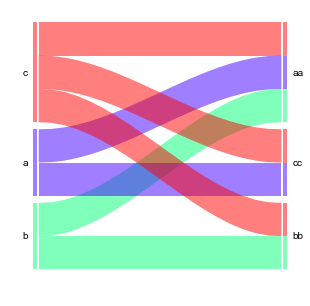

In [225]:
ax = alluvial.plot(input_data)
fig = ax.get_figure()
fig.set_size_inches(5,5)
plt.show()

In [193]:
import alluvial
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np

In [205]:
# Generating the input_data:
seed=7
np.random.seed(seed)
def rand_letter(num): return chr(ord('A')+int(num*np.random.rand()))

input_data = [[rand_letter(15), rand_letter(5)*2] for _ in range(50)]
input_data

[['B', 'DD'],
 ['G', 'DD'],
 ['O', 'CC'],
 ['H', 'AA'],
 ['E', 'CC'],
 ['K', 'EE'],
 ['F', 'AA'],
 ['E', 'EE'],
 ['D', 'CC'],
 ['N', 'AA'],
 ['J', 'EE'],
 ['D', 'CC'],
 ['N', 'AA'],
 ['H', 'DD'],
 ['K', 'CC'],
 ['D', 'CC'],
 ['F', 'CC'],
 ['F', 'EE'],
 ['L', 'BB'],
 ['I', 'BB'],
 ['G', 'BB'],
 ['J', 'BB'],
 ['G', 'DD'],
 ['G', 'EE'],
 ['C', 'DD'],
 ['G', 'CC'],
 ['J', 'CC'],
 ['G', 'AA'],
 ['B', 'DD'],
 ['H', 'DD'],
 ['O', 'DD'],
 ['A', 'BB'],
 ['I', 'BB'],
 ['O', 'EE'],
 ['M', 'CC'],
 ['M', 'AA'],
 ['E', 'CC'],
 ['L', 'CC'],
 ['C', 'BB'],
 ['E', 'BB'],
 ['C', 'CC'],
 ['G', 'DD'],
 ['L', 'CC'],
 ['G', 'DD'],
 ['N', 'DD'],
 ['M', 'EE'],
 ['A', 'EE'],
 ['E', 'CC'],
 ['L', 'DD'],
 ['C', 'DD']]

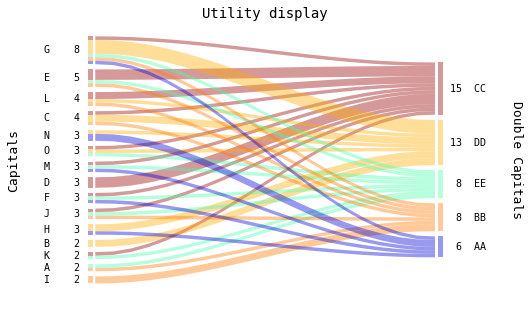

In [206]:
# Plotting:
cmap = matplotlib.cm.get_cmap('jet')
ax = alluvial.plot(
    input_data,  alpha=0.4, color_side=1, rand_seed=seed, figsize=(7,5),
    disp_width=True, wdisp_sep=' '*2, cmap=cmap, fontname='Monospace',
    labels=('Capitals', 'Double Capitals'), label_shift=2)
ax.set_title('Utility display', fontsize=14, fontname='Monospace')
plt.show()

[Bunch(text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x0000029A85AD0B38>, <matplotlib.text.Text object at 0x0000029A85AD0FD0>], patch=Poly((-0.25, 0.5) ...), tips=[[0.16954982 0.        ]
  [0.6947228  0.        ]], flows=[ 1 -1], angles=[0, 0])]

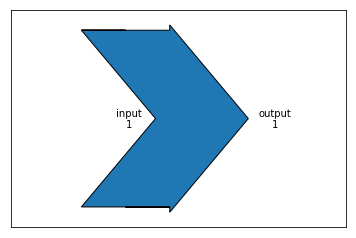

In [221]:
sankey = Sankey()
sankey.add(flows=[1, -1],
       labels=['input', 'output'])
sankey.finish()

In [17]:
history_graph1 = history_df[['fighter1', 'fighter2', 'event_name', 'event_date']].copy()
history_graph1.columns = ['source', 'target', 'type', 'date']
history_graph1

source                  target  \
0              Fabricio Werdum  Aleksander Emelianenko   
1                Rich Franklin            Ralph Dillon   
2                Mark Hominick           Trenell Young   
3              Andrei Arlovski            Ben Rothwell   
4                 Josh Barnett             Pedro Rizzo   
5                Vitor Belfort            Terry Martin   
6     Antonio Rogerio Nogueira            Edwin DeWees   
7                    Mike Pyle              JJ Ambrose   
8                   Jay Hieron              Jason High   
9                   Jay Hieron              Jason High   
10    Antonio Rogerio Nogueira    Vladimir Matyushenko   
11                Josh Barnett            Gilbert Yvel   
12           Fedor Emelianenko         Andrei Arlovski   
13                Josh Barnett            Gilbert Yvel   
14               Vitor Belfort           Matt Lindland   
15                  Dan Lauzon             Bobby Green   
16    Antonio Rogerio Nogueira    Vladimir Matyushenko   
17                Jake Shields          Ray Steinbeiss   
18              Cain Velasquez       Jeremiah Constant   
19               Dan Henderson              Eric Smith   
20               Dan Henderson         Crezio de Souza   
21                 Jens Pulver           Joe Stevenson   
22                Mark Coleman             Milco Voorn   
23              Gegard Mousasi           Stefan Klever   
24              Anderson Silva            Jorge Rivera   
25              Anderson Silva            Jorge Rivera   
26              Anderson Silva            Curtis Stout   
27              Anderson Silva           Tony Fryklund   
28               Vitor Belfort             Ivan Serati   
29               Vitor Belfort             James Zikic   
...                        ...                     ...   
9781            Eddie Wineland               Ken Stone   
9782              Shane Roller            Jamie Varner   
9783             Ricardo Lamas          Iuri Alcantara   
9784             Chris Cariaso             Renan Barao   
9785            Donald Cerrone         Chris Horodecki   
9786          Benson Henderson          Anthony Pettis   
9787            Eddie Wineland               Ken Stone   
9788             Tiequan Zhang            Danny Downes   
9789          Gilbert Melendez           Jeff Hougland   
9790                Mike Swick               Kengo Ura   
9791                 Nick Diaz              Joe Hurley   
9792          Gilbert Melendez           Jeff Hougland   
9793               Chris Leben           Brian Sleeman   
9794              Yves Edwards         Deshaun Johnson   
9795               Chris Leben              Mike Swick   
9796               Chris Leben              Mike Swick   
9797           Quinton Jackson           Matt Lindland   
9798           Martin Kampmann           Edwin Aguilar   
9799             Lyoto Machida            Vernon White   
9800             Rich Franklin          Marvin Eastman   
9801             Antonio McKee             Jason Black   
9802               Frank Trigg          Dennis Hallman   
9803              Josh Thomson          Rob McCullough   
9804             Vitor Ribeiro             Eddie Yagin   
9805                Paul Daley           Junior Barata   
9806               Gina Carano             Rosi Sexton   
9807         Yoshihiro Akiyama            Kazuo Misaki   
9808          Tatsuya Kawajiri            Luiz Azeredo   
9809               Mike Russow           Roman Zentsov   
9810          Mitsuhiro Ishida        Gilbert Melendez   

                                   type  
0                  2H2H - Pride & Honor  
1                                 AFC 1  
2                   Affliction - Banned  
3                   Affliction - Banned  
4                   Affliction - Banned  
5                   Affliction - Banned  
6                   Affliction - Banned  
7                   Affliction - Banned  
8         Affliction - Day of Reckoning  
9      

In [156]:
history_graph2 = history_df[['fighter1', 'fighter2', 'event_name']].copy()
history_graph2.columns = ['source', 'target', 'type']
history_graph2

source  \
0                                                 UFC   
1                 UFC Sweden 2013 Live from Stockholm   
2                                           UFC® Live   
3                                            UFC® 138   
0               UFC Fight Night Boetsch vs. Henderson   
1                UFC Fight Night Miocic vs. Maldonado   
0               UFC Fight Night Henderson vs Masvidal   
1                     UFC Fight Night Hunt vs. Nelson   
2                                            UFC® 144   
3                                            UFC® 133   
4                                            UFC® 120   
5                                            UFC® 116   
6                                            UFC® 100   
7                                             DREAM 6   
8                                             DREAM 5   
9                    Yarrenoka! - New Year's Eve 2007   
10                              K-1 Hero's Korea 2007   
11                                K-1 Dynamite!! 2006   
12                                       K-1 Hero's 7   
13                                       K-1 Hero's 7   
14                                       K-1 Hero's 6   
15                                       K-1 Hero's 5   
16                                       K-1 Hero's 4   
17                                   K-1 Hero's Seoul   
18             K-1 World MAX 2005 Champions Challenge   
19                                       K-1 Hero's 2   
20                                       K-1 Hero's 1   
21                                K-1 Dynamite!! 2004   
0                      UFC on FOX 8 Live from Seattle   
1                                                UFC®   
..                                                ...   
3               UFC Fight Night Lewis vs Abdurakhimov   
0                   UFC Fight Night Cowboy vs Edwards   
1                    UFC Fight Night Werdum vs Tybura   
0                        UFC 217 Bisping vs St-Pierre   
1                     UFC Fight Night Lewis vs Browne   
0                                     UFC Fight Night   
1                    UFC Fight Night Santos vs Anders   
2                         UFC 224 Nunes vs Pennington   
3                  UFC Fight Night Machida vs Brunson   
4                 UFC Fight Night Weidman vs Gastelum   
5                   UFC Fight Night Lineker vs Dodson   
6                  UFC Fight Night Teixeira vs. Evans   
7                    UFC Fight Night Condit vs. Alves   
0                     UFC Fight Night Shogun vs Smith   
0                                          UFC® Macao   
1                                            UFC® 144   
2                                            UFC® 136   
3                                            UFC® 127   
4                                              WEC 53   
5                                              WEC 51   
0                                     UFC Fight Night   
1                    UFC 227 Dillashaw vs Garbrandt 2   
0                                             UFC 232   
1                UFC Fight Night Dos Santos vs Ivanov   
2                        UFC 222 Cyborg vs Kunitskaya   
3                               UFC 200 Tate vs Nunes   
4                          UFC 184 Rousey vs. Zingano   
5                         UFC 178 Johnson vs. Cariaso   
6   The Ultimate Fighter 17 Finale Live from Las V...   
0     The Ultimate Fighter Finale Tavares vs Adesanya   

                       target  
0                 Papy  Abedi  
1                Besam Yousef  
2                  James Head  
3                 Papy  Abedi  
0                Jake Collier  
1                Wagner Silva  
0                Alberto Mina  
1               Amir Sadollah  
2                Jake Shields  
3           Yoshihiro Akiyama  
4           Yoshihiro Akiyama  
5           Yoshihiro Akiyama  
6                Alan Belcher  
7            Masanori Tonooka  
8           Katsuyori Shibata  


In [158]:
history_graph = pd.concat([history_graph1, history_graph2])

history_graph

source  \
0                                       Dylan Andrews   
1                                         Papy  Abedi   
2                                         Papy  Abedi   
3                                        Thiago Alves   
0                                       Ricardo Abreu   
1                                       Ricardo Abreu   
0                                   Yoshihiro Akiyama   
1                                   Yoshihiro Akiyama   
2                                   Yoshihiro Akiyama   
3                                       Vitor Belfort   
4                                     Michael Bisping   
5                                         Chris Leben   
6                                   Yoshihiro Akiyama   
7                                   Yoshihiro Akiyama   
8                                   Yoshihiro Akiyama   
9                                   Yoshihiro Akiyama   
10                                  Yoshihiro Akiyama   
11                                  Yoshihiro Akiyama   
12                                  Yoshihiro Akiyama   
13                                  Yoshihiro Akiyama   
14                                  Yoshihiro Akiyama   
15                                  Yoshihiro Akiyama   
16                                  Yoshihiro Akiyama   
17                                  Yoshihiro Akiyama   
18                                  Yoshihiro Akiyama   
19                                  Yoshihiro Akiyama   
20                                    Jerome LeBanner   
21                                  Yoshihiro Akiyama   
0                                         John Albert   
1                                     Scott Jorgensen   
..                                                ...   
3               UFC Fight Night Lewis vs Abdurakhimov   
0                   UFC Fight Night Cowboy vs Edwards   
1                    UFC Fight Night Werdum vs Tybura   
0                        UFC 217 Bisping vs St-Pierre   
1                     UFC Fight Night Lewis vs Browne   
0                                     UFC Fight Night   
1                    UFC Fight Night Santos vs Anders   
2                         UFC 224 Nunes vs Pennington   
3                  UFC Fight Night Machida vs Brunson   
4                 UFC Fight Night Weidman vs Gastelum   
5                   UFC Fight Night Lineker vs Dodson   
6                  UFC Fight Night Teixeira vs. Evans   
7                    UFC Fight Night Condit vs. Alves   
0                     UFC Fight Night Shogun vs Smith   
0                                          UFC® Macao   
1                                            UFC® 144   
2                                            UFC® 136   
3                                            UFC® 127   
4                                              WEC 53   
5                                              WEC 51   
0                                     UFC Fight Night   
1                    UFC 227 Dillashaw vs Garbrandt 2   
0                                             UFC 232   
1                UFC Fight Night Dos Santos vs Ivanov   
2                        UFC 222 Cyborg vs Kunitskaya   
3                               UFC 200 Tate vs Nunes   
4                          UFC 184 Rousey vs. Zingano   
5                         UFC 178 Johnson vs. Cariaso   
6   The Ultimate Fighter 17 Finale Live from Las V...   
0     The Ultimate Fighter Finale Tavares vs Adesanya   

                                    target  
0                                      UFC  
1      UFC Sweden 2013 Live from Stockholm  
2                                UFC® Live  
3                                 UFC® 138  
0    UFC Fight Night Boetsch vs. Henderson  
1     UFC Fight Night Miocic vs. Maldonado  
0    UFC Fight Night Henderson vs Masvidal  
1          UFC Fight Night Hunt vs. Nelson  
2                                 UFC® 144  
3                                 UFC® 133  
4                

In [159]:
from ipysankeywidget import SankeyWidget


SankeyWidget(links=[{'target': 'UFC', 'source': 'Dylan Andrews'}, {'target': 'UFC Sweden 2013 Live from Stockh…

In [18]:
history_graph1['value'] = 1
history_graph1

source                  target  \
0              Fabricio Werdum  Aleksander Emelianenko   
1                Rich Franklin            Ralph Dillon   
2                Mark Hominick           Trenell Young   
3              Andrei Arlovski            Ben Rothwell   
4                 Josh Barnett             Pedro Rizzo   
5                Vitor Belfort            Terry Martin   
6     Antonio Rogerio Nogueira            Edwin DeWees   
7                    Mike Pyle              JJ Ambrose   
8                   Jay Hieron              Jason High   
9                   Jay Hieron              Jason High   
10    Antonio Rogerio Nogueira    Vladimir Matyushenko   
11                Josh Barnett            Gilbert Yvel   
12           Fedor Emelianenko         Andrei Arlovski   
13                Josh Barnett            Gilbert Yvel   
14               Vitor Belfort           Matt Lindland   
15                  Dan Lauzon             Bobby Green   
16    Antonio Rogerio Nogueira    Vladimir Matyushenko   
17                Jake Shields          Ray Steinbeiss   
18              Cain Velasquez       Jeremiah Constant   
19               Dan Henderson              Eric Smith   
20               Dan Henderson         Crezio de Souza   
21                 Jens Pulver           Joe Stevenson   
22                Mark Coleman             Milco Voorn   
23              Gegard Mousasi           Stefan Klever   
24              Anderson Silva            Jorge Rivera   
25              Anderson Silva            Jorge Rivera   
26              Anderson Silva            Curtis Stout   
27              Anderson Silva           Tony Fryklund   
28               Vitor Belfort             Ivan Serati   
29               Vitor Belfort             James Zikic   
...                        ...                     ...   
9781            Eddie Wineland               Ken Stone   
9782              Shane Roller            Jamie Varner   
9783             Ricardo Lamas          Iuri Alcantara   
9784             Chris Cariaso             Renan Barao   
9785            Donald Cerrone         Chris Horodecki   
9786          Benson Henderson          Anthony Pettis   
9787            Eddie Wineland               Ken Stone   
9788             Tiequan Zhang            Danny Downes   
9789          Gilbert Melendez           Jeff Hougland   
9790                Mike Swick               Kengo Ura   
9791                 Nick Diaz              Joe Hurley   
9792          Gilbert Melendez           Jeff Hougland   
9793               Chris Leben           Brian Sleeman   
9794              Yves Edwards         Deshaun Johnson   
9795               Chris Leben              Mike Swick   
9796               Chris Leben              Mike Swick   
9797           Quinton Jackson           Matt Lindland   
9798           Martin Kampmann           Edwin Aguilar   
9799             Lyoto Machida            Vernon White   
9800             Rich Franklin          Marvin Eastman   
9801             Antonio McKee             Jason Black   
9802               Frank Trigg          Dennis Hallman   
9803              Josh Thomson          Rob McCullough   
9804             Vitor Ribeiro             Eddie Yagin   
9805                Paul Daley           Junior Barata   
9806               Gina Carano             Rosi Sexton   
9807         Yoshihiro Akiyama            Kazuo Misaki   
9808          Tatsuya Kawajiri            Luiz Azeredo   
9809               Mike Russow           Roman Zentsov   
9810          Mitsuhiro Ishida        Gilbert Melendez   

                                   type  value  
0                  2H2H - Pride & Honor      1  
1                                 AFC 1      1  
2                   Affliction - Banned      1  
3                   Affliction - Banned      1  
4                   Affliction - Banned      1  
5                   Affliction - Banned      1  
6                   Affliction - Banned      1  
7                   Affliction - Ba

In [163]:
SankeyWidget(links=history_graph1.to_dict('records'))

SankeyWidget(links=[{'type': 'UFC', 'target': 'Papy  Abedi', 'source': 'Dylan Andrews', 'value': 1}, {'type': …

In [ ]:
history_graph1.drop_duplicates(subset=['source', 'target', 'type', 'value'], keep=False, inplace = True)
history_graph1.sort_values(by=['type'], inplace=True)

In [30]:
history_graph1

source                  target  \
0              Fabricio Werdum  Aleksander Emelianenko   
1                Rich Franklin            Ralph Dillon   
2                Mark Hominick           Trenell Young   
3              Andrei Arlovski            Ben Rothwell   
4                 Josh Barnett             Pedro Rizzo   
5                Vitor Belfort            Terry Martin   
6     Antonio Rogerio Nogueira            Edwin DeWees   
7                    Mike Pyle              JJ Ambrose   
12           Fedor Emelianenko         Andrei Arlovski   
14               Vitor Belfort           Matt Lindland   
15                  Dan Lauzon             Bobby Green   
21                 Jens Pulver           Joe Stevenson   
17                Jake Shields          Ray Steinbeiss   
18              Cain Velasquez       Jeremiah Constant   
19               Dan Henderson              Eric Smith   
20               Dan Henderson         Crezio de Souza   
22                Mark Coleman             Milco Voorn   
23              Gegard Mousasi           Stefan Klever   
31             Michael Bisping            Miika Mehmet   
32             Michael Bisping           Jakob Lovstad   
33             Michael Bisping            Ross Pointon   
26              Anderson Silva            Curtis Stout   
27              Anderson Silva           Tony Fryklund   
28               Vitor Belfort             Ivan Serati   
29               Vitor Belfort             James Zikic   
30              Anderson Silva              Lee Murray   
34              Gegard Mousasi       Tsuyoshi Kurihara   
35            Katsunori Kikuno        Daisuke Nakamura   
36            Tatsuya Kawajiri            Drew Fickett   
37               Eiji Mitsuoka          Bruno Carvalho   
...                        ...                     ...   
9738               Chad George        Antonio Banuelos   
9739                Mike Brown           Cole Province   
9762                 Erik Koch        Francisco Rivera   
9769      Zachary Micklewright          Dustin Poirier   
9766          Joseph Benavidez         Wagnney Fabiano   
9765          Raphael Assuncao                LC Davis   
9757              Yves Jabouin          Brandon Visher   
9760          Anthony Njokuani        Edward Faaloloto   
9758             Clint Godfrey        Michael McDonald   
9775             Dominick Cruz         Scott Jorgensen   
9772            Danny Castillo               Will Kerr   
9783             Ricardo Lamas          Iuri Alcantara   
9785            Donald Cerrone         Chris Horodecki   
9790                Mike Swick               Kengo Ura   
9791                 Nick Diaz              Joe Hurley   
9793               Chris Leben           Brian Sleeman   
9794              Yves Edwards         Deshaun Johnson   
9797           Quinton Jackson           Matt Lindland   
9798           Martin Kampmann           Edwin Aguilar   
9799             Lyoto Machida            Vernon White   
9800             Rich Franklin          Marvin Eastman   
9801             Antonio McKee             Jason Black   
9803              Josh Thomson          Rob McCullough   
9804             Vitor Ribeiro             Eddie Yagin   
9805                Paul Daley           Junior Barata   
9806               Gina Carano             Rosi Sexton   
9809               Mike Russow           Roman Zentsov   
9807         Yoshihiro Akiyama            Kazuo Misaki   
9808          Tatsuya Kawajiri            Luiz Azeredo   
9810          Mitsuhiro Ishida        Gilbert Melendez   

                                   type  value  
0                  2H2H - Pride & Honor      1  
1                                 AFC 1      1  
2                   Affliction - Banned      1  
3                   Affliction - Banned      1  
4                   Affliction - Banned      1  
5                   Affliction - Banned      1  
6                   Affliction - Banned      1  
7                   Affliction - Ba

In [ ]:
SankeyWidget(links=history_graph1.to_dict('records'))